In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [2]:
df=pd.read_csv('spotify.csv')
df=df.rename(columns={'duration_ms':'duration_s'})
df.duration_s=df.duration_s/1000
df.head()

,Unnamed: 0,acousticness,danceability,duration_s,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204.600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326.933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185.707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199.413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392.893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
SongsCountArtist=pd.DataFrame(df['artist'].value_counts())
df_new=df.copy()
ArtistProxy=SongsCountArtist.loc[df['artist']]
df_new['artist']=ArtistProxy['artist'].tolist()
df_new.head()


,Unnamed: 0,acousticness,danceability,duration_s,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204.600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,8
1,1,0.1990,0.743,326.933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,2
2,2,0.0344,0.838,185.707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,8
3,3,0.6040,0.494,199.413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,6
4,4,0.1800,0.678,392.893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,1


In [4]:
df['song_title'].nunique()

1956

In [78]:
np.arange(len(df.columns))
data=df_new.iloc[:,[1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16]]
target=data['target']
del data['target']

data['target']=target
instrumentalness=data['instrumentalness']

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
data['instrumentalness'].isnull().values.any()

False

In [7]:
columns=data.columns
for x in columns:
    data[x]=pd.to_numeric(data[x],errors='coerce')

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
categories=['key', 'mode','time_signature', 'target']
for x in categories:
    data[x]=data[x].astype('category')

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
data.describe()

,acousticness,danceability,duration_s,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,artist
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,246.306197,0.681577,0.133286,0.190844,-7.085624,0.092664,121.603272,0.496815,2.574616
std,0.259989,0.161029,81.981814,0.210273,0.273162,0.155453,3.761684,0.089931,26.685604,0.247195,2.604276
min,0.000003,0.122000,16.042000,0.014800,0.000000,0.018800,-33.097000,0.023100,47.859000,0.034800,1.000000
25%,0.009630,0.514000,200.015000,0.563000,0.000000,0.092300,-8.394000,0.037500,100.189000,0.295000,1.000000
50%,0.063300,0.631000,229.261000,0.715000,0.000076,0.127000,-6.248000,0.054900,121.427000,0.492000,2.000000
75%,0.265000,0.738000,270.333000,0.846000,0.054000,0.247000,-4.746000,0.108000,137.849000,0.691000,3.000000
max,0.995000,0.984000,1004.627000,0.998000,0.976000,0.969000,-0.307000,0.816000,219.331000,0.992000,16.000000


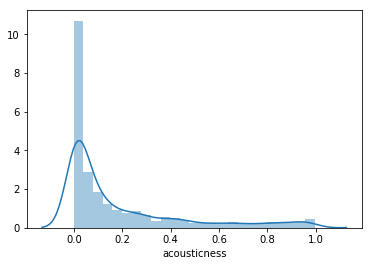

In [10]:
sns.distplot(data['acousticness'])

In [11]:
numeric=data._get_numeric_data().columns
numeric

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'artist'],
      dtype='object')

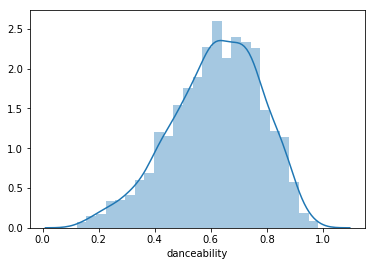

In [12]:
sns.distplot(data['danceability'])

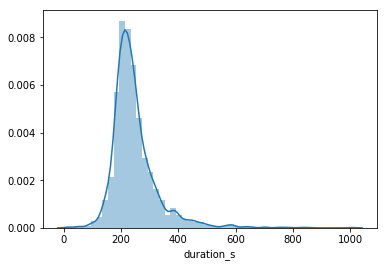

In [13]:
sns.distplot(data['duration_s'])


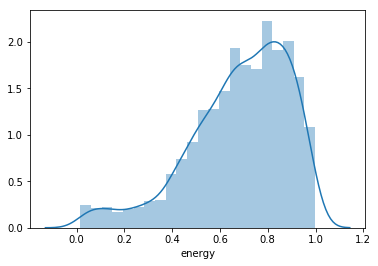

In [14]:
sns.distplot(data['energy'])


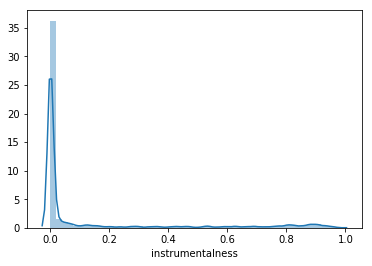

In [15]:
sns.distplot(data['instrumentalness'])


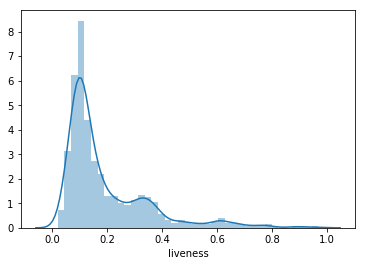

In [16]:
sns.distplot(data['liveness'])


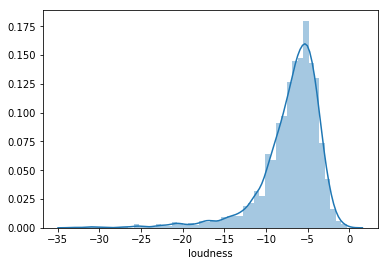

In [17]:
sns.distplot(data['loudness'])


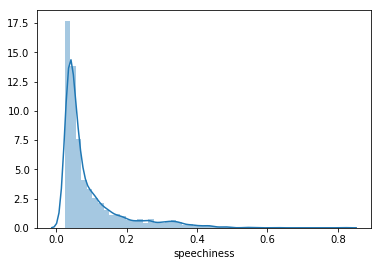

In [18]:
sns.distplot(data['speechiness'])


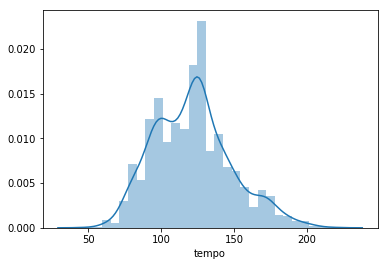

In [19]:
sns.distplot(data['tempo'])


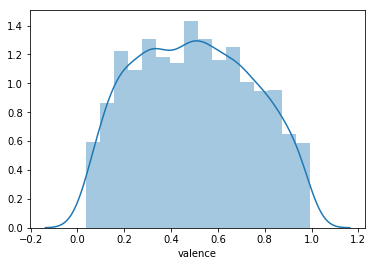

In [20]:
sns.distplot(data['valence'])


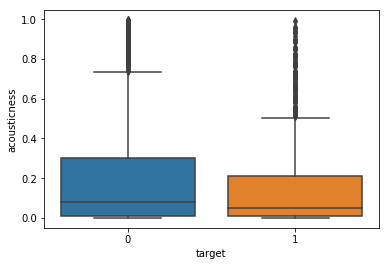

In [21]:
sns.boxplot('target','acousticness',data=data)

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'artist'],
      dtype='object')

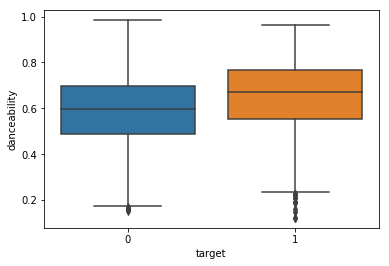

In [22]:
sns.boxplot('target','danceability',data=data)
numeric

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'artist'],
      dtype='object')

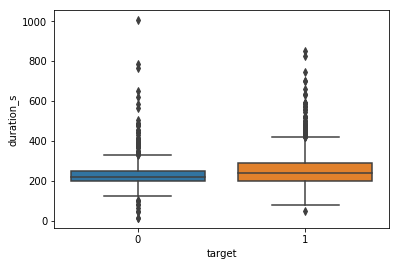

In [23]:
sns.boxplot('target','duration_s',data=data)
numeric

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'artist'],
      dtype='object')

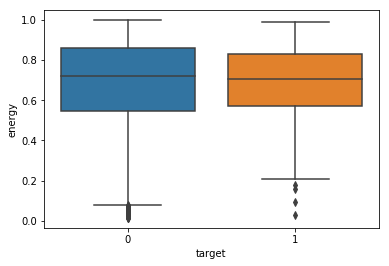

In [24]:
sns.boxplot('target','energy',data=data)
numeric

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'artist'],
      dtype='object')

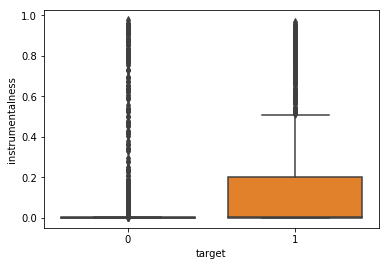

In [25]:
sns.boxplot('target','instrumentalness',data=data)
numeric

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'artist'],
      dtype='object')

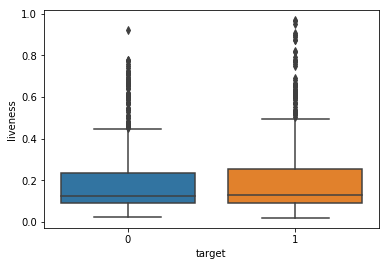

In [26]:
sns.boxplot('target','liveness',data=data)
numeric

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'artist'],
      dtype='object')

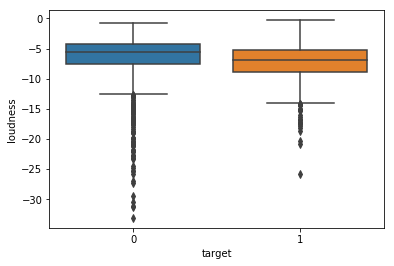

In [27]:
sns.boxplot('target','loudness',data=data)
numeric

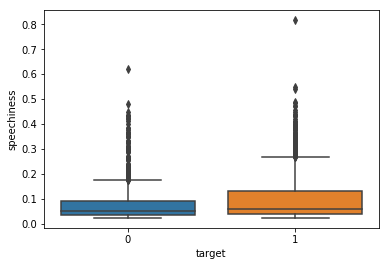

In [28]:
sns.boxplot('target','speechiness',data=data)

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'artist'],
      dtype='object')

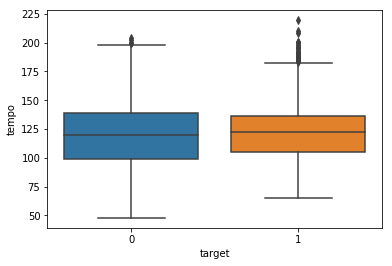

In [29]:
sns.boxplot('target','tempo',data=data)
numeric

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'artist'],
      dtype='object')

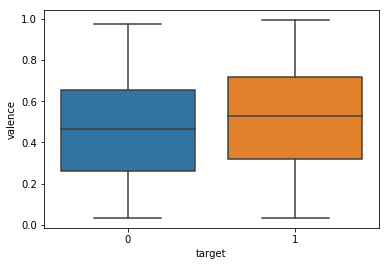

In [30]:
sns.boxplot('target','valence',data=data)
numeric

In [31]:
data.sort_values(by='artist')

,acousticness,danceability,duration_s,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,target
1008,0.671000,0.539,166.304,0.740,0.000000,6,0.1200,-7.157,0,0.4010,139.608,4.0,0.6450,1,1
1199,0.038400,0.720,175.427,0.791,0.000000,1,0.1570,-4.689,1,0.1240,102.071,4.0,0.7670,1,0
1196,0.007380,0.352,216.893,0.843,0.000000,7,0.0883,-7.983,0,0.4820,165.290,5.0,0.7160,1,0
1195,0.071000,0.375,338.853,0.862,0.000000,11,0.2110,-3.363,0,0.2550,159.841,4.0,0.4720,1,0
1193,0.110000,0.660,180.480,0.867,0.000000,6,0.0368,-4.285,0,0.1160,93.033,4.0,0.3760,1,0
1192,0.056700,0.467,293.533,0.564,0.000000,9,0.1940,-4.986,0,0.3530,81.966,4.0,0.3040,1,0
1191,0.006220,0.750,203.867,0.780,0.000000,4,0.0263,-3.155,1,0.0898,119.985,4.0,0.8190,1,0
1190,0.064300,0.755,198.187,0.838,0.000016,7,0.1180,-4.500,0,0.0687,126.877,4.0,0.4540,1,0
1189,0.031900,0.646,210.960,0.795,0.000000,9,0.2670,-3.293,1,0.0976,89.990,4.0,0.7910,1,0
1205,0.074600,0.755,199.693,0.832,0.000001,2,0.2910,-2.741,0,0.1160,120.032,4.0,0.7190,1,0


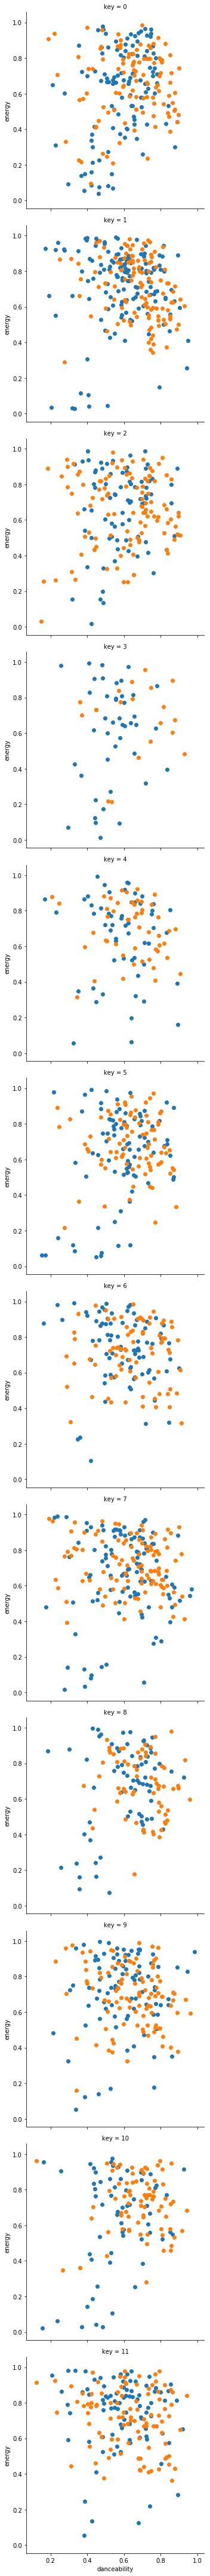

In [365]:
data.head()
g=sns.FacetGrid(data,hue='target',size=5,row='key')
g.map(plt.scatter,'danceability','energy',)

In [ ]:
sns.FacetGrid()

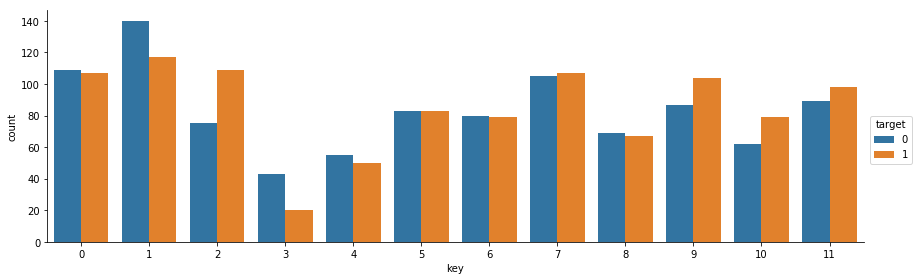

In [33]:
sns.factorplot('key',data=data,kind='count',hue='target',aspect=3)

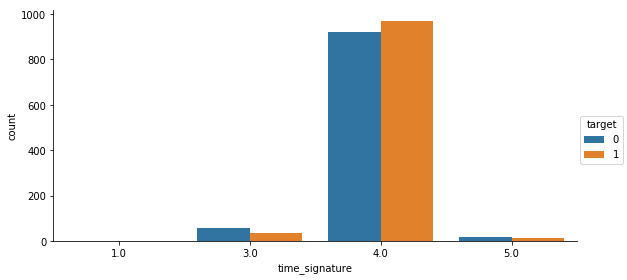

In [34]:
sns.factorplot('time_signature',data=data,kind='count',hue='target',aspect=2)

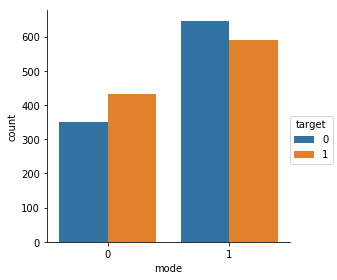

In [35]:
sns.factorplot('mode',data=data,kind='count',hue='target')

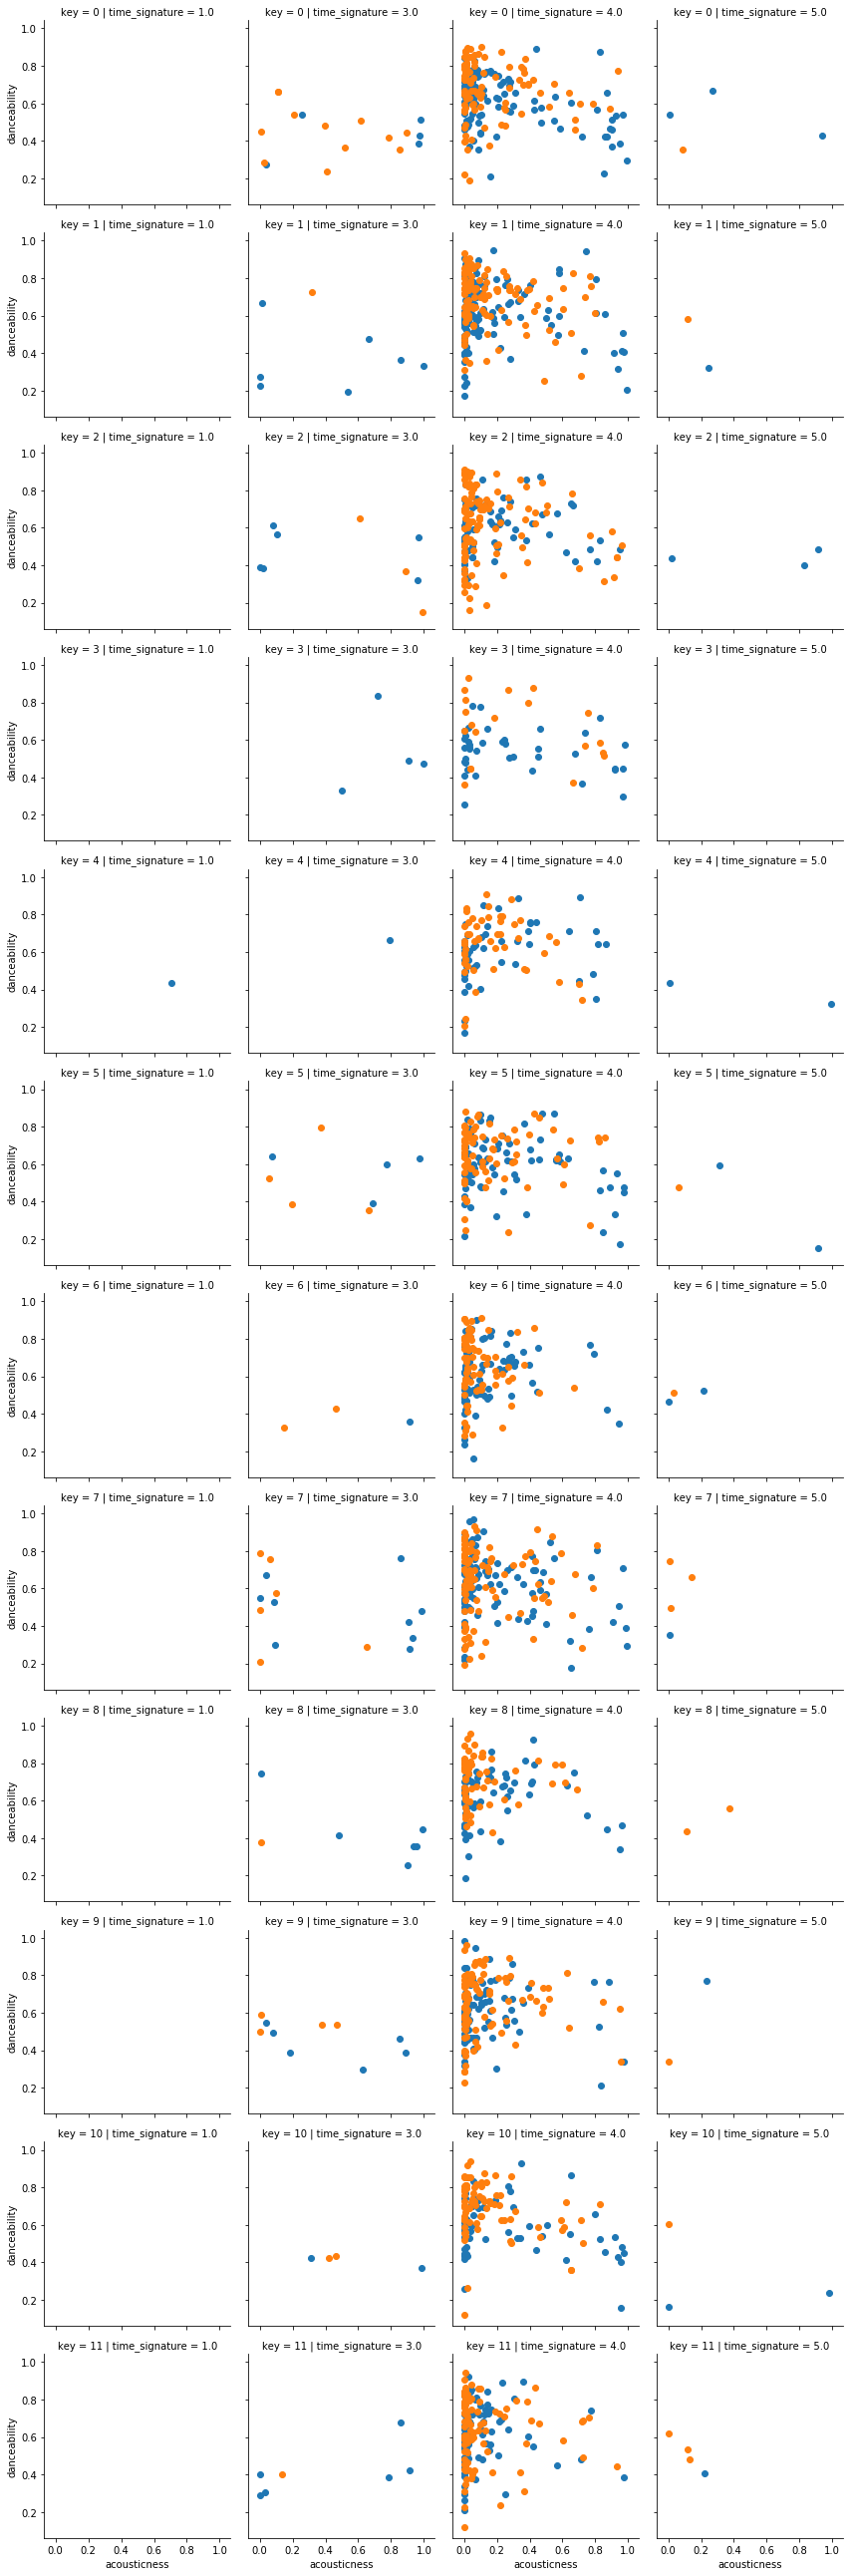

In [121]:
g=sns.FacetGrid(data,row='key',col='time_signature',hue='target')
g.map(plt.scatter,'acousticness','danceability')

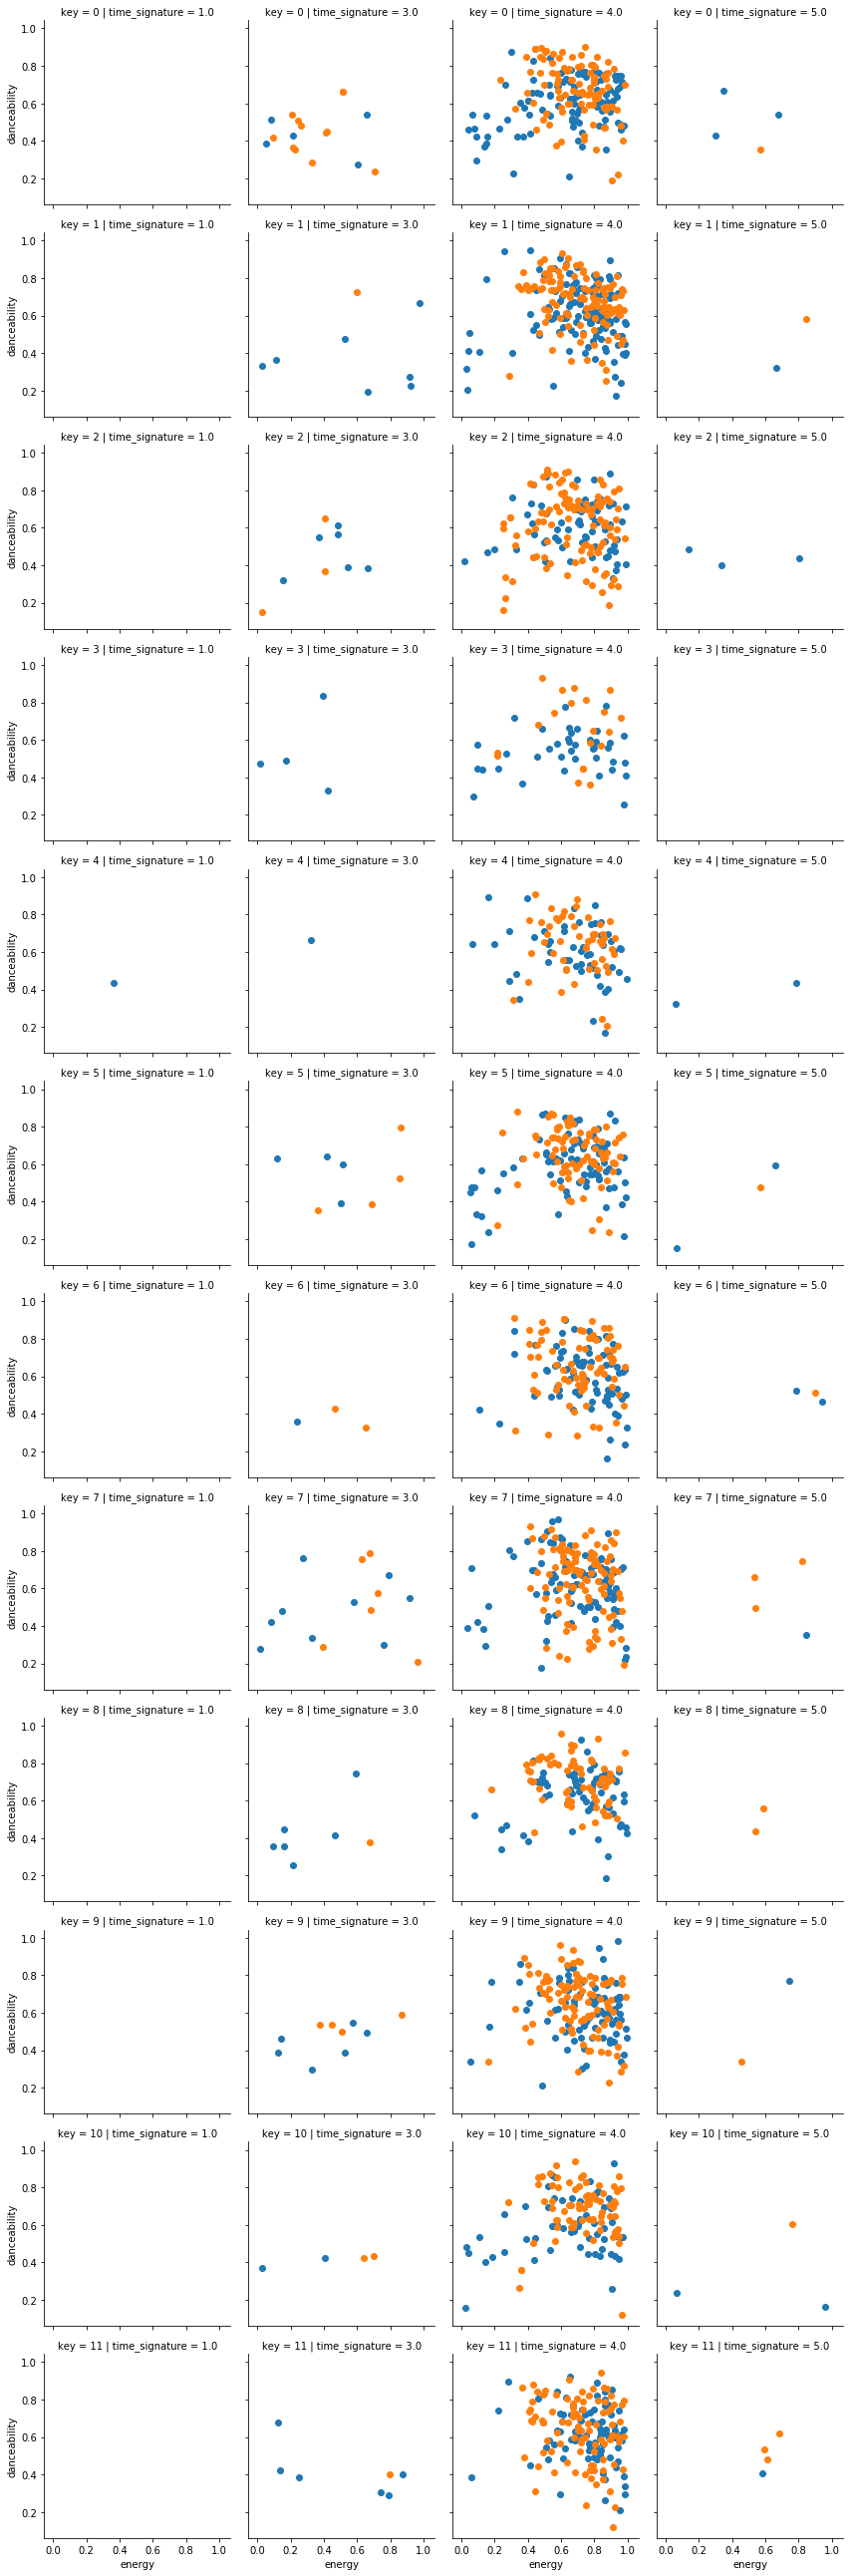

In [122]:
g=sns.FacetGrid(data,row='key',col='time_signature',hue='target')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA1gAAAoYCAYAAABDXwMXAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3Xt8nHWZ///XlVObcmig7SpNQFgX6ypUigXRZr/LWqEcpNSKFZB1PfDFXVxYUFvKb91S0d0Wut+FrYfVbmE9KxEwhINb/FIBi4IUWlpA+wUBbRNAKiQLNJDT9fvjvieZmdz3HJI5Ju/n4zGPzNxzz9yfmcmV3Nd8Pp/rY+6OiIiIiIiIjF9NuRsgIiIiIiIyUSjBEhERERERKRAlWCIiIiIiIgWiBEtERERERKRAlGCJiIiIiIgUiBIsERERERGRAlGCJSIiIiIiUiCTMsEys8PN7NEyt+FgM/upmT0R/jwoZr9nYrZfYmbTkm7fYWZNRWpuJDP7RRGe8xgzO63QzztWZvbfZtZtZrdl2GeKmd1gZk+a2QNmdnjpWlgaipnCmOgxY2ZvMrOHzGy7mT1mZn8bs19On2U1U8wUxkSPmQQzO9DMOs3sKzH3K2ZK0wbFTPRzVlTMmNlg+H9mu5l1xOxT1nOzSZlgVYiVwF3ufiRwV3g7H5cAw0Hs7qe5e3cB25eVu7+nCE97DJBXEFugWL/L64C/zrLPJ4GX3P3PgGuAq4rUlslOMROtkmLmWeA97n4M8C5gpZnNjthvvJ+l5EYxE62SYibhi8A9Ge5XzJSGYiZapcVMr7sfE14Wx+xT3nMzd590F+Bw4NHw+p8C24DjgFqCE+oHgR3Ap8J9vgOcmfT47wGLx9mGXcAh4fVDgF0x+z0Tse1ioA/YCfwssR8wM3xtvwE2Ao+GbX0fcB/wBHB8uP9+wPXha92W/Poijvd24FfA9vB9OTLc/kr4swb4GvAYcBtwB3BWUru+ADwctvet4fbjgV+Ex/4FMAdoAH4PvBAe68PAauBzSW15NHyNhwO/Do+7DXgTcDLwy/BYPwL2L9Dvy4nAbRnu3wS8O7xeB+wFrNy/54oZxUy5YiY87oywbbPH+llW80Uxo5jJ43N6J/BD4GPAV8bzWVbzRTGjmMnjc3olh33Kem5W9oAqxyURxOEvzjbgmHD7BcDnw+tTgK3AEcBfAu3h9unA00Bd2nMeEP7iRV3eFtGG7rTbL8W09Zm47cDM9NvhaxsAjg6D66EwWA04M+l1/AtwXni9Cfh/wH4xx/oy8JHwegPQGF5PBPFZYeDWAG8EXkoL4ovC6xcCG8PrBybeQ4I/MjeF1z9G0j+YLEE8BJwQbp8J3Jt4DcBlwKqI17I85jNan+H35UQyJ1iPAi1Jt3+b/NlMhAuKGVDM5BQzwKEE/+z3AZ+O2Senz7KaL4oZxUwuMRO+nrsJ4ialXYoZxQyKmbj/MwPh78H9wJKYfcp6blbH5DULuAX4oLs/Fm47GZhrZmeFt6cTfCNwp5l91cz+BFhK8As3kPxk7v4yQRdqJXja3XcCmNljBN3dbmY7CX75IXiti83sc+HtqcBhBN88pPsl8I9m1gLc7O5PpN3fCvzI3YeA58zsZ2n33xz+fIjg/YPgvf2WmR0JOFA/htf5O3e/P7x+AvA24D4zg+CPzS/TH+Du6wi+CSski9jmBT5GJVDMKGaycvfdBL8Ts4F2M7vR3Z8fQ1snAsWMYiabC4E73H13+JyTnWJGMZOLw9y9y8z+FNhsZjvd/bdp+5T13GwyJ1g9wG5gAUH3KQQfxkXuvili/+8AHwHOBj6RfqeZHQD8POZY57r742nbnjezQ9z9WTM7BPjDGF5DnNeTrg8l3R5i5DM3gj9gu7I9mbt/38weAE4HNpnZ+e6+OWmXbP8VEscfTDr+Fwm60D8QTjy8O+axA6TOFZyadP3VtDb81N3PydQQM1tO8Dmmu9fdL8702Az2EHz7uMfM6gj+QL04xueqZIoZxUyyjDET/vN7DPgL4Ma0u4v5WVYSxYxiJllUzLwb+AszuxDYH2gws1fcPX3uj2JGMZNiEscM7t4V/nzKzO4G5hH0UCUr67nZZC5y0QcsAT5qZueG2zYBf2dm9QBm9hYz2y+875sEkxdJ+lZlmLu/7CMT7tIv6QEM0AH8TXj9bwi+scnHywRd32O1CbjIwq8UzGxe3I7hNwRPuft6gnbPTdtlC/BBM6sxszcQDKnLZjrQGV7/WNL29Nf1DHBs2I5jCYYFRLkfWGBmfxbuO83M3pK+k7uvi/mMxppcQepneRaw2d0nYg+WYkYxkzFmzKzFzBrD6wcRnCRFnSiM97OsFooZxUzGmHH3j7j7Ye5+OPA54NsRyRUoZhQzaSZrzJjZQWY2Jbw+k+D/TLbPsuTnZpM5wcLdXwXeD1xqZmcSTD58HHjYglKh3yDM6j0Y4vJr4L8KdPi1wElm9gRwUng7HxuAn0R0+ebqiwRdvzvC1/rFDPt+GHjUzLYDbwW+nXb/TQTfFCTeswcIvoXK5GpgjZndRzCBNeFnwNssKL354fC5Dw6P/XcE45FHcfcXCP4Y/MDMdhAE9VuztCErM/s5waTMhWa2x8wWhduvNLNE5ZrrgBlm9iTwGSZwdSfFjGImiz8HHjCzRwgqov2rjwyJ2Whm88P9xvtZVg3FjGJmrBQzihkUM1H+HNga/p/5GbA2kSxX0rmZTcwv2gvPgnUNdgLHunu2X9BCHveZ8JutimZm+7v7K2Y2g6CqzQJ3f67c7ZLyUcxkppiRdIqZzBQzkk4xk5lipnwm8xysnJnZ+wiqvfxbKQO4ytxmwWJ6DcAXFcCTm2ImJ4oZGaaYyYliRoYpZnKimCkT9WBVODO7xN2vLdGxFjF6Iban3f0DpTi+SCEoZkTyo5gRyY9iRrJRgiUiIiIiIlIgVVfk4pRTTnGCOva66DLRLwWhmNFlEl0KQjGjyyS6FIRiRpdJdMlJ1SVYe/fuLXcTRKqKYkYkP4oZkfwoZkRSVV2CJSIiIiIiUqmUYImIiIiIiBSIEiwREREREZECKVqCZWbXm9kfwpWoo+43M1tvZk+a2Q4zO7ZYbRERERERESmFYvZgfRM4JcP9pwJHhpcLgP8oYltERERERESKrmgJlrvfC7yYYZczgW974H6gycwOKVZ7REREREREiq2cc7Cagd1Jt/eE20YxswvMbKuZbX3hhRdK0jiRaqaYEcmPYkYkP4oZkXjlTLAsYlvkAl7uvsHd57v7/FmzZhW5WSLVTzEjkh/FjEh+FDMi8cqZYO0BDk263QJ0laktIiIiIiIi41bOBKsD+GhYTfAEoMfdny1je0RERERERMalrlhPbGY/AE4EZprZHuAKoB7A3b8O3AGcBjwJ7AM+Xqy2iIiIiIiIlELREix3PyfL/Q58uljHFxERERERKbVyDhEUERERERGZUJRgiYiIiIiIFIgSLBERERERkQJRgiUiIiIiIlIgSrBEREREREQKRAmWiIiIiIhIgSjBEhERERERKRAlWCIiIiIiIgWiBEtERERERKRAlGCJiIiIiIgUiBIsERERkSg72uCao2B1U/BzR1u5WyQiVaCu3A0QERGRSWJHG9x1JfTsgektsHAVzF1W7lZF29EGt14M/b3B7Z7dwW2o3DaLSEVQgiUiIiIF9WDHNzj04XX8ib/AH2wWu49dznGHH1RdCctdV460NaG/N9heie0VkYqhBEtEREQK5sGOb3DUQ5+n0frA4I28wPSHPs/rOxuZUk0JS8+e/LaLiIQ0B0tEREQK5tCH1wXJVZJG66Ohvyf6AT27K3Oe0/SW/LaLiISUYImIiEwy7ds6WbB2M0esvJ0FazfTvq2zYM/9J/5C9B2e4UE9u4MdEsMG80myilWIYuEqqG9M3VbfGGwXEclACZaIiMgk0r6tk8tv3klndy8OdHb3cvnNOwuWZP3BZkVu77EDRicsURLDBnORKEQxngQtztxlcMZ6mH4oYMHPM9ZX5nBGEakoSrBEREQmkXWbdtHbP5iyrbd/kHWbdhXk+Xcfu5xeb0h9fm/giWP/KTVhsdr4J0nMc8rWO5WpEEUhzF0Glz4Kq7uDn0quRCQHKnIhIiIyiXR19+a1PV/HLf4UD0JYRXAvf7CZ7H7nco5b/Klgh0SSsrop/kmmt+RWJr3QhSiqqYy8iFQsJVgiIiKTyOymRjojkqnZTTkM38vRcYs/BWFC9cbwMsr0lnBoXzoLEptcyqTHPcdYClFo3SsRKRANERQREZlEli+aQ2N96vC8xvpali+ak9sTjLWoRPrjjjw5Yk6WwfxPBAlNLr1T+RSiKMVww2IV3BCRqqIeLBERkUlkybxmIJiL1dXdy+ymRpYvmjO8PaOx9vJEPe6R78M7zoUn7kwZktc+uIB1azdzw9AMWmr2jn6uxPDBxFC+xoOgrhF6X4of1leK4YbqARORkBIsERGRSWbJvObcEqp0uQzby+dxW68Lil4s3QBzlw1XOOztH+TqmmWsrd/ItOQ1teobg56v5ESm98Vge/gcY273eIcbjvW9EZEJR0MERUREJDdj7eXJdH9SafXkCocdQ62s7D+fPUMzGUouk/7EnfkP5Sv0cMOxHkNEJgUlWCIiIpKbuN6ccHvsAsbZeoHCBCm9kmHHUCutfet582vfGymTPpZEJku7gfGve5XLMURkUlCCJSIiIrnJ0MuTcQHjqMel69kTW8kwZftYEplce6fGs+5Vvj1gKoghMmEpwRIREZHcZOjlybiAccrjYkxvSalwuLhmC1saLuapKR/hp3bhSAIylqF84+2dykU+x0gUxOjZDXjKMEkRqX4qciEiIiK5m7ssMmnIuoBx4nHp1fZgOEFaMjcovLH99g2s6B8pcDGt99nRFfnyXRA4pt0FlesxVBBDZEJTgiUiIiLjlvMCxlkSpCXzmlly903Q05f6uOQEpBTJUibDZeJ3g9WCDwY9VrkkeqCCGCITXFGHCJrZKWa2y8yeNLOVEfcfZmY/M7NtZrbDzE4rZntERESkOPJawDjbXKdyJSC5zItKGd5HkFxBcPuWT+c2zE8FMUQmtKL1YJlZLfBV4CRgD/CgmXW4++NJu30eaHP3/zCztwF3AIcXq00iIiJSHONawDjdeNekykdybxQGeLA9bqHgqOF9CYN98ONPjX5MuoWrYodJikj1K+YQweOBJ939KQAz+yFwJpCcYDlwYHh9OtBVxPaIiIhIEY15AeN0Y0lAhhOlPOZljZoP5qn3R82LytaL5kPRiVmysc4jE5GqUMwEqxlI/vppD/CutH1WA3ea2UXAfsD7op7IzC4ALgA47LDDCt5QkYlGMSOSH8VMhck3AUlPlBK9T7+/P1iYOO45MvVGJaQnVHG9a8lyKVgRN49sLIliGShmROIVcw6WRWxL+2qIc4BvunsLcBrwHTMb1SZ33+Du8919/qxZs4rQVJGJRTEjkh/FTAXKZ02quKp8W69PKYW+76ZPs/pLV4wsgJzLnK70YYm5rOmV63Onq6Ly7YoZkXjFTLD2AMkLXrQwegjgJ4E2AHf/JTAVmFnENomIiMhEE5vMpH6vO836OL/vuyMLIGeZ0zVQOzV6MeIz1kPjwZnbNJb5YpnKt4tI1ShmgvUgcKSZHWFmDcDZQEfaPr8HFgKY2Z8TJFgvFLFNIiIiUki5VN4rtjySmdn2x5EFkCN6o4Yc3GHP0Ez+afACFtwxkyNW3s6CtZtHer7mLoPLnoal/8nr9dPxtPE5vd7Ag2++KP/XofLtIhNC0eZgufuAmf09sAmoBa5398fM7Epgq7t3AJ8F/tPMLiX4mulj7ul/pkRERKQixc19gtFD+vKdW5TD/u3bOlm3aRfz/+cM1jZcRyOvZ21yl88Ifnb3Dj/fnhsvZ7b9kS6fwdUDy+gYah15wGvBa+vs7uXym3fSvPs2jvvtl4fbtcY/zov9fayoa0t5jtt/eShDv7g9vppi1OsrZfVEESmaoi407O53EJReT962Kun648CCYrZBREREiiTTkLbkZCifRCzT/klFK/Y1vpEtr36Qzr730Ekr3geX1bcx2/ZGTgIH2OcNXD0QHC+xAHL74AI+2/9lBnP4fvekwXs46uHrIJHI9exmhX+NlZxPa9/6tL2D50skZhBUWWzf1sn22zewov9rTLO+1Nf3jnPhke+rfLtIlSvqQsMiIiIygeU6pC3fuUU5FK2Y1vssV9oGFtdsAaBjqJUFr6/neaILLgx4DSv7z6djqHV4AeT2bZ1cfvPOnJIrgBV1baN6yaZZ0HuVSWJIYuJ45/d9dyS5Sn59T9wZzO+afihgwc8z1ldkFUERiVfUHiwRERGZwHId0pbv3KI8ilasqGujo29kSN+avg/x7/v9V0qCNlA7lS/Z33Lr68fTnDRkb8HazfT2D8Yca7TZtjdm+x+zPnb+//yUE265gMdqXojtYaNnD8xdRvvggmDB5ud7mf7jeqz9Trr39dM0rR536OntH99CziJSVEqwREREZGxyXRA437lFuaw1FUpPbrYeeBKcNi9lflPdwlWsnruM1WmP7erOsgZW+v4+k5aoJKvGeGrqR+gamsG/Dn6Y9sHU2Q+La7aMzBGLza6A6S3DvVyJxK+7t3/47pf2jVxPH3ooIpVDQwRFRERkbBIly7MNaYtaOyrT3KLItaaiM5NE0QpgeOhfrmtoJeZh5erqgWX0esOo7TU+RA1OS81e/k/DBs5q+EXK/ZfVjx5aOEr4fqzbtCvnXrXhaogiUlGUYImIiMjY5ZLM5JqIZdp//idGJV0DtVPZ2HAeBjQ3NbJm6dEALFi7eXRp9QjLF82hsb4255faMdTKZf3n8xyzgnbZ6NOoWu/nn6d8l+amxuF2xQ0h9LAk/L7GQ4bfj7x71fLcX0SKT0MERUREJoJ8y6AXQaJseld37+g5QnOX5deeqP0POwF+chn0vghAXcM0Vp/6dlbPPX34+MnD61JKq/967fDjaDwYTr2KJfOC509u81+9dRY/+80LdHX3ElX6omOolVtfa+XptafD6umRTZ/S3819//je4fejc2gGLTWjhxaaBUnitFNHqi7ObmqkM4+kKd9eOBEpPiVYIiIi1S7fMuhFEJfcQIHnCA0kJR+9L6a8zqjhdScN3sM7Hv4GMJj6uFs+HbZtWWz7FqzdHJns5JLUJL8fV9csY239xtGVA4G6wddSytovXzSH5T96hP6h7JUNh4dEikhF0RBBERGRapdvGfQiiEpuCj5HKOZ17vvJqthkaEVdGw1EzGka7Mv6/kQNIUxNaqLnhQ0CqzseG34/OoZaWdl/PrHV4JOqJi6Z18z+U6O//64xaKwfOXWbWq/TOJFKpMgUERGpdnmXOy+8uLlABZ0jFPN6pu57LnZYXVxp9UzPl7BkXjNrlh6dMp9qzdKjk3q8ojOmGk+t/gdBktXpM6MPlFZNsXtff+RuQafWSFL30r5+Lr95Z8Z5ZiJSehoiKCIiUu3yLYNeBHFzhwo6R6jxoJF5VEmSKwmOvi+mtDqMvD8Z5q8tmdccP8Sx8eDI9rzo+0fufvXAMq5KlGtPiKimGPde1prF9hKqVLtI5VAPloiISLWLKYP+4Jsvyrmi3nhlH06XZkcbXHMUrG4Kfu5oo31bZ3x7d7RB3yujnuZ1r+Xqgfh5ZlcPLON1j6gUWNsQvG+J+Ws9uwEfmb+2oy2Xlx3JYta6+mntX/LosV/MWk0x7r0cTBtjuLhmC1saLubnvR8Yfg9FpPzUgyUiIlLtEifoSb0wD775Ij764JvoDecsFXth2sRzxlYRTBZRlGPglovY0n8+nX3viW7vXVcG86bS7LNpdAy1jtreHPacdXS3Qj9cUfdtDrYgQeuxA2g689+C9+2ao+Lnr2UrENL7UuTmJl4F4KBp9UxrqEt5P46bdwrwqYxPG/dertu0a7hna3HNltTCGWUobCIi0ZRgiYiITARpZc0vWbt5OLlKKPZwsozD6ZJFFKuoG3yNS/ghN/Ke4W3J7fWePZElJab7K9TXWErVveSes8tv3klHfysdfUESVl9j7D+1ju7v9zP7js1seS36eXOavxYzNLPLZ9BYX8sVZ7w9/v3IUlY//b1s39bJvr6B4dsr6tpGVyXMNTEUkaLKKcEys63AfwHfd/for2tERESkYpSk6MRYxSQvUQvyJtr7PDN5Iy+Mvt9nsP/UulE9RcnJSaInaHpjPa/2DfBSWESis7uXrikzaI6aoxU3fy05MWo8KBhqmNSzts8b2NhwHmtOPzpzcpVHWf30EviQoXhHCQubiEi0XHuwzgY+DjyYlGzd6R5bcFRERETKqCRFJ8YqQ89PukR71/R9iDVpa0nt8wauHlhGd18/21adHHmo5J6gBWs3j6rud1V/boUngNGJUe+LUFMfFrt4Caa3MG3hKlZn60HKVFY/7bHt2zr5bNsjo+ZfxRbvKGFhExGJllORC3d/0t3/EXgL8H3geuD3ZvYFMzu4mA0UERGR/OVddKKUIopyDNRO5VrOTtmW3N6tB57Eyv7z2TM0kyE39gzNZGX/+XQMteacNEb13nUMtbKy75NZC08A0YnRUD807Aeru2k/cRML7piZvahITC/TUM+elMckeq7SkysIinfs84bUjXGJoYiUVM5zsMxsLkEv1mnATcD3gFZgM3BMUVonIiIiY5JX0YlSiyjKUbdwFa2DC/hlTHuXL5rD8h+9BgPB/KPZtpcVdW3UDhl/uejTOR32b/b/Fef3fZfZtpcun8nVA8voGGpl64EnwaVrsj9BhvXG0ofxJYp0NO++jeN+++XUuVZxPXhDM1IKe0Qt3pzQMdTKwfUNrN7vpth5XFI67ds6KzPWpCxynYP1ENANXAesdPdEP/oDZragWI0TEalKt30GHvom+CBYLbzzY/D+fyt3q2QSyrnoRDmkFeUAWEJ8hcMl85pp3n0bRz28kUaCYYIttpd19ddRV3sMkCWx2NHG5/3r1NW8NvzYtfUbafAaWhddmLJfbPGJDOuNRSVDJw3ew1EPXweJ4YeJuVbvOBce+X5Kb1hiuGPv0Ehhj0zz5Rrraznm9Atg3hcyv24purjkGopTsVMqX649WB9y96eSN5jZEe7+tLsvLUK7RESq022fga3Xjdz2wZHbSrJkoohIQtoHF4z6Bh8K24N23G+/DKRWzqsbfC23ynl3XRnsm2Sa9fHPDd9lyt23wC1h0YrXXw6G/cHo4hMLV6XOwYLhYXld3x+dDK2oa0ud2wXBY5+4E85Yz54bL2e2/ZEunzHcmwbBCfqCtZuJm+hea8aapRmKaEhJRSXXWgB6css1wboRODZi2zsL2xwRkSr30DfjtyvBkokgxzWslv/oETDoH/ThbZfesJ1LbthO81iTrQxD9Mb62Cn93dDTHdzofXH0Dv298JPLRhK4usbUBKsumP+VKCqyuGbL8BDGmPWGg7bMXcaH75gZWYjEIHI7BD1XSq4qS0VX7JSyyJhgmdlbgbcD080suafqQGBqMRsmIlKVPHq+ROx2kWqT4xpWyetSJSS2ZBpClXEuS4YhesDYhvflovdF+NZiePrepFeRdN+tF3Pt0V/ghq2/50rbOHp9qjTPMZN3r7ydpmn1o9bwstFHGDbmxFSKqqIrdkpZZKsiOAd4P9AEnJF0ORb438VtmohIFbLa/LaLVJs81rDKJDGEKln7tk6W/+gROrt7cUZ6woYr60VUHxyunJfoWevZDfjI8L4dbfGPzcfT9xCb+vT3ctxvv8yV+92UNbnq9Qb+pe9DOATrcRk0NdZjBAlUXHJlwH0r36vkqgJVdMVOKYuMCZa73+LuHwfe7+4fT7pc7O6/KFEbRUSqxzs/lt92kWoTs85S1BpW2aQPoVrd8dionq/+IWd1x2PBjbnLghLqUSXVM60tFfHYfY2H0M0Bebc5Vs8eGnufi7wreEXGc8zisrC0/HATB539ptTx9NrTuW/le2mO6fWoMYsv+y5ltWReM2uWHk1zU+NwoqxhnJNbtiGCK9z9auBcMzsn/X53v7hoLRMRqUaJeVaqIigTVUShh4HaqVw7lLqGVX2NpczBipI+hCp9EeDI7eGQv30/WcXUnj103Xg5Gzse44qBPdFznpJ73MLKhYmqbycN3sPatMWL3cFiJ09lML2F53te4428MOqu55nFG1c/ybtX3h7ZQ5WcaC5fNCelIl3CoLsq01Wwiq7YKSWXrcjFr8OfW4vdEBGRCeP9/6aESiauPNawgqDCWmd376i5RWMeQrWjjYFbLmJaWBGwpWYvK/q/xkvsx8H2yqjd9zW+kZPWbqaru5fpjfWYhUPzgA5aoT+xrlZQze+uoWP4UO29aUP9Ms2MAmoboO9V3uAv4qQmaO5w5+A7+Ci5zdVJnKR/tu2RUQsMqzKdSHXImGC5+63hz2+VpjkiIiJS8fJYwyqxLZeFWA+aVj+c/KRvHxZTbv01b6CXKSll0Qdqp7Lq1Q/S2RckNVE9ZB1DrXT0taZse2joLVxWHyRdNr0Fjjx51LpVwxoPDkq7974Y2fNlBifXPQJE905FJZpL5jVz6Q3bRz8ZqkwnUg2yDRG8lQxf2bj74oK3SERERCre59t38oMHdjPoTq0Z57zrUL605OjY/XMZQnXFGW9n+Y2PpAwrrK81rjjj7SM7xRTZaOJVLu37O/591q3DPWtfevWD3Nh3fM6vqdaMIXceOvAkHlz096ntPeyE6AqF1xwVXd49yRvYC4wkm3GJZnISWmM2qgcLVJlOpBpkGyL4ryVphYiIiFSNz7fv5Lv3/3749qD78O1MSVY22RIQILbcepfPYOuBJ8Gla4a3fWvl7TkfO+v6UhG9dkBOa3B1Ds3gw2s3p7yWxGtMrqSY3LsVlVypMp1Idcg2RPCeUjVEREREKkemIX0/eCB6PalXHvwBPH1O9DpUOcra07VwFQO3XJQyTHCfN3AtZ49KPuLmPKUb1/pSWdbX2ucNXD2wbHjtr62/e5GbHuocTqQS26fW14wqbAEjvWpxwypFpPJkGyLY5u7LzGwnqUMFDXB3n5vl8acA/w7UAhvdfW3EPsuA1eHzP+Lu5+b3EkRERKSQElX20pMACBKgqN6VxTVb+JfpWQJJAAAgAElEQVS6jdATFodIrEMFeSdZGc1dRh1hFcHe5+gamsHGhvNoPf2C1ORjRxubBz9Hw5QeAF5if1b3fzSlRLoBHznhsJFet0wLFceJSPg8vHQNzeTqgWXDx+ztHxweVpmst38wMrkCGHLn6bWn5/LOiEiFyDZE8B/Cn+/P94nNrBb4KnASsAd40Mw63P3xpH2OBC4HFrj7S2b2J/keR0RERApr3aZdo074kyvY1UbMD1pR1zZ6kd3EOlSFTLAA5i5jWvicLQTf0qbY0QbtFzJlKFjIF+BgXuFf6zdAP8MJjwM3PdTJ/DcdzJLa+1LLz0cliOkJ2JEns++xO2gceI0BaqhhiC6fybWczY1974lselRymonmXIlUn2wLDT8b/vwd8DrwDmAu8Hq4LZPjgSfd/Sl37wN+CJyZts//Br7q7i+Fx/lD/i9BRERECimuUl1i+znvOnTUfbNtb/ST5TBHKR/t2zpZsHYzR6y8nQVrN0cvvnvXlTA0umJggw2woq4tZVsiccy6UPGOtiDh6tkNePBz63VM630WM6izIV4jGA54Y997qI1ZTCtue1NjPY31tSnbNOdKpDplTLASzOx84FfAUuAs4H4z+0SWhzUDyYOS94Tbkr0FeIuZ3Wdm94dDCqOOf4GZbTWzrS+8MHoBPxFJpZgRyY9iJlVcr0li+5eWHM15Jxw2nCzUmtHT8IboJ5veUrB2JYYudnb34owMXRyVZGVI6mbbH0dt6+ruxeMek9gelYClmWZ9wwncoHuw2HKSxvpaznnXoZzV8Au2NFzMU1POZUvDxZzV8Av+c97TPLT/JTw19SNsabiYj+3/q8xFN8pMMSMSL9sQwYTlwDx3/yOAmc0AfgFcn+ExUV/RpPeL1wFHAicS9PL/3MyOcvfulAe5bwA2AMyfPz+/vnWRSUgxI5IfxUyqqPWa6muMfX0DHLHy9uGCCykVA3e8kjrEDqC+MZjHVCDpQxcX12xhhbUx+5Y/wt1Jc6YyFJ7o8hmjtjVNq6drcAbNUb1wiQQxx564lATOgp6pnt5+/mb/X7Gi/gambX8Wrxk5SWqxvVxl36B2O8O9bi01e1lt34DatwMFHl5ZIIoZkXg59WAR9D69nHT7ZVJ7p+IekzyGoAXoitjnFnfvd/engV0ECZeIiIiUyo62YD2n1U1wzVEsqb2PNUuPprmpESNIEjB4aV9/fM/R3GVwxnqYfihgwc8z1hd0/lXy0MXFNVtYW7+Rlpq91CSG7N16cfBaFq6CmvpRjx+0eq7l7JRtjfW1uMNV/cvY5w0p9/UyZSRBzLEnLjmB6x909ptSx9Pnvspq+wbTep8FRn8DXev9o4c0Jg9PFJGqkjHBMrPPmNlngE7gATNbbWZXAPcDT2Z57geBI83sCDNrAM4GOtL2aQf+KjzWTIIhg0/l/zJERERkTKLmFt16MUtq7+O+le/l6bWns9+UupTFfyFp7lKyucvg0kdhdXfwMyK5ymkOVYzkoYtZi2os+Ro0HjxyX+PB1H7ga7R+4MLhxLG5qZE1S4+mu7efjqFWVvafz56hmQy58aLvz76herj5giD5PPLkoEcug0RJ9mRd3b05DS+M1LM7JfFlR1v2x4hI2WUbInhA+PO34SXhlmxP7O4DZvb3wCaCMu3Xu/tjZnYlsNXdO8L7Tjazx4FBYHliGKKIiIiUQKbiDmGClK3oRa6ylX/PJnnoYtaiGjELAy9JO1b7ts5g7RmC6oIdfa3DvWPTapJKzj/yfXjHufDEnSlVBBO3n2Mm/9L/oZQy8ADTG+sZ6tmT85ChVDYy1LFYZe9FpOCyLTT8hfE8ubvfAdyRtm1V0nUHPhNeREREpNSyFXcgfsHefEuIZyv/nk1in3WbdtG1byYtUUlW40GRj41bOHndpl2jJojH9o49cWfQMxfh/m2d/PTmnTCUOm/t1b4Bumpn0FITkxASJHd9XssUS35vEmlfWhuKUfZeRAoq1yqCs8xsnZndYWabE5diN05ERESKLG5uUdL25YvmFKSEeCF6wpbMa+a+le+l5aw1UNsweofXXx41lC5T9cGoY4+l5PySec0p89aamxrZf2owtPLqgdHzu1I4LO//1PDwxH2NhzC6Llj2NohIZci1x/p7wG+AI4AvAM8QzLESERGRarZw1ei5RWnV/6KSh7GUEI/q8Vpcs4X7pl7M0Oom9qx6M6u/dEVu87LmLoOG/UdvH+ofVRwirudsdcdj1ESsS9XlM6OPmaXQRSL5e3rt6dy38r107wsKVyTmdw149GlXp8+kY6iV1r71/Onr3+Mk/1pYLCT/NohI+eVapn2Gu19nZv/g7vcA95jZPcVsmIhMMjvagpOixNyGRLllGSVuqJNUlqr5nBJxliX+lsxrHtX+fF9jevn34blOBMPxWmr2sqL/a6z68QBwYfb3q/el6O1pvTxxPWTdvaMXIwa4lrNZW7uRusHXRjaOoeR88tDKjqFW6Cd4vUnDD2MLY5y7quhl70VyUTV/yypIrglW4i/Qs2Z2OkG5dX2FIiKFkahiljiR0GTuWOMtEiClMZ7PqSwnMzEFITIZy2tMmUPV3cv/1/Cj4eQqYZr1cYn/kNYb3sO6Tbsyv/649a7Senni5pBFqTWj9QMXUlf7jnF/6ZOeUHYMtdLgNVw57Sam9T4XWxhjdlMjzD09uKEvnqSM9D9nbHJNsL5kZtOBzwJfBg4ELi1aq0RkcsmhipkExlskQEpjrJ9TNZ3MjPU1pvSErf5I5D6JxXqzvv6FufXyRC2cHGfIPTxW/klnuvSEcnZTI62LLmTavH8GogtjpMxtG0PiK1JI+p8zNjklWO5+W3i1h3DdKhGRgsmhipkEClUuW4prrJ9TNZ3MFOR3MaYHKnmx3oyvP4/hjZCa6OzrG+ClfaOHCOZbGTGbqKGVmdql4VdSSfQ/Z2xySrDM7C3AfwBvcPejzGwusNjdv1TU1onI5JDjMB8pXLlsKa6xfk7VdDJTkN/FhasYuOWilLlOsXOS4oyxl+f0uYdw00OdKQntWCojjlemBEyk3PQ/Z2xyrSL4n8DlhHOx3H0HcHaxGiUila19WycL1m7miJW3s2Dt5twqfmWSQxUzCRSqXLYU11g/p7iTlvGezBQ8Zhnn7+KONrjmKLj5AuoapvF6fRNDGHuGZrKy//zoOUnjEFWm/aaHOvngO5vHXRkx33YU+nMQKSb9zxmbXOdgTXP3X1lqKdOBIrRHRCpcUeaIZBrmo+qCKTSkqDqM9XOKmis03pOZYs3rGvPvYnpRm94XmVLfCEs3sHVwQeY5SWMUN/TyBw/sZsi9JHFUTfPrRBL0P2dsck2w9prZmwlXvTOzs4Bni9YqEalYRZsjEjXMR9UFI2lIUXUYy+dUjJOZYs7rGtPvYoaiNksufRQo/MlcXAXBQffh+4ud7FTT/DqRZPqfk79cE6xPAxuAt5pZJ/A0cF7RWiUiFaukc0RUXVAmoUKfzFTcvK4sRW2KcTJXazacTMXp7R/kkhu2Zy8NP0Zj/Ry0BpFI9clpDpa7P+Xu7wNmAW9191Z3f6aoLRORilSsOSKRVF1QZNxKGrO5iCteU8SiNtmSq2SJ3qxCz48ay+cQNXesGG0TkcLKKcEys38xsyZ3f9XdXzazg8xMFQRFJqGSTngtw4mYyERTcZPUMxW1SRS/WN0U/NzRVpBDNueZTCaG7mWVR3vH8jnEDSu85IbtKpIhUsFyrSJ4qrt3J264+0vAacVpkohUsiXzmlmz9OjSVN6KOhHDgrlYBTz5EpnIShqzuZi7DM5YD9MPBSz4ecb64L5bLw6XbPCROZcFiPOo5CabrEMoE3NEI9obVS1wLJ9DehsW12xhS8PFPDXlXG7Y97/52Y++wuGqSChScXKdg1VrZlPc/XUAM2sEphSvWSJSyUo24TWluuBuwAhr7ajghUgeKm6SelRRm2uOKtqcy8Rr/8Ktjw0vLjytvoaGulq6e0cvNgw5DKGMmSO67yeruPyVa0dVC9z6uxf52W9eyGsuVfIaRItrtrC2fiPTrA+AFtvLmvqNeD90dLeqIqFIBcm1B+u7wF1m9kkz+wTwU+BbxWuWiEho7jK49NHw2+60eRSJky8RqX4lmHP5Wv/Q8PV9/UO8PjDEeSccNrYhlDHtmtr7XOSwvpd/9X1u7f1rnppyLlt6P8D/aj+eBzu+kfEQyT1vK+rahpOrhGnWx4q6tuFj5DSsUUSKLqceLHe/2sx2AgsJvkL+ortvKmrLRESSqeCFVKlSVIGbEJXmpreEPdUR2wsgbj7Tz37zAmuWHp3/+xfT3q6hGaO2La7Zwrr6DTTYyBKiB/MK+z98ORx+UGwPXXLZ/tm9eyP3mW1/HDl2uSpDikiKXIcI4u4/AX5SxLaIiMQr8smXyHhFJTlA0ReXrdgFbPNdJHzhqtR172Ck+EUBZCqTPqYhlDHt3ejnQWpHEyvq2lKSq4QGBrMOgUy0bd9VhzCtd/QSpF0+ktCVrTKkiKTItYrgUjN7wsx6zOx/zOxlM/ufYjdORGRYpspjImUWV057dcdjsYvLFkqmBWzLJkMBiFhxxS8KNMey4OXqY9p7zOkXjBpyONuie5+AnHvhH/vzS9nnDSnb9nkDVw8E709ZK0OKSIpce7CuBs5w918XszEiIrFSCl7k+I34WOX7zbtMenFJTvq2hEIO5aq4hYRh7IuERxW/KJDli+ak9PRBAZKSiPYuCX8m92b2DL6Bg/qfj36OHHvhL3n8SN7Zfz4r6tqYbX+ky2dw9cAyOoZaaa7WYaEiE1SuCdbzSq5EpOyKePI17LbPwNbrUbVCyUe+yUwhh3IlV5or1jHyVoFzJpPnM2Waa1WI+Wyjhhzu+BKDP76QWk+rWFhTn3MvfFd3L5200tHXmrLdgPtWvjev9olIceWaYG01sxuAduD1xEZ3v7korRIRKYcdbanJVUKBSkXLxBWX5Bw0rZ7X+ocK22uSpig9M3mITEgqdM5ktrlWRZvPNncZtQA/uQx6Xwy2NR4Mp16V89+VikykRSRSrmXaDwT2AScDZ4SX9xerUSIiZXHXlYxKrhJUrVAyiFrItrG+livOeHvRF/kt50LCcXPPHnzzRVU5Z7Ko89nmLoPLnobVPcHlsqfz+tIm7ndM865EKk+uZdo/XuyGiIiUvdR0piRK1Qolg2zDz4r9e1yuhYTjEpJLHj+S+85YX3VzGZOHei6u2RLOd9pL176ZsGNNWduf6xBHKY6y/3+SqpJTgmVmU4FPAm8Hpia2u/snitQuEZlkKqLUdNywJqziv3mX8stl+FmuJ2jlOpmLO27c9owFNkoxZ7LAEsPwFtdsYW39xuGFfVtsb0XMxSxXIj3ZVcT/J6kquQ4R/A7wRmARcA/QArxcrEaJSJXY0QbXHAWrm4KfmUowZ1ERpaajSsFjMP8TVXeiKJUlbihd+7bOce1bijZ+vn1nbHsKXvq8zBLD8FbUtQ0nV8MSczFl0qmI/09SVXJNsP7M3f8JeNXdvwWcDhxdvGaJSMUbyzo3GVREqemodW2WboD3/1vp2iATUj4naOU6mYs77g8e2B3bnok2Lygxn212zR+jd9BczEmpIv4/SVXJtYpgoq5ot5kdBTwHHF6UFolIdRjrOjcxKqZCVhUOa5LKl88JWrlO5uKef9CjC790dfdOyHlBS+Y1w92VWQVRyqNi/j9J1ci1B2uDmR0EfB7oAB4Hrsr2IDM7xcx2mdmTZrYyw35nmZmb2fwc2yMi5VbgdW4m2jfhIsnyGUpXrmF3cc9fa5Zx/yXzmrlv5Xt5eu3p3LfyvVWXXLVv62TB2s0csfJ2FqzdHAzFPPLk6J3jtpdaAYdnS3b6/yT5yphgmdlnzOwzBGXaPw7MB75KkFztl+WxteG+pwJvA84xs7dF7HcAcDHwwFhegIiUSdw3uWP8hrecpaZFii2fE7RynczFHfecdx1auSeX40w04uad7XvsjugHPHHn+Ns8XgUeni3Z6f+T5CvbEMEDwp9zgOMIeq8gWAfr3iyPPR540t2fAjCzHwJnEvR+JfsicDXwuRzbLCKVYOGq4J968jDBca5zowpZMlHlM5SuXMPuMh13/psOrrxhgIlEI/E3KJFoQM7DfOPmnU3tfS76AZUwB6vAw7MlN/r/JPnImGC5+xcAzOxO4Fh3fzm8vRr4UZbnbgaSBzDvAd6VvIOZzQMOdffbzCw2wTKzC4ALAA477LAshxWRQsZMbLnoxD/yKlvnRiRKKf7P5HqCVs71duLaWJEnlwVINGLnuw3NoKVm7+g7KmEOVoGHZ4+Vzs1E4uU6B+swILleaR/Zi1xEDdoenilrZjXANcBnsx3c3Te4+3x3nz9r1qzsrRWZ5AoVM1nLRc9dBpc+Cqu7g59KrqRKVcr/mXKVaK9KBUg04uadbWw4b/SSDePsoS+YAg/PHqtKiRmRSpTPOli/MrPVZnYFwXypb2V5zB7g0KTbLUBX0u0DgKOAu83sGeAEoEOFLkQqh9b+ECktxVwG6fOtGg+K3i+PRCNu3tkxp18wesmGM9ZXxpdIUev1VUryJyJAjmXa3f2fzewnwF+Emz7u7tuyPOxB4EgzOwLoBM4Gzk16zh5gZuK2md0NfM7dt+befBEpJq39IVI67ds6I0tBg2Iucr5VbQPU1MNQ/8h+eSYaUfPO/uqts1i3aReXdu/H7Kb1LD+zAuabJdPwbJGKl+s6WLj7w8DDeew/YGZ/D2wCaoHr3f0xM7sS2OruHZmfQUTKreRrf+xo00mDTEqJoYFxJv16O1HzrQb7oPFgaNhvXH8zkueXJT6HRC9iYohmYr+KofX6RCpazgnWWLj7HcAdadsiv1py9xOL2RYRyd/yRXNSTjagiOWZC1ARTKRaRQ0NTKiYkujlFDevqvcluOzpgh0m0xDNikqwRKSiFTXBEpHqVtJy0XEVwX78t8F1JVkygWUaAqj1dgh6p3p2R28voHENi86xB76cVSJlktGokLJRgiUiGZWsPHPcN9Q+qJ4smfDihuM2NzXq5BuKsu5elDEPi86xB75qhiBK9dOokLLKtYqgiEhxZfomOrG2jcgEFVfNbtIPDUyYu6wkVf3G/DlkWpMriapESsnk+DspxaEeLBGpDFHfUCcr8SKaIqVU0uG41aoEhR3G/DnkuCaXKrNKyVTIgtSTlRIsEakMiROnH/9tMCwwXYkX0RQptZINx5WMxvQ55DhHrOSVWWXyKtG8RYmmIYIiUjnmLoMPfF2LaIpIdclx8V8NBZWS0YLUZaUeLBGpLFpEU0SqTY5/tzQUVEpG/0vLSgmWiFQeLaIpItUmx79bGgoqJaP/pWWjIYIiIiIiIiIFogRLRERERESkQJRgiYiIiIiIFIjmYImIiJRA+7ZOFTcQEZkElGCJiIgUWfu2Ti6/eSe9/cEab53dvVx+804AJVkiIhOMhgiKyMS0ow2uOQpWNwU/d7SVu0Uyia3btGs4uUro7R9k3aZdZWqRiIgUi3qwRGTi2dEGt14M/b3B7Z7dwW1QyVopi67u3ry2i4hI9VIPlohMPHddOZJcJfT3BtsrXPu2Thas3cwRK29nwdrNtG/rLHeTpABmNzXmtV1ERKqXEiwRmXh69uS3vUIk5ul0dvfijMzTUZJV/ZYvmkNjfW3Ktsb6WpYvmlOmFomISLEowRKRiWd6S37bK4Tm6UxcS+Y1s2bp0TQ3NWJAc1Mja5YerQIXIiITkOZgicjEs3BV6hwsgPrGYHsF0zydiW3JvGYlVCIik4B6sERk4pm7DM5YD9MPBSz4ecb6ii9woXk6IiIi1U89WCIyMc1dVvEJVbrli+akrJUEmqcjIiJSbZRgiYhUiMTwsXWbdtHV3cvspkaWL5qjYWUiIiJVRAmWiEgFKcg8nR1tQUn6nj1BYY+Fq6quN09ERKRaKcESEZlItMiyiIhIWSnBEhGZSDItsqwES9K0b+vUkFQRkQJTgiUiMpFU6SLLUnqJha0TRVUSC1sDSrIqiYb8ilQdlWkXEZlIqnSRZSk9LWxdBRJDfnt2Az4y5HdHW7lbJiIZKMESEZlIFq4KFlVOVgWLLEvpTYaFrdu3dbJg7WaOWHk7C9Zupn1bZ7mblJ9MQ35FpGIpwRIRmUiqdJFlKb2JvrB1YghkZ3cvzsgQyKpKsjTkV6QqFTXBMrNTzGyXmT1pZisj7v+MmT1uZjvM7C4ze1Mx2yMiMinMXQaXPgqru4OfSq4kwvJFc2isr03ZNpEWtp4QQyA15FekKhUtwTKzWuCrwKnA24BzzOxtabttA+a7+1zgRuDqYrVHRERERiyZ18yapUfT3NSIAc1NjaxZevSEKXAxIYZAasivSFUqZhXB44En3f0pADP7IXAm8HhiB3f/WdL+9wPnFbE9IiIikqQgC1tXqNlNjXRGJFMVOwQyU7VAVREUqSrFTLCagd1Jt/cA78qw/yeBn0TdYWYXABcAHHbYYYVqn8iEpZgRyY9iZuJZvmhOShl6qOAhkNkWCK/AhEoxIxKvmHOwLGKbR+5odh4wH1gXdb+7b3D3+e4+f9asWQVsosjEpJgRyY9iZuKpqiGQVVgtUDEjEq+YPVh7gEOTbrcAXek7mdn7gH8E/tLdXy9ie0RERGQSqZohkKoWKDKhFLMH60HgSDM7wswagLOBjuQdzGwe8A1gsbv/oYhtEREREalMqhYoMqEULcFy9wHg74FNwK+BNnd/zMyuNLPF4W7rgP2BH5nZdjPriHk6ERERkYlJ1QJFJpRiDhHE3e8A7kjbtirp+vuKeXwRERGRiqdqgSITSlETLBERERHJQYVWCxSR/BVzDpaIiIiIiMikogRLRERERESkQJRgiYiIiIiIFIgSLBERERERkQJRgiUiIiIiIlIgSrBEREREREQKRAmWiIiIiIhIgSjBEhERERERKRAlWCIiIiIiIgWiBEtERERERKRAlGCJiIiIiIgUiBIsERERERGRAlGCJSIiIiIiUiBKsERERERERApECZaIiIiIiEiBKMESEREREREpECVYIiIiIiIiBaIES0REREREpECUYImIiIiIiBSIuXu525AXM3sB+F2W3WYCe0vQnGwqoR1qw4hKaEc+bdjr7qeM94CKGbVhHCqhHYqZym4DVEY71IYRipnKbgNURjvUhhEFj5mqS7ByYWZb3X2+2qE2VFo7KqENUSqlXZXQDrWhstpRCW2IUgntqoQ2VEo71IbKa0e6SmhXJbShUtqhNhS3HRoiKCIiIiIiUiBKsERERERERApkoiZYG8rdgFAltENtGFEJ7aiENkSplHZVQjvUhhGV0I5KaEOUSmhXJbQBKqMdasOISmlHukpoVyW0ASqjHWrDiIK3Y0LOwRIRERERESmHidqDJSIiIiIiUnJKsERERERERApECZaIiIiIiEiBKMESEREREREpECVYIiIiIiIiBaIES0REREREpECUYImIiIiIiBSIEiwREREREZECUYIlIiIiIiJSIEqwRERERERECmRSJlhmdriZPVrmNnzIzB4zsyEzm59hv2ditn/MzGYn3d5oZm8rQlNjmdkdZtZU4Oc83MzOLeRzjoeZXW9mf8j0+2KB9Wb2pJntMLNjS9nGUlDMFMZEjxkzm2pmvzKzR8LP6gsx+00xsxvCmHnAzA4vbUuLTzFTGBM9ZhLMrNbMtpnZbTH3K2ZK0wbFTPRzVlTMmNkzZrbTzLab2daYfcp6bjYpE6wK8SiwFLh3jI//GDAcxO5+vrs/XoB25czdT3P37gI/7eFA3kFsZrUFbkfCN4FTsuxzKnBkeLkA+I8itWWyU8xEO5zKiZnXgfe6+zuAY4BTzOyEiP0+Cbzk7n8GXANcVYS2iGImzuFUTswk/APw6wz3K2ZKQzET7XAqL2b+yt2Pcfe4RLis52aTPsEysz8NvzU6LvwGaZ2ZPRhmu58K9/mOmZ2Z9Jjvmdni8RzX3X/t7rvG2OazgPnA98LsvdHM7k5822Jmr5jZVWb2kJn9XzM7Prz/qUS7415rzPEOMbN7w2M9amZ/EW5/xsxmhtf/ycx+Y2Y/NbMfmNnnwu13h235lZn9v6THHm5mPzezh8PLe8LDrQX+IjzWpeG3QV9JasttZnZi0uu80sweAN5tZu80s3vC173JzA4Zy/ubzN3vBV7MstuZwLc9cD/QVIhjVyrFjGImThgDr4Q368OLR+x6JvCt8PqNwEIzs/Ecu5IpZhQzWd7rFuB0YGOG3RQzipn0403amMlRec/N3H3SXQgy8UeBOcA24Jhw+wXA58PrU4CtwBHAXwLt4fbpwNNAXdpzHgBsj7m8LUNb7gbmZ7j/mVwel3yb4ITm1PD6j4E7CU503gFsz/RaY471WeAfw+u1wAGJtgEzCf6gbAcaw/fhCeBzSe36P+H104D/G16fBkwNrx8JbA2vnwjclnTsjwFfSbp9G3Bi0utcFl6vB34BzApvfxi4PuK1fCTmM7ox2+9LhvtvA1qTbt+V6TOtxotiRjGTa8yEr3c78ApwVcw+jwItSbd/C8ws9++5YkYxU6aYuRF4Z3q7FDOKGRQzcTHzNPAw8BBwQcw+ZT03q2PymgXcAnzQ3R8Lt50MzA2/hYAgYI909zvN7Ktm9icEXcc3uftA8pO5+8sEQ2IqQR/w3+H1ncDr7t5vZjsJ/oBBzGsl+KVN9yBwvZnVE/wx2552fytwi7v3ApjZrWn33xz+fCjp+PXAV8zsGGAQeEterzAwCNwUXp8DHAX8NPxSrxZ4Nv0B7v494HtjOFYmUd8ieoGPUQkUM4qZrNx9EDjGgjkAPzazo9w9fV6FYkYxk25SxoyZvR/4g7s/lOgBiNs1YptiRjEz6WImtMDdu8LP/qdm9hsPRhwlK2vMTOYEqwfYDSwAEkFswEXuvili/+8QZNhnA59Iv9PMDgB+HnOsc720Y3D7PUzXgSGCeRG4+5CZJT7zTK81hRHaCWoAACAASURBVLvfa2b/i2AIw3fMbJ27fztpl2zDFF4Pfw4y8jt3KfA8wTc3NcBrMY8dIHUo69Sk66+FJ3OJNjzm7u/O1BAz+wiwPOKuJ939rIjtudgDHJp0uwXoGuNzVTLFjGImWcaYcfduM7ubYA5jeoKViJk94fs7nexDcauRYkYxkywqZhYAi83stPC4B5rZd939vLT9FDOKmRSTOGZw967w5x/M7MfA8YyeN1fWc7PJPAerD1gCfNRGKqNsAv4u/DYAM3uLme0X3vdN4BKApG9Vhrn7yx5Mtou6FCOAXybo8h2rTK81hZm9ieAbtv8ErgPSK7FsAc6woILY/gTBns104Fl3HwL+muBbDRj9up4h+Da8xswOJQiiKLuAWWb27rDN9Wb29vSd3P17MZ/RWJMrgA6C3yOzYEJ/j7uP+oZmAlDMKGYyxoyZzQp7rjCzRuB9wG8ijt0B/E14/Sxgc9KJx0SimFHMZIwZd7/c3Vvc/XCCJGFzRHIFihnFTJrJGjNmtl+YOBO+Nycz+ks8KPO52WTuwcLdXw27539qZq8STDA9HHjYgr7MFwgCHXd/3sx+DbQX4thm9gHgywTd4beb2XZ3X5THU3wT+LqZ9QIZvxmIEftaI5wILDezfoJ5FR9NvtPdHzSzDuAR4HcEY4Z7shz/a8BNZvYh4GfAq+H2HcCAmT1C8BqvJega30kQQA9HPZm794Vd6uvNbDrB7/a1jHwDNiZm9gOC1z/TzPYAV7j7dWb2t+Fxvw7cQTCG+UlgH/Dx8RyzkilmFDNZHAJ8y4LKUTVAm7vfBmBmVxKM5+8gOBn4jpk9SfAt/NnjOGZFU8woZsZKMaOYQTET5Q0Ew88Jn+/77v7fAJV0bmYT8wuQwjOzaQS/SMe6e7Zf0EIe95nwm62KZmb7u/sr4ft0L8Gkw8iAk8lBMZOZYkbSKWYyU8xIOsVMZoqZ8pnMQwRzZmaJYS5fLmUAV5kNZrad4FuMmxTAk5tiJieKGRmmmMmJYkaGKWZyopgpE/VgVTgzu8Tdry3RsY4mmDCa7HV3f1cpji9SCIoZkfwoZkTyo5iRbJRgiYiIiIiIFEjVDRE85ZRTnKCOvS66TPRLQShmdJlEl4JQzOgyiS4FoZjRZRJdclJ1CdbevXvL3QSRqqKYEcmPYkYkP4oZkVRVl2CJiIiIiIhUKiVYIiIiIiIiBaIES0REREREpECKlmCZ2fVm9gczezTmfjOz9Wb2pJntMLNji9UWERERERGRUihmD9Y3gVMy3H8qcGR4uQD4jyK2RUREREREpOiKlmC5+73Aixl2ORP4tgfuB5rM7JBitUdERERERKTYyjkHqxnYnXR7T7htFDO7wMy2mtnWF154oSSNE6lmihmR/ChmRPKjmBGJV84EyyK2RS7g5e4b3H2+u8+fNWtWkZslUv0UMyL5UcyI5EcxIxKvnAnWHuDQpNstQFeZ2iIiIiIiIjJu5UywOoCPhtUETwB63P3ZMrZHRERERERkXOqK9cRm9gPgRGCmme0BrgDqAdz968AdwGnAk8A+4OPFaouIiIiIiEgpFC3BcvdzstzvwKeLdXwREREREZFSK+cQQRERERERkQmlaD1YIiIiMvG1b+tk3aZddHX3MrupkeWL5rBkXuSqKyIik4ISLBERkQmoFIlP+7ZOLr95J739gwB0dvdy+c07AZRkicikpSGCIiIiE0wi8ens7sUZSXzat3UW9DjrNu0aTq4SevsHWbdpV0GPIyJSTZRgiYiITDClSny6unvz2l4UO9rgmqNgdVPwc0db6Y4tIhJBCZaIiMgEU6rEZ3ZTY17bC25HG9x6MfTsBjz4eevFSrJEpKyUYImIiEwwpUp8li+aQ2N9bcq2xvpali+aU9DjxLrrSuhPSxr7e4PtIiJlogRLRERkgilV4rNkXjNrlh5Nc1MjBjQ3NbJm6dGlK3DRsye/7SIiJaAqgiIiIhNMIsEpRfn0JfOay1cxcHpLODwwYruISJkowRIREZmAypr4lED7tk62v/pBVvjXmGZ9I3fUN8LCVcE8rLuuDHqzprcE2+YuK1+DRWTSUIIlIiIipTeOBGhk/a3jebGmjxV1bcy2P/LatDcy7dRw/tWtF4/Mz0oUvwAlWSJSdEqwREREpLQS1f/GmAAll6HvGGqlo68VgObGRu6b+96gXHtc8YsKS7BKsSC0iJSWilyIiIhIaY2z+l/WMvRVUvyiVAtCi0hpKcESERGR4kteEDiqMAXknABlLUMfV+SiwopflGpBaBEpLSVYIiIiUlzpCwLHyTEBylqGfuGqoNhFskTxiwpSqgWhRaS0lGCJiIhIcUUNCUyXRwKUaf2t9m2dLLhjJv/w6sd5jlk4BtMPhTPWZ55/ldzDds1Rwe0iK9WC0CJSWipyISIiIsWVceifjamMelQZ+vZtnWz58de4gR8yu34vXUMzWc6naT3xQpbMTSsckVzFsPEgeP1lGOoP21uaqoPLF80JqyGODBMsxoLQIlJa6sESERGR4oqdE3UorO6GSx8tSCKz/fYNXGkbaKnZS41BS81errQNbL99Q+qO6UMWe18cSa4S8ii6MVaZeuJEpHqpB0tERESKa+Gq1LLsUJQ5URf1bWRaTV/KtmnWx/l93wW+MLIxlyGLUJKqgxN9QWiRyUgJloiIiBRXoncql4WFh4fu7QarxX2Q55nFmr4PsfXAk+LXidrRxsE1r0QefnbNH1M35Jo4VVjVQRGpDkqwREREpKiCxXRn0tV9VbCY7olzRs+J+v/Zu/f4OOsy//+va3JoJyAJNN3FJHVhXewuh0qlZdXW1S8VymFbul0NinhGdFERdFuKuqV03e3ptw/YuqKylS8ecCUKhCDwrUg9bNlFKRbLwe2KoDYJaAskAhmaSebz++Oemdwzc99zSGaSmeT9fDxCMvfcM/OZTD5lrrmuz/UBL7jqvnSsXM+NYsCxHGRTww7W/QGuus3LUOUEWfdtxEIe/+XosTT5DzR3hLeKT6nCroMiUhu0BktEREQqpqTNdO+5MnctVFKTDbO2vit8n6iQrJQDms7JWku1bD1DrjHj0LCr59nEkSScQfQYqI/CbZdMWkdBEZk+FGCJiIhIxZS0mW7subz31WbPsjKym1uGPpTbTj2knM+ix+SWIi7oZGvDpfQmWkk4ozfRyt/HL+G04RvY2PAJGIklx+LGOgoqyBKRIqlEUERERPLztzQvsaV6OTfTfd4dweaGHTRZspGFv516WCONc7YE3tep513Cmbe9gdhwZov0tQ23QCxrbKmOghVs2S4i04cCLBEREQmXammeClxK3COqrSVKX0Aw1dYSzQ3cGo6A+EuB9zPkGjFjLLhKSQU/VzzqXfbd34Ov/jgfur2FgW/eBcDRTQ1cveKkjM5923bup38g5q0NWz6fpjueDn4ihdZsiYgkKcASERGRcEEtzUvI6IRtpnvdib+EO6/ODNzqGsHqwI2d64BBXsHV8XdzbeMXgx8ktf5qQWd6TN17+1jz7Z8T963pen4ozprv/BwYa4+e0yyjJ/Px06wu/xOdQJZPRKYXBVgiIiISLqyleZGtzsMyRSd97/LcwG10GMy3PDx6DHbOFloWdPKvANfeGZxJClh/tW3nfuIJl3M8PurYtnN/+N5TQcFVnuPde/t4+K4bWBu/Prh0cYJBlteBMfN3p32zRKqbAiwREREJF9bSvIQ9orIzRd17+5g99AyBfdVdYuznkawALGidFcDwS14GyRfMhK3xWhnZzdqhLtjwbHCmqXleyPOdl3Mo1SHxXvtGzgbHxWT5CgVPD/Z8mcUPbeU/OUR/Yytb/9AZ3qZeRKqGugiKiIhIuGXrvWYRfhPcI2rbzv30uzmFT0wFKSkLOmHFdq+Nul/suZxOf20tWWPGC642N+ygI3KI0A6BJTzfVIfENjsUPP48Wb6C7ev3dXHyz/6BdjtExKAjcojNDTs4c/RHwR0YRaRqVDTAMrOzzWy/mT1hZusCrn+Vmf3AzPaa2T4zO7eS4xEREZESpYKa5nmAed9XbJ9Q6Vv/QIytI505e1EFyg5SFnRC4xG552UFY2uWz6chkpkiW1vfFd4kw3///uebZ0+sVJas37UGjz1Plq9g+/r7NhLlcMb1qb3AxtOBUUQmT8VKBM2sDvgCcCbQCzxoZj3Oucd9p30W6HLOfdHMTgTuBo6r1JhERESqXVWuufE1jyiHtpYoPQNLIe4FPW32LAmMekvknhwUpBSxLiz1O9vQ8xgDMa/RRVvk2YK3A8aeb4EOiqkOiVtHOjPbx+N1PfzHwb/hW+vuCnwdw4KkdMfFkOfYZs8GZudEpHpUMoN1OvCEc+5J59ww8C3g/KxzHHBU8udmoL+C4xEREalqBcvGponrTvwl98+6jOsargfg8vjfsc5dykjd7MwTw0oRwzJDWcdXLWzn4avP4tebz+PXm88jUuTt0vJ1UMTLkkUb6uhJLGVd/OKMjYvXxS/mP15+fejrGBYkGd7fQdiYnmYOa5bPDx6viFSFSgZY7YB/lWhv8pjfBuAiM+vFy159POiOzOwSM9tjZnsOHjxYibGKTCuaMyKlqZY5U7BsbDrY18XiR67OWFu0pfErXLDoVdQvfNdYO3SLAJHA0rxxrwsr9XYFMmWrFrazafUpAPQklrJ0eDt/evhmlg5vpyexNOMm2a/jmuXzg3t84P0dBI01xiz6T1s79RlNqmfOiFSjSgZYYf9u+L0TuMk51wGcC3zdzHLG5Jy7wTm3yDm3aO7cuRUYqsj0ojkjUppqmTNhZWPTas1NQFYoymEW/2Iz/PybY+3QXSK56XBAM4oFnfDaC33BWJ13uVAZo299lcN4hrl84qX3s+Tu1uAsYREZr1UL22kvsmTP/zquWtie86Yo47yAtW/R1f/G4pUfLuqxKq1a5oxINapkm/ZewN/TtIPcEsAPAmcDOOf+28xmA63A7ys4LhERkaqUWtMTdHzaCMsKxZ7Lfzt/2/N9XVnB2Kh3+VWvLyrI+uyTf8HND/x2LMBJlvBBVvvzoLbwARkv/2bKKyO7k+vKDtHvWtk60pnOZmW/ju2FXu8yr30TkclRyQzWg8AJZna8mTUC7wB6ss75LbAMwMz+ApgNKM8sIiIzUmpNj1+0oW56rbkpYf+sHKngLM/aqO69fSzZvIvj193Fks27cjJT3Xv7MoOrpMBSzCI7KKZKBd935E/TbeD9rdVXRnYHvo7Zr/fKyG7un3UZu19enVsWKSI1o2IZLOfciJl9DNgJ1AE3OuceM7ONwB7nXA/wKeDfzewKvPLB9znnwjLmIiIi01oqe1J1XQT99nV5Ac5gb/BGvYWEZYXqo4WzWKngLCQL5gZ705kkGGsuAd7vtntvH5/q+nn+0rxsJWSRPjJyc04b+CYb5tON3+aM8z+W8zr6X+9Ff7iXzY1fGWvNntWxUERqRyVLBHHO3Y3XvMJ/bL3v58eBJZUcg4iISC1ZtbB9agOqfAFUgbblBW/vPy/7HMgNvPz8pXnNHd5jZ/kdrXmbhFx12yOM5vkcd7ylmKnuj49FDgauQP9jDoW+punX+9rLYDBz36uMskgRqRkVDbBERESkhhQKoPK1LS9i36i0fFmhVOAVPdq7HHs+N1A74SzY85Wcm35v5LWBd9k/EAvs0OhnMO5SzNR99ze20mGHcq7/Ha0cm30wOxANCBiB8DVrIlK1FGCJiIiIp1AAFdq2/IC3ZigoSMjOwuTLcBVbjvfY7YGHz6r/OetHco+3tUTzdmI04I2vPoZtO/dzxS0P09YS5boTf8niX30+bylkalPoVKOKsA2HN8Xfzr/6n3f0aDj8AiS8DZBDgyuY2Jo1EZkSCrBERETEUyiAih4dsk7K8gcJg71eYHXPlZm3H886o31doWu1/phDRBvqMjJVqeYSD991AxcPfyOnu1+dGe/8y3nc+lBf+nan/eFeTn5oB6QCpYBxpsoC/Y/Vk1gKcZJdBJ+l383hvsSpXNP4dbjt+rGBFlprlhK0R9dE18CJSMUpwBIRERFP3lK1AxBpgLpGGB3OujJ/f6oBjuTIOz5O/ejLuVcGrTPKzvbAWKng8Euhj2PNHWx6yym5TULq7ufc0S/SGPHWOHWY192POBx1+oX84H8OZgRKa+u7iGY1qyAeg9s/4m183NzBwy/9LbH46QChrdlXRnazpWEHUbJ/X0VonpcbPBVbgikiU0oBloiIiHiCOvz5JeIQPcb7ucgszJBrZNQ56gkIrlL8mbPsICIr4+UI7CORHv+qBQFNQq7dSKPLbCDRZMOsre/igv85M6d8sC1gHRUwtu/W4AHWuut5LuIFTv6yQH/w9unGb48vuMLgikdzD4eVcN5zpQIskSpSyX2wRESkFPu6vDKsDS3aA0emRsa+TyFiz0PjEQXvyjnoTbSyLn4xR9uL+U/2rzMKCiJ8QoOr6DHhQUZI6WObPZvOdPn1u9Y8g/WkArS19V2Brdm3z72TYwkJ1AoJW3eVb5Nm/XshUjUUYImIVIPUp/aDBwA3VvqjN00y2RZ0etmTsCCruaNgZ7sh18gn4peydHg7PYml+QOW7HVGRXTNy+m03hCFc7aEf0gRErD0uzk44KXDIzTUjYVuW0c6GXKNBcfRZs+GZ7tSa6TC1DVCQ0CgmvX78G+c/Ax5fo/3bSw4XhGZHAqwRESqQb7ubSJTYdl6782+X+rNf77AoXkeWxsu9Ro+JIUGLNFjvIyZP/NURNe85zmS3kQrYF4g+NoLvTK52z6U+SFF96Ww5fh0aaHfkGtk64j3uAOxODg4uqkBAx466kzWxS+mN9FKwhkjLvjt0tPMCQ0eh6LHwrL1jNTNzjieHkfjkbDiOlj97wxFX0kCozfRygb3YbpHvS1CU400+gZiOOCfh9+eG1ymqJ27SNXQGiwRkWoQ2r1Nb5pkioRtCJw6nr1WqyGaDpZO3dtH1NdhryexlEYXYWPTrTTFnsnf/a7AOrAh18iG+Ht46KgzuX/dGblrtvwS8fQaLmMsuOlLjDWiSIknHE2N9exdfxYASzbD0gHv+pWR3Tnt12PMYkvcG39Qa/at8Qs4dXQJu+MXcznfot0O4YBIKlEWe47YbR/jyuEPcmfiX8YCr2GI3vYIQODeXQmMuqCmImrnLlI1FGCJiFSDsO5tetMkUylsX6oCwVeqyYS/m9/S5ZfStPCfintM330fbjiKl4YTtPAi/W4OW0c6ubfuzWxKbgo8dM96mvKs2fIzgOZ5vOl3WwL7HvqbXaxZPj/dhj3Vfv3KBq/9ujV3sO7girEALas1+9aRTu48fDr37txP3/Ab+Q5vZHfjZXREMssJoxxmbX0XPcNLM47H4qPp311KKsirs4CRB7VzF5EpowBLRKQaBH1qrzdNUs0KbAq8amFAN79x3Pcs4J7khr6pYG3T8vmsWthO994+Vg49k6fzRYDBA7S1RNObA/u1tUTTLeJXDfZy1pHHsjV+AV998XQeOupMHlz+sfRz2rN5Fyv/cG9Ge/bL43+XDrrqzDIeI2ytVps9m3NsZWQ3a4e6aJv9LP0JL2ALaqYBgNXlllmKyJRSgCUiUg0KlWOJzGBhwdq2nftZ5ObQEdZoIpBx3Ym/5D0P/klG+d3bGv+Lfxr9Otw2mD7WFHuaDQ1fZsOFJ8GC8zLu5boTf8nJD+1I75flb8/ek1jKqHMZZYn9rjVwnP1uTsbl7HLEjoh3v6Ht3l1C/06IVBk1uRARqRap7m0bBrzvetMkklf/QCywgYZzBHfo865l8a8+z6bVp9DeEsWA9x35UzY37GBWfDD39NQGw1kdPRf/6vM5mxE32TBX13/N90hjybWgcfobbaSEtX0fDXvLpjJikapTVIBlZnvM7KNmdnSlByQiIiJSjLaWKD2JpRkd/3oTrVzTcDl8pj/8hoO9rFrYzv3rzuCpzeex4YhbqR/NsxGyG83dNiGkAc0x9iIPNV7Ck7MuZHfjZayI7Ka9JcqdiaVsbbiUoegrcRh9ztsjzN9oA8JLCestEd7VUUSqSrEZrHcAbcCDZvYtM1tuZqVUPIuIiIiUTffePl46PAJ4JXlLh7fzp4dv5kz3BU497xLvpHx7efkV060ze9uEkMyRGcyJvEjEvPK+LY1f4f5zD/HUhS+x4Qivi6I1d9B/2tqc4ArybHLcPM+3CbSNXVamW6TqFBVgOeeecM59BngN8E3gRuC3ZnaNmR1TyQGKiIjIDBS2aTBj+0MNxOIZNzm6qYFNq08ZW68VsJfXSN1sNrz0txy/7i6WbN5F994+b8+qYvgDsSIzR1EOe3t0ZW0kvviRq3nfkT/NOX/rSCcxZmUeTGWqVEYsUhOKXoNlZguAfwG2AbcCbwP+AOyqzNBERGSm6N7bx5LNuzLe9MoMltrbyr9psK9EL2h/KICmxvrMZhgLOjOyPkPRV7IufjE3vXg6DugbiLHm2z/nMy+sDt4IOZs/a7Wg09souRix5wI3El/bcAvRhrqMw/fWvZlHX/ePylSJ1LCiugia2UPAAPAVYJ1z7nDyqp+Y2ZJKDU5ERKa/VDYi9Ya5byDGVcmNVsfd5ltq230bAwMS7tsICzoz9ofyCzrePbqEbYe30/9yjMhhY9Rl7iMVTzhuTyxhNOHSe1kNcARHWoxGfEFc0Hqnc7bk3RS5kKbYM2xafUpGC/o1y+ezeOHZwIfHdZ8iMvWKbdP+dufck/4DZna8c+4p59zqCoxLRERmiKBsRGqjVQVYM1TYmqjBA7Chhf+e3co/D789t0FES2Y5YHbwnh1c+fUklmZs+LsyspvNzbfTFHsm/7YJ9VFcPAYOXmIWDYwwy7ICs/qol8XK1twxsf3CRKQqFRtgfQd4XcCx08o7HBERmWlKyUbIDNHckSwPDOI4loNs8e05BRBtqGPN8vkZZ27oeSywlLAYPYmlPOTO5P4NZwSfkCpjjMe8VuwGjYwy7OrTmS+LHuNluUAbiYvMIHkDLDP7c+AkoNnM/Jmqo4DZlRyYiIjMDG0tUfoCgqnsbIRMb917+9Klcu898m/5bN2X8rZOj9own278Nne+vDRdWufPBHXv7ctpghGkIWLEE8GZrdAgf1+XtzeWywzeGhmh0UbGDoz4bl8fzQyw6qPw2weK21x8X5c2IRepIYUyWPOBvwZagBW+4y8AH6rUoEREZOZYs3x+RhkXBGcjZPrKLuW76cXTebFxhI3Jtubelr25juUQT20+L/C6bTv3hz5enRkJ59KB2YaexwKDsbaWaG5wc8JZ8PNv5gRXgeIxr4PgSCx3nVbsOdjzlbHLgweg+1LvZ3/w5MuUpc+787Lc80SkauQNsJxzdwB3mNkbnHP/PUljEhGRGSSVdche6K91KdOcL3B5Pa2cOfp2ehhbA/Wd4TdyX/2b2bvhLK9Ne1DJYMheVJC/xPRfOl+b8/cVFORfd+Iv4c6rM4ObPTcSFvAFcbHnKHrj0ETcC8hgLKizSG4w52v4ISLVp1CJ4Frn3FbgQjN7Z/b1zrnLKjYyERGZMbTQf4bJysocy0G2NXyZDXyNFl6k37WydaSTnqGldO/tY9Wy9SWvYQorPT26qSHnby0syF/8w78P6BBYfHCVPr3oCAsvs+V/rmGZssEDycBTZYMi1aZQieAvkt/3VHogIiIiMkMEtGGfZaPM4kUAOuwQm5NNLLbtjLJqXefY7YoMKMJKT69ecVLg+UFBvrujt+jYaBRjxEUyOgjGmMWQa2COvVjkvSQV1fbdxrJ6KhsUqSqFSgTvTH7/6uQMR0RERKa9sDbsPk02zNr6Lt40kCwbXNBZUvAw0dLT7r19LHZzaLdDOdclHER8kdeQa2Rd/GKA9F5aLzcdy1WDf8PrIv/Le+z7WJGRWnEJLyMnk6ayQZGqUahE8E7y5MKdcyvLPiIRERGZ3vK2YR/TZs+mu0n6uwzmDZb2dTF0z3pmx55hUWIOZzZexKkXXFJyCeq2nfs5Ld7J5oYdNNlw+viQa+Tbo3/FssjDtNmz9Ls5Xjljsl18ai+t9mgUjoI1Q12hwZVzZFznHCQM6oLOTf5n0F5BMy8EB2FFBK4iUnmFSgT/v0kZhYiIiNSkogMfv6A1VQGeZg5rls/P6TLYNxDjqtseAch8rH1djNzxcZqS7d07IodYG7+e9bePAJeWFGT1D8ToYynEx7JS/mDq6gK37xuIcdHrX0Xb3mcDr3cOvjb6VlbUPcDRvIiZF2wFBVfA2F5b7jDPcyTHBJUd5mn6ISKTJ5LvSufcj/J9FbpzMzvbzPab2RNmti7knE4ze9zMHjOzb473iYiIiMjkSgU+fQMxHGOBT/fevvw3XNAJK7ZD8zzAIHoM1DVmnBJjFv2nrWXVwna27dyfs2FwLD6a24r9vo05e2c12TCb7XoevuuGkp5bKnPWk1jK1pFO+t0c2uwQa+u7WBnZXdR93PLTAzzNnMDrEsC7677PUQwFZ7gsONRqsmGaeYnh7M/ItXGxSNXIG2CZWVfy+yNmts/39YiZ7Stw2zrgC8A5wInAO83sxKxzTgCuApY4504CLp/AcxEREZFJVHTgE2RBJ1zxKGwYgCufgoXvHgsqrI7oootYvPLDQHjL9ZzjISVy9ZZgbfx6r3thlu69fSzZvIvj193Fks270sHhmuXzaYgYKyO72dywg47IISLmZcW2NO4oKsiKJxxb4p0Muczg0TmoM28dV70lgm/sEoStxqozh3POC0wxL1BdsV3rr0SqRKESwU8kv//1OO77dOAJ59yTAGb2LeB84HHfOR8CvuCcex7AOff7cTyOiIiITIGiA59C9nVlbt7rRr3Lr3o9LOgMbbmeyjKl5Vnb1WTDOU0giik9XNz98Yw1WABRhrnmiFu584WlBZu29yQyywwTWHhQlf1cIPT5zLJRaDzCC05FpKoUKhF8Ovn9N8Bh4LXAAuBw8lg+7YD/X4Xe5DG/1wCvMbP7zewBoiY+JAAAIABJREFUMzu7lMGLiIjI1MkJcAocDxXQtp14jKF71rNk8y76BmI5uZy3Nf4X99qlsKGFoS1/zobPXc0nDq4glpUtypCV4SqUgdvzm+d4JbldBAGah3+fDq6uqb+RJ2ZdxFOzLuSJWRdxTf2NGef2JJaydHg7f3r4ZiIUEVylyv2WrWekbnbRz0dEqkPeACvFzC4GfgqsBt4GPGBmHyh0s4Bj2R/01AMnAG8B3gnsMLOWgMe/xMz2mNmegwcPFjNkkRlNc0akNJoz47Nm+XyiDZlrhaINdaxZPr+0OwoJFGYPPZPOXPnbl7/vyJ963f1iTwOOptjTrI1fjwOujF/MiAt5e5PVBKJQBu4/fnKAftcafI6bQ50Z19TfyHvqvk+9JbBkyd976r6fE2SN3S74/kaI4C/36x5dwpK7W/lU7APJ6wo/n8mkOSMVs6/L20R7Q4v3PaC0t9oVFWABa4CFzrn3OefeC5wGXFngNr3APN/lDqA/4Jw7nHNx59xTwH68gCuDc+4G59wi59yiuXPnFjlkkZlLc0akNJoz47NqYTubVp9Ce0sUA9pbomxafUrJLdHDAoV+l9kgwiUfY8MRtwY2s1hb30VPYimfjH8kZ91TUBOIQhm4UefYOpK7hmrINbJ1pJNR53hX3a6cJhVm8K66XYH3HXZ/e1+32VuPdsWjdI8uSTcPuSOxlE8OfyQ3MzfFTS00Z6Qi9nV5HUYHD+DtS5DcRLvGgqxCa7BSeoEXfJdfILP8L8iDwAlmdjzQB7wDuDDrnG68zNVNZtaKVzL4ZJFjEhERkSm2amF76QFVtoC27akgJlv/QAxmB2e82sxriZ697qnfzaFjxaacJhBrls/PWIMFmRm4OrPA+0q1am9viVL3cnDJX11IKWDQ/W0b7aTnvzpoe3wXa5bPzyldTN3m043f5lgOeQHpsvVqaiHTT0i5cK1tol1oo+FPJn/sA35iZnfgfYB0Pl7JYCjn3IiZfQzYibetw43OucfMbCOwxznXk7zuLDN7HBgF1jjngjeMEBERkellX5f3xmmwF6JHQ32UxNDzOZv3+rW1RGFWcDMLf8arJ7F0bNPflij3Lzgj49zU/l2x+Ch1Zow6R3vWPl7v/Mt5fOOB32bcl99Lh0dwFsFcbjA16isSWhnZnQyoDtHvWtk60snS4e05t0k12cheF5Z6Pne+vJSnNp+X8xxK2oNMpJqFrSussfWGhTJYr0h+/1XyK+WOYu7cOXc3cHfWsfW+nx3wyeSXiIiIzBSpUqDUp9Wx56AhysaGT3DTi6cH3iSdXaorPuMVtCYsu3vgqHPp8/wByudWnQJ4a7FGXW6/wIFYnK/Xn8F76r+fsfDcObh51AvoUm3eU50IO+wQmxt2QJzAANIf8GXzlzQWvfmySC0J6wRaY5to5w2wnHPXTNZAREREZAYJKQVaG72FWxrekJPFObqpgatXnJQMHjrH7mOwl6HosWyNX8Cdh0/n6KYGnIPBWDw0q5Ove2D2uZ9bdUo60Dr1mu8xEItnXH/1iNfz690NuzCXYNRFuHn0jPTxtfVdOW3e0+vFArJiMBbwhZUu5nsOG3oeU4AltSugXHiq1xuOR1FrsMxsLrAWOAlI9wt1zp0ReiMRERGZsQqWr4WU/DTFnmHT6lMKl74t6EyvyWgCNiS/ihHUPXBlZDdrh7pgw7Oha5yyg6uUq0c+wA1HfnRsTdfIWODTZsFt3tvtEE/OujBdMujPZtWZFfwdhHVAHIjF6d7bpyBLatOCzA9PanW9YbFNLm4GbsHbcPgjwHsB9eQUERGRHEWVr+UpBSpL4wz/+q6sN2nZGxdnl/GlO5dB0W/s+gdi6TH7A6PB0T/m6Pjvcs4389rOB5UMjjpX8HcQtvly6vEVYEnN8n14UquKbdM+xzn3FSDunPuRc+4DwOsrOC4RERGpUYU28AW8gKchq036OEuBuvf2sWTzLo5fdxdLNu/iwZ4v5231nL1/V1AZX7pzmc/RTQ2hY0itj1q1sJ37153BU5vP4/51Z/DEKZ/KbRmfJVUymNJexEbN+fYaC8tuicjkKDbASuXEnzaz88xsId6+ViIiIiIZCm3gC3ifUK/Y7m2s69tgt9RPrlPZsr6BGA4vW9b20NbwVs/k7t/VFglpYJxVxnj1ipOoi1jOaQ0RCw14Ln/8BNbFL6Y30UrCGQG9K4CxFvPFbtS8amF7aMAXtr+XiEyOYksEP2dmzcCngM8DRwFXVGxUIiIiUrPCytdy3viXoRQoKFv2SoLXPfkDpowSvGuL61yWOv+aOx/j+SHvs+eWaAMbVp4UWpLXPxCjj7E277sbL6MjYF1Wv5uT0ya+kKtXnJR3Hy8RmRpFBVjOue8mfxwE/k/lhiMiIiK1KtXYom8ghuFtnJlSqTf+QdmyftcaGMT0JuZwweZduUFMCZ3LctZG7euC+5bDHWNrvbpHl6TXYUWyWq5vHenMXO+VfKyOFZty9uoqJGjNl/bCEpl6xXYRfA3wReCPnXMnm9kCYKVz7nMVHZ2IiIjUhOzGFg7SQVapmZlSBGXLto50sqXxK0Q5nD6W2icrsOHGeDuXZe/lNXiAoVs/yg/iF9Pna1jh15NYCnGSGw8/S7+bQ8eKTePO5JWlIYiIlFWxJYL/DqwBvgzgnNtnZt8EFGCJiIhIYKleKri6f115d3Xxt4BvjjbQUGfER8cCmXvr3sy7X3cci3/1eRKDvfQn5mS0Qg/c82o85YoBe3k12TBr6ru4I2SPK/CCrFTJYHtLNJ25KtjaXkRqQrEBVpNz7qdmGQs7RyowHhERkZo1k98g521skadleqmyM2UDsTgNEePopgYGhsY2F1688Gzgw7x63V0E9ZXI12mv6NcxZC+vVMOKbPk2Dy6qtb2I1IRiA6xDZvZqkuXUZvY24OmKjUpERKTGzPQ3yGGNLd575E/hzi9nlNGVuseUXypTtjKyO1lmd4h+18qOyEVs2HxN0eOKmHH8urtyAqjuvX3svv16buFbtM06RP9QK9fd/g7g0tzXMWQvr343J+dYqkwyLHDL19p+Jvz9iEwnxbZp/yheeeCfm1kfcDnwdxUblYiISI0pau+naSx7bynwMjRrG27J2zK9VP0DsfTGwB2RQ0QMOiKHWBu/Pr3PVaFxgbc2KtXW/arbHqF7bx8AD991A/9kX8y473+yL/LwXTfkDiZgL6/UWi+/VKYqe48sf+BUVGt7EakJxXYRfBJ4q5kdAUSccy9UdlgiIiK1Zaa/QQ7raBe945nA891gL7k7ShXW1hJl7VDuxsBNNuwFbVlZsexxZXf1g8xM0ceHdzArkhkoz7JRPj68A8jKkCUfa+ie9cweeoZ+l7nWC4pv8BGUaVsZ2c2nG78NG97FUPRYtsYv4KYXT6cu+Rwq2TxERMav2C6C/wxsdc4NJC8fDXzKOffZSg5ORESkVhS999M0FtTR7pk7WjmWgznn/o5Wjh3HY6xZPp+27uI2Bg4a1/Hr7go8JxUIHxN5MfD6sOMs6OR7o0tY8+2fE0+MBW4NEWPb219bdPCzZvn8jBLTlZHdbGnYQRQvkGyKPc1adz3PRYbTAdxMK0MVqRXFlgiekwquAJxzzwPnVmZIIiIitSesRG6mb/q6afjtDLnGjGNDrpFNw28f1/2tWtjOy00hoVnWxsBBwgLeiQTC23buzwiuAOIJV1J56KqF7WxafQrtLVEM+HTjt4kGZOnW1meWQc6kMlSRWlFsgFVnZrNSF8wsCszKc76IyIzXvbePJZt3cfy6u1iyeVd6jYdMT9lvkNtbomxafcqMzyzsOepM1sUvpjfRSsIZvYlW1sUvZs9RZ477PpvO2Ziz9ilsY+BshQJhix4TeLuw4xBeBto3ECvp3wD/Gq1jyd0oGYI7FM6UMlSRWlFsF8FvAPeZ2f/F6yT4AeCrFRuViEiNm+kd5WYqbfqayyt9G07v+wReQLNpIpm98W4MTPhasfTrds4WuOOjMOrLHtU1esdDhJWHGqSP5/wbUKh1fZ4OhTkdFBsvAs4r+NxFZHIU2+Riq5k9AizD+/fiH51zOys6MhGRGqaWyyKeggHNeI1nY2DfmEIfv4TgLbVfVt9ADIOM/bayL4Pv34C6+71W9fla1y9bn3kOXmnlfYlT2dywI93ko8MO8Vn3Jdh30rh/HyJSXsVmsHDO3QPcU8GxiIhMGzO9o5yIX01k9krcDDk7S+0YC6raQzJakPw34L6N4a3rU4+ZFeilughe7L6R00GxfvTlwA6KIjI1iu0iuBrYAvwR3r8fBjjn3FEVHJuISM1SRzmRGrKvq3BGKUtQljoVXN2/7gyWbN4V/m9ASLfDnOO+LF0TsAFgw78Wd1sRmTLFNrnYCqx0zjU7545yzr1CwZWISDh1lBOpIfkySiEKZanz/hsQ1u2wUBfEfV2Mhuwe1ufmqJGOSJUotkTwd865X1R0JCIi00jF1p2ISPkVm1HySWWpwxpO5P03oC53fVVYF8TUOq9Ff7iXzY1fIUoi55wh18iWeCf3qpGOSFUoNsDaY2a3AN3A4dRB59xtFRmViMg0UBPrTkQktGNfvozSmuXz2X379Wy08IYTof8GFNlIw7/O65bGLqJjb8HSRlyEdfGLvc2HE2qkI1INig2wjgKGgLN8xxygAEtERERqW0DHvuyMUiqT5M9GbTziVppi42w4UUQXRP86rzYL3hcrgvOCqyQ10hGZesW2aX9/pQciIiIiMiUKZJTC9rU7v+6Z4PsLKS0MCtLyZZv8wVK/a6UjIMjqd3MyLquRjsjUK7aL4Gzgg8BJwOzUcefcByo0LhEREZHJkyejFLav3e/qWjmWg7k3CCgtHM/m4/5upFtHOjP2vwJv7dXWkbExq5GOSHUotovg14FjgeXAj4AO4IVKDUpERERmuH1dcO3JsKHF+76va8qGElZ2t2n47V4poV9Is4p8m4+H8Xci7EksZV38YvpcKw6D5nk8dtrneOioMzG89vCbVp+i9VciVaDYNVh/5px7u5md75z7qpl9E9hZyYGJiIjUklLLvySPcexLFaRcr0nYvnZ7jjoTzl1Y1AbFYUFa2IbEkNuN9KGjzuTB5R9LH18M3L+y5KcjIhVWbIAVT34fMLOTgWeA4yoyIhERkRpTavmXgrEC8u1LVWSANZ6SvDBrls/PuC/wleMtOKOoMYUFaZYca9iY1I1UpPYUWyJ4g5kdDXwW6AEeB7YUupGZnW1m+83sCTNbl+e8t5mZM7NFRY5HRESkapRS/pV64983EMMx9sZ/sjeJ7d7bx5LNuzh+3V0s2byrujapHce+VNnGU5KXLfU7uuKWh5lVH+HopoZxl+OtWT4/cItglxzreFX16ygyQ+XNYJnZJ30XU50Ev5D8fkSB29Ylzz0T6AUeNLMe59zjWee9ArgM+EkJ4xYREakaYeVfQcfzvfGfrExFObM7FTGOfamylfKaBMn+HQ3E4kQb6rj2glPH9TtatbCdy295eEJj8o9t28799A3EMLwgDarwdRSZoQplsF6R/FoE/B3QDrQBHwZOLHDb04EnnHNPOueGgW8B5wec94/AVuDlEsYtIiJSNcJaYwcdn+gb/3IoR3anopatL7p5RJhSXpMglfgdtU9wTJCZAYWx4Cqlql5HkRkqb4DlnLvGOXcN0Aq8zjn3Kefcp4DT8DoJ5tMO+D9+6k0eSzOzhcA859x3892RmV1iZnvMbM/BgwHtUEUkg+aMSGkmOmf83d5SwlpmT/SNfzlUQ5CX14JOWLEdmudBsmMeK7aX1OCilNckSCV+RxMdEwQHftkm43XU/2dEwhW7ButVgH+r8mEKN7kIKzX2rjSLANcCnyr04M65G5xzi5xzi+bOnVt4tCIznOaMSGkmOmdWLWxn0+pTaG+JFlyjU4432RNVDUFeQQs64YpHYcOA972E4ApKe02CVOJ3NNExQXHB02S8jvr/jEi4YrsIfh34qZndjhck/Q3w1QK36QXm+S53AP2+y68ATgZ+aGbg7bPVY2YrnXN7ihyXiIhIVSi221t26+2p6CKYtyveNDKRDnyV+h1NtCtgWDdCv+n2OorUmqICLOfcP5nZPcCbkofe75zbW+BmDwInmNnxQB/wDuBC330O4pUeAmBmPwT+XsGViIhMd1PdersagrxqV8rvaDLb7gcFfn5HNzXodRSZYsVmsHDO/Qz4WQnnj5jZx/A2JK4DbnTOPWZmG4E9zrmekkcrIlVL+/qI1JapDvJqQfp3tK8L7rsS7uiFH2ZuJjzZHRlT97mh5zEGYvGM66INdVy94qSyP6aIlKboAGs8nHN3A3dnHQtsAeSce0slxyIilVP1LZ9FZGbb1+VtUjzY67V69wVIRd32zsvGNj4ePOBdBljQOSVt91OBnz7YEqlOFQ2wRGRmqIZ9fUREAhUIkAq6b+PYbVPiMe/4gs6ydxssJWhSFlKkOhXbRVBEJFTVt3wWkZkrX4BUjMHevMcLdhvc1wXXngwbWrzv+7pCH8q/x5VjrBqge29fcWMVkaqgAEtEJqwmWj6LyMxUIEAqqDlk28/k8bxt91PZs8EDgBvLnoUEWVW/AbSIFEUBlohMWDXs6yMiEqhAgFTQsvXQkPVhUUPUO06Bva1KzJ6pGkBketAaLBHJMJ5F02r5LCJVa9n6zDVYkBEgFZRap5WnSUboWqgSs2dhe1ypGkCktijAEpG0iXQD1GJrEalKRQRIRd1HKeenNHckywMDjgeYKRtAi0x3CrBEJE3dAEVkWhpvgDRRJWbPVA0g1UTbAIyfAiwRSVP9v0jp9CZEQo0je6ZqAKkG2t9yYhRgiUia6v9FSqM3IVJQdvYs1bZ9vOWKIpNAFS0Toy6CIpKmboAipVFbbSlJiW3bRaaKKlomRgGWiKTlbTcsIjn0JkRKMtFNj0Umifa3nBiVCIpIBtX/ixRPZbVSkolueiwySdTRcmKUwRIRERknldVKSSa66bHIJFFFy8QogyUiIjJOaqstJZnopscik0gVLeOnAEtERGQCaupNyL6uiW24KxNTjk2PRaTqKcASEZGK0R5RVSTVwS6VPUl1sAO9wZ9MRWx6rHkjUtu0BktERCoitUdU30AMx9geUd17+6Z6aDOTOtjVBM0bkdqnAEtERCpCe0RVGXWwqwmaNyK1TwGWiIhUhPaIqjLqYFcTNG9Eap8CLBERqQhtVFlllq33Otb5qYPd5NvXBdeeDBtavO/7ujKu1rwRqX0KsEREpCK0R1SVWdAJK7ZD8zzAvO8rtqvBxWRKNRoZPAC4sUYjviBL80ak9qmLoIiIVIT2iKpCRXSwkwrK12gk+brkmzfqLihSGxRgiYhIxdTUHlEilVZko5GgeZPqLphqgJHqLpg6X0Sqh0oERURERCbDBBqNqLugSO1QBktERCpKZU0yXtPub2fZ+szNnqHoRiPqLihSOxRgiYhIxaisScZrWv7tpNa/3bfRKwts7vCCqyLWxbW1ROkLCKbUXVCk+qhEUEREKkZlTTJe0/ZvZ0EnXPEobBjwvhfZdETdBUVqhzJYIiJSMSprkvHS304mdeUUqR0KsEREpGJmSlnTtFsrVAVmyt9OKdSVU6Q2VLRE0MzONrP9ZvaEma0LuP6TZva4me0zs/vM7E8qOR4REZlcM6GsKbVWqG8ghmNsrVD33r6pHlpNmwl/OyIyPVUswDKzOuALwDnAicA7zezErNP2AouccwuA7wBbKzUeEZHppHtvH0s27+L4dXexZPOuqn0zv2phO5tWn0J7SxQD2luibFp9yrT6FH7arhWaYjPhb0dEpqdKlgieDjzhnHsSwMy+BZwPPJ46wTn3A9/5DwAXVXA8IiLTQq11V5vuZU1aK1Q50/1vR0Smp0qWCLYDB3yXe5PHwnwQuCfoCjO7xMz2mNmegwcPlnGIItOT5sz0poxJ+U1kzoStCZrJa4Vk+tP/Z0TCVTLAsoBjLvBEs4uARcC2oOudczc45xY55xbNnTu3jEMUmZ40Z6Y3ZUzKbyJzRmuFZCbS/2dEwlWyRLAXmOe73AH0Z59kZm8FPgO82Tl3uILjERGZFtRdrbqofbZUgjpTitSuSgZYDwInmNnxQB/wDuBC/wlmthD4MnC2c+73FRyLiMi0sWb5/Iw1WKCMyVTTWiEpp1pbZykimSpWIuicGwE+BuwEfgF0OeceM7ONZrYyedo24Ejg22b2sJn1VGo8IiLThbqriUxvWmcpUtsqutGwc+5u4O6sY+t9P7+1ko8vIjJdKWMiMn1pnaVIbavoRsMiIiIiUhp1phSpbQqwRERERKqIOlOK1LaKlgiKiIiISGnUmVKktinAEhEREakyWmcpUrtUIigiIiIiIlImCrBERERERETKRAGWiIiIiIhImSjAEhERERERKRMFWCIiIiIiImWiAEtERERERKRMFGCJiIiIiIiUiQIsERERERGRMlGAJSIiIiIiUiYKsERERERERMpEAZaIiIiIiEiZKMASEREREREpEwVYIiIiIiIiZaIAS0REREREpEwUYImIiIiIiJSJAiwREREREZEyMefcVI+hJGZ2EPhNgdNagUOTMJxCqmEcGsOYahhHKWM45Jw7e6IPqDmjMUxANYxDc6a6xwDVMQ6NYYzmTHWPAapjHBrDmLLPmZoLsIphZnucc4s0Do2h2sZRDWMIUi3jqoZxaAzVNY5qGEOQahhXNYyhWsahMVTfOLJVw7iqYQzVMg6NobLjUImgiIiIiIhImSjAEhERERERKZPpGmDdMNUDSKqGcWgMY6phHNUwhiDVMq5qGIfGMKYaxlENYwhSDeOqhjFAdYxDYxhTLePIVg3jqoYxQHWMQ2MYU/ZxTMs1WCIiIiIiIlNhumawREREREREJp0CLBERERERkTJRgCUiIiIiIlImCrBERERERETKRAGWiIiIiIhImSjAEhERERERKRMFWCIiIiIiImWiAEtERERERKRMFGCJiIiIiIiUiQIsERERERGRMpmRAZaZHWdmj07xGLaZ2f+Y2T4zu93MWkLO+3XI8feZWZvv8g4zO7FCww1kZneHjXsC93mcmV1YzvucCDO70cx+n+/vxTzbzeyJ5Ov5uskc42TQnCmP6T5nzGy2mf3UzH5uZo+Z2TUh580ys1uSc+YnZnbc5I608jRnymO6z5kUM6szs71m9t2Q6zVnJmcMmjPB91lVc8bMfm1mj5jZw2a2J+ScKX1vNiMDrCpxL3Cyc24B8L/AVSXe/n1AehI75y52zj1evuEV5pw71zk3UOa7PQ4oeRKbWV2Zx5FyE3B2gXPOAU5Ifl0CfLFCY5npNGeCHUf1zJnDwBnOudcCpwJnm9nrA877IPC8c+7PgGuBLRUYi2jOhDmO6pkzKZ8AfpHnes2ZyaE5E+w4qm/O/B/n3KnOuUUh10/pe7MZH2CZ2Z8mPzVanPwEaZuZPZiMdj+cPOfrZna+7zY3m9nKiTyuc+57zrmR5MUHgI4Sxvw2YBFwczJ6j5rZD81sUfL6F81si5k9ZGbfN7PTk9c/mRp32HMNebxXmtmPk4/1qJm9KXn812bWmvz5H5Kf+txrZv9hZn+fPP7D5Fh+amb/67vtcWb2n2b2s+TXG5MPtxl4U/Kxrkh+GvRvvrF818ze4nueG83sJ8AbzOw0M/tR8nnvNLNXFvs7DeOc+zHwXIHTzge+5jwPAC3leOxqpTmjORMmOQdeTF5sSH65gFPPB76a/Pk7wDIzs4k8djXTnNGcKfC77gDOA3bkOU1zRnMm+/Fm7Jwp0tS+N3POzbgvvEj8UWA+sBc4NXn8EuCzyZ9nAXuA44E3A93J483AU0B91n2+Ang45OvEAuO5E7go5Lpfhxz/IbAo6DLeG5pzkj/fDnwP743Oa4GH8z3XkMf6FPCZ5M91wCtSYwNa8f5BeRiIJn8PvwT+3jeuf0n+fC7w/eTPTcDs5M8nAHuSP78F+K7vsd8H/Jvv8neBt/ieZ2fy5wbgv4C5ycsXADcGPJd3hbxG3yn095Ln+u8CS32X7/O/NtPhS3NGc6bYOZN8vg8DLwJbQs55FOjwXf4V0DrVf+eaM5ozUzRnvgOclj0uzRnNGc2Z0DnzFPAz4CHgkpBzpvS9WT0z11zgDuBvnXOPJY+dBSxIfgoB3oQ9wTn3PTP7gpn9EbAauNWNfcIBgHPuBbySmJKY2WeAEeDmcT6PIMPA/0v+/Ahw2DkXN7NH8P4Bg5DnivdHm+1B4EYza8D7x+zhrOuXAnc452IAZnZn1vW3Jb8/5Hv8BuDfzOxUYBR4TUnP0DMK3Jr8eT5wMnBv8kO9OuDp7Bs4526mvL9rgKBPEV2ZH6MaaM5ozhTknBsFTjVvDcDtZnaycy57XYXmjOZMthk5Z8zsr4HfO+ceSmUAwk4NOKY5ozkz4+ZM0hLnXH/ytb/XzP7HeRVHflM6Z2ZygDUIHACWAKlJbMDHnXM7A87/Ol6E/Q7gA9lXmtkrgP8MeawLXUANrpm9F/hrYJlLhtdlEvfdXwJvXQTOuYSZpV7zfM81g3Pux2b2V3glDF83s23Oua/5TilUpnA4+X2Usb+5K4Df4X1yEwFeDrntCJmlrLN9P7+cfDOXGsNjzrk35BuImb0LWBNw1RPOubcFHC9GLzDPd7kD6B/nfVUzzRnNGb+8c8Y5N2BmP8Rbw5gdYKXmTG/y99tM4VLcWqQ5oznjFzRnlgArzezc5OMeZWbfcM5dlHWe5ozmTIYZPGdwzvUnv//ezG4HTgeyA6wpfW82k9dgDQOrgPfYWGeUncDfJT8NwMxeY2ZHJK+7CbgcwPepSppz7gXnLbYL+gqawGcDVwIrnXND4xj/C3gp3/HK91wzmNmf4H3C9u/AV4DsTiy7gRXmdRA7Em+yF9IMPO2cSwDvxvtUA3Kf16/xPg2PmNk8vEkUZD8w18zekBxzg5mdlH2Sc+7mkNdovMEVQA/e35GZt6B/0Dlc4KvdAAAgAElEQVSX8wnNNKA5ozmTd86Y2dxk5goziwJvBf4n4LF7gPcmf34bsKvMb2SqheaM5kzeOeOcu8o51+GcOw4vSNgVEFyB5ozmTJaZOmfM7Ihk4Ezyd3MWuR/iwRS/N5vJGSyccy8l0/P3mtlLeAtMjwN+Zl4u8yDeRMc59zsz+wXQXaaH/ze8+tpU2vQB59xHSrj9TcCXzCwG5P1kIETocw3wFmCNmcXx1lW8x3+lc+5BM+sBfg78Bq9meLDA418P3Gpmbwd+ALyUPL4PGDGzn+M9x+vwUuOP4E2gnwXdmXNu2LyU+nYza8b7276OsU/AxsXM/gPv+beaWS9wtXPuK2b2keTjfgm4G6+G+QlgCHj/RB6zmmnOaM4U8Ergq+Z1jooAXc657wKY2Ua8ev4evDcDXzezJ/A+hX/HBB6zqmnOaM6Ml+aM5gyaM0H+GK/8nOT9fdM59/8Aqum9mU3PD0DKz8ya8P6QXuecK/QHWs7H/XXyk62qZmZHOudeTP6efoy36DBwwsnMoDmTn+aMZNOcyU9zRrJpzuSnOTN1ZnKJYNHMLFXm8vnJnMA15gYzexjvU4xbNYFnNs2ZomjOSJrmTFE0ZyRNc6YomjNTRBmsKmdmlzvnrpukxzoFb8Go32Hn3F9OxuOLlIPmjEhpNGdESqM5I4UowBIRERERESmTmisRPPvssx1eH3t96Wu6f5WF5oy+ZtBXWWjO6GsGfZWF5oy+ZtBXUWouwDp06NBUD0GkpmjOiJRGc0akNJozIplqLsASERERERGpVgqwREREREREykQBloiIiIiISJlULMAysxvN7Pdm9mjI9WZm283sCTPbZ2avq9RYREREREREJkMlM1g3AWfnuf4c4ITk1yXAFys4FhERERERkYqrWIDlnPsx8FyeU84HvuY8DwAtZvbKSo1HRERERESk0qZyDVY7cMB3uTd5LIeZXWJme8xsz8GDBydlcCK1THNGpDSaMyKl0ZwRCTeVAZYFHAvcwMs5d4NzbpFzbtHcuXMrPCyR2qc5I1IazRmR0mjOiISbygCrF5jnu9wB9E/RWERERERERCZsKgOsHuA9yW6CrwcGnXNPT+F4REREREREJqS+UndsZv8BvAVoNbNe4GqgAcA59yXgbuBc4AlgCHh/pcYiIiIiIiIyGSoWYDnn3lngegd8tFKPLyIiIiIiMtmmskRQRERERERkWlGAJSIiIiIiUiYKsERERERERMpEAZaIiIiIiEiZKMASEREREREpEwVYIiIiIiIiZaIAS0REREREpEwUYImIiIiIiJSJAiwRERGZWvu64NqTYUOL931f11SPSERk3OqnegAiIiIyg+3rgjsvg3jMuzx4wLsMsKBz6sYlIjJOymCJiIjI1Llv41hwlRKPeccnQlkxEZkiymCJiIjI1BnsLe14Pvu6vMBs8ABggEvel7JiIjJ5FGCJiIjI1IkeDbHnco83NJV2P9mlhqngKiWVFauyAKt7bx/bdu6nfyBGW0uUNcvns2ph+1QPS0QmQCWCIiIiUn3iL42V9RVT7hdUaphtPFmxCure28dVtz1C30AMB/QNxLjqtkfo3ts31UMTkQlQBktERESmTuz58OtS67CKaYJRTPDU3DG+MVbItp37icVHM47F4qNs27lfWSyRGqYMloiIiEwuX0YqYRZ+3mBv8U0wCgVPDVFYtn58462Q/oHgjFvYcRGpDQqwREREZPKk1koNHgAcEZfAuZBzmzuKb4KxbL0XRGVIBm/N82DF9qpbf9XWkj3e/MdFpDYowBIREZHJE5CRMiM3yEplnMIyU9nHF3R6QVTzPMC876tvgA2DcMWjVRdcAaxZPp9oQ13GsWhDHWuWz5+iEYlIOWgNloiIiEyekIyUA/oSrbTZs/S7OXSs2DQWFGV0BySz3C/dmr3XC7qWrS86mCpHB7/Q+yhiXKnHUhdBkelFAZaIiIhMnuaOZHlgpn7XytLh7QC0t0S5f8EZ3hWpoCQoWMluzV7CflepDn6pJhOpDn5A0QFO2H20H/guix+5uqhxrVrYroBKZJpRiaCIiIhMnoC1UkOuka0jXuARWCK3oNMr89swkFnuV2wDjAD5OvgVK+w+5v1s27jHJSK1TxksERERmTxZGamh6LFsjV/AnYdPp73YErl0+V1uJgwoqmV7OTr4hZ37R+5gur9GqeMSkdqnAEtERETGbzxroBZ0ps9pAjYkv4p+vOw1WdmK2O+qrSVKX0CAVEoHv7D7+L3N5VgOjmtcIlL7VCIoIiIi45PVcp3BAyRu+xCJq5t5ZsOf8WDPl8v/mEFlgX5h+1359t7i2pO57sRfTriDX1gXwAOvWxPcMn7wgDeGfV1FP4aI1B4FWCIiIjI+AcFOBIgYHMtBTn7os+UPsvKV2YXtdxUQCC5+5Gq+tvg3tLdEMbzGGptWn1JSw4lVC9vZtPqUnPtYvPLDvpbx4NULJvvQpxpeKMgSmbZUIigiIiLjU2BNUdSGvYYPKz9c3P0VU24Y0oWQ5nleA4wgIc0wFv9sLfc3z4ML18OC84obY5bQLoCpMshrT84db6rhRRXuzSUiE6cMloiIiIxPEWuK/sgdKu6+ArJMgZmegC6EoWWBKfkCwUpnlMIeWw0vRKYtBVgiIiIyPkHBTpbfW2tx91Vsy/UFnb7yOwsvC/QrFAhWsoV62GOX0vAia/2YygtFqptKBEVERGR8fC3X3eABnPPWX6XEXCMHTlvDscXcVymZHl8XwqIsW1+482ClMkpBj10o4+Y3gc2URWRqVDSDZWZnm9l+M3vCzNYFXP8qM/uBme01s31mdm4lxyMiIiJlltwE2DYM8tBpW3mGuSSc8QxzefS0z3kNH4pRjkxPvjFmNJ2o0OMUfOwiM25+E9hMWUSmRsUyWGZWB3wBOBPoBR40sx7n3OO+0z4LdDnnvmhmJwJ3A8dVakwiIiJSOYtXfjjd0OLY5FfRJprpKSSV9QraR6ucj5PvsYuR3ehjApspi8jUqGQG63TgCefck865YeBbwPlZ5zjgqOTPzUB/BccjIiIi1WqimZ5i1ylN9HEqKajRBxZ8rjYtFqlalVyD1Q74P3bpBf4y65wNwPfM7OPAEcBbg+7IzC4BLgF41ateVfaBikw3mjMipdGcqRKlrq1KZ3tSgUjWXlOp+5zo40yWwE2UHRnPDSqfcSuC5oxIuEpmsII+cnFZl98J3OSc6wDOBb5uZjljcs7d4Jxb5JxbNHfu3AoMVWR60ZwRKY3mTA3KyPZAzluMWlynFFr256ou46Y5IxKukhmsXsC/mrSD3BLADwJnAzjn/tvMZgOtwO8rOC4RERGpdYHZniy1tk5pPJsoi0jVqWQG60HgBDM73swagXcAPVnn/BZYBmBmfwHMBg5WcEwiIiIyHRQTPE3FOqWJ7Fk1nk2URaTqVCyD5ZwbMbOPATuBOuBG59xjZrYR2OOc6wE+Bfy7mV2Bl9t/n3Muu4xQREREyqx7bx/bdu6nfyBGW0uUNcvns2ph+1QPq3j5OuwBYHDCWZM2HGDie1b59hVLdxFctn7KywFFpDQV3WjYOXc3Xut1/7H1vp8fB5ZUcgwiIiKSqXtvH1fd9gix+CgAfQMxrrrtEYDaCbIKbh7s4OffhFe9fvIClJA9q5657dM8MLpk7Heb3YrdH0RVawMOESlaRQMsERERqT7bdu5PB1cpsfgo23bur50AKzvbYxFwmc+JeAxu/wjcdsm4skElZ/lCyhb/yB0aC2Dr7p9YlktEql4l12CJiIhIFeofCM76hB2vWgs6veYPGwbAJYLPcaOk95S687LcNVEha6ZSWb6+gRiOsSxf996+8PGErPnqd3PSAWxYlqvmOh6KSCgFWCIiIjNMW0u0pOM1oZiGFtmBTNDGvskgLF+WL8yDr/44MWZlHBt29TTzAk/NupDdsb8JXzc2eKD0phgiUpUUYImIiMwwa5bPJ9pQl3Es2lDHmuXzp2hEZRDUgS+Iv4wvTzap1Cxf994+3vPgn3Dl8AfpTbSScMZz7kiMUV4ROYwZWNAOoRljC8myiUhN0RosERGRGSa1jqhcXQSrpiNhfXQsYLJIcNmgP9MV1up9sJe2lih9AzFWRnaztr6LNjtEv2tlR+NFwHk5N9m2cz9njv4o49woL9MQKbE5cjxG73eu4oK7W2uvs6OIAAqwREREZqRVC9vL8ua9KjoSZrdHB7A6iNTD6PDYsew9pUI39u1gzVvms/v269loO2gy7z467BCfdV+CfSfRPbokI6g87Q/3srkh89zxbjzTZs/WZmdHEQFUIigiIiITUMpape69fSzZvIvj193Fks278jeMKEVQqV8iDo1HQvM877LVja3BSpXgnXAWkFm3N1I3mw0v/S2X3/Iwl/OtdMCUUj/6MkP3rM9pgLG2vivn3Lwlgc3zGIq+MvCqfjcHKLzmS0SqkzJYIiIiMm7FrlWacKYr395RYaV+see8L2yshXtqndNvH/D2yWIszeSAW+Jv4qbh0wFos0OBdzs79kxOUBl2riM7hAPqGnnw1R/nlj2/ZaPdkBGYDblGto6MtWsv1NmxasozRSRNGSwREREZt2I7Eo6nK19anm5/QBEdBLNq9eIxeOimnKyXAW9mb/pyv2sNvLf+xJzcYyHn5gRX0WPg/C9w+eMn8J3hN7IufnG6KUZvopV18YvpSSxNn56vs+O4WsmLSMUpwBIREZFxK7Yj4YT23iq0d1SxHQR9XPamxElt9mz6560jnQy5xswTGqLsaLyIlZHd7G68jCdnXcjuxsu4L3FqTov2HM3z4MqnYEFn+nn3JJaydHg7f3r4ZpYOb88IrqINdVx34i8D9+mCCQatIlIxCrBERERk3FYtbGfT6lNob4liQHtLlE2rT8kpUysq0xWy6W++bn+AVyq4YntyvVWhXuj5JbB00ASwLn4xz7kjcS6ZB6uP8u72Z9jSsIOOyCEiBh2RQ3TW/Zj+P/mbsTVf+cZL+O+jziz9e/za4t+w+JGrQzN302bDaJFpRmuwREREZEKK6Ui4Zvn8jDVYkJXpyu4EmAomIG+3v7QFnWNrsjY0FxxzUBjmHNSb19q9ww6xuWEH3x79K2YzPNawIvYcr/7NLWCZZYdRG+aVv/8RS9z13JL4EB2RgDVZvvGG/T4ygtNrLwvP3C3oTLeSz1bTG0aLTAPKYImIiEjFFcx05SsDDCwBNC/oyiqbA7x1TiVwDkZcJKfrX5MN8666XTndAXPWdCXNHnqGvoFYaGmhv0V8UZm/Apm7ablhtMg0UFQGy8z2AP8X+KZz7vnKDklERESmo1V197PKroTZz8HLwPeOgbotXuYpXzCRykzdtzGZyTLSQY4/05U675wt0H2p16o9JdKQeTlLhIBNiYE6Cz4eJNVevSexFOJ4mw5HniWS3fUwqWDmr0DmrtwbRotIeRRbIvgO4P3Ag75g63vOjXcLPREREZlR9nXlBj2x53C3fQh324dIuAj1FvC2IlVWlyoBvPbk3KDDVzaXPhdy27rf/pGxdu0+o0R4xh1DR0Cr9VEi1AcGX74gj9z26j2JpfQML8WApzacF3D7Iixbn7uBckAmTAGVSHUpKsByzj0BfMbM/gH4a+BGIGFmNwL/6px7roJjFBERkSoyrr2X7tsYmEGy5FfEEjiXtTlvVjABFG54keJfk5Xy2wdgz1cyDjkHN4+ewUOJ17C5YUfOnlTfGf0r3hO9PzPIiTRAXSPEX/IuR49ha/w99Bw+PWdYE1oPFRYoZj8vEakqRTe5MLMFeFmsc/n/2bv/MLnq8v7/rzubDdmgZIHED80mCB+LsQj7JRKpGvqtNWIQSIgRIlo/9WfR+gMVCIbWrjH+SJr0ko9paStFhVqprJqGALGpV0AqWDCB0A0/mm8paLMb0ATZCGYlm+T+/nFmdmdnz5k5M3vOzJmZ5+O69pqdM2fO3Lubd3bved/v+y19T9K3JJ0r6S5JZ6USHQAAyJSqNwyOSowKmAVroSaZR5bVxWp4EeWiLwe3D94k+REdtUn6Z3uLVr34R5pkNlrWZ89qr5+odYeX68HjztMfXfCO0SSn43jp0AujyZUkHR7Shd2zdOv2tugmHtUKSxQBZFrcNVgPShqU9DVJK939xdxDD5jZgrSCAwAA2VJq76Wq1hMVmSTXK37zreiyuhhlcyVd9OWRRGuSpLfnPoLEcZI2Hxq7D9WaRXOl7jeNJjnXnSENFRXuDA/p1Y9fpzXLtrEeCkDsGaxL3f3JwgNmdqq7P+Xuy1KICwAApOGOK0dmcGRt0tnvHZ3ZiaHqvZcW9oxfgxV2HT+xdFldSmVzsRtGRMzETT34jCTpvpVvmlAcABpf3ATru5JeE3Ls7GTDAYA66utlrQOa2x1Xjl2D5EdG78dMsqreeyk/lr7/6ZEZINfY/agO+hT9X11WvqwuTtlcFeM5VsOIiJm4vX5i+Vk8AC2h5D5YZvYqM3u7pOlmtqzg472SptYkQgCohfwmpwf2SPLR1s/F++sAjezBmyo7HmJCey91L5c+/ZS06oC06oBs2d/rYMdv6ahM/UdnaF37R3Tu2z4y8SQlzfG8sGfcHlf5DoJjZvH6eoNywlWd4Xt1xfkaJvJ8AHVTbgZrroKugZ2SFhccf17SH6cVFADUXKlNTpnFQrMIaVFe8niIRPde6l6uabnxNVvSqsqvEK7C8VxRV8Tu5Vq3+VF98NA/jmmGsfnouerKz+LlE7x8DGF7dZUy0ecDqKuSCZa73ybpNjN7vbv/e41iAoDai9v6GWhk1haeTFnb+GMlVLT3UlipnpRuOW4F47marohnXXi5ztv4eg0dGv1eWu65C9bepR9Yj6ZN5A2bEgnipiMLaKQBZFzJBMvMrnH3dZLeZWbvLH7c3a9ILTIAqKWJtH4GGsXZ7x23D9TI8TSEzcTc9tFg86l8s4sJzM5EzjxVMJ4/d/ujFXdFLJzFGxgcGrPl8MDgkKYe8/TYxWV5B/bkNkouk1hGJIh+oL+6FvkAaqrkGixJj+dud0h6MOQDAJrDwp6g1XOhSlo/A1kStX7noi9L8z8wOmNlbcH9CroIRtm0c0AL1t6lU1feqQVr79KmnQPhMzFHDo3vJJif3anw9a7duEsDg0NyjSYbm3YOxB7Pm3YO6LmD4V0Ny3VFXDqvS/etfJO6OjtGkquR5/qMiGdZvHVhEW/s/FwzIpNBANlRrkTw9tztzbUJBwDqJKXWz0DNlVu/U7APVFKiyuwubusPncgJVThrE6MDYMn9uFbGG8+lEpPOae2xwg5LxNYdXq617Tdqmh0qOFo4z5UzPKSD3+/ReVtmjJ2Fi9jra82vL40dA4D6KVcieLvG/W8wyt2XJB4RANRLnNbPRSpaHA/UQh0atkQlOz9vm6GTtC/eRfKzNjEbPJTdjyvGeC6VmLzwm8PatHOg9Hju69W/T/1Tvcz3aa/PGGl2sfnoudKwdM3kXs2yZzWpM3qT5akHn9HAi0EcIyV/yxZo6eIN4xLEHVtmSNW0yAdQU+W6CP5lTaIAgAZUzeJ4IHV1aNgSlaisOXSpvnLsN8YmfG1Txq7BksaW78VMEKvej6vo3LBrSNLwUS+9r1UuETxJQ5JJs22/1rbfKA1rJMnafCjoLHjfwv3SxssV9p71Xj9xzP0xs3BFCeKKI2P/z5EqaJEPoGZKrsFy93tKfZS7uJmdb2a7zewJM1sZcc5yM3vMzB41s1uq/UIAoNZKlSgBdRPVmCXFhi1RSc2O486TFm+Qps+RZMHtxddLS/9m7LHFG0aTiZgJ4oT24ypxjUIlS+9CEsFpdkjXTB5dUzUSz7bVCkuujrq07ehZunfKFXrymHfp3ilXaMmkeyNfd+m8Lq1Zdqa6Ojtkkro6O7Rm2Zm8oQNkTLkSwV53X25muzT2fwaT5O7eXeK5bZKul3SepH5J281ss7s/VnDOaZKulbTA3Z8zs5dN4GsBgJoqW6IE1MPCnqBT35GC9T9tU1Jt2LJi0dwxMytLJt2rT7f3atZvnpW2RaxnjCrfi9kBMIn9uPLnXtX7Hzri4xOgkrNhEYngrEnPynLPHYnntvBzTdKlbf82slYrPwt2QvsUSRdGxkxCBWRbuRLBT+RuL6ri2udIesLdn5QkM/u2pIslPVZwzh9Lut7dn5Mkd/9FFa8DAHWRRIkSkIriZCEkeUhSYbIz/1c/0NopX1OHXgwerLQNe0SDBy3sCV3zeN/KN4VeJu76yPyxikvvIhLBSdNn66lVF8Y694gmFTXCyM2Ctd8q6XOxmn0AyJ5yJYJP525/JulFSf+PpG5JL+aOldIlqfB/k/7csUKvlPRKM7vPzO43s/PDLmRml5vZDjPbsW9fzMWyQAtjzNRGEiVKyIamGjPbVo9vg350uOI26JXKty3/yszbR5OrvErasHcvH19WuHiDNh1ZEN2WvUjJFu4RsVdcelfJ1g4Le3S4beqYQwd9iibpaOilpw09M9rsI05b9zpoqjEDJKzcPliSJDP7oKSfSFom6RJJ95vZ+8s9LeRY8VtokyWdJumNkt4p6UYz6xz3JPcb3H2+u8+fOXNmnJCBlsaYqQ3WQzSPphoztWpyEbXXVhKv371c+tQj0qrB4LZ7eUVrHqtZH5lPEJ9ae6HuW/mmsuN405EFWuUfUv/RGToq08GO3xq7lqzo6/mCfTg41039R2do5fAHo/fLmj67dLOPDGiqMQMkrFyJYN4KSfPc/VlJMrMTJf1Y0tdLPKdf0pyC+7Ml7Q055353H5b0lJntVpBwbY8ZFwDUFeshkDkx1zBNSKlW6im9fiVrHtNeHznaQfQc3aRzJEkdR9q05siZWhrxnJtfGD13xGGN3y8rPwu28fLwC6XYDRJAMmLNYClIhJ4vuP+8xpb/hdku6TQzO9XMpki6TNLmonM2SfoDSTKzGQpKBp+MGRMAAChWSelatUrNrqT0+lFrG8OOV3JuNaqZIQt77c1Hz9W69o+Ed1SsQzdIAMkomWCZ2ZVmdqWkAUkPmNkqM/uspPslPVHque5+WNLHJG2V9LikXnd/1MxWm1l+g+Ktkp41s8ck3S1pRX6WDAAawaadA1qw9i6duvJOLVh7V+QaD6BmItYwJdocoUQZYEWlcxWoZM1j2usjq5khi4rprAsvH1cOKak2iTKAVJQrEXxp7va/cx95t8W5uLtvkbSl6FhPwecu6crcBwA0FDYaRmZ1j9+ktqxKOtZFlAEe7Dip4tK5uCppy55EC/dSqukgGhlT233SdSHf9/z3ni6CQMMxT7l1a9Lmz5/vO3bsqHcYQC2ENYqpGGMmPQvW3hX6R1ZXZ0dk62ikijFTreI1VVIwWxI18xRx/ir/kG564ZxxpzfqmIhq9V785ooUzEZV3OSm0u978hgzQGVijZlYTS7MbKakayS9WtJIn1F3b7z/LQG0vLj745TDRsNoGqXWVEV0xRt5XsHsys23HBt6+YmOiYrHbAL7R4XNUH/q1oe142e/1BeWnikpgRmySr/vABpC3C6C35J0q4INhz8s6T2S2PQAQMNJsqyPjYbRNKpprR5ShjhrS/is7kTGRMVjtlSHwwqSlrBGFi7pW/f/j+a//IRkOohOtKU9GxEDmRS3i+CJ7v41ScPufo+7v1/S61KMCwBSUU33ryhsNIymkVDHujTGRMVjNqH9o6Jm3TwXUyKivr8dx0vXnSFf1alnVv22PvGn145vopPxjYiBVhY3wcpvCf+0mV1oZvMU7GsFAA0lybI+NhpG00ioY101Y6JcJ86osTkwOBTeuTOhjZZLzbolVgYc9n1vmyK9+Lx0YI9MrpO0T2vab9TZv/qBrt24a/TrzfhGxEAri1si+AUzmy7pKkl/Jek4SZ9KLSoASEnSZX1sNIymkGDHukrGRL7877wj9+jWKb2aNbRfT2+aoe17rtFrl3xIUvSYlSLKBRPa6HjForn61K0PK6wVWLX/X4xfS7ZASxdvGPt9P/RraeiXY543zQ7pmsm92nzoXK3fujv4WhNKJAEkL1aC5e535D49oNzGwADQiFYsmhva/YuyPrS8alq7T8CmnQO6qvc/dKH9SGvbb9Q0OyRJ6tJ+nfDQn0unHC91Lw8ds4Xy5YIjCdbCnvDOfDFn4wqToI72STo4fHTM41X9f9HXq4Pf79GSg89ovp+odZOWa/PguUFyuGyBln7qkdFzV3WGXmKWBduEjsyeJZRIAkherBJBM3ulmW0zs0dy97vN7DPphgYAyaOsD6i//MzVEXddM7l3JLnK69CLI6VuhWM2ypiSvQlstJyPa2BwSC7p4PBRtU8yHT+tvfr/L3JrpaYNPa1J5po9ab/Wtt+oJZPuDV9LFpEg7fUTJRXMnrERMZBZcUsE/17SCklflSR37zOzWyR9Ia3AACAtlPUB9VXYuGKW7Q8/qaDULT9mo/aeG1OyN4HOemENNd6qH+lPj35HJ03dLx0zW2rrkVTBTF/IWqnCkr9x67lCZuAO+hStO7x87OwZGxEDmRU3wZrm7j8xG7O31uEU4gEAALVW43bfhUnFXp+h2WFJVshMTtkS3wm2aC+Ma8mke/XZyf+gE+yF0Z1Fq2n5HrEmKl/yV7yea9ORBXrYP6QPHv1HzZr0rJ7RifqL4eV68LjztKZ4r60al3UCiCdugrXfzF6hoDupzOwSSU+nFhUAAKiNhPaNqkRh44p1h5ePWYMlKbLULZ9cRG7wO8GNe/NxLZl07/iYSlwvdCPktvtyZY5hbTKCkr/i9Vyje36do5t0jqQggVxz6Zn6CrPuQMOIm2B9VNINkl5lZgOSnpL07tSiAgAAtTHBpKQahTNRm4+eKw1Ln27v1Sx7VlZmBq24xDff5n3v4JD+e2p/+OLymJ318nFdY+PXhY293h7pujOkA/062HGS7v312zVw6A2Sgs6G9/7z3+ii9hs1+chvQp9+0Kfoxinv1poLx67nKjjeHzIAACAASURBVLXnF2XNQOOI20XwSUlvNrNjJU1y9+fTDQsAANREHdp9F89EPXjcedq+6GMVJxGjMz5BUrL36ImaPSleuWGpuGbd9myZM22kg9+0oae12m7QoUlHg2RR0if17cjkStPnaNrCHq0KSSCT3KcPQP3ESrDM7EuS1rn7YO7+8ZKucnc6CQIAUEOh5WgTmd2IaPd9sOMkTZtAnOUk0WymeManknLDUnHphxEt0CVJpuKyv8KmFVKJxh0yqbAle5Gk9+lrdomPBSAhsdq0S3prPrmSJHd/TtIF6YQEAADCFLcRz2+0u2nnQPUXXdijw21Txxw66FPU8+u3T+y6NVA8s7P56LlaOfxB9R+doUpbtEsK1qNdd0YuubLxj3ecoKg1VfmmFVLQuCNUyExavsTx1JV36uChw2qfNPZ12acvXCpjAUhI3ASrzcyOyd8xsw5Jx5Q4HwAAJKzUGp2qdS/XF+zD6j86Q0fd1H90hlYOf1DfPfSGiV23BsJmdjYfPVfvmPb30qrBYLaokuTq9isKZq5cI0nW9DnSsr+XPv1Ubn+t8fb6iVoy6V7dO+UKddn+8WlYyExacZLw3MFhyaRp7aN/nh0zOe6faq0llbEAJCRuk4t/lLTNzL6h4H+c90u6ObWoAABoYVGlT2mt0bn5hdGudUleN21l27ZXIqzZhzxIqArL+kL2qTrcNlUP2HyttYjOg9PnhDbuCEsSho+4Dh8ZTc8Gh4Z17cZdkkT5WwHWqyHLYr0t4u7rJH1R0u9IerWkz+eOAQCABJUqfYpaizPRNTppXTdtS+d1ac2yM9XV2SGT1NXZoTXLzqwuEamk2cfkgu9LxwmafPFf6e3HPRrRedAiuyJGJQPFs1/MzIzXqP9m0Rpizzu7+/fd/Wp3v8rdt6YZFAAArapU6dOKRXPV0d425rEk1uikdd1aWDqvS/etfJOeWnuh7lv5pupneaI6DRYez5cRDv1y9Njh/P5hUV0XPbcf1niVJAPMzIzVyP9m0fxiJVhmtszM/svMDpjZr8zseTP7VdrBAQDQakqVPiU6Y1Mgres2lIU9wTqpQsXrpkrtGVaqFXxE8hWWJIS01pDEzEwx/s0iy+KuwVonabG7P55mMAAAtLpyrbqTaG8eJvHr9vUGiceB/iD5KLF5cCbkYysVc6kywmU3SBsvV2iXwYjugfnZyjYzHXFXV2eH/uBVM/W9BweSWVfW5NIaC8BExU2wfk5yBQBA+hJt3FBrd1wpPXiT5GNLHHVgT1BaJ40mLFlMwLqXl44hYs+wZzRD9x9ZoKXz3y/t+LrGJFlFs2Cbdg5o1eZHNTg0PHLsiPvIz3jpvC7Nf/kJ7O8ENLC4CdYOM7tV0iZJL+YPuvvGVKICAKBF5f+Qbrg/sO+4UtrxtejH86V03ctH1zLly+3CErAsCukgeNCn6EvDl+oHG3dJy67S0pNfF5k45huYFK+xk0bX2eVnZTL/8wYmoNk3iY6bYB0n6aCktxQcc0kkWAAAJKwh/8B+8Kby5+RL7EqtZcpygpWL7ZmNf6qX+X7t9RO17vBybT56rnQ0lyCtjJ4FC2tgUohGFmgFxW805DulSs2zFUGsBMvd35d2IAAAoIEVlwWGya9FqqQleq2VK13sXq7X33Js2EqrsglSucdpZIFWUKpTakslWGY2VdIHFOyBNTV/3N3fn1JcAABkWrOXuFTM2konWYVrkSLWMh3sOEnTEg6rop9TzNLFco1IokQ9T2qgdXbABLXCJtFx98H6pqSTJC2SdI+k2ZKeTysoAACyrNRmwC3r7PdGPzZ9jrR4w2iSsrBHh9umjjnloE9Rz6/fnuj3MOrntH3zV6XrzpBWdQa3fb3BE0qVLhaodg+msOdJ0vHT2mkxjpbRCptEx12D9dvufqmZXezuN5vZLZLYbBgA0JJaocSlYhd9ObjNdxG0tiDpyh8v1L1cX9j8qD549B81y54tWMv0Br3kzhu09IffS6S7YNjP6bwj9+iMh76mkZ5dhbNUMUsXq21E0rANTIAENXSn1JjiJlj5XqKDZnaGpGcknZJKRAAAZFwrlLhU5aIvhydUIW5+4RzdpHPGHFsy6V5dM3yjdOBQcGCC3QXDfh7XTO5Vx2hD5EDhZsEhpYth+1hV24ikkufFKW+kVBWNphXeaIibYN1gZsdL+oykzZJeIunPyz3JzM6X9BVJbZJudPe1EeddIuk7kl7r7jtixgQAQF1UuwYHo8K+h9dM7tU0OzT2xAl0Fwx7jVm2P/zk/GbBRW3Yi/exqpU4ndZaoRtb1pHgVqchO6VWoOQaLDO70syuVNCm/X2S5ku6XtJfSDq2zHPbcue+VdLpkt5pZqeHnPdSSVdIeqCaLwAAgFqrdg0ORoV9D2fZs+EnV9ldMOw1ntaM8JOnzw6SuMUbgjVjsvFrx2qoVBlqJecgPazFRJRyM1gvzd3OlfRaBbNXkrRY0r+Vee45kp5w9yclycy+LeliSY8Vnfd5SeskXR0zZgBoOLzL2VxaocQlbWHfw9/YSZo29PT4k0NK9Kp9jb2nX6OuXZ+NnqXqjt7HqpbilKFSqlpfrMVElJIJlrt/TpLM7F8lvcbdn8/dX6WgpK+ULkmFhcz9kn638AQzmydpjrvfYWaRCZaZXS7pckk6+eSTy7wsAMZMtqRRxkPClqxqxkyzl7jUwtJ5XVradt/ovlMdx0ttU6QjBWWCEyzRG/9zepN0yvGl97rKgDhlqPUsVeX3DAkuosVt036ypMKi6EMq3+TCQo6N7MtnZpMkXSfpqnIv7u43uPt8d58/c+bM8tECLY4xky1Jl/FQlpI8xkyd5PedOrBHkktDv5TcpY4TlGqJXvdy6VOPSKsGg9uJXr+vN7zt+wTEKUOtZ6kqY6Y12o2jOnGbXHxT0k/M7J8VJElvk3Rzmef0S5pTcH+2pL0F918q6QxJPzQzKdhna7OZLaHRBYBmkvS7nJSloGmE7Tt1dFiacqz06afqE1OlYm5OXI2p7ZNGxnpnR7tWLXn1mDFOqWp9tUK7cVQnVoLl7l80s+9L+r3cofe5+84yT9su6TQzO1XSgKTLJL2r4JoHpNGVpmb2Q0lXk1wBqJu+3lTKhpIu46EsBU0j5r5TmVZqc+Iq//8oLiuWpBcPHw09l1LV+iHBRZS4M1hy94ckPVTB+YfN7GMKNiRuk/R1d3/UzFZL2uHum0tfAQBqKMV3oZN+l5MW4WgaFew7lVkpJInMUjcOElyEibsGqyruvsXdX+nur3D3L+aO9YQlV+7+RmavANRNqXehJ2jpvC6tWXamujo7ZJK6Oju0ZtmZVf9SpkU4msbCnqCJRaE67TtVtahkMOp4jPVazFIDjS32DBYANLWUS5WSfJeTshQ0jfzscMY7+pW0sCf+5sQxZ8qZpQYaGwkWAEgNV6pEWQqaRhr7TqW0njJU3CSxr1f65w9LPrb0L2y9Fs0TgMZGggUAUmXvQgPIrhTXU0YqlyTmYypOrvKKZsqZpQYaGwkWAEjNUaoEFKvlTE5WpNDVL5WYCoXMlDNLDTQuEiwAyEujVAmol3rM5GRBFlu/l3rtgpnyTTsHmLUCmkCqXQQBAECdpNgZM9Mq7epXC1GvbW3S4g1S9/KRva/O/tUP9KMpV+hHQ2/Tazf9v9q++au1jRXAhJFgAUjdpp0DWrD2Lp268k4tWHuXNu0cqHdIQPPL4kxOLWSx9XtUTG/7u5HZxPVbd+u8I/dobfuNmj1pvyaZ1GX7dcZDfx7ayh1AdpFgAUhV/l3ZgcEhuaSBwSFdu3EXSRaQtnIzOTH2Y2pI3cuDWaHpcyRZcJubJapKEt+nGDHtHRzSNZN7Nc0OjXlqh15s/llHoMmwBgtAqtZv3T2m1bAkDQ0f0fqtu1lbAKSpVGfMZl+fldR6yiS/T2VimtXZoVlD+8MfbPZZR6DJMIMFIFV7QzbLLHUcQEJKzZq06vqsStXw+7Ri0Vw9rRnhD2Z0Pz4A4ZjBApCqWZ0dGghJpmZ1doScDSBRUbMmrbo+q1I1/D4tndel7Xuu0QkP/XlQFphX7/VjACrGDBaAVK1YNFcd7W1jjnW0t2nForl1ighAJjvtZVGp71OSa9hy13rtQ59WR8exUscJSmT9GIC6IMECkKql87q0ZtmZ6urskEnq6uzQmmVnsv4KqKcsdtrLoqjv02lvCdZiHdgjyUfXZlWTZOXXeeWvNfRL6fCQtOwG6VOPBOc0YzMSoIlRIgggdUvndZFQAVmSnxHZtjood5s+O0gmmCkZK+r7VGptVqXfw3LrvJq5GQnQpEiwAABoRUl12mt2Yd+njZeHn1vN2qxS67ySTOQA1AwlggAAAJVIcg1bqWvRjARoSCRYAAAAlUhyDVupa9GMBGhIJFgAAACVKLXHWJLXohkJ0JBYgwUAAFCpuGvY+nrLNxOJuhbNSICGRIIFAACQhnwL9ol0AaQZCdBwKBEEAABIQ7kW7ACaEgkWAABAGugCCLQkEiwAAIA00AUQaEkkWAAAAGmgCyDQkkiwAABoVn290nVnSKs6g9u+3npH1FqSbOcOoGHQRRAAgGaURAc7TBxdAIGWwwwWAADNiA52AFAXJFgAADQjOtgBQF2kmmCZ2flmttvMnjCzlSGPX2lmj5lZn5ltM7OXpxkPAAAtgw52AFAXqSVYZtYm6XpJb5V0uqR3mtnpRaftlDTf3bslfVfSurTiAQCgpdDBDgDqIs0ZrHMkPeHuT7r7IUnflnRx4Qnufre7H8zdvV8Sb6sBAJAEOtgBQF2k2UWwS9Kegvv9kn63xPkfkPT9FOMBAKC10MEu2/p6g6YjB/qD0s2FPfy8gCaQZoJlIcc89ESzd0uaL+n3Ix6/XNLlknTyyScnFR/QtBgzQGUYM6i5Bm+jz5gBoqVZItgvaU7B/dmS9hafZGZvlvRnkpa4+4thF3L3G9x9vrvPnzlzZirBAs2EMQNUhjGDmmvwNvqMGSBamgnWdkmnmdmpZjZF0mWSNheeYGbzJH1VQXL1ixRjAQAAyA7a6ANNK7UEy90PS/qYpK2SHpfU6+6PmtlqM1uSO229pJdI+o6ZPWxmmyMuBwAA0Dxoow80rTTXYMndt0jaUnSsp+DzN6f5+gAAtCSaJ2Tfwp6xa7Ak2ugDTSLVBAsAANRYgzdPaBn5nwWJMNB0SLAAjMU730BjK9U8gbGcLbTRB5oSCRaAUbzzDTQ+micAQF2l2UUQQKNp8LbBAETzBACoMxIsAKN45xtofAt7gmYJhWieAAA1Q4IFYBTvfAONr3u5tHiDNH2OJAtuF2+gzBcAaoQ1WABG0TYYaA40TwCAumEGC8Ao3vkGAACYEGawAIzFO98AAABVYwYLAAAAABJCggUAAAAACSHBAgAAAICEkGABAAAAQEJIsAAAAAAgISRYAAAAAJAQEiwAAAAASAgJFgAAAAAkhAQLAAAAABJCggUAAAAACSHBAgAAAICEkGABAAAAQELM3esdQ0XMbJ+kn5U5bYak/TUIp5wsxEEMo7IQRyUx7Hf38yf6gowZYpiALMTBmMl2DFI24iCGUYyZbMcgZSMOYhiV+JhpuAQrDjPb4e7ziYMYshZHFmIIk5W4shAHMWQrjizEECYLcWUhhqzEQQzZi6NYFuLKQgxZiYMY0o2DEkEAAAAASAgJFgAAAAAkpFkTrBvqHUBOFuIghlFZiCMLMYTJSlxZiIMYRmUhjizEECYLcWUhBikbcRDDqKzEUSwLcWUhBikbcRDDqMTjaMo1WAAAAABQD806gwUAAAAANUeCBQAAAAAJIcECAAAAgISQYAEAAABAQkiwAAAAACAhJFgAAAAAkBASLAAAAABICAkWAAAAACSEBAsAAAAAEkKCBQAAAAAJackEy8xOMbNH6hzD582sz8weNrN/NbNZEef9NOL4J81sWsH9LWbWmVK4oczsxylc8ywzuyDp61bLzP7FzAbN7I4S5xxjZrea2RNm9oCZnVK7CGuDMZOMZh8zZvZyM3sw9zN61Mw+HHHeCWb2AzP7r9zt8bWONW2MmWQ0+5jJM7PjzGzAzP464nHGTG1iYMyEXzNTY8bMjuR+Rg+b2eaIc+r6t1lLJlgZsd7du939LEl3SOqp8PmflDQyiN39AncfTDLActz9DSlc9ixJFQ1iC6T1b3m9pP9T5pwPSHrO3X9b0nWS/iKlWFodYyZclsbM05LekPsZ/a6klRF/oKyUtM3dT5O0LXcfyWPMhMvSmMn7vKR7SjzOmKkNxky4rI2ZIXc/K/exJOKcuv5t1vIJlpn9bzPbaWavNbM2M1tvZttz72B8KHfON83s4oLnfMvMon6gsbj7rwruHivJK4j5CkmzJN1tZnfnjv3UzGbk3gH6TzO70cweycX6ZjO7L/fO1zm58481s6/nvtadhV9fyOu92sx+knunoM/MTssdfyF3O8nM/ib3jvUduXdsLimI63Nm9pCZ7TKzV+WOn2NmP8699o/NbK6ZTZG0WtI7cq/1DjNbZWZXF8TySO5rPMXMHjezv5H0kKQ5ZvYWM/v33Gt9x8xeEvd7GsXdt0l6vsxpF0u6Off5dyUtNDOb6GtnFWOGMRPF3Q+5+4u5u8co+ndM4Zi5WdLSibxu1jFmGDNlvtdnS/pfkv61xGmMGcZM8eu17JiJqb5/m7l7y31IOkXSI5LmStop6azc8cslfSb3+TGSdkg6VdLvS9qUOz5d0lOSJhdd86WSHo74OD0iji9K2pOLZWbEOT+NOi5pRvH93Nd2WNKZCv64eVDS1yWZgn9s+a/jS5Lenfu8U9L/J+nYiNf6K0l/mPt8iqSO3Ocv5G4vkbQl93onSXpO0iUFcX089/lHJN2Y+/y4/PdQ0pslfS/3+Xsl/XXBa6+SdHXB/UdyX+Mpko5Kel3u+AxJ/5b/GiR9WlJPyNeyIuJntKHEv5c3SrqjxOOPSJpdcP+/C382zfAhxozEmIk1ZiTNkdQn6aCkj0acM1h0/7l6/xtnzDBm6jFmcl/PDxWMmzFxMWYYM2LMRP2eOZz7d3C/pKUR59T1b7PJal0zJd0m6e3u/mju2FskdeczfAUD9jR3/1czu97MXiZpmYJ/cIcLL+buzyuYQo3N3f9M0p+Z2bWSPibps9V/OWM85e67JMnMHlVQVuBmtkvBP34p+FqXFLwDMVXSyZIeD7nev+finC1po7v/V9Hj50r6jrsflfRM/p2bAhtztw8q+P5Jwff25tw7Li6pvYqv82fufn/u89dJOl3Sfbk3KKbk4h7D3dcrKPtLUtg7IrHf9WogjBnGTFnuvkfBv4lZkjaZ2Xfd/edVxNoMGDOMmXI+ImmLu++p5ZvrGcaYYczEcbK77zWz/y3pLjPb5e7/XXROXf82a+UE64CCdygWSMoPYlOQ0W8NOf+bkv5Q0mWS3l/8oJm9VNKPIl7rXe7+WIlYbpF0p5IbxC8WfH604P5Rjf7MTcF/YLvLXczdbzGzByRdKGmrmX3Q3e8qOKXcb4X86x8peP3PS7rb3d9mwcLDH0Y897DGlhlNLfj810Ux/MDd31kqEDNboeDnWOzf3P2KUs8toV/Bu4/9ZjZZwX9Qv6zyWlnGmGHMFCo5ZnK//B6V9HsKyjMK/dzMfsvdnzaz35L0i1IxNDDGDGOmUNiYeb2k3zOzj0h6iaQpZvaCuxevsWLMMGbGaOExI3ffm7t90sx+KGmeghmqQnX926yV12AdUlDD/Edm9q7csa2S/sTM2iXJzF5pZsfmHrtJweJFFbyrMsLdn/fRBXfFH+MGcL5WNmeJpP+sMP7nFUx9V2urpI/n61HNbF7Uibl3CJ509w2SNkvqLjrlXklvz9X7/i8FJXXlTJc0kPv8vQXHi7+un0p6TS6O1ygoCwhzv6QFZvbbuXOnmdkri09y9/URP6Nqkysp+J68J/f5JZLucvdmnMFizDBmSo4ZM5ttZh25z49X8EdS2B8KhWPmPQresW5GjBnGTMkx4+5/6O4nu/spkq6W9A8hyZXEmGHMFGnVMWNmx5vZMbnPZyj4PROWKNf1b7NWTrDk7r+WdJGkT1mwkPBGBT+khyxoFfpV5bJ6D0pcHpf0jYRefq0FiwL7FEwJf6LC598g6fshU75xfV7B1G9f7mv9fIlz3yHpETN7WNKrJP1D0ePfU/BOQf579oCCd6FKWSdpjZndJ6mt4Pjdkk633ELK3LVPyL32nyioRx7H3fcp+M/gn3Lf0/tzsU6Imf1I0ncULI7sN7NFueOrbXQx7dcknWhmT0i6Uk3c3Ykxw5gp43ckPWBm/6GgI9pf+mhJzI1mNj933lpJ55nZf0k6L3e/KTFmGDPVYswwZsSYCfM7knbkfs/cLWltPlnO0t9m1pxvtCfPgn0Ndkl6jbuX+wea5Ov+NPfOVqaZ2Uvc/QUzO1HSTyQtcPdn6h0X6ocxUxpjBsUYM6UxZlCMMVMaY6Z+WnkNVmxm9mYF3V6+XMsB3GDusGAzvSmSPs8Abm2MmVgYMxjBmImFMYMRjJlYGDN1wgxWxpnZJ939/9botRZp/EZsT7n722rx+kASGDNAZRgzQGUYMyiHBAsAAAAAEtJwTS7OP/98V9DHng8+mv0jEYwZPlroIxGMGT5a6CMRjBk+WugjloZLsPbv31/vEICGwpgBKsOYASrDmAHGargECwAAAACyigQLAAAAABJCggUAAAAACUktwTKzr5vZL3I7UYc9bma2wcyeMLM+M3tNWrEAAAAAQC2kOYN1k6TzSzz+Vkmn5T4ul/S3KcYCAAAAAKlLLcFy93+T9MsSp1ws6R88cL+kTjP7rbTiAQAAAIC01XMNVpekPQX3+3PHxjGzy81sh5nt2LdvX02CAxoZYwaoDGMGqAxjBohWzwTLQo6FbuDl7je4+3x3nz9z5syUwwIaH2MGqAxjBqgMYwaIVs8Eq1/SnIL7syXtrVMsAAAAADBh9UywNkv6o1w3wddJOuDuT9cxHgAAAACYkMlpXdjM/knSGyXNMLN+SZ+V1C5J7v53krZIukDSE5IOSnpfWrEAAAAAQC2klmC5+zvLPO6SPprW6wMAAABArdWzRBAAAAAAmgoJFgAAAAAkhAQLAAAAABJCggUAAAAACSHBAgAAtdPXK113hrSqM7jt6613RACQqNS6CAIAAIzR1yvdfoU0PBTcP7AnuC9J3cvrFxcAJIgZLAAAUBvbVo8mV3nDQ8FxAGgSJFgAAKA2DvRXdhwAGhAJFgAAqI3psys7DgANiAQLAADUxsIeqb1j7LH2juA4ADQJEiwAAFAb3culxRuk6XMkWXC7eAMNLgA0FboIAgCA2uleTkIFoKkxgwUAAAAACSHBAgAAAICEkGABAIDW0dcrXXeGtKozuO3rrXdEAJoMa7AAAEBr6OuVbr9idLPjA3uC+xLrwgAkhhksAADQuCqZkdq2ejS5yhseCo7XCzNqQNNhBgsAADSmSmekDvSHXyfqeNqYUQOaEjNYAACgMVU6IzV9dmXH05bFGTUAE0aCBQAAGlOlM1ILe6T2jrHH2juC4/WQtRk1AIkgwQIAAI2p0hmp7uXS4g3S9DmSLLhdvKF+5XhZm1EDkAjWYAEAgMa0sGfsGiap/IxU9/LsrG+qJn4AmUeCBaDlbdo5oPVbd2vv4JBmdXZoxaK5Wjqvq95hASgnnyhtWx2U1U2fHSQnWUmgymn0+AGEIsEC0NI27RzQtRt3aWj4iCRpYHBI127cJUkkWUAjyNKMVDUaPX4A47AGC0BLW79190hylTc0fETrt+6uU0QAAKCRkWABaGl7B4cqOg4AAFAKCRaAljars6Oi4wBaTF+vdN0Z0qrO4Lavt94RAcg4EiwALW3FornqaG8bc6yjvU0rFs2tU0QAMqOvN+jyd2CPJA9ub7+CJAtASakmWGZ2vpntNrMnzGxlyOMnm9ndZrbTzPrM7II04wGAYkvndWnNsjPV1dkhk9TV2aE1y86kwQWAoLvfcFG58PBQcBwAIqTWRdDM2iRdL+k8Sf2StpvZZnd/rOC0z0jqdfe/NbPTJW2RdEpaMQFAmKXzukiogGbW11tdK/QD/ZUdBwClO4N1jqQn3P1Jdz8k6duSLi46xyUdl/t8uqS9KcYDAABazUTK/KbPruw4ACjdBKtL0p6C+/25Y4VWSXq3mfUrmL36eIrxAACAVjORMr+FPVJ7UcOb9o7gOABESDPBspBjXnT/nZJucvfZki6Q9E0zGxeTmV1uZjvMbMe+fftSCBVoLowZoDKMmSY2kTK/7uXS4g3S9DmSLLhdvGFCGwNv2jmgBWvv0qkr79SCtXdp086Bqq9VT4wZIFpqa7AUzFjNKbg/W+NLAD8g6XxJcvd/N7OpkmZI+kXhSe5+g6QbJGn+/PnFSRqAIowZoDKMmeawaeeA1m/drb2DQ5rV2aEVi+Zq6fTZufLAInHL/LqXTyihKo7v2o27RjY3Hxgc0rUbd0lSw60DZcwA0dKcwdou6TQzO9XMpki6TNLmonP+R9JCSTKz35E0VRJvgwAAgIrkk5eBwSG5RpOX7a/4eGbK/NZv3T2SXOUNDR/R+q27ax4LgPSklmC5+2FJH5O0VdLjCroFPmpmq81sSe60qyT9sZn9h6R/kvRed+ddEAAAUJGo5OWTj52WeJlftfYODlV0HEBjSrNEUO6+RUHzisJjPQWfPyZpQZoxAACA5lcyeUmwzG8iZnV2aCAkzlmdHSFnA2hUqW40DAAAUAtRSUqWkpcVi+aqo71tzLGO9jatWDS3ThEBSAMJFgAAaHiZT176erX0h4v0WNtlun/qJ3TxpHvV1dmhNcvObLgGFwBKS7VEEAAAYEL6eoM9qw70B53/FvaElvvlk5RxXQSzkLzkNzseHpJJOkn79JVjvyFdME/qflO9owOQMBIsAACQTQWJiaSg3frtVwSfRyRZmUioipXa7DgDa8MAJIsSQQAAkE2lEpNGMpHNjgE0q5Ym2wAAIABJREFUHBIsAACQTc2SmERtahx3s2MADYUECwAAZFOzJCYLezKz2TGA9JFgAQDQwjbtHNCCtXfp1JV3asHau7Rp50C9QxrVLIlJ9/JkNjvu65WuO0Na1Rnc9vWmEi6AiaHJBQAALWrTzgFdu3GXhoaPSJIGBod07cZdkpSNZhH5BCRGF8HMm+hmxxU2/ABQPyRYAAC0qPVbd48kV3lDw0e0fuvubCRY0sQTk2ZBJ0KgYVAiCABAi9o7OFTRcdRRszT8AFoACRYAAC1qVmdHRcdRR83S8ANoASRYAAC0qBWL5qqjvW3MsY72Nq1YNLdOESFSszT8AFoAa7AAAGhR+XVW67fu1t7BIc3q7NCKRXOzs/4Ko5qp4QfQ5GIlWGa2Q9I3JN3i7s+lGxIAAKiVpfO60k2o+npJCpJCww+gIcQtEbxM0ixJ283s22a2yMwsxbgAAECjy7cWP7BHko+2Fmf/JgBNLFaC5e5PuPufSXqlpFskfV3S/5jZ58zshDQDBAAADapUa3EAaFKx12CZWbek90m6QNL3JH1L0rmS7pJ0VirRAQCAxlXn1uKbdg6wvgxAzcVdg/WgpEFJX5O00t1fzD30gJktSCs4AADQwKbPzpUHjvWMZuj1K+9MNenZtHNA127cNbKR8sDgkK7duEvSaHMPEjAAaYi7ButSd1/o7rfkkyszO1WS3H1ZatEBAIDGFdJafMin6EuHLpVrNOnZtHMg8Zdev3X3SHI18trDR7R+625JownYwOBQ6rEAaC1xSwS/K+k1IcfOTjYcAADQNIpaiz+jGfrS8KXafPTckVPySU/SM0d7B4dKHi+VgMWOpahD4vZXfFyffOw0ZsSAFlcywTKzV0l6taTpZlY4U3WcpKlpBgYAAJpAQWvx16+8Ux5ySlQyNBGzOjs0EHLdWZ0dJV8zdiz5Don5Jh4H9uiMBz+js4c/qAGdG1qSGHoNWtgDTadcieBcSRdJ6pS0uODjNZL+ON3QAABAM8knN3GPT8SKRXPV0d427vjBQ4e1aefAxGMJ6ZDYYYd0zeTRFvSFJYnj0MIeaFolEyx3v83d3yfpInd/X8HHFe7+4xrFCAAAmkBY0tPR3qYVi+Ym/lpL53VpzbIz1dnRPub4cweHde3GXfqDV82cWCwRnRBn2bNj7kfOiNHCHmhaJRMsM7sm9+m7zGxD8UcN4gMAAE0in/R0dXbIJHV1dmjNsjNTW6e0dF6Xjj1m/GqIoeEjuvs/900slumzQw/v9RPH3I+cEatzC3sA6SnX5OLx3O2OtAMBAADNb+m8rpo2fii11mpCsSzsGbsGS0GHxHWHR9dQlZwRi2hhH5W4FaPFPJBdJRMsd789d3tzbcIBAABITrlmF1Ur6pCo6bP1yCs+rgcfO00WJ+kJSdDU3hEcLyPOHl8A6qdcF8HbpdCGP5Ikd1+SeEQAAAAJWbFo7phkREpw3VdBh0RJeq2k++L+ZRSSoMXtIphIi3kAqSlXIviXNYkCAAAgQYUldNM72jW1fZIGDw5nq5yuKEGLa8It5gGkqlyJ4D0TubiZnS/pK5LaJN3o7mtDzlkuaZWCmbL/cPd3TeQ1AQBAaysuoRscGlZHe5uue8dZE06ssrD2KbWyRwCJKNdFsDd3u8vM+go+dplZX5nntkm6XtJbJZ0u6Z1mdnrROadJulbSAnd/taRPTuBrAQAAKFlCNxH5xG1gcEiu0bVPm3YOTOi6laplu3sAlStXIviJ3O1FVVz7HElPuPuTkmRm35Z0saTHCs75Y0nXu/tzkuTuv6jidQAAAEZElcqFzfpUolziVquZrfx16z2TBiBcuRLBp3O3PzOzkxQkTS5pu7s/U+baXZIK+4/2S/rdonNeKUlmdp+CMsJV7v4vxRcys8slXS5JJ598cpmXBcCYASrDmGkuUSV0pmAWqtpEZO/gkJZMulfXTO7VLNuvvT5D6w4v1+bBc6vu6ldtyWGt290XY8wA0UqWCOaZ2Qcl/UTSMkmXSLrfzN5f7mkhx4o7Ek6WdJqkN0p6p6Qbzaxz3JPcb3D3+e4+f+bMmXFCBloaYwaoDGOmMWzaOaAFa+/SqSvv1IK1d0WW5q1YNDfyj5CJlAm+5yU/0dr2GzV70n5NMmn2pP1a236jlrbdV1VJYlZKDqvBmAGixUqwJK2QNM/d3+vu75F0tqRPl3lOv6Q5BfdnS9obcs5t7j7s7k9J2q0g4QIAoOnETRAwXiXJyNJ5XZF7zOwdHKr653BN+62aZofGHJtmh3R1262Rr1VKWmvFANRX3ASrX9LzBfef19jyvzDbJZ1mZqea2RRJl0naXHTOJkl/IElmNkNByeCTMWMCAKBhNPJsRRZUmox0RXTU65zWXvXPYdpQ+OqIWZOeDT3+npf8RLruDGlVZ3Db1zvmcdqtA82pXBfBK83sSkkDkh4ws1Vm9llJ90t6otRz3f2wpI9J2irpcUm97v6oma02s/w2fFslPWtmj0m6W9IKdw//XwoAgAbGbMXEVJqMRHXac1f1P4fps0MP/6bjpHGvdcmUH+sz/nfSgT2SPLi9/YoxSVZUW3XarQONrdwM1ktzH/+tYLYpP+N+m6Sny13c3be4+yvd/RXu/sXcsR5335z73N39Snc/3d3PdPdvV/2VAACQYcxWTEylycjSeV1as+xMdXV2yBTMaK1ZdqYODA2Hnh/r57CwR2of+3qH26Zq3fA7NDR8RG0WrPzq6uzQ6mO/p8lHfjP2+cND0rbVkoIZzV+/eHjcS9BuHWh85boIfq5WgQAA0MzYHLa8Uh31ViyaO6ZTn1Q+GQnrtLd+6+7qfw7dy4PbbaulA/16rv1lWvXrt+u2o+dIko64j8Q07baIZssH+sdthJx3/LR2fXbxq2m3DjS4uF0EZ5rZejPbYmZ35T/SDg4AgGbB5rCllVujFjUjVWkyMuGfQ/dy6VOPaNPFj+o1z1+n246eO+bhkXLDiHJCTZ8dWi4qSdOmTCa5AppAuY2G874l6VYFGw5/WNJ7JO1LKygAAJoNm8OWVmqNWv57VO3eT8UzY28/u0t3/+e+Cf0c1m/dXbJTod7VE6y5Gi6YLWvvkBb2aO8tlIsCzSxugnWiu3/NzD7h7vdIusfM7kkzMAAAmk29N4fNsrTWqBWX4w0MDul7Dw5UNfsVN65ZnR1S94XBnVw5oabPDtZwdS/XrC13US4KNLG4bdrzK0KfNrMLzWyegn2tAABAvfT1lmwD3kjS6qiXVvfGqLhMGi03zJUTatVgcJtbw0W5KNDc4iZYXzCz6ZKuknS1pBslfSq1qAAAQGl9vUEJWok24FLjbG6cVtKR1sxYWLwm6Q9fd3LZmbGk1pMByKZYJYLufkfu0wPKbQwMAADqaNvqset7pNE24LmZkrDyuGs37pKkzP0xn9YatbS6N040XspFgeYVK8Eys1dK+ltJ/8vdzzCzbklL3P0LqUYHAADCHegvezxO44gsSSPpqKa9e1wkSQDCxG1y8feSVkj6qiS5e5+Z3SKJBAsAgHroOF4a+mX48Zx6b25cal+rWl2f7o0Aai1ugjXN3X9iuR3Kc8ZvPw4AADKjnpsbp12eWMn1azHTlHYyCaBxxG1ysd/MXiEFWz6Y2SWSnk4tKgAAUNrQc2WP17NbXVrd+5K4ftKNP8ptkgygtcRNsD6qoDzwVWY2IOmTkv4ktagAAEBp0yN2Syk4Xs9udWmXJ1Z7/TSSobSTSQCNJW4XwSclvdnMjpU0yd2fTzcsAM2KMhogIQt7grbshZ0E2zuC4wXq1Ygh7fLEaq+fRuOPeq91A5AtsWawzOxLZtbp7r929+fN7Hgzo8EFgIpQRgMkqHu5tHiDNH2OJAtuF28YadFeb2mXJ1Z7/TSSoaQ2SW6UPcsAlBa3ycVb3f1P83fc/Tkzu0DSZ9IJC0AzarSW0UDmdS/PTEJVLO3ufdVeP42ZtSRawVfTFISKACCb4iZYbWZ2jLu/KElm1iHpmPTCAlBrtfhFTRkN0FrSLk+s5vpp7IuVRDJZ6RtQjbSJNNBq4iZY/yhpm5l9Q0EnwfdLujm1qADUVK1+UdezZTQASOnNrE00maz0DSgqAoDsitvkYp2Z7ZK0UJJJ+ry7b001MgA1U6tf1Gm8cwwAlapX449SKn0DiooAILvitmmXu3/f3a9296tIroDmUqtf1PVsGQ0AWVZp046kGmsASF6sGSwzWybpLyS9TMEMlklydz8uxdgA1EgtS/ey+M4xANRbpaWLVAQA2RV3DdY6SYvd/fE0gwFQH/yiBmojjWYydJJLwR1XSg/eJPkRydqks98rXfTl1F+2kjeg0u7SCKB6cROsn5NcAc2LX9RA+qKayez42S9193/uq2rs0UkuBXdcKe342uh9PzJ6P8Ukq5pEmYoAIJviJlg7zOxWSZskvZg/6O4bU4kKQM3xixpIV1QzmW/d/z/y3P1KEyQ6yY1KbCbvwZuij6eUYJEoA80lbpOL4yQdlPQWSYtzHxelFRQAAM0mqmmMF93PJ0gTuWardZLLJygDg0NyjSYom3YOVH4xP1LZ8QSUSpQBNJ64bdrfl3YgAAA0s6hmMmHiJkjsLRdIdCbP2sKTKWsbfywhJMpAc4k1g2VmU83so2b2N2b29fxH2sEBANAswtpwW8S5cROkSlt7N6tEE5Sz31vZ8QTQch1oLnFLBL8p6SRJiyTdI2m2pOfTCgoAgGYTtg/cH77u5AklSOwtF0g0Qbnoy9L8D4zOWFlbcD/FBhckykBzidvk4rfd/VIzu9jdbzazWySx2TAAABUIayYz/+UnTKg5Aw1qUthq4qIvTyihqrThxkQ6udKmH8ieuAnWcO520MzOkPSMpFNSiQgAgBZCgjRxWdpqotqOgNX8O6D7IJBNcROsG8zseEmfkbRZ0ksk/Xm5J5nZ+ZK+IqlN0o3uvjbivEskfUfSa919R8yYAAAAJGUnUa1l63za9APZVDLBMrMrC+7mOwlen7s9tsxz23LnniepX9J2M9vs7o8VnfdSSVdIeqCCuAEAADKnlh0B6T4IZFO5JhcvzX3Ml/QnkrokzZL0IUmnl3nuOZKecPcn3f2QpG9LujjkvM9LWifpNxXEDQAAkDm17AhI90Egm0omWO7+OXf/nKQZkl7j7le5+1WSzlbQSbCULkl7Cu73546NMLN5kua4+x2lLmRml5vZDjPbsW/fvjIvC4AxA1SGMYOk1LIjYD27DzJmgGhx27SfLOlQwf1DKt/kImx7j5EN681skqTrJF1V7sXd/QZ3n+/u82fOnFk+WqDFMWaAyjBmkJRats6vZ5t+xgwQLW6Ti29K+omZ/bOCJOltkm4u85x+SXMK7s+WtLfg/kslnSHph2YmBftsbTazJTS6AAAANdHXK21bLR3ol6bPlhb2SN3LJ3TJWjbcyEpzDwCjYiVY7v5FM/u+pN/LHXqfu+8s87Ttkk4zs1MlDUi6TNK7Cq55QEHpoSTJzH4o6WqSKwAAsqOp91nq65Vuv0IazjWFOLAnuC9NOMkC0LrizmDJ3R+S9FAF5x82s48p2JC4TdLX3f1RM1staYe7b644WgAAUDNNv8/SttWjyVXe8FBwPCrBSmHGC0BziZ1gVcPdt0jaUnSsJ+LcN6YZCwAAqEzT77N0oL+y48x4AYghbpMLAADQYpp+n6XpEQ2Ro46XmvECgBwSLAAAEKrp91la2CO1F30t7R3B8TCVzngBaEkkWAAAIFQ991mqie7l0uIN0vQ5kiy4Xbwhutyv0hkvAC0p1TVYAACgceXXWTVtF0EpSKbirp9a2DN2DZZUesYLQEsiwQKAEE3dmhqoAPssFcgnYnQRBFACCRYAFGn61tQAqlfJjBeAlsQaLAAoUqo1NQAAQCkkWABQpOlbUwMAgNSQYAFAkaZvTQ0AAFJDggUARZq+NTUAAEgNTS4AoEhLtKZGTdCNEgBaDwkWAISgNTUmim6UANCaKBEEACAFdKMEgNZEggUAQAroRgkArYkECwCAFNCNEgBaEwkWAAApoBslALQmmlwAAJACulECQGsiwQIAICV0owSA1kOCBQAA0GDYYw3ILhIsAACABsIea0C20eQCAACggbDHGpBtJFgAAAANhD3WgGwjwQIAAGgg7LEGZBsJFgAAQANhjzUg22hyAQAA0EDYYw3INhIsAACABsMea0B2USIIAAAAAAkhwQIAAACAhKSaYJnZ+Wa228yeMLOVIY9faWaPmVmfmW0zs5enGQ8AAAAApCm1BMvM2iRdL+mtkk6X9E4zO73otJ2S5rt7t6TvSlqXVjwAAAAAkLY0Z7DOkfSEuz/p7ockfVvSxYUnuPvd7n4wd/d+SbNTjAcAAAAAUpVmgtUlaU/B/f7csSgfkPT9sAfM7HIz22FmO/bt25dgiEBzYswAlWHMAJVhzADR0kywLOSYh55o9m5J8yWtD3vc3W9w9/nuPn/mzJkJhgg0J8YMUBnGDFAZxgwQLc19sPolzSm4P1vS3uKTzOzNkv5M0u+7+4spxgMAAAAAqUpzBmu7pNPM7FQzmyLpMkmbC08ws3mSvippibv/IsVYAAAAACB1qSVY7n5Y0sckbZX0uKRed3/UzFab2ZLcaeslvUTSd8zsYTPbHHE5AAAAAMi8NEsE5e5bJG0pOtZT8Pmb03x9AAAAAKilVDcaBgAAAIBWQoIFAAAAAAkhwQIAAACAhJBgAQAAAEBCSLAAAAAAICEkWAAAAACQEBIsAAAAAEgICRYAAAAAJIQECwAAAAASQoIFAAAAAAkhwQIAAACAhJBgAQAAAEBCSLAAAAAAICEkWAAAAACQEBIsAAAAAEgICRYAAAAAJIQECwAAAAASQoIFAAAAAAkhwQIAAACAhJBgAQAAAEBCzN3rHUNFzGyfpJ+VOW2GpP01CKecLMRBDKOyEEclMex39/Mn+oKMGWKYgCzEwZjJdgxSNuIghlGMmWzHIGUjDmIYlfiYabgEKw4z2+Hu84mDGLIWRxZiCJOVuLIQBzFkK44sxBAmC3FlIYasxEEM2YujWBbiykIMWYmDGNKNgxJBAAAAAEgICRYAAAAAJKRZE6wb6h1AThbiIIZRWYgjCzGEyUpcWYiDGEZlIY4sxBAmC3FlIQYpG3EQw6isxFEsC3FlIQYpG3EQw6jE42jKNVgAAAAAUA/NOoMFAAAAADVHggUAAAAACSHBAgAAAICEkGABAAAAQEJIsAAAAAAgISRYAAAAAJAQEiwAAAAASAgJFgAAAAAkhAQLAAAAABJCggUAAAAACWnJBMvMTjGzR+odhySZ2dVm5mY2I+Lxn0Yc/6SZTSu4v8XMOlMKM5SZ/TiFa55lZhckfd1qmdm/mNmgmd1R4pxjzOxWM3vCzB4ws1NqF2FtMGaS0exjxsxebmYPmtnDZvaomX044rwTzOwHZvZfudvjax1r2hgzyWj2MZNnZseZ2YCZ/XXE44yZGmLMjLtmpsaMmR3J/Z552Mw2R5xT17/NWjLBygozmyPpPEn/U8XTPylpZBC7+wXuPphUbHG4+xtSuOxZkioaxBZI69/yekn/p8w5H9D/z97dx8lV13f/f312syETbrJAYmF3g1CLsUpSopGqoVctEQMqIU3pgujPm4pYq3hJa2LS2hijVxOS9oemipZGKt6grhiXAOGKXsSbQkUTDCaA5hIVze6CJsCmYAay2f1cf5wzu2dmz5mbzczO3fv5eMxjZs6cOec7s/NJ5jPf7/fzhafc/Q+A64HrKtSWpqeYiVVLMfMY8Cp3Pxf4Y2ClmXXE7LcSuNvdzwbuDu9LBShmYtVSzGR8FPhunscVM5NEMROr1mIm7e7nhpclCftU97uZuzfdBTgTeDC8/fvAbuDlQCvBF+qdwB7gXeE+XwAujTz/S8CSMrTjVuCPgEeBmQn7PBqz7X3AEWAv8O3MfsDM8LX9FNgMPBi29TXAvcDPgPPC/Y8Hbgpf6+7o64s530uAHwIPhO/L2eH2Z8LrFuAG4CHgDmAbcFmkXR8BfhS290Xh9vOA/wrP/V/AHGAqwT9oB8JzXQ6sAT4QacuD4Ws8E/hJeN7dwPOB1wLfD8/1NeCEMn1eXg3ckefx7cArw9tTgIOAVftzrphRzFQrZsLznhq2rSPmsX3A6eHt04F91f6MK2YUM9WKGeBlwFeAtwGfTNhHMaOYUcyMne+ZIvap6nezqgdUNS6ZIA4/OLuBc8PtVwMfCm8fB+wCzgL+FOgNt88AfglMyTnmieEHL+7y4pg2LAE+EfmgFx3Ecc/JCeKjwNwwuO4Pg9WASyOv45+AN4e324H/CxyfcK5/Bd4U3p4KpKIfcOCyMHBbgNOAp3KC+Jrw9t8Am8PbJ2XeQ4J/ZL4e3n4bkf9gCgTxCPCKcPtM4HuZ1wB8EFgd81qWJ/yNNuX5vLya/AnWg0BX5P7Pk/6e9XpBMQOKmaJiBphN8J/9YeA9CfsM5tx/qtqfccWMYqYaMRO+nu8QxE1WuxQzihkUM0n/zxwNPwf3AUsT9qnqd7MpNK9ZwG3AX7j7Q+G21wLzzOyy8P4Mgl8EvmlmnzKz5wHLCD5wR6MHc/enCbpQCwrH5/5DeL5K+KW77w3P9RDBsAI3s70EH37Ccy8xsw+E96cBZxD88pDr+8A/mFkXsMXdf5bz+PnA19x9BHjczL6d8/iW8Pp+gvcPgvf2ZjM7G3CgbQKv81fufl94+xXAi4F7zQyCf2y+n/sEd99I8EtYOVnMNi/zOWqBYkYxU5C77yf4THQAvWZ2q7v/ZgJtbQSKGcVMIX8DbHP3/eExm51iRjFTjDPcfcDMfh/YYWZ73f3nOftU9btZMydYh4D9wEKC7lMI/hjXuPv2mP2/ALwJuAL4q9wHzexE4D8TznWluz8cuf8Cgl9ffhx+4LqAH5nZee7++AReS67nIrdHIvdHGPubG8E/YPsKHczdbzGzHwCvB7ab2VXuviOyS6H/FTLnH46c/6MEXeh/Hk48/E7Cc4+SPVdwWuT273La8C13f2O+hpjZcoK/Y67vufv78j03jz6CXx/7zGwKwT9QT07wWLVMMaOYicobM+F/fg8Bf0Iw5CbqN2Z2urs/ZmanA7/N14Y6pphRzETFxcwrgT8xs78BTgCmmtkz7p47x0oxo5jJ0sQxg7sPhNe/MLPvAPMJeqiiqvrdrJmLXBwBlgJvMbMrw23bgXebWRuAmb3QzI4PH/scweRFIr+qjHL3p31swl3u5eGcffe6+/Pc/Ux3P5PgQ/DSEgP4aYKu74naDlxj4b8iZjY/acfwF4JfuPsmYCswL2eXe4C/MLMWM/s9giF1hcwA+sPbb4tsz31djwIvDdvxUoJ//OLcByw0sz8I951uZi/M3cndNyb8jSaaXEHwnrw1vH0ZsMPdG7EHSzGjmMkbM2bWZWap8PbJBF+S4r4oRGPmrQS/WDcixYxiJm/MuPub3P2M8G/0AeDzMckVKGYUMzmaNWbM7GQzOy68PZPg/5mHc/ejyt/NmjnBwt1/B7wBuNbMLiWYfPgwwS8WDwL/RpjVezDE5SfAf1SpubluBO6K6fIt1kcJun73hK/1o3n2vRx40MweAF4EfD7n8a8T/EOUec9+QPArVD4bgHVmdi/BBNaMbwMvtqD05uXhsU8Jz/1ugvHI47j7AYJ/DL5sZnsIgvpFBdpQkJn9J8GkzEVm1mdmi8Pta80sU7nms8CpZvYI8Lc0cHUnxYxipoA/BH5gZj8mqIj2zz42JGazmS0I91sPXGhmPyOo1rX+GM9bsxQzipmJUswoZlDMxPlDYFf4/8y3gfWZZLmWvptZY/7QXn4WjM3dS/BrRqEPaDnP+2j4S0pNM7MT3P0ZMzuVoKrNwjJ1qUudUszkp5iRXIqZ/BQzkksxk59ipnqaeQ5W0czsNQTVXv7/yQzgOnOHBYvpTQU+qgBuboqZoihmZJRipiiKGRmlmCmKYqZK1INV48zs/e7+8Uk612LGL8T2S3f/88k4v0g5KGZESqOYESmNYkYKUYIlIiIiIiJSJk1d5EJERERERKSc6i7Buuiii5xgoTBddGn0S1koZnRpoktZKGZ0aaJLWShmdGmiS1HqLsE6ePBgtZsgUlcUMyKlUcyIlEYxI5Kt7hIsERERERGRWqUES0REREREpEyUYImIiIiIiJRJxRIsM7vJzH5rZg8mPG5mtsnMHjGzPWb20kq1RUREREREZDJUsgfrc8BFeR6/GDg7vFwNfLqCbREREREREam4iiVY7v494Mk8u1wKfN4D9wHtZnZ6pdojIiIiIiJSadWcg9UJ7I/c7wu3jWNmV5vZLjPbdeDAgUlpnEg9U8yIlEYxI1IaxYxIsmomWBazLXYBL3e/0d0XuPuCWbNmVbhZIvVPMSNSGsWMSGkUMyLJqplg9QGzI/e7gIEqtUVEREREROSYVTPB2gq8Jawm+ArgkLs/VsX2iIiIiIiIHJMplTqwmX0ZeDUw08z6gA8DbQDu/hlgG/A64BHgMPD2SrVFRERERERkMlQswXL3NxZ43IH3VOr8IiIiIiIik62aQwRFREREREQaihIsERERERGRMlGCJSIiIiIiUiZKsERERERERMpECZaIiIiIiEiZKMESEREREREpEyVYIiIiIiIiZaIES0REREREpEyUYImIiEh57emB68+BNe3B9Z6eardIRGTSTKl2A0RERKSB7OmB298HQ+ng/qH9wX2Aed3Va5eIyCRRD5aIiIiUz91rx5KrjKF0sF1EpAmoB0tERKQG9e7uZ+P2fQwMpuloT7F88RyWzu+sdrMKO9RX2nYRkQajBEtERKTG9O7uZ9WWvaSHhgHoH0yzastegJpIsvImfzO6gmGBuWZ0TW4jRUSqREMERUREaszG7ftGk6uM9NAwG7fvq1KLxmSSv/7BNM5Y8te7uz/YYdFqaEtlP6ktFWyvNSrGISIVoARLRESkxgwMpkvaPpkKJn/zuuGSTTC147asAAAgAElEQVRjNmDB9SWbaq/ARaYYx6H9gI8V41CSJSLHSEMERUREakxHe4r+mGSqoz0Vs/fkKir5m9ddewlVrnzFOGq97SJS09SDJSIiUmOWL55Dqq01a1uqrZXli+dUqUVjkpK8Wkj+SqJiHCJSIUqwREREaszS+Z2sWzaXzvYUBnS2p1i3bG5NFLio5eSvJElFN1SMQ0SOkYYIioiI1KCl8ztrIqHKlWlTXZaQj1q0OntBZKjdYhwiUleUYImIiEhJajX5K0lmntXda4NhgTO6guRqAvOv6nbNMhGpCCVYIiIi0nz29JQtuarlNctEZPJpDpaIiIg0lzKWaK/lNctEpDqUYImIiEhtqeACwL27+3l8y98nl2gvUS2vWSYi1aEES0RERGpHBRcAzgzne54fiN9hAiXaG6ZsvYiUjRIsERERqR35FgA+RpnhfAM+M36HCZRob5iy9SJSNkqwREREpHZMdAHgIoYVZobtbTjazWGfmv3gBEu01/KaZSJSHaoiKCIiIrVjRlc4PDBme5LMsMJMz1dmWCFkVQbsaE/RP5hm68j5MAQrpvTQYU/wW5vJaZf804SqCEKDlK0XkbJRD5aIiIjUjkWrg96kqEK9S0UOK4wO59s6cj7nH9nES0a+wn2XfnfCyZWISK6KJlhmdpGZ7TOzR8xsZczjZ5jZt81st5ntMbPXVbI9IiIiUuPmdcMlm2DGbMCC60s25U+AihxWqOF8IjIZKjZE0MxagU8BFwJ9wE4z2+ruD0d2+xDQ4+6fNrMXA9uAMyvVJhEREakD87pL61EqYVihhvOJSKVVsgfrPOARd/+Fux8BvgJcmrOPAyeFt2cAAxVsj4iIiDSaPT1w5Hfjt0eHFVZwXS0RkVyVTLA6gejPSX3htqg1wJvNrI+g9+qauAOZ2dVmtsvMdh04kLB2hYiMUsyIlEYxU6cyxS3ST2ZvT50yNqywXOtqKUnLopgRSVbJBMtitnnO/TcCn3P3LuB1wBfMbFyb3P1Gd1/g7gtmzZpVgaaKNBbFjEhpFDN1IC7BiStuATD1+LEhhuVYV6uCix/XK8WMSLJKJlh9wOzI/S7GDwF8B9AD4O7fB6YBCav/iYiISFNKSnDi5l1BdnGLia6rFVXBxY9FpPFUMsHaCZxtZmeZ2VTgCmBrzj6/BhYBmNkfEiRY6mcWERGpB5M1bC4pwUkSLW6RtH5WvnW1cpUjSRORplGxBMvdjwLvBbYDPyGoFviQma01syXhbn8HvNPMfgx8GXibu+cOIxQREZFaM5nD5kpJZHLXzJrIulq5ypGkJdHcLpGGU7Ey7QDuvo2geEV02+rI7YeBhZVsg4iIiFRAvmFzSSXWM/OmDvUFycmi1cWVY08qw55hreAj8ceMzsVKOG/v7n42bt/HwGCajvYUyxfPyS7lvmh1kDxGX28RSVrB42aS1MxxM0lqtN0iUncqmmCJiIhIgyp12NyxJBNxCU6Uj8CaweTn51lXq3d3P6u27CU9NAxA/2CaVVv2AowlQwWStLhECih83IkkqSJS85RgiYiISOlKWNwXOLZkIvP4N/4afLj4cxZh4/Z9o0lQRnpomI3b92X3NkWStN7d/Wzcto+BW+5kRqqN3x05ytBwMMMhk0gtbb2Xb9ktdBx3kAGfyYaj3WwdOj/7uJrbJdKQKlnkQkRERBpVqXObjjWZmNcNf/6ZY59PlWNgML5XLGl7pserfzCNA4PpodHkKuPC4e/yj/4ZuloO0mLQ1XKQ9W2bWdJyT/ZxKzm3S0SqRgmWiIiIlG5ed7CY74zZgAXXmcV94xSTTBQq+JDnnL27+1m4fgdnrbyThet30Lu7P/58Oed46wk/jN2toz0Vuz2uxyvXiik9TLcjWdum2xFWTOnJPm45CnCISM3REEERERGZmDxzm8YpVCii2DlaMecsah5Vwjk+1PoZnpl6lFuPvGp0t1Rb6+g8qlxJPVtRHXYwYfsT2cctogCHiNQf9WCJiIhI5RXq8TqGxXzzzaPKEnOOKcPPsvb4r9PZnsKAzvYU65bNzU7MIpJ6tqIeY2bs9mennzb+uPO64doHgyId1z6o5EqkAagHS0RERCZHvh6vY5ijVfQ8qoRjTU8/zr1rLih4HoDli+dk9ZYBtLUYJ0ybwuDhITraUwy8eAWdez88rrdu+sWFk0URqX9KsERERKT6Sq1KGNHRnqI/Jska19t0DOfIyPRA5V3figvgzJM19E+kSSnBEhERaRIFF76tYls+/uJreHlMr08xBR+WL57D8q/9mKGRsWp+bS02fh7VBBcMzrV0fmfh962U+Wki0lA0B0tERKQJ5JYXzxSCSKy2N8ltecvO57Nz7keKr0qYywrch9IrH4qITIB6sERERJpA0QvqVrEt73/4bO5d+eCEjpe7FtXQsMe/NvUsiUiFKcESERFpAqUuqFtJuedc0nJPsEZU+iBcP7vk+UpVe217esJ5VvvBWsGHg16x3PaP7jc2H6t3eGHNDNcUkfJSgiUiItIEii4EMcltWdJyD+vbNo8tzJu0/lWRx8vdXjG5a2p52CMXaX/v8EIeuPNGVgzdkPX6jt52DfcMXUV/uPZW4rpdIlKXipqDZWa7zOw9ZnZypRskIiIi5bd88RxSba1Z2/ItqDtZbVkxpWcs+cgocv2ruONllPTa9vTA9efAmvbgek9P4efErduVMZTm8F2rWbVlL1cd+eK41zdl+Fnez1eytsWu2yUidanYHqwrgLcDO81sF/AfwDfd3fM/TURERGpBceXFj10xlQqjbelIH4w/UBHrX8Udr+TXltsTVWwPWoH2TUs/TnpomI7j4l9fhz0xbls1hmuKSPkVlWC5+yPAP5jZPwJvAG4CRszsJuAT7v5kBdsoIiIiZVBUefFjkKkOmClgkW/o22hbrp99zGtTZR2vVHE9UZketHwJVtKaWqGBkVODa59Jl41PsgY5fty20SGNMXO2VJhDpH4UXabdzOYB/wJsBL4OXAb8N7CjMk0TERGRepKvUmGiRauDtaiiJrA21YQl9UQV6kE7+7XE14IH2lJsnvpmADYc7eaIj/89+wTSLGm5Z/T+6JDGTI/aof2Aj/WoFTNsUURqQrFzsO4Hrgd2AvPc/X3u/gN3/xfgF5VsoIhIqXp397Nw/Q7OWnknC9fvqMo6PyLNaELV/Kq9NlVST1m+HrQ9PfDjW4CYmRJh+899/dWk2lrZOnI+T/u0cbtNtWH+furXMKCzPcW6ZXODHrh8PWoiUheKnYP1l+6elUiZ2Vnu/kt3X1aBdomITEgpQ5REpLwmXM0vsjZV7+5+Nm7bx8Atd+afS1WuYXSLVmfPwYL4HrTo+axlrGpg1IzZcG2wjtfSPT289oTVTEs/jiVMWT+Ng/xy/etH561d+9UH+Pm0vvhfv0uYkyYi1VXsEMFbi9wmIlJVExqiJCJlUVI1v5jKfZkfSPoH0zhjP5CM64Uu5zC6YnrQcs8Xl1zBWBIU7j89/RgtOJYwkpAZXeNec2buVty+IlIf8vZgmdmLgJcAM8ws2lN1EjC+v1tEpMpqaTFVkWZTdDW/hMp9D/i7SA+dl7Vr5geSrGNMtDBFkkgPWqx8JdmjMklQMfuHvWQbt2X/KLThaHf2umCRfUWkPhQaIjiHoGpgO3BJZPvTwDsr1SgRkYmqpcVUpbkVU668lo5bLkVV80tIkK4a+SKf47xxu4/7gWSihSkmqpjjRpOghP3dg1lbAz6TrkvWwbxuBm65M2ufrSPnw1CwPlhXyxOqIihSh/ImWO5+G3Cbmb3S3b8/SW0SEZmw5YvnZM3BguotpirNq1JzARtmjmFCAhK3NhTE/ECSVCK9UsPoks5nreAj45OghP3NIO1T+VTLlawL9437UWjryPncP/1C7l15QdlfiohUXt45WGa2Irx5pZltyr1MQvtEREqydH4n65bNpbM9Nb46l8gkqdRcwIaZY5iQCA34+PlHsT+QTHZp96Tz/flnYM1gUNgi2sMUt39ouh3hvX7L6LyykuatiUhdKDRE8Cfh9a5KN0REpFwqvZiqSCGVmgvYMHMMYyr3HfapbDg6fhhc7A8kmWSmxCqCxQ6vjO731hN+yIq2rzJ9KB32WA0HhTDynS+zfUv8bIrTeWJ0XlnR89ZEpG4UGiJ4e3h98+Q0R0REpP5Vai5gw8wxzEmQHmcm/zT0l8H8o4jO9lRyolGoMEWOYodXRvdb0nIPq4b+jeOOhr2GPgwtbcXNiZrXHb6+8UMFB/zUrKS4mB+Fan3unYiMKTRE8HYz25p0maxGioiI1JNKDftqqOFk87qDoXVrBrnv0u/yrdY/zXq43K+r2OGV0f0+POXzHGc5JdlHhuCuDxZ30kWrSXNc1qZMT924pDimbH1GXPn6a7/6AB/q3VtcO0RkUhUaIvjPk9IKERGRBlKpYV+NOpxsMl5XscMro/dPsWfiD5Z+sriTzuvmwUefouP+DZzOEwz4qWw42s23Wv+UddHkMaFsfeYYccmhA1+679cseP4pdf/3F2k0hYYIfneyGiIiItJIKjUXsFHnGFb6dRUzvLJ3dz8tZgy7l+28L1/yLnpnvyEreVyXmzwmlK1/fMvfc9/wwsTk0GH8GmEiUnWFFhrucfduM9tLEMejDwHu7vMKPP8i4BNAK7DZ3dfH7NMNrAmP/2N3v7K0lyAiIiKNolJzjQot4ZAZhhdNrp7iBE4hphcrdUpJ5y6YPCaUrX+eH2TVlr3MSLUxmB6K3afuCpyINIFCQwT/Z3j9hlIPbGatwKeAC4E+YKeZbXX3hyP7nA2sAha6+1Nm9rxSzyMiIiJVtqen5Ip+cXILUbzsv7/Fy3vfid/2BHaMC+4WGoYYNwxvzdBb+Oe2G5lqR8c2tk6Fi6+bUBsSJaybNeCnkh4aZlpbS/DLdsxT667AiUgTKDRE8LHw+ldmdhpwHkF873T3xwsc+zzgEXf/BYCZfQW4FHg4ss87gU+5+1PheX47oVchIiIi1VFg/lApoknOkpZ7WN+2mel25JiPm5GvJymuJ2jryPnYEHxi1u2jyePOF1zD+7fNZOCWO8vXwxZTtt4dptuzLGm5h9sPn8+bXnEGX7rv11lJVt0WOBFpcHmrCGaY2VXAD4FlwGXAfWb2VwWe1glEf47pC7dFvRB4oZnda2b3hUMK485/tZntMrNdBw4cKKbJIk1NMSNSGsXMMUiYP8Tda0s+VDTJWTGlZyy5OsbjFiOpJ2jXSRfS++rtLJy2hTN/cx3d/9WVVc1v1Za9o4sGT9i8brhkE4OcSGaEollQZGN922beesIP+djSuVx/+bk1s4i6YkYkWVEJFrAcmO/ub3P3twIvAwrVKLWYbbm921OAs4FXA28ENptZ+7gnud/o7gvcfcGsWbOKbLJI81LMiJRGMXMMEuYPJW7PI5rkdNjBsh23GEkl8P/sRbNGS6TD+C8ycaXeJ2ReN1NTJ2A5356m2xFWtH0VCHrg7l15Ab9c/3ruXXlBVYtbKGZEkhWbYPUBT0fuP01271TSc2ZH7ncBAzH73ObuQ+7+S2AfQcIlIiIi9WBGV2nb84gmOQM+s2zHLcbS+Z2sWzZ3XA/Rt396YNzcrFzlKjQxPR0/+yJpu4jUpkJVBP82vNkP/MDMbiP48eZSgiGD+ewEzjazs8LnXwHkVgjsJei5+pyZzSQYMviLkl6BiIiIVE/M/CHaUsH2EkULTmz8727WT/0sKZ475uOWcv7cXqFrv/pAweeVrdBEQrGLSiWVIlIZhaoInhhe/zy8ZNxW6MDuftTM3gtsJyjTfpO7P2Rma4Fd7r41fOy1ZvYwMAwsd/cnSn0RIiIiUiWZghNlqCII0STnAtgzv2zHnaik9bMyChaaKKXCYhmTVRGpHvMyLqY3GRYsWOC7du2qdjNEJkPcPMaSKWakiShmmlUkiTmcOo0NQ5dz8zPn0T69DXc4lB6acMW/3NLxwGjJ9M5Cx8ytsAhBwnTJpuQkq0wl74ukmBEpTVExU6gHKziS2SxgBfASYFpmu7tfMKGmiYiIiJRDThIzPf0YK/wGnmw5wtbD54/ulqn4B5SUZBVaPyuvfBUWk5Kmed2T3ksnIuVVVIIFfAn4KsGCw38NvBVQTU4REREpi97d/WVLYqbbEVZM6WHrkfOztmcq/pXai5Vv/ay8ylhhUUTqR7FVBE91988CQ+7+XXf/K+AVFWyXiIiINInMMLwJrS+VkKx0WPyU7nJV/Bu1pweuPwfWtAfXe3rGHitjhUURqR/FJlhD4fVjZvZ6M5tPUHZdRERE5Jhs3L5vXCn0oteXSkhWBvzU2O35Kv717u5n4fodnLXyThau31E4wcsMTzy0H/Dg+vb3jSVZi1YHc66iVLRCpOEVO0TwY2Y2A/g74F+Bk4BrK9YqERERaRpJvUpF9TbFVN477FPZcHT8PKZ8Ff9yi1kkzdmKDmX8/rS/5zTyzLEqc4VFEakPRSVY7n5HePMQ8GeVa46IiIg0m6RS6EWtL5WTxGSqCN7+3HmcnKeKYO6cr989dzSxFy36nGgS9jw/EF9TLDpsMbdoRWZIoRIukYZVbBXBFwKfBn7P3c8xs3nAEnf/WEVbJyIiIg1v+eI540qhF1xfKiqSxEwH1oSXJHG9VUmivWi5QxkHfCZddnD8k5LmWOWWbc8MKQR6hxdOrMiHiNScYudg/TuwinAulrvvAa6oVKNERESkeSyd38m6ZXPpbE9hBOtLrVs2t2IJRtycryTRXrTcIYsbjnZz2KdmPyHfHKuEsu2H71o98SIfIlJzip2DNd3df2iW1Q9+tALtERERkSY04VLouYpYqLfYSoK5vWhvPeGHXHXki3TYQQZ8JhuOdrNy6CpWTOmhw57g2emnMf3iPGtcJVQ8nJZ+vODwRBGpH8X2YB00sxcQLFyOmV0GPFaxVomIiIiUak8P3Pae7Kp+t70nu3Q6yXO7Tp7eltyLtqeHD/ln6Go5SItBV8tB1rdtBuD8I5v4/ee+xIahy4PkLq5kOyRXPByJr3hY9pLyIjIpik2w3gP8G/AiM+sH3g+8u2KtEhERESnVXR+E4SPZ24aPBNsjli+eQ6qtNWtbqq2V1887PfnYd69lyvCzWZsyCxoDLGm5hxVDNySXbIfEsu2bp7459pRFFfkQkZpTbBXBXwCvMbPjgRZ3f7qyzRIREREpUfrJorZneqWiRSX+7EWz+Pr9/cll2gssaLxiSg/TLSe5i5Zsh5yKh/vBWmEozYrUV3lm6lFuPfKq0adGhyfmVjxUAQyR2lZsFcF/Aja4+2B4/2Tg79z9Q5VsnIiIiEgl5M75Wrh+R/55UDO6wt6pbJkFjTOJ1ji5iVkmyYpUE5yefoz1bZs5YeoUbn7mvKwkqtj1uUSkdhQ7RPDiTHIF4O5PAa+rTJNERERksvXu7mfh+h2ctfJOFq7fUZ8V7FKnlLY9ouBixzHD+9Icx8aj3XS2p3h2+mnxB46bdxVTTXDK8LOsOf7r/HL967l35QVZvWxJiZ+I1KZiE6xWMzsuc8fMUsBxefYXERGROpHpJan7MuEXXwctbdnbWtqC7QUkzXca3T6vGy7ZBDNmAwYzZpNa9kk+8U/ruHflBUy/eC1HW6dlPfdo67T4ku0Jww3jthdM/ESk5hSbYH0RuNvM3mFmfwV8C7i5cs0SERGRydIwvSTzumHpDVlJEEtvSC6bHpFU+CJrseN53XDtg7BmMLiOHLd3eCErh66ib2QmI270jcxk5dBV9A4vHH+ypIWIY7YXTPxEpOYUW+Rig5ntBRYBBnzU3bdXtGUiIiIyKRqql2Red1EJVa64whelFJPYuH0f/Udexa28Kmv79+PWslq0OmsOFpC4QPHyxXOy5mBBTOInIjWl2IWGcfe7gLsq2BYRERGpgo72FP0xyVSz9ZIcy2LHJSWpWdUEkxdEzrQJJp74icjkK7aK4DLgOuB5BD1YBri7n1TBtomIiMgkUC/JsSs5SS2hp61Q4qcy7iK1pdg5WBuAJe4+w91PcvcTlVyJiIg0hqXzO1m3bC6d7SkM6GxPsW7ZXH1JL0FRc7gqoGEKlIg0kGKHCP7G3X9S0ZaIiIhIReXr6TiW4XFSvaF8+QqU6O8pUh3FJli7zOyrQC/wXGaju2+pSKtERESkrMq+YO2enqLmEDWTaiSpDVWgRKRBFJtgnQQcBl4b2eaAEqwq07hrEREpRll7Ovb0ZFfBO7Q/uA9Nn2RNNhUokXrRTN9Ziy3T/vZKN0RKV/ZfI0VEpGGVtafj7rXZJcYhuH/32tpPsBqs500FSqQeNNt31qKKXJjZNDN7j5ndYGY3ZS6Vbpzk1zALQ4qISMWVdcHaQ32lba8VmZ63Q/sBH+t529NT7ZZNmAqUSD1otu+sxQ4R/ALwU2AxsBZ4E6CiF1WmcdciIlKssvZ0zOgKk5SY7bVsEnveJnM4lAqUSK1rtu+sxZZp/wN3/0fgd+5+M/B6YG7lmiXFKOuvkSIi0tDK2tOxaDW05fxf05YKtteySep5U+l0kWzN9p212B6sofB60MzOAR4HzqxIi6RoGnctIiKlKFtPR6a3p97mMk1Sz5tKp4tka7bvrMUmWDea2cnAh4CtwAnAPxZ6kpldBHwCaAU2u/v6hP0uA74GvNzddxXZpqZXrTU3REREmNdd+wlVrkWrs6sfQkV63ooZDtVMFdVEmu07a94Ey8z+NnI3U0nwU+H18QWe2xrueyHQB+w0s63u/nDOficC7wN+UEK7JaRx1yIiIkWapJ63QqXTm62imgg013fWQnOwTgwvC4B3A51AB/Au4MUFnnse8Ii7/8LdjwBfAS6N2e+jwAbg2RLaLSIiIlK6ed1w7YOwZjC4rkAv3PLFc0i1tWZtiw6HaraKaiLNJm8Plrt/BMDMvgm81N2fDu+vIRjSl08nEB3o3Af8cXQHM5sPzHb3O8zsA6U1XURERJpaja5plTQcCmDh+h2xvVvQuBXVRJpNsXOwzgCORO4foXCRC4vZ5qMPmrUA1wNvK3RyM7sauBrgjDPOKLS7SNNTzIiURjFThzJrWmXmU2XWtIKaSbKiw6FyhwXGqaeKaooZkWTFlmn/AvBDM1tjZh8mmC91c4Hn9AGzI/e7gIHI/ROBc4DvmNmjwCuArWa2IPdA7n6juy9w9wWzZs0qsskizUsxI1IaxUwdyremVQ2KGxYYVW8V1RQzIsmK6sFy9/9lZncBfxJueru77y7wtJ3A2WZ2FtAPXAFcGTnmIWBm5r6ZfQf4gKoIioiISEGTtKZVueQb/tfZ4BXVRJpNsUMEcfcfAT8qYf+jZvZeYDtBmfab3P0hM1sL7HL3rSW3VkRERAQmbU2rckmqLNjZnuLelRdUoUUiUinFDhGcEHff5u4vdPcXuPv/Cretjkuu3P3V6r0SERGRoixaHaxhFVWBNa3KpVBlQRFpHEX3YImIiIjUjEla06pcmm2hVZFmpgRLREREsvTu7q+PRGBed80mVHGaaaFVkWamBEtERKRZxawj1Tu8MKuceP9gmlVb9gIoORARKUJF52CJiIhIjcqsI3VoP+Cj60g9cOeN48qJp4eG2bh9X3XaKSJSZ5RgiYiINKOEdaSuOvLF2N3zlRkXEZExSrBERESaUcJ6UR0tT8Rvb0/FbhcRkWyagyUiItKMEtaRejZ1Gqnh1qxhgionLpVWN4VVRIqgHiwREZFmlLCO1PSL17Ju2Vw621MYwUK465bN1ZddqZje3f2s2rKX/sE0zlhhld7d/dVumsiEqAdLRESkGeVZR2opqhgok2fj9n2JhVX0OZR6pARLRESkWdXZOlLSmJIKqKiwitQrDREUERERkapJKqCiwipSr5RgiYiIiEjVLF88h1Rba9Y2FVaReqYhgiIiIiJSNZl5VqoiKI1CCZaIiIiIVNXS+Z1KqKRhaIigiIiIiIhImSjBEhERERERKRMlWCIiIiIiImWiBEtERERERKRMlGCJiIiIiIiUiRIsERERERGRMlGCJSIiIiIiUiZKsEREREQqZU8PXH8OrGkPrvf0VLtFIlJhWmhYREREpBL29MDt74OhdHD/0P7gPsC87uq1S0QqSgmWiIiIyAT07u5n4/Z9DAym6WhPsXzxHJbO7xzb4e61Y8lVxlA62K4ES6RhKcESERERKVHv7n5WbdlLemgYgP7BNKu27AUYS7IO9cU/OWm7iDQEzcESERERKdHG7ftGk6uM9NAwG7fvG9swoyv+yUnbRaQhKMESERERKdHAYLrw9kWroS2VvUNbKtguIg1LCZaIiIhIiTraU4W3z+uGSzbBjNmABdeXbNL8K5EGpzlYIiIiIiVavnhO1hwsgFRbK8sXz8necV73+IRqT09Q6OJQXzBccNFqJV0iDaSiPVhmdpGZ7TOzR8xsZczjf2tmD5vZHjO728yeX8n2iIiIiJTD0vmdrFs2l872FAZ0tqdYt2xudhXBOJnS7Yf2Az5Wul3rY4k0jIr1YJlZK/Ap4EKgD9hpZlvd/eHIbruBBe5+2MzeDWwALq9Um0RERETKZen8zsIJVS6VbhdpeJXswToPeMTdf+HuR4CvAJdGd3D3b7v74fDufYDK6oiIiEjjUul2kYZXyQSrE9gfud8XbkvyDuCuuAfM7Goz22Vmuw4cOFDGJoo0JsWMSGkUMzJpGqR0u2JGJFklEyyL2eaxO5q9GVgAbIx73N1vdPcF7r5g1qxZZWyiSGNSzIiURjEjk6ZBSrcrZkSSVbKKYB8wO3K/CxjI3cnMXgP8A/Cn7v5cBdsjIiIiUl2ZeVaqIijSsCqZYO0Ezjazs4B+4ArgyugOZjYf+DfgInf/bQXbIiIiIlJVvbv72bh9HwODx9PRvonll84pvUiGiNS8iiVY7n7UzN4LbAdagZvc/SEzWwvscvetBEMCTwC+ZmYAv3b3JZVqk4iIiEg19O7uz1o3q38wzaotewGUZIk0mIouNImwLLYAACAASURBVOzu24BtOdtWR26/ppLnFxEREakFG7fvy1qUGCA9NMzG7fuUYIk0mIouNCwiIiIiMDCYLmm7iNQvJVgiIiIiFdbRnippu4jULyVYIiIiIhW2fPEcUm2tWdtSba0sXzynSi0SkUqp6BwsERERERkrZBFUEUzT0Z5i+WJVERRpREqwRERERCbB0vmdSqhEmoCGCIqIiIiIiJSJEiwREREREZEyUYIlIiIiIiJSJkqwREREREREykQJloiIiIiISJkowRIRERERESkTJVgiIiIiIiJlogRLRERERESkTJRgiYiIiIiIlIkSLBERERERkTJRgiUiIiIiIlImSrBERERERETKRAmWiIiIiIhImSjBEhERERERKRMlWCIiIiIiImVi7l7tNpTEzA4Avyqw20zg4CQ0p5BaaIfaMKYW2lFKGw66+0XHekLFjNpwDGqhHYqZ2m4D1EY71IYxipnabgPURjvUhjFlj5m6S7CKYWa73H2B2qE21Fo7aqENcWqlXbXQDrWhttpRC22IUwvtqoU21Eo71Ibaa0euWmhXLbShVtqhNlS2HRoiKCIiIiIiUiZKsERERERERMqkUROsG6vdgFAttENtGFML7aiFNsSplXbVQjvUhjG10I5aaEOcWmhXLbQBaqMdasOYWmlHrlpoVy20AWqjHWrDmLK3oyHnYImIiIiIiFRDo/ZgiYiIiIiITDolWCIiIiIiImWiBEtERERERKRMlGCJiIiIiIiUiRIsERERERGRMlGCJSIiIiIiUiZKsERERERERMpECZaIiIiIiEiZKMESEREREREpEyVYIiIiIiIiZdKUCZaZnWlmD1a5DWvMrN/MHggvr0vY79GE7W8zs47I/c1m9uIKNTeWmW0zs/YyH/NMM7uynMc8FmZ2k5n9Nt/nxQKbzOwRM9tjZi+dzDZOBsVMeTR6zJjZNDP7oZn92MweMrOPJOx3nJl9NYyZH5jZmZPb0spTzJRHo8dMhpm1mtluM7sj4XHFzOS0QTETf8yaihkze9TM9oZ/o10J+1T1u1lTJlg15Hp3Pze8bCvxuW8DRoPY3a9y94fL2roC3P117j5Y5sOeCZQcxGbWWuZ2ZHwOuKjAPhcDZ4eXq4FPV6gtopiJcya1EzPPARe4+x8B5wIXmdkrYvZ7B/CUu/8BcD1wXQXaIgHFzHhnUjsxk/E/gZ/keVwxM3kUM+OdSe3FzJ+Ff6MFCY9X9btZ0ydYZvb74a9GLw9/QdpoZjvDbPdd4T5fMLNLI8/5kpktqWKbLwMWAF8Ks/eUmX3HzBaEjz9jZteZ2f1m9n/M7Lzw8V9k2p30WhPOd7qZfS8814Nm9ifh9kfNbGZ4+x/N7Kdm9i0z+7KZfSDc/p2wLT80s/8bee6ZZvafZvaj8PKq8HTrgT8Jz3Vt+GvQJyNtucPMXh15nWvN7AfAK83sZWb23fB1bzez04/1vXb37wFPFtjtUuDzHrgPaC/HuWuVYkYxkySMgWfCu23hxWN2vRS4Obx9K7DIzOxYzl3LFDOKmQLvdRfwemBznt0UM4qZ3PM1bcwUqbrfzdy96S4EmfiDwBxgN3BuuP1q4EPh7eOAXcBZwJ8CveH2GcAvgSk5xzwReCDh8uKYNqwBHgX2ADcBJye09dGE7d8BFsTdJ/hCc3F4+xvANwm+6PwR8EC+15pwrr8D/iG83QqcmGkbMJPgH5QHgFT4PvwM+ECkXf8S3n4d8H/C29OBaeHts4Fd4e1XA3dEzv024JOR+3cAr468zu7wdhvwX8Cs8P7lwE0xr+VNCX+jWwt9XvI8fgdwfuT+3dG/TSNcUMwkvlbFzLj9W8PHnwGuS9jnQaArcv/nwMxqf84VM4qZKsXMrcDLctulmFHMoJhJiplfAj8C7geuTtinqt/NptC8ZgG3AX/h7g+F214LzAt/hYAgYM9292+a2afM7HnAMuDr7n40ejB3f5pgSEyxPg18lOCD+FHgX4C/mvCryXYE+N/h7b3Ac+4+ZGZ7Cf4Bg4TXSvChzbUTuMnM2gj+MXsg5/HzgdvcPQ1gZrfnPL4lvL4/cv424JNmdi4wDLywpFcYGAa+Ht6eA5wDfCv8Ua8VeCz3Ce7+JeBLEzhXPnG/InqZz1ELFDOKmYLcfRg414I5AN8ws3PcPXdehWJGMZOrKWPGzN4A/Nbd78/0ACTtGrNNMaOYabqYCS1094Hwb/8tM/upByOOoqoaM82cYB0C9gMLgUwQG3CNu2+P2f8LBBn2FcQEm5mdCPxnwrmu9JwxuO7+m8hz/50g0y6XIQ/TdWCEYF4E7j5iZpm/eb7XmsXdv2dm/4NgCMMXzGyju38+skuhYQrPhdfDjH3mrgV+Q/DLTQvwbMJzj5I9lHVa5Paz4Ze5TBsecvdX5muImb0JWB7z0CPuflnM9mL0AbMj97uAgQkeq5YpZhQzUXljxt0Hzew7BHMYcxOsTMz0he/vDAoPxa1HihnFTFRczCwEllhQTGEacJKZfdHd35yzn2JGMZOliWMGdx8Ir39rZt8AzgNyE6yqfjdr5jlYR4ClwFtsrDLKduDd4a8BmNkLzez48LHPAe8HiPyqMsrdn/axSZG5l3ETHHPGgf4547+AFPI0QZfvROV7rVnM7PkEv7D9O/BZILcSyz3AJRZUEDuBINgLmQE85u4jwP9H8KsGjH9djxL8Gt5iZrMJgijOPmCWmb0ybHObmb0kdyd3/1LC32iiyRXAVoLPkVkwof+Qu4/7haYBKGYUM3ljxsxmhT1XmFkKeA3w05hzbwXeGt6+DNgR+eLRSBQzipm8MePuq9y9y93PJEgSdsQkV6CYUczkaNaYMbPjw8SZ8L15LfF/p6p+N2vmHizc/Xdh9/y3zOx3BBNMzwR+ZEFf5gGCQMfdf2NmPwF6y3T6DWEXrBN8UBMnMib4HPAZM0sDeX8ZSJD4WmO8GlhuZkME8yreEn3Q3Xea2Vbgx8CvCMYMHypw/huAr5vZXwLfBn4Xbt8DHDWzHxO8xo8TdI3vJQigH8UdzN2PWNClvsnMZhB8tj/O2C9gE2JmXyZ4/TPNrA/4sLt/1sz+OjzvZ4BtBGOYHwEOA28/lnPWMsWMYqaA04GbLagc1QL0uPsdAGa2lmA8/1aCLwNfMLNHCH6Fv+IYzlnTFDOKmYlSzChmUMzE+T2C4eeEx7vF3f83QC19N7PG/AGk/MxsOsEH6aXuXugDWs7zPhr+slXTzOwEd38mfJ++RzDpMDbgpDkoZvJTzEguxUx+ihnJpZjJTzFTPc08RLBoZpYZ5vKvkxnAdeZGM3uA4FeMryuAm5tipiiKGRmlmCmKYkZGKWaKopipEvVg1Tgze7+7f3ySzjWXYMJo1HPu/seTcX6RclDMiJRGMSNSGsWMFKIES0REREREpEzqbojgRRdd5ASTD3XRpdEvZaGY0aWJLmWhmNGliS5loZjRpYkuRam7BOvgwYPVboJIXVHMiJRGMSNSGsWMSLa6S7BERERERERqlRIsERERERGRMlGCJSIiIiIiUiYVS7DM7CYz+62ZPZjwuJnZJjN7xMz2mNlLK9UWERERERGRyVDJHqzPARflefxi4OzwcjXw6Qq2RUREREREpOIqlmC5+/eAJ/PscinweQ/cB7Sb2emVao+IiIiIiEilVXMOViewP3K/L9wmIiIiIiJSl6qZYFnMttgFvMzsajPbZWa7Dhw4UOFmidQ/xYxIaRQzIqVRzIgkq2aC1QfMjtzvAgbidnT3G919gbsvmDVr1qQ0TqSeKWZESqOYESmNYkYkWTUTrK3AW8Jqgq8ADrn7Y1Vsj4iIiIiIyDGZUqkDm9mXgVcDM82sD/gw0Abg7p8BtgGvAx4BDgNvr1RbREREREREJkPFEix3f2OBxx14T6XOLyIiIiIiMtmqOURQRERERESkoSjBEhERERERKRMlWCIiIiIiImWiBEtERERERKRMlGCJiIiIiIiUiRIsERERERGRMlGCJSIiIiIiUiZKsERERERERMpECZaIiIiIiEiZKMESEREREREpEyVYIiIiIiIiZaIES0REREREpEyUYImIiIiIiJSJEiwREREREZEyUYIlIiIigT09cP05sKY9uN7TU+0WiYjUnSnVboCIiIjUgD09cPv7YCgd3D+0P7gPMK+7eu0SEakzSrBEREQE7l47llxlDKWD7RVKsHp397Nx+z4GBtN0tKdYvngOS+d3Bsne3WvhUB/M6IJFqxs2yUt8D0SkbinBEhERkSCZKWX7BGUSiv7BNAZ4uL1/MM2qLXvp3H8HL9/74eyetC3vhLs+CBdf11CJVu/uflZt2Ut6aBgYew8AJVkidUxzsERERCToKSpl+wRkEor+wSB58pzH00PDzP7RxvE9aQDpJ4Mhiw00L2zj9n2jyVVGemiYjdv3ValFIlIOSrBEREQkGIbXlsre1pYKtpdJXEKRsaTlHu6Z+j5+zw8kHyAzZLFBDAzGJJJ5totIfdAQQRERERkbelfBuU9JicOSlntY37aZ6Xak8EHyDFmMnc/Uem/NzufqaE+N9ublbheR+qUES0RERALzuiuafCQlFCum9BSXXEHikMW4+Uz3fOMG3tC2mSnDzwY71VhlxOWL52S1GSDV1sryxXOq2CoROVYaIigiIiKTYvniOaTaWrO2GdBhB4s7QJ4hi3HDD9/PV8aSq4yYYYa9u/tZuH4HZ628k4Xrd9C7u7+49hyjpfM7WbdsLp3tKQzobE+xbtlcFbgQqXPqwRIREZFJkUkccofxtXxndtC7lCt1Ckw9vqjhfXHDDxMTt0N9BasZRttbSUvnd447j0q3i9Q3JVgiIiIyaeISClpXZy9yDEFvVQll2aPDD5e03MOKKT1Ywr6HU6dlDc2Lq2a4cfu+qiQ1Kt0uUv80RFBERESqa143XLIJZswGLLi+ZFNJ86Qyww8zBTO6Wg5icRlWW4oNQ5cnVjPMqFYlP5VuF6l/6sESERGR6jvGAhuZ3p1X3PZeppNQMCN1Cs8dHWH10Me5aupMNhztZuvI+bG7VquSn0q3i9Q/9WCJiIhIQ1g6v5PTSC6YcfTIYY4bGqTFoKvlIOvbNrOk5Z5x+1Wzkl9SYqfS7SL1QwmWiIiINI6EMu5g4yoKTrcjrJjSEz4aqHYlv7hKiyrdLlJfKjpE0MwuAj4BtAKb3X19zuNnADcD7eE+K919WyXbJCIiInVuT0/y4sGLVkPv38DIUM6TcktZBDrsCQCuv/zcyUmq8rWd5EqLKnAhUj8qlmCZWSvwKeBCoA/YaWZb3f3hyG4fAnrc/dNm9mJgG3BmpdokIiJlVOCLokjZ7emBuz4I6SfHtuUuHjyve/w+eQz4qXS2pyYvuYpWS0xY+Di20qKI1I1KDhE8D3jE3X/h7keArwCX5uzjwEnh7RnAQAXbIyIi5ZL5onhoP+BjXxT39FS7ZdKoMp+5uMQpd/Hg9FOxh8jtwzrsU/k4V5R1+F3eRYvvXptdih5iFz4WkfpWySGCnUB01cA+4I9z9lkDfNPMrgGOB14TdyAzuxq4GuCMM84oe0NFGo1iRiou3xfFOuzFUszUgbjPXNShvrHbM7piFy621Ckc5jimpR9nYORUNk99M+e//upj6y0a7cndz4i1sGRkhAU+kw0t3WwdPD97DatoG5PaXicUMyLJKtmDFbf6RO6PR28EPufuXcDrgC+Y2bg2ufuN7r7A3RfMmjWrAk0VaSyKGam4BvqiCIqZuhCTMGWJFrdYtDpYqDgqXLh4+gd/SsuaQbrW/pw1H/rIsSdXoz250OIj4yoUZq1hlVSAI7EwR+1SzIgkq2SC1QfMjtzvYvwQwHcAPQDu/n1gGjCzgm0SEZFyaKAvilInrDX5sbZUkFRllGHh4qLk6VWLVigcXcMqKfGLtl1E6l4lhwjuBM42s7OAfuAK4MqcfX4NLAI+Z2Z/SJBgHahgm0REpBwWrc6erA/6olgrGrX4iA8nPxaXPJW6cPFE3rcCPbaZCoWja1hljteIfx8RGVWxBMvdj5rZe4HtBCXYb3L3h8xsLbDL3bcCfwf8u5ldSzB88G3uHl9HVUREaoe+KNamIqvU1aUZs+OHCc6YHfvaenf3F1/qvNj3LTcJS52ct1rhgJ86fg2rUhM/Eak7FV0HK1zTalvOttWR2w8DCyvZBhERqRB9Uaw9DVZ8JEsJvaa9u/tZtWUv6aGg16t/MJ1dbCJXMe9bXBLW0gatU2H4yLhDHvapbJ76Zta9vgKLFjdqL6VIg6hogiUiIiKTqFaKj1QiASih13Tj9n2jyVVGpthEbLJTzPsWl4SNDDHIiTwzchKdLQdxa6HFR2DGbKYvWs2aSiQ9jdxLKdIglGCJiIg0ioTy5JNafKSSCUChXtMwsfvP9H4Gps5kw9Futo6cP/rwaLGJXMW8bwlVDE/ypzn3yL8BkGprZd2yCvRYRTVyL6VIg6hkFUERERGZTLVQpS4pAbjrg6UdZ08PXH8OrJkBHzkluL7+nOTFrCMl03NLpWeMFpvIVcz7llDFcCTyVSqrJHs5jb4X7cnl6ut0iQSRRqQES0REpFFMVnnyfJK+6KefTE6OcuWsLzVaQfDQfuj9G7jurCDZiCZcMYldtFT6uGITUcW8bwlVDFsZybqf2Es2UVnvRZ46YFoiQaRmaIigiIhII6l28ZGk4XZA362ruHzbzPwV/SDv+lKMDI1V7osOP0xI7DrsCTpzqwhG5ogdTp3GhqHLufmZ8+ho38TySxPallDFsN+D5TuXtNzDiik9dLQ8AdeXsfBEvvciQ0skiNQU9WCJiIhI+eT5ot9hT4xW9Ovd3Z98jFKGu2XmHyX04LS0d3HvygtY2nrv2JDDLVeP9ghNTz/GiqEbuKTlnvxtixlGmPapbDjazZKWe1jftpmuloO04GOJX7E9dvnkfS+q1EspInkpwRIREZHymdcNqVNiHxrwU4Ei5iqVOtzt0P4wYbLs7ZmendwhhzlD7aJDCce1LTP/acvVMCUVvrYgsXnwZR/j/pMuZMWUHqZbTqn2TOIXnT+Vbw5ZkqT3YsZsWDMI1z6o5EqkxmiIoIiIiJTXxdeNW7PqcNjbk5E1Vym3rPvZr4Uf31J4aNw4TpBkeZCAZIbpXX9OwWN12BPj25ZbETH9ZJC0LbsR5nXzcuDeJcCaJ8YdDxjrySq1omL0/UidPH6tLQ0JFKlpSrBERESkvCJrVo0c6mNg5NRxJdNHK/rFlXX/8S3wR1fCz74Z3LfWoMhE6hQ48kzswr5jwuTq2gfHNhUx5DDTuxYegYXrd/AtW830YkqiJ807s9bYioqH71rNhdtmMjCYpiNuflhuUtfSFrz29FNaWFikDijBEhERkfILi21s3d3Pqi17SY+MVeHLquiXVNb9Z9/MTpIyor07SVX1chOqPIU3YHzvGkD/YJppxz0+btRh7PEXrR7XY0dbKrHXbNrhx+l/Lj16nlVb9gIESVbCgsZMPR4++MvE1yAitUNzsERERKRils7vZN2yuXS2pzCgsz2VvRhvUu9S0vZ53UHitWYwLKseI3feUkyBihEPLn0jM/n7o+/M6l2DoCrgSGx2FXP8pDLvCe2L9pZBzryvUt8PEak56sESERGRilo6vzO5LHtS71IxhS6Seo5y5yeFw+n6bl1Fhz3BgGcPWTRGZ24BjFYFnGLZa1wlHj88R+/wQjZu38fAb9J0bEvx8Rdfw8v3fjjvXLSM0Xlfx/J+iEhNUIIlIiIi1VNskhQnMtdrtEBG0vyked1cvm0m/TELAWfmg2Uei60KCMGcqpyS6L27+9m4fR/9g+msJK1/MM1bdj6fj5y1nP/x60/zPD/Ib20mn7A3snXkFYltOKb3Q0RqQlEJlpntAv4DuMXdn6psk0RERKRplJIkFfP8u9dmb49YvnhOMB9sKH4+WOaxDjsYfy4fGZdcrdqylwuHv8tXp/bQYQcZ8JmjvWPpoWE++H9fhPOJvC8ha07asb4fIlJ1xfZgXQG8HdgZSba+6e4Js0tFREREihQWxEiUW8Y9mnDEVSHMKYWe6WUaGEzTPr2N46a0cCg9NL6CH/CR2x9i4OhMuuKSrJxhehu37+PC4e+yvm3zaI9Xlx1kfdtmGIKtI+cnleEY7e3qjGlDwfdDRGpaUUUu3P0Rd/8H4IXALcBNwK/N7CNmFr+aoIiIiMixylok2McSqMyCvUlVCMOerEwvU/9gGgeeOjzEc0dHuP7yc7l35QVZic3S+Z1MnzqFDUe7OexTsw6Z5rhxw/QGBtOxwwmjCxcnySRXuW0QkfpXdBVBM5sH/AuwEfg6cBnw38COyjRNREREml6BBKpQ1b2N2/dlDQmEnKp9OQYG02wdOZ+VQ1fRNzKTETf6Rmay8sg7xvUqdbSnEocTdtgTSTUIs84lIo2n2DlY9wODwGeBle7+XPjQD8xsYaUaJyIiIo0tOnwvbshewbLlBaruJSUxSds72lP0h0nW1iNjpds721Pj9l2+eA6P9c6kk/FJ1m9tJte98Kcs/NUNnE723KwlLfewYkoPHS1PwPWaYyXSaIrtwfpLd1/k7rdkkiszOwvA3ZdVrHUiIiLSsHKH72UW3e3d3T+2U1J58sz2mDWu0hzHzhdcA0Sq8+VI2r588RxSba1Z27KKUEQsnd/JwMtWBMMHI462TuNeexlv+NV6Ou0gLQZdLcHcrI9MuYn1bZvpajlIS9yQRxGpe8UmWLcWuU1EREQkSBiuPwfWtAfXMQlEUcP3YhKorLLl87rZOfcj9PvYcL4PHnkHb9n5fHp395eUMEERCyPnePmSd5Fa9snRRYYPp05n5dBV/PHwrti5WW9q3TG+BHx0yKOI1L28QwTN7EXAS4AZZhbtqToJmFbJhomIiEidKqKyHxC7JtXo9mjlwNTJMCUF6adiy5a//+Gz6X9uU/ZBRoJE7d6VFwDkH4aYI+/CyHEiVf8uXL+D/iNpNhz3ydhdYxcvhuShkCJSdwrNwZoDvAFoBy6JbH8aeGelGiUiUk0F54SISH75ClNEEqNWM4ZjVnxZ2nov3H7T2DHSTwa9VstujJ2rVGieVckJU658ZeITzjngCaXerRV8ePz2pKGQE2iDiFRX3gTL3W8DbjOzV7r79yepTSIiVZOZE5IZtpSZEwIoyRIpVqHCFKG45ArgA61fLSpBy8gUpojbfsyK7I3LbcuGo91Z62MB0NIGU6bCkd9lPyk65LHINhy97Ro+tvUhbn7mPP0QJFJj8s7BMrMV4c0rzWxT7mUS2icidaR3dz8L1+/grJV3snD9juyJ6nWi1JLOIo2ud3c/az72YfpWv4CRNe0cvu5FhQsyFCpMEYqrzAcE1fVijBzqi/33pdA8q2P6t6lQmfgcmbZES727wwjAyND45Cp1ClyyKX9vVEwbpgw/y1VHvphcHEREqqbQEMGfhNe7Kt0QEalvjdLzU2pJZ5FG1ru7n3u+cQNr7UamtwQ9MdPTj3H0tmuCLxBJScGi1dk9LhDbS7N88ZysfzcgSIyeTZ3G9PRj4w47MHLq/2Pv7uPjqsv8/7+upEk75aYRWrc2KTfrYv0K7VopeNPuV6ViQWzJVqmIfr1F3F0VQbdYXLeWrktLu98FcXEVC8IqrESpIdxt9UsFt6xoW4rlRvsTEaUpSAu0Ak2bNLl+f5yZZG7OmTmTzGRmMu/n4zGPyZw5c+Yz0/lM5zqf63N9MgIKyEz/C0vtzffdFPWYDDFH41LS23L73nkc1dzMl/wbjOs/EH6c5sMKp/pFPNc0GwpEUyeCaun7VmSsKpQieHvy+sbRaY6I1Kp8Iz+19B9+WVONRGrM2g07uIXv5VS9G9d/IDJdDxjaXmDOUHZg1DKxCXe4dN9fs7r5OhIcHNx3vzez5tDQ43v6+vl8xy+5+JaHBoOjVEGL7NcQ9t106frtHOgbIJWkmBG0Nd4/1HZrKHrOVMacryu/APsigiuIV9wiYq2vXX505m2dCBKpCoWqCN4OhCdIA+6+qOQtEpGaNFZGfqLOqEeVdBYZy3bt7WHa+JBCDVA4MEirrJdPKhj5UufD3PTAH3DgNubhvQSL8dpz7PKjB4OrTc0XMs3SFu71eXlHzKO+g3r6cqv59fT189Cd19Ju3xwafQsLrhqaoPdlfEULf2Qyq3rPYcuRpxc3ApZSqLgFhI4IZgecoBNBItWiUIrgv4xKK0Sk5o2VkZ98qUYi9WZaS4Jd+yOq4cUJDGLq3NY9GFyldA3Mo6t33uDtRQ2bMopGtFmwcC99wb5RI+ZR301Rzu/9LjSE7G+N4ANByfjel6DneQyYym6ubPo61vN1dnVOZvNTl3DKok8OPS5i9AnITZuMqhSYNSK4PzGV5S+/h66Btww+VCeCRKpHoRTB+0arISJS28bSyM+ISzqLjBFLF8zgqh+ey0q/NiNN8FDjBMblq3pXpLUbdkSnyyRdMq4jdOHeS8Z1DAZiYaNVqe+m0/vvS46IpY1+DczL2T+qwAY+ACv2Bosm9zyfcVeDBdet7OGoB/8RjnvFUFA0f3kwZy1tDpY7vMAR/HbmP3JKar+waoXrPwF3fwHOvCIj0JoIzNvWzc90IkikKhVKEexw9yVm9jCZqYIGuLvPKvD4M4CvAo3AOndfHbLPEmBF8vi/dPfzinsJIlINNPIzROtoyVgRfG7/jjV3juP83u8yreG5oADFmXnmXw1DnFTiaWGjaGQWeggbMW+f3UrrU3dw0oNDc7qyR78WNWwaDL6COVch4V5qxK5Ayl+Cgzyz/os80D83eP9mLeErXY9y/sB3M9Iduwbm0fpYgvtTky3CqhVCEMyFlIXXiSCR6lUoRfCzyet3F3tgM2sErgFOB3YCm82sy90fS9vnBOBSYK67v2Bmryz2eUSkeug//LFTTVEkJejXlwGXAcHoSanFSeOLWrg3VehhcMQ8JM3ulN9+DdIKZsDQ6BeHyFyvynPnZmWkHYdQKAAAIABJREFU8uVL+Uv6M9+d0e9vfOlUbuDU3Lanv+Z8gVueNcBEykEnCkcm7zpY7v508vr3BN9MfwnMAg4mt+VzKvC4uz/h7r3A94Czs/b5BHCNu7+QfJ5ni38JIiLVQ+toiRQvbB0rgMZU7h2w5tASerw54/4exrP20BJaWxL8xym/p/3uU4K0un1PAT60KHBEQDSt4bnQ1EMgmHOFwaTpmetUzV8eBFx59NOQ0e+j5qJmbC80py1OtUGREkidKOze26N11oYpb4CVYmbnA78AFgPvBR4ws48VeFgrkP6NtjO5Ld1rgNeY2f1m9kAypTDs+S8wsy1mtmX37t1xmixS19RnKmesVFOsN/XaZ6plcfD22a2sWjyT1pYERrAA8VXvez3/95y/HNy29cjTeeTkrwQBTzLwSSz+N756+Sruf9ceTvnll3IX8YVg9MdygzeAhklttBWac3XxIxkjR539c1nhnwwWEI54PQ3BssKD/b7QQshA4cCthEVFSqFe+0w90InCkSuUIpiyFJjt7s8BmNnRwP8A1+d5jIVsy/4uGgecALwNaAP+28xOcve9GQ9yvxa4FmDOnDmF5sGK1D31mcoZK9UU60099plqS2eNSjHO3HYa8MmcfbhnJfSHjEKleH8QvKTPcUqWWo9cjSYkoBl6z4KUv03NF9LWkJu2uJfDg3LyDc/BlW20z18Oi+fmpFwBzF29MbltMlfNvIxTfrU6p4hG2CLNlVaPfaZe6EThyMUawSIYfXox7faLZI5ORT1metrtNmBXyD63uXufu/8O2EEQcImI1KRYZ6pFqsCYOktdcK2pZJpfavQrcRSY5QYyKREBTfZ7tubQEvZnpS32+jgOo4e2hj00pKUptjfez/3LTuN3q88aXBA5Ow3rQ5uPpfOdm2DxtzJG6jJSFEXKLFZKq+RVqIrg55J/dgM/N7PbCE71nE2QMpjPZuAEMzs++fhzgewKgZ3A+4EbzGwyQcrgE0W9AhGRKqJqilKMSk4kH1NnqfMWnrDc9aRCSq0PHWv60P5Zst+broF50BeUkG9teI4/Mpkm7+HohpcyHxhSpCJfgNu+LN4izSLlMJaWXamUQimCRySvf5u8pNxW6MDufsjMPg1sICjTfr27P2pmK4Et7t6VvO+dZvYY0A8sTaUhiojUKlVTlDgqnaI3ptJZ5y+H2z4VniY452O5wUrkiJcFc64ihL1nXQPz2DrxdO5fdhpTAVa0hD84+ZypoDrsvV/UsIlL9nfAiucGKyB29uemFur7RcpJJwpHrtBCw5eN5ODufhdwV9a25Wl/O/C55EVERKRu5B3BGIUfMmPmLHWqLHt/b3INq2SZ9abDYNx42HI9/OZHmaNSUSNeBQpJRL1nb3/tlMG5VD+bMJmphBR9mNSWE1SnW9SwKbNc/L6nOHTbZ9jUdz7dvW8BKj9PTuqHThSOTNwqglPMbK2Z3WVmG1OXcjdORERkrCpnil6c6oBhlftWLZ5ZWz+qtndklmH3gWD+1JyPAwPJNMC0cu3bO4L9wir2xSgkEfaevefkVm7d2j04l+ry3nNyysmnjh0WVKeElYsf13+Ai/hexraanScnUkfiVhG8CbiFYMHhvwE+DGGnZ0RERCSOcqXoFZN6WI1nqYual3bPyszKgBDc3npDUDkwe3tqHlRqJCtrQeKMcuwF2uHAM/sO8N0H/pDxNKl5WV9s/j5T2ZNx7F033xn5uqdFlIufZrnba3KenEgdiRtgHe3u15nZZ939PuA+M7uvnA0TEREZy8qVolfp1MORKHpeWtRcquzgKmz/WdGFJKLaseX3z3Pr1u7B7f0eXp28a2AeXQfm0dqSYOnbZtA+K2h7VFDd2pKgYXx42uIuPzpnW03OkxOpI3HLtPclr582s7PMbDZB2XUREREZhnKl6NVydcCiS8dHzZmKWFg47mK9Ue34z58/FZniFyYVmKVSNPMu4xCStniocQJXcW74/iJSteKOYH3FzCYBnwe+BhwJXFy2VomIiNSBcqTo1XJ1wKKDw/nLg7lV6WmCTQn4y/Pglzfnbo+5WG/U80WNWOWTPnqYvzpbbtriuPnLmdc/l5+pmptITYkVYLn7Hck/9wFvL19zRESkJqQqt0XMX5HKqeXqgEUHh4XmUqXmYlljEHTF/IxGtaPRbFhBVvqx8gbVIWmL7ahioEitiVtF8DVmdo+ZPZK8PcvMvlTepomISFXKqNwWUqFNKqqWqwPmTaGLMmtJsHbVir3B9awlwWfxlzcPzcXy/uB2zM9oVDve/8bpOdvT729JNEUeM6ySo4iMTXFTBL8FLAW+CeDu283sZuAr5WqYiIhUqajKbakKbVJx1VgdMI5iFjjNW+VvuJ/R5Mhs+76dvPPwqazpex83vnRqxvHnHHvU4ELBqRGt1uT9ABfd8lDooS+7/dGh9mkEWGRMixtgTXT3X5hZ+rZDZWiPiIhUu6jKbVHbRYoQJzgsWG1wOJ/R1MhsMjCb2PM0K5q+yVlvmcZFj53Axbc8xNoNO1i6YAb3Lzst8jBRAdYL+/tCn2dwBBgUZImMEXGrCO4xs1cTLPuAmb0XeLpsrRIRkeoVVYktZoU2kZEqWG2wyM9o57Zunln/xdBRr2lb1wwuIpxdFXBY8o2uFSnOgtIiMvriBlifIkgPfK2ZdQMXAX9btlaJiEj1CiknXUyFNpHYtnfAlSfBipbgOjmHqmC1wSI+o6nRsFf67tBjvorMhX7zlo2HyHlYg9tLNAKcandJgz8RKYlYAZa7P+Hu7wCmAK9193nu/mRZWyYiItVp1hJYeDVMmg5YcL3waqU3jQURAU3F2hJRTCWqquDg9iI+o6nRsF0+OfSYYQv95ltTbMWiE2lqyJhSQVODsWLRicGNEo0AF71mmIiMmlhzsMzscmCNu+9N3n4F8Hl3VyVBEZF6FFJOWmpctc0NypNKt3TBhsKl6GN+RlPB0ppDS1jdtI6J1jt4Xw/jWXMo9xj51hQrWKgjau2uIkeAa3lBaZGxLm6RizPd/YupG+7+gpm9C1CAJSIiMhZUW3XIPKl0xVQbLCS15lXXwDzog0vGdTDNnuNZm8xTb1jK3T+fTnIKOgBNjVZwTbGCa13BiKsI1vKC0iJjXdwAq9HMxrv7QQAzSwDjy9csERGR2pVeQnxSogkz2Lu/b0SBQNlVW3XISW3J9MCQ7SSDmMb7hwKVe9ugsfhAJX1h5q6BeXT1ziPR1MiqxTODHR74ZeYDillnOKoce57Rtbzl5yPanVIrC0rLKNFyABUTN8D6LnCPmX2b4KvlY8CNZWuViIhIjcouIb63p2/wvpxy4tWkQEAz6gql0pUopTHfaNjc1RvpG8iMqPoGnLUbdhT+94vRvuxg6u2vncKtW7ujy8/HbLdI1aX81plYAZa7rzGzh4H5gAH/5O4bytoyERGRGhRWfCBdqhBB1f0QLtHcoJIplEpXwpTGqJS+Ec1zKtC+sLW8bnrgDzkDZPk+L7W6oLSMgmpL+a0zcUewcPe7gbvL2BYREZGaF+fHd6kKEcRNJ4ulRHODSipfoYpRSGkc0TynAu0LC8Sjsg9VuEKKVm0pv3UmbhXBxcAVwCsJRrAMcHc/soxtExERqTlRP8qz9xmpsBGQEacf1lJ1yIiUxv2JqZy+emNJgs4RzXMqkHJZTNCkwhVStGpL+a0zcRcaXgMscvdJ7n6kux+h4EpERCTX2187Bctzf6kKEdT9OkghiwkfapzA8pffU7LFd9tnt7Jq8UxaWxIY0NqSYNXimfECtgKLHUcFTdmfHRWukGHRgvAVFTdF8I/u/quytkRERKTGdW7r5tat3TmpXhObGujpGyhpIYK6XwcpJKXxKy+/hx/0npqx20jnvA17nlOBlMuo0bH3nNzKT369W4UrZGSqMeW3jsQNsLaY2S1AJ3AwtdHd15elVSIiIjUoqsDFKw4bz2PLTivpc2kdJHJSGm9cdmfobhULOvOkXKoKoJRdLaX8jjFxA6wjgf3AO9O2OaAAS0REJGk0R5W0DlKuWgs6VQVQZGyKW6b9o+VuiIiISK0bzR/4GgHJFRZ0GsG8OBGR0RK3iuAE4OPAicCE1HZ3/1iZ2iUiIlJzRntUSSMgmdpnt7Ll989nrCflwK1bu5lz7FFj8r0qaal+ESmJuFUEvwNMBRYA9wFtwIvlapSIiEgtGlHVOSmJn/x6d+RivbFt74ArT4IVLcH19o6StrFUUqX6S1U1UURKI+4crL9w93PM7Gx3v9HMbgY2lLNhIiIitUijSpU14nlw2zvg9guhL7n/vqeC21B1BQPylerXZ1CkcuKOYPUlr/ea2UnAJOC4srRIREREZJjS57statjEpuYLeWL8efxswmfjjUTds3IouErp6wm2V5m6L9UvUqXiBljXmtkrgC8BXcBjwBWFHmRmZ5jZDjN73MyW5dnvvWbmZjYnZntEREREcixdMINEUyOLGjaxumkdbQ17aDCYym5Y/wm44vj8gda+ncVtr6Co4inVWjVRpF7kTRE0s8+l3UxVErwmeX1Ygcc2Jvc9HdgJbDazLnd/LGu/I4ALgZ8X0W4RERGRHKnUuDfd9mkm0pu7Q8/z+VP+JrUFaYFh26uMSvWLVKdCI1hHJC9zgL8FWoFpwCeB1xV47KnA4+7+hLv3At8Dzg7Z75+ANcCBItotIlJ1Ord1M3f1Ro5fdidzV2/URHORCmmf3cpU9kTvkC/lb/5yaMoaAWpKBNurjIqqiFSnvCNY7n4ZgJn9CHiDu7+YvL0C+H6BY7cC6aeAdgJvTN/BzGYD0939DjP7+6gDmdkFwAUAxxxzTIGnFRH1mdGXquaVOpOcquYFjM6Pne0dwQ/GfTuDM+3zl1fdhPxqpj4zBkWNRKVEpfyl+k2V9qewsuz3Lztt1NuhPiMSLe4crGMgY5y9l8JFLixk22DlVDNrAK4EPl/oyd39Wnef4+5zpkzRYoEihajPjL581bzKLlX1bN9TgA9VPavS0tLVSH1mDAobiUqXL+Vv1hK4+BFYsTe4rqLgqlrKsqvPiEQrZh2sX5jZCjP7MsF8qRsLPGYnMD3tdhuwK+32EcBJwL1m9iTwJqBLhS5EpBZVtJpXDVU9Exk1s5bAwqshcVTufVWa8ldIRU/kiEhssdbBcvd/NrO7gb9Kbvqou28r8LDNwAlmdjzQDZwLnJd2zH3A5NRtM7sX+Ht33xK/+SIi1WFaS4LukGBqVKp51VDVM5FRNWtJcKmiFNqwFL+4acQqyy5SG+IuNIy7Pwg8WMT+h8zs0wQLEjcC17v7o2a2Etji7l1Ft1ZEpEpVtJpXDVU9E6mIVKBVYSOdq1nREzkiElvcFMFhcfe73P017v5qd//n5LblYcGVu79No1ciUqsqWs2rhqqeidSzkab4pdb4Sqey7CLVJ/YIlojImFDGVKH22a2VKY9c5VXPRCQw0hS/1PfLcFMMRWR0KMASkfqRqraXKgiRqrYHtR+MVEkKlIhEK0WKX8VO5IhIbGVNERQRqSqqticiFaQUP5H6oBEsEakfqrYnIhWkFD+R+qAAS0Tqh6rtSQWNpDy3DKn191EpfiJjn1IERaR+qNqeVEiqPHf33h6cofLcndu6K920mqL3UURqgQIsEakfs5bAwqth0nTAguuFV6s4hJRdVHnuy25/lLmrN3L8sjuZu3qjAoUCRlrmXERkNChFUETqi6rtSQVEleF+YX8fL+zvA4pfdLYejbTMuYjIaNAIloiISJnFLcOt0Zj8ot7HYsqci4iUmwIsERGRMgsrzx1FozHRaqbM+fYOuPIkWNESXG/vqHSLRGQUKUVQRESkzMLKc7988BB7e/py9tVoTLSaKHM+lhc0F5FYFGCJiIiMguzy3KmKeOlFG6pyNKbKVH2Z83wLmivAEqkLCrBEREQqoCZGY6R4WtBcpO4pwBIREamQqh+NkeJpQXORuqciFyIiIiKlogXNReqeAiwREZFapWp11UcLmovUPaUIioiI1CJVq6teWtBcpK5pBEtERKQW5atWJyIiFaMAS0REpBapWp2ISFVSgCUiIlKLoqrSqVqdiEhFKcASERGpRapWV1kqMCIiEVTkQkREpBaliijcszJIC5zUFgRXKq5QfiowIiJ5KMASERGpQp3bulm7YQe79vYwrSXB0gUzchclVrW6yshXYKSYf4/tHQqQRcYgBVgiIiJVpnNbN5euf5ievn4Auvf2cOn6hwFygywZfaUoMKJRMJExS3OwREREqszaDTsGg6uUnr5+1m7YUaEWSYZSFBhRmX2RMUsBloiISJXZtbenqO0yykpRYERl9kXGLKUIioiIVJlpLQm6Q4KpaS2JkL1l1JWiwMiktiAtMGx7DLHm6IlIRSjAEhERqTJLF8zImIMFkGhqZOmCGRVslWQYaYGR+csz52BB7FEwzdETqW5KERQREaky7bNbWbV4Jq0tCQxobUmwavFM/XgeS2YtgYVXw6TpgAXXC6+OFbRpjp5IdSvrCJaZnQF8FWgE1rn76qz7PwecDxwCdgMfc/ffl7NNIiIitaB9dqsCqrFumKNgmqMnUt3KNoJlZo3ANcCZwOuA95vZ67J22wbMcfdZwA+ANeVqj4iIiMhYEDUXT3P0RKpDOVMETwUed/cn3L0X+B5wdvoO7v4Td9+fvPkAUER9UxEREZH6s3TBDBJNjRnbNEdPpHqUM8BqBdLL4+xMbovyceDusDvM7AIz22JmW3bv3l3CJoqMTeozIsVRn5FaUg1z9NRnRKKVcw6WhWzz0B3NPgjMAd4adr+7XwtcCzBnzpzQY4jIEPUZkeKoz0itqfQcPfUZkWjlDLB2AtPTbrcBu7J3MrN3AP8AvNXdD5axPSIiIqNCaxSJiNSvcgZYm4ETzOx4oBs4FzgvfQczmw18EzjD3Z8tY1tERERGhdYoEhGpb2Wbg+Xuh4BPAxuAXwEd7v6oma00s0XJ3dYChwPfN7OHzKyrXO0REREZDVqjSESkvpV1HSx3vwu4K2vb8rS/31HO5xcRERltWqNIRKS+lTXAEhERqTfTWhJ0hwRTWqNIJD/NXZSxopxl2kVEROqO1igSKV5q7mL33h6cobmLndu6K900kaIpwBIRESmhalijSKTWaO6ijCVKERQRESmxSq9RJFJrNHdRxhKNYImIiIhIRUXNUdTcRalFCrBEREREpKI0d1HGEqUIioiIiEhFpVJqVUVQxgIFWCIiIiJScZq7KGOFUgRFRERERERKRAGWiIiIiIhIiSjAEhERERERKREFWCIiIiIiIiWiAEtERERERKREFGCJiIiIiIiUiAIsERERERGRElGAJSIiIiIiUiIKsEREREREREpEAZaIiIiIiEiJKMASEREREREpEQVYIiIiIiIiJWLuXuk2FMXMdgO/L7DbZGDPKDSnkGpoh9owpBraUUwb9rj7GSN9QvUZtWEEqqEd6jPV3QaojnaoDUPUZ6q7DVAd7VAbhpS8z9RcgBWHmW1x9zlqh9pQbe2ohjaEqZZ2VUM71Ibqakc1tCFMNbSrGtpQLe1QG6qvHdmqoV3V0IZqaYfaUN52KEVQRERERESkRBRgiYiIiIiIlMhYDbCurXQDkqqhHWrDkGpoRzW0IUy1tKsa2qE2DKmGdlRDG8JUQ7uqoQ1QHe1QG4ZUSzuyVUO7qqENUB3tUBuGlLwdY3IOloiIiIiISCWM1REsERERERGRUacAS0REREREpEQUYImIiIiIiJSIAiwREREREZESUYAlIiIiIiJSIgqwRERERERESkQBloiIiIiISIkowBIRERERESkRBVgiIiIiIiIlogBLRERERESkROoywDKz48zskSpox2fMbIeZPWpmayL2eTJi+0fMbFra7XVm9royNTWUmd1lZi0lPuZxZnZeKY85EmZ2vZk9m+/zYoGrzexxM9tuZm8YzTaOBvWZ0hjrfcbMJpjZL8zsl8l/o8si9htvZrck+8zPzey40W1p+anPlMZY7zMpZtZoZtvM7I6I+9VnRq8d6jO5x6yqPmNmT5rZw2b2kJltidinor/Nxo3mk8kQM3s7cDYwy90PmtkrizzER4BHgF0A7n5+aVtYmLu/qwyHPQ44D7i5mAeZWaO795ehPTcA/wb8R559zgROSF7eCPx78lpKSH0m0nFUT585CJzm7i+ZWROwyczudvcHsvb7OPCCu/+FmZ0LXAG8r8RtqXvqM5GOo3r6TMpngV8BR0bcrz4zCtRnIh1H9fWZt7v7njz3V/a3mbvX3YXgg/JI8u8/B7YBpwCNwFpgM7Ad+GRyn+8AZ6c9/iZg0Qjb0AG8I8Z+T4Zsey/wErADeAhIAPcCc5L3v0Tw5bsV+H/Aqcn7n0i1O+q1RrThVcBPk8/1CPBXqbYBk5N//yPwa+DHwH8Cf5/cfm+yLb8A/r+0xx4H/DfwYPLyluT2B4B9yee6mODL6t/S2nIH8La017kS+DkwDzgZuC/5ujcAryr15yXi/m8C70+7vaNUz10tF/UZ9Zlh/HtNTLbzjSH3bQDenPx7HLAHsEp/ztVn1Gcq0WeANuAe4DTgjoh91GfUZ9Rn0t7/1GvMs09Ff5tVvENV4pLqxMCMZAd+fXL7BcCXkn+PB7YAxwNvBTqT2ycBvwPGZR3ziOQHL+zyupA2PARclvwA3gecEvUhitg+2GmzbwMOnJn8+4fAj4Am4C+Bh/K91ojn+jzwD8m/G4EjUm0DJgNzGPoyOQL4TVYn/r/Jv98F/L/k3xOBCcm/TwC2JP9+G2n/wRToxA4sSf7dBPwPMCV5+33A9SGv5QMR/0Y/KPR5yXP/HcC8tNv3pP/bjIUL6jORr1V9Jmf/xuT9LwFXROzzCNCWdvu3FPjPstYuqM9Evlb1mZz9f0DwIzSjXeoz6jOoz0T1md8RBIBbgQsi9qnob7N6ThGcAtwGvMfdH01ueycwy8zem7w9CTjB3X9kZtckh4oXA7e6+6H0g7n7i8Dri3j+ccArgDcRnKHpMLM/9+SnYIR6gf9K/v0wcNDd+8zsYYIvMIh4rQQf2mybgeuTKT+d7v5Q1v3zgNvcvQfAzG7Pun998npr2vM3Af9mZq8H+oHXFPUKA/3Arcm/ZwAnAT82Mwi+bJ7OfoC730RwlquULGRbKf4dq436jPpMQR6kg7w+OQfgh2Z2krtnz6tQn1GfyVaXfcbM3g086+5bzext+XYN2aY+oz5Td30maa6770r+2//YzH7t7j/N2qeifaaeA6x9wFPAXCDViQ34jLtvCNn/OwQR9rnAx7LvNLMjCIZVw5zn7o9lbdsJrE922l+Y2QDBGYfdxb6QEH1pXwYDBPMicPcBM0v9m+d7rRnc/adm9r+Bs4DvmNlad0+fkxT2IU53MHndz9Bn7mLgjwRnbhqAAxGPPURmMZYJaX8f8KHcXgMedfc352uImX0AWBpy1+Pu/t6Q7XHsBKan3W4jmX89xqjPqM+ky9tn3H2vmd0LnEFwVjpdqs/sTL6/k4Dn87WjRqnPqM+kC+szc4FFZvau5PMeaWbfdfcPZu2nPqM+k6GO+wzunprj9qyZ/ZAg3TI7wKrob7O6rCKY1Au0Ax9Kq4yyAfjb5NkAzOw1ZnZY8r4bgIsA0s6qDHL3F9399RGX7A4M0EmQb42ZvQZoJsipjutFgiHf4cr3WjOY2bEEZ9i+BVwHZFdi2QQstKCC2OEEnb2QScDT7j4A/B+CsxqQ+7qeJDgb3mBm0wk6UZgdwBQze3OyzU1mdmL2Tu5+U8S/0XCDK4Augs+RmdmbgH3unnOGZgxQn1GfydtnzGxKcuQKM0sA7yDI/8/WBXw4+fd7gY0lOkNcbdRn1Gfy9hl3v9Td29z9OIIgYWNIcAXqM+ozWeq1z5jZYcnAmeR7805yT+JBhX+b1fMIFu7+cnJ4/sdm9jKwjmCY9EELxjJ3E3R03P2PZvYrgs5XCtcTDO0+QvCF8uEivyxvAL5hZj1A3jMDESJfa4i3AUvNrI9gXsWH0u90981m1gX8Evg9Qc7wvgLP/3XgVjM7B/gJ8HJy+3bgkJn9kuA1XkUwNP4wQQd6MOxg7t5rwZD61WY2ieCzfRVDZ8CGxcz+k+D1TzazncCX3f06M/ub5PN+A7iLIIf5cWA/8NGRPGc1U59RnyngVcCNZtZIcAKvw93vADCzlQT5/F0EPwa+Y2aPE5yFP3cEz1nV1GfUZ4ZLfUZ9BvWZMH9GkH5O8ng3u/t/AVTTbzMbmydASs/MJhJ8kN7g7oU+oKV83ieTZ7aqmpkd7kFp5okEw7QXuHtoh5P6oD6Tn/qMZFOfyU99RrKpz+SnPlM59ZwiGJuZpdJcvjaaHbjGXGtmDxGcxbhVHbi+qc/Eoj4jg9RnYlGfkUHqM7Goz1SIRrCqnJld5O5XjdJzzSSYMJruoLtr0VypGeozIsVRnxEpjvqMFKIAS0REREREpERqLkXwjDPOcII69rroMtYvJaE+o0sdXUpCfUaXOrqUhPqMLnV0iaXmAqw9e4qpliki6jMixVGfESmO+oxIppoLsERERERERKqVAiwREREREZESUYAlIiIiIiJSImULsMzsejN7Nrkadtj9ZmZXm9njZrbdzN5QrraIiIiIiIiMhnKOYN0AnJHn/jOBE5KXC4B/L2NbREREREREyq5sAZa7/xR4Ps8uZwP/4YEHgBYze1W52iMiIiIiIlJulZyD1Qo8lXZ7Z3JbDjO7wMy2mNmW3bt3j0rjRGqZ+oxIcdRnRIqjPiMSrZIBloVsC13Ay92vdfc57j5nypQpZW6WSO1TnxEpjvqMSHHUZ0SiVTLA2glMT7vdBuyqUFtERERERERGrJIBVhfwoWQ1wTcB+9z96Qq2R0REREREZETGlevAZvafwNuAyWa2E/gy0ATg7t8A7gLeBTwO7Ac+Wq62iIiIiIiIjIayBVju/v4C9zvwqXI9v4iIiIiIyGirZIqgiIiIiIiIP6KWAAAgAElEQVTImKIAS0REREREpEQUYImIiIiIiJSIAiwREREREZESUYAlIiIiIiJSIgqwRERERERESkQBloiIiIiISIkowBIRERERESkRBVgiIiL1bHsHXHkSrGgJrrd3VLpFIiI1bVylGyAiIiIVsr0Dbr8Q+nqC2/ueCm4DzFpSuXYNxx2fg603gPeDNcLJH4F3/2ulWyUidUgjWCIiIvXqnpVDwVVKX0+wvZbc8TnYcl0QXAF4P77lOn777U9Wtl0iUpcUYImIiNSrfTuL216ttt6Qs8mAY5/soHNbd3meU6mVIhJBAZaIiEi9mtRW3PZSKEdgkhq5ytLIAGs37Bj58bOlUiv3PQX4UGqlgiwRQQGWiIhI/Zq/HJoSmduaEsH2cihXYGKNoZv7aWDX3p7Q+0ZkrKRWikhZKMASERGpV7OWwMKrYdJ0wILrhVeXr8BFuQKTkz+CZ21yh5v6T2NaSyL0ISMyVlIrRaQsVEVQRESkns1aMnoVA8sVmLz7X3li98sc+2QHjQzQTwM39Z/GavsEqxbMGNmxw0xqS47ChWwXkbqnESwREREZHWWc8/Xqj36TO9ofYV7ih5xw8Ltce/inWLV4Ju2zW0d87ByjnVopIjVFI1giIiIyOuYvz1x3C0oamLTPbi1PQJUtNeJ3z8pg9G1SW/Aaam3tMBEpCwVYIiIiMjrGUmBSbGrl9o7c1w1j470QkQwKsERERGT0jOacrxCd27pZu2EHu/b2MK0lwdIFM8o/6pWqnpgaudv3FNz2qaASx0Df0LbbLwz+VpAlUtMUYImIiMjwhI3KFBsclOIYMXVu6+bS9Q/T0xesm9W9t4dL1z8MQHvj/eVrR1j1xP7e3P1SFRUVYInUNAVYIiIidWzYIzphozLFjsCU4hhFWLthx2BwldLT189Dd15Lu30zsx3rL4D1nwhK1yeDrWG/V8VUSVSpd5GapwBLRESkTuUd0SkUOORb0yoqOMoerep9ufhjjEDUosPn934XGrLvS66slQz6Nj/5ApduPnZ471VUWfeofUWkpqlMu4iISJ2KGtFZu2FH4QcXu6ZVarRq31OAB9c9zxd3jBCd27qZu3ojxy+7k7mrN9K5rTty36hFh6c1PJf/Sfp6mP7g2uG/V2Fl3RuboaEpc5tKvYuMCQqwRERE6lTUiE7U9gzFrmkVNuJV7LGzpEbguvf24AyNKkUFWUsXzCDR1JixLdHUyIHE1ILP9UrfE7o91ns1awksvDpIN8SC67OvgfavZ25beLXmX4mMAUoRFBERqVPTWhJ0hwQIUSM9GYpd0yruqFQRozj5RuDC0vZS27LnUU1sXJn7WrI8a5Nzti1q2MQXm78PKz5QuDBGVPVEBVQiY44CLBERkTq1dMGMjDlYEIzoLF0wo/CDi13TKmoeUuIoaD5sWNX7hjMCF74YcfpreQowBudgATQleGrmUhKbGwffq0UNm7iiaR0JktUAYxboyC6UcdXrfsMpv/2a1sISGUMUYImIiNSpqBGd2OtCFbOmVdSI15lXDDugGNEIXLb01xJSOv6UWUtYNX0oOPpi8/eHgquUAgU6souKnPynH3PS1nVgxQVpIlLdFGCJiIjUsfARnTIodsQrhhGNwBVqa0i72hvvp92+ABOeTx/fyuD7nsIi7ktPaVzUsIl/bfoG42wgcyethSVS88oaYJnZGcBXgUZgnbuvzrr/GOBGoCW5zzJ3v6ucbRIREZEKKWbEK4YRj8AVY3sH3PapwQWCo4Kofm/gras3hrYnlbq4qGETq5vW5QZXKVoLS6SmlS3AMrNG4BrgdGAnsNnMutz9sbTdvgR0uPu/m9nrgLuA48rVJhEREamgkNS7kQZcozYCd8/KweAqn0YGuGX/J1jTsISuvfMy1spKpTReMq6DiZbnWFoLS6SmlbNM+6nA4+7+hLv3At8Dzs7ax4Ejk39PAnaVsT0iIiJSKWHrYN1+YbC9FsQcVTKDtoY9rG5ax6KGTRlrZaXKxE+z8JLvgNbCEhkDyhlgtQLp5YJ2JrelWwF80Mx2EoxefSbsQGZ2gZltMbMtu3fvLkdbRcYU9RmR4qjPjIKwdbBS841GYnsHXHkSrGgJrssVsBU5qjTRerlkXNCWVGpg++xWVi2eybM2JfxB1lgza2Gpz4hEK2eAFZaenD0n9P3ADe7eBrwL+I6Z5bTJ3a919znuPmfKlIgvJREZpD4jUhz1mVEQNQI0kvlGozkqNn85NDbnbHYPLmGm2XPBdVpVw/bZrUxdfHkwUpWuKQF//Y2aCK5AfUYkn3IGWDuB6Wm328hNAfw40AHg7j8DJgC5K/mJiIhI9Slm9ChqBGgk843KNSoWZtYSOPuaYN2upINNk7is6SK6Pfynyy4/Oryq4awlwUjVpOmABdcLr6azfy5zV2/k+GV3Mnf1Rjq3dZf+dYhI2ZWziuBm4AQzOx7oBs4Fzsva5w/AfOAGM/tfBAGWxplFRESqXWr0KBXgpK3h1Nk/l7UbdjDnTz/m0ubv82fswRKvgIYmGOgbOsZI5xuVY1Qsn6wqiOMJ5jqw/cScNb72ezPrmj/IqrNmhhfhyDpW9hpZ3Xt7MgpkiEjtKFuA5e6HzOzTwAaCEuzXu/ujZrYS2OLuXcDngW+Z2cUE6YMfcY8aaBcREZGqETF6tP/u5Vz60lWc3n8fq5rWMTG1GG/P80GKXeIo6Hmh6CqCndu6c8uxT2pLpgdmGe0qfCFrfE2cv5wVRaT7pa+RldLT189Dd15L+723lrTyooiUV1nXwUquaXVX1rblaX8/BswtZxtERESkDCJGiSb0PENPXz+XNIeUIu/vhebD4Au/K+qpokZ3Wk/5DKc8/OXMQK9SVfhGuMZXqhBGukUNm7ikbx3sS76PaaOECrJEqlc552CJiIjIWBUxSrRr4GiA6FLkw0jfixrdueixE0LnMhUdfMSYS9a5rbus86PSC2GkhK6XVa45ZiJSMmUdwRIREZExav7ynHlHNCVY5x+EXtjlk2kLC7KGkb4XNrozuH2EI0f55pIBcM9KfN9OTvGjOblvCd3MK8v8qKULZmSM0sFQFcIc5ZpjJiIloQBLREREihcy74j5y3l9/1wS6x9mzaElrG5alzkCM8z0vWktCbpDgqywUZ+iRVUivPsLcKgH+nowoNWCxYPpg66BeYMLCA8rwNrekfO+tc9eQutTdzD9wbW80nfzrE2hr2kS4/v25j5+tOeYiUhRFGCJiIjI8ISMHrUnr9duaObSPzFURbDYAg1pQciPE1NZ3vweftD7lsG708ufhxbAiBv4RI0G9Tyfsym1eHBX7zwgemQtr6gRsz88wCkP3wz0gMFUdkN/U1AYpH/kQaqIjB4FWCIiIlJS7bNbkwHOacCq4g+QFYRM7Hma1U3rOLx5HDe+dOpgEAUwe+WPeGH/UOn3otP3oioRRkhP2xvWCFrUiNnWG8Az55kx0BdUXWw+TFUERWqIAiwRERGpLiFByLj+A6yYdCsrvnQZkFtZMF1R6XsRc8kYlwgdxdrlQREPA97+2inxX1NKxIiZez8WdkfPC0VXXRSRylKAJSIiUsdGlF5XLjEWEA6rLJgudvpexFwyIHTx4DWHgv0duHVrN3OOPaq49ytixKzfGxhnA+H7i0hNUYAlIiJSp6LWl4LSVccblhgLCBcKoIpK38tXiTAZeD3DZC7vO4eugXmDd8UdKUsPYj98+Hv4UuM3GNd/YPD+/d7M9/v/N+c0/rQkRUFEpLK0DpaIiEidilpfau2GHRVqUdL85UFwkS4r2MgXQKUXwBiRWUvg4kdgxV7efOCrGcFVSqFALxXEdu/twYEbXjqVZX3ns3NgMgNu7ByYzLK+8/nyoY8Nbh/Rml4iUnEawRIREalTedeXiiuk5HhGUFDo/jBRaXtpjwtbNwqgJdHEikUnFjWqFCc1cril4sOC2B/0voUf2lz63VnUsIlLxnVwlX2dXT6Zdc0fHJxnJiK1SQGWiIhInRrx+lL5FumdtaTw/fnEWEB4/LiGweDlFROb+PLCwoEVDC81MiygCx0p294RrKGVLJBxux/OioYP5Yx+9bvz3ub/YaUNrRXWZnv48qGr4Ir/gDOv0OiVSI1SiqCIiEidWrpgBommxoxtRaXXRZUcv2dlvPuHKRUg7e0ZKs9+oC+kQESE4aRGts9uZdXimbS2JIKFh1sSrFo8MzMg294BnX+XUX3wKHuJf2m6lkUNmzKO19qSYOVht2bOuSKoTkjP80Egur0j9msSkeqhESwREZE6lQoOSr5Ib2p7jGqAw5EvQIrT9uGmRg6t7xXhnpXB2lVZmu1QxgLFqSB24m3PRB+rrycYCdMolkjNiRVgmdkW4NvAze7+QnmbJCIiIqOlYNCQT6FqfzGqAQ7HSOeOjTg1MkqewHFaw3NY8jkGg9h7Cyxy3PN8MIqlIEukpsQdwToX+CiwOS3Y+pG7e9laJiIiItUtapHeVLW/QvcP00gDpLe/dgrffeAPodtTxS+69/bQaEa/O61ZI3uRBTKiAkqgYVIbv1txVubGsPcn2z0rFWCJ1JhYc7Dc/XF3/wfgNcDNwPXAH8zsMjM7qpwNFBERkSo1a0lQSnzSdEJLixe6f5hGOnfsJ7/eHbr9jl8+PVhSHYJCFDBUBKNzW3dO2fX0+5i/HBqacg/c2BweVKben6bDohs7wnRKERl9sedgmdksglGsdwG3AjcB84CNwOvL0joRERGpboWq/cWoBlisoueOZZWKn/OnhXSTu6ZVetGMbOlFMCLnfy1Lvs60KoIkjspfEXDWEvbfvZyJfS+H3z/CdEoRGX1x52BtBfYC1wHL3P1g8q6fm9nccjVOREREBIDtHey/ezkTep5h18DRPNT8QZaedUHh+WMhpeJXN1+H9xK6cHA++eZ4Dd5XIKDMTi98+2unsHL/M8nygSFGmE4pIqMvbpn2c9x9vrvfnAquzOx4AHdfXLbWiYiISN3b3PVNetZ/iok9T9OA09awh0v6vs6mH349SM3LJ6RUfIKDfKGp+BLo01oSkfO84sz/CksvvOmBP7DLjw5/QOIozb8SqUFxA6wfxNwmIiIiUjKd27qZtnUNCTLXi5povVzE9/KuXQVEzmGaZs/RWkTVwNQcr6te9xvuH38hT4w/j03NF7KoYVPs+V9h5eUdWHNoCfu9OWP7fm9m8/9axtzVGzl+2Z3MXb0xN5jc3gFXngQrWoJrrZslUhXypgia2WuBE4FJZpY+UnUkMKGcDRMRERFZu2EH/82e0Pum2XOFS7NHVPazSW3cf/FpHL/sTuKURF61eCbtjffDw18GC56zzfZwRfN1/J83HMcps8/IfVDMuV9dA/OgDy4Z1xG8Jj+aaxrOo3PzsfQkR99SxTQgOQctJPWR2y8M/taol0hFFZqDNQN4N9ACLEzb/iLwiXI1SkRERASCuU27mifTZrlB1i4/OjQ1L32e04cPfw9favwG4/oPDO2QVio+quR7tvbZrXBleLrhKb/9GvDJzAcUMffLCLalL0Q83hro6cssupGxmHJI6iN9PSrrLlIF8qYIuvtt7v5R4N3u/tG0y4Xu/j+j1EYREREZozq3dedNg5vWkohMobuKc4PUvGSqnK9oYdeKV7Px+/82OM/phpdOZVnf+exPvIqwUvFhJd+zDaYSRpVMD9t+9xdizf1KNDXygTcdQ2tLAks+16rFM9kXUdFwcMSumLaIyKgqlCJ4ibuvAc4zs/dn3+/uF5atZSIiIjKmpYo+pOYlde/t4eJbHmLL75/nK+0zgSAAunR9b2gK3bz2vwnS9pIjRQZMYw+rm9ZB39BI0Q9638LPJs7n/sV7ghGe9RcE1/OX0z47CLRSiwsbZKQMZsyvilpIOLuU+vaOoTLtWVJzvwqVl0+1J+fxyWBvf2IqE3uezrl/f2IqE0OfWURGS6EUwV8lr7eUuyEiIiJSX6KKPtz0wB+Yc+xRtM9uTVvzqpm/2jtvMChZlQpKQtL2Jlovl4zrGEy5A5jzpx/D7d8OnbPUPnvJ4PNkl1HPCIDmL89M+4OMdMNB96yMfM2puV+FBIHlwxnvTyrY69zWzb1/Wszl477FRBsq/rHfm1nT9z5WFDy6iJRT3gDL3W9PXt84Os0RERGRehFVoMJhaK4RZARaOfJUCUx3afP3Y81Zyvtcqf3SClcwf/nQ9sGiFiGjXCkx17VKX0y5e28PjWb09PWzoutRXu49RF//XAbcM0b11hxawu0HT1WAJVJhhVIEb4fo4jruvqjkLRIREZG6kK/ARMHqgCkRaXvpa0slmhr5s4hKhL5vZ+Yav1mV/zICKIheSDi7qEUYa8hITyxUjCIVZKWPZO1Nm5uVXhgjpZjS8yJSHoVSBP9lVFohIiIiY0OhACXN0gUzuPiWh0LP5MZZuBcITdvb782sORQ8Z0uiiRWLTuSPt01mKrtzHv5HJjM1ve3DLX0eVtUvmw8UfdywNMoocdfjEpHyKlRF8L58l0IHN7MzzGyHmT1uZssi9lliZo+Z2aNmdvNwX4iIiIhUWCpA2fcU4EOBRMQCuO2zW/nAm47JHEGiyEBh1pKgKuCk6TjGM0zh0r7z2Xrk6Vz1vtfz0JffSfvsVlb1nhNaiXBV7zlDG6JKn9/9hcLtyFe9z0KqFKbSEwuIO5LXaBas1RWV3igio6ZQimCHuy8xs4fJTBU0wN19Vp7HNgLXAKcDO4HNZtbl7o+l7XMCcCkw191fMLNXjuC1iIiISCUNY22mr7TPZM6xR0UXlogjmbZnwFTgqyG7bDnydJb9iZw5S1uPPH1op6ggqef5IEjMN9oUWWFw+ohKqsdZpyvR1KjgSqSKFEoR/Gzy+t3DOPapwOPu/gSAmX0POBt4LG2fTwDXuPsLAO7+7DCeR0RERKrBMAOJvIUlSiRV7j01Z2lRwya+0NTBtAP/DlcmUxmjgiQovIBvvgqDEYUvnmEyb152Z96gMqyaYFODcfiEcezd3ze8gFREyqpQFcGnk9e/N7OpBEGTA5vd/ZkCx24F0r9NdgJvzNrnNQBmdj/QCKxw9/+K33wRERGpGnHXiSqHiLlf6WXXWyY2MX5cA289+BNWN19HgoPBY1OpjH95Hmy5Lvz4hUabClUYzAq+eryZy/vOwQnW/7p0/cMAwbpeacdon78cFs8d2QifiIyqQiNYAJjZ+cByYCNBeuDXzGylu1+f72Eh27LnsY4DTgDeBrQB/21mJ7n73qznvwC4AOCYY46J02SRuqY+I1Ic9ZkSibtOVKlFFKfY/OQLXLr52MHRnxf29wXpdJN+SKLnYOYx+nrgNz+CxFGhiwTvHDia963emD+4iaowmBV8PcNkLu87Z3AhZICevn4euvNa2u2bOa+jfeHVtC8rUGRjlKnPiETLW+QizVJgtrt/xN0/DJwMFJrxuROYnna7DdgVss9t7t7n7r8DdhAEXBnc/Vp3n+Puc6ZMmRKzySL1S31GpDjqMyWSVnACLLheeHXhCnwjFTH3a/aDy3i04X1sar6QRQ2bgCCQmdATkYSzbye/feU78azTwe5wz8DrB0eaOrd1F9/GWUvg4kdgxV7efOCrGcFVyvm9342ew1Zl1GdEosUNsHYCL6bdfpHM9L8wm4ETzOx4M2sGzgW6svbpBN4OYGaTCVIGn4jZJhEREak2aYEEFz9S/uAKItP3xjFAg0Fbwx5WN60bDLJ2DRwduj+T2jjs9/dgWTk4ZvCBxo0sathET18/azfsGFFzo0rQT2t4LnR7nGIYIlI98gZYZvY5M/sc0A383MxWmNmXgQeAx/M91t0PAZ8GNgC/Ajrc/VEzW2lmqQWKNwDPmdljwE+Ape4e8e0iIiIiEiLGHK+J1ssl44Jy8euaPxikLqZLpjK+0nPXygIYZwODQVp26fTObd3MXb2R45fdydzVGwuOcC1dMINEU2bp9kRTIwcSU8MfMBpz2ESkZAqNYB2RvPyWYLQpNWh+G/B0oYO7+13u/hp3f7W7/3Ny23J370r+7e7+OXd/nbvPdPfvDfuViIiISH2avzw3YAoxzZ4j0dTI68+6IDKV8VmLTndLBWnpI1Cd27q5dP3DdO/tyShYkS/Iap/dyqrFM2ltSWBAa0uCVYtnMvHMlZGBn4jUjkJVBC8brYaIiIiIFBRRLRAY2m4N4P05D33WJqetF5UsSJE63voL4J6VvHzsfHqf/AHNdij06afZcxmLIK/dsCOjhDowmEaYr9JfeGn6ApUIRaQmxK0iOAW4BDgRmJDa7u6nlaldIiIiIpkiqgUCmRX8svcDaEowdeHltM9qzXu8V++/jb7GJhgID7AOTJyaERhlpwsW2l5QVCVCEakZcYtc3AT8GjgeuAx4kqCIhYiIiMio2H/38nhV9uJWM4yoPtg0EB0cTTwz87kiC1ZEbI+0vQOuPAlWtATX2zuKe7yIVI1YI1jA0e5+nZl91t3vA+4zs/vK2TARERGRlM5t3Sza/0z4KpthVfbijAQVW50vcVTOMZcumMGl6x/OSBNMNDVmpBEWVGhkTkRqStwAqy95/bSZnUWwnpVK2oiIiMioWLthB3P8aNpsT+6dw62yN6ktCGayvMx4JnIwN5Y78a9z9k2lC67dsINde3uY1pLIvxhxmIiRtP13L+f0uyYP/7giUhFxA6yvmNkk4PPA14AjgYvL1ioRERGpPfkKUIzQnD/9mIlNB3AnY52q/d7Mo6/+DKcM56Dzl+fM1drvzRykicPsYO7+v/lR6GGyg6zUOln5gqHObd2D+/92ws7QORsT9j9D98GgbanqhIWOKyKVFyvAcvc7kn/uI7kwsIiIiMigcqa5be9gdfN1JBgKetzheT+cyw59iB9vPpZV07uLDzyS7Xpm/Rd5pe9hL4fhDkfZS+H7R6QUpkq1p9IECwVD2fvvGjiatobckbldnrkgcpzqhCLVKv2kwlgfkY1V5MLMXmNm95jZI8nbs8zsS+VtmoiIiNSMiDS3nAIUwzx2enAFwShWDxPoGpg3GHjElbEw8F2TedOBr3JR398ygV6ObngpY4QsQ0QqYr5S7XH2X3NoCfu9OWOf/d7MmkO5gemwqxOKVNBw1ourZXGrCH4LuJTkXCx33w6cW65GiYiISI2JKhix76mRV8aLOPY0e27w77iBR9gPPQMuGdfBROuNfmCeBX+jnrs7Zgn3roF5LOs7n50Dk0lVPVzT9Hd0DczLeWzR1QlFqkCxJyEKqvKqm3EDrInu/ousbeELRIiIiEj9yVtowodSBofzQyji2OkpdHEDj7Afeg5MCyueMfj8EWXeCzy3QegZ+rD9uwbm8da+r3H8gZuYe/BqDp30XhJNjRn7FF2dUKRKlHS9uFQ68r6nGPF3S5nEDbD2mNmrCb6DMLP3Ak+XrVUiIiJSW+YvD0Z58hluymDIsdNT6IoJPCJ/6Pnk8AdMmg4XP5J3HtnSBTNCq8c7hJ6hX7pgRk7wBNDvPjiqduvWbt5zciutLQnObtjEAxM+y2ON59J+74KMH5IZ6Y6rN47ZlCupbSVbLw7Km45cInEDrE8B3wRea2bdwEXA35atVSIiIlJbkov77k+8igEM94j9il17Ku3YqYWDX2j6M7546BN0Dcyj0Yz3nNwae7J81A+6sHlQ+dIC07XPbiXq5UYFdOPHDf0EC5vz1dPXz09+vZv737WHrx72baayG0uere9Z/2k2d32z7ua1SO0KO6kw7BHZyHTkYXy3lEmsAMvdn3D3dwBTgNe6+zx3f7KsLRMREZGa0tk/l5Nfuoo/P3AT3ZEjQoXXrAodlZm1BC5+hM6zH+UtB66ms38uEIz63Lq1O3ZQETV6lD4PasCNZ5iSNy0wW2vMM/SpoGhvT9/gtqhgdNfentCz9QkOMm3rGi67/dHSzmsRKZP22a2sWjyT1pYERtBfVi2eObwqglHfIcNdD68MYpVpN7PLgTXuvjd5+xXA591dlQRFREQEyJzftObQElY3rcssHBFjRKhQyfN8k+Xj/FjLXrMqPbbpGphHV29QWMKA3806q+DxUpYumJHRbgg/Qx/W/ijTWhKRZ+VfxXO8sL8v9D5VGpRq1D47/khzXiHr18UdbR4tcVMEz0wFVwDu/gLwrvI0SURERGpR+g/77BGhQoUiUgpVGyvFZPn22a3cv+w0frf6rNgjT3GOGecMfdx2DgZnMQp8ZFOlQRnTslKG4363jKZYI1hAo5mNd/eDAGaWAMaXr1kiIiJSa6a1JDJKk6dGhFpbEtx/8WmxjlEogMp+jvTnHo64I09xxDlD3zKxKXTk6bDmRlomNucuwtq4nJ71n85YByxqjayRtF2kpsxaUlUBVba4AdZ3gXvM7NsERXE+BtxYtlaJiIhIzSlFsFIogCplQAS5KYMZwU2JdW7rZm9EWl9TYwP3LwsJQmct4ZEnX2Da1jW8iufY5Uez5tCSjDWyGs0YcC9r20UkvlgBlruvMbOHgfkEacn/5O4bytoyERERqSmlCFYKBVDlCIiGMzekc1t3UW1IzS2LLK7YEx54AZyy6JN0Tn83F93yUOj9A+78bnX8+WIiY1mxfbMc4o5g4e53A3eXsS0iIiJS40Y6kT1OAFWyyfLDVKgQR5hCxS0KpTimCnyUMj1SZKwZTt8sh7hVBBcDVwCvJBjBMsDd/cgytk1ERETqUKUDqEKGU8kwX3GLuCmOpU6PFBlrRlpltFTijmCtARa6+6/K2RgRERGRajecSoZRc8sgs0pivh+BozlfTKQWlaLKaCnELdP+RwVXIiIiUlO2d8CVJ8GKluB6e0dJjhGVkpcvVS9qgeOUVCpToQWTB0vMn/cy94+/kPbbThz+axMZY4bTN8shboC1xcxuMbP3m9ni1KWsLRMREREZru0dwWKk+54CPLi+/cLiApGIY1z1ut/kBEuFUvWy18lqNMvZJ30kq+yvTWQMCjuRUYk02rgB1pHAfuCdwMLk5Qw9ZqAAACAASURBVN3lapSIiIjIiNyzEvqy0oL6eoLtIzzGKb/9WqxFhbOlL3A84OH1BGOlMpXitYmMQXEX/C63uGXaP1ruhoiI1IztHcEPmX07YVIbzF9e1QseitSlfTuL217Evr5v54jnQY1oweRSvDaRMaoaiuTErSI4Afg4cCIwIbXd3T9WpnaJiFSnVGpO6uxxKjUHFGRJbNWwTsuYN6ktmUKX6Rkm8+Zld8Z73yOOscuPHgyOhlsGekQVASPaxaS22M8vIuUTN0XwO8BUYAFwH9AGvFiuRomIVC2l5sgIpdZp6d7bgxO/uIEUaf5yaMocDerxZi7vPSf++x52DMZzRV/myZTYc6fSjCiVKaRdNCWC7SJScXHLtP+Fu59jZme7+41mdjOwoZwNExGpSkrNkRGqlnVaxrzUiHIynfcZJnN53zkAbGq+kGm2h10+mXV3fpD22ZfFOgaT2li2eyFdA/Nydh1OGehhpzKFtEupyiLVI26A1Ze83mtmJwHPAMeVpUUiItVMqTkyQtWyTktdmLVkMOh487I7WdiwidVN65hovQC02R4u6fs6bD8xOjhJOwbAltUbYbhzp0opq10iUj3ipghea2avAL4EdAGPAVcUepCZnWFmO8zscTNblme/95qZm9mcmO0REakMpebICFXLOi31ZlpLgkvGdQwGVykTrbeoFN/RKAPdua2buas3cvyyO5m7eqPSR0VqTN4RLDP7XNrNVCXBa5LXhxV4bGNy39OBncBmM+ty98ey9jsCuBD4eRHtFhGpDKXmyAiNqLiBDNvSBTOY1vlc+J1FpPimUvrKVaQkNUcv9fkYbhENEamcQimCRySvZwCnEIxeQbAO1k8LPPZU4HF3fwLAzL4HnE0w+pXun4A1wN/HbLOISGUpNUdGoNw/0CVc++xW9v9oKhN7ns69s8gU33KWgY6ao3fRLQ+xdsMOfVZEakDeAMvdLwMwsx8Bb3D3F5O3VwDfL3DsViB9osJO4I3pO5jZbGC6u99hZpEBlpldAFwAcMwxxxR4WhFRnxEpzmj3mWpYp6UeTTxzZeYyC1B1Kb755uJV02iW/p8RiRZ3DtYxQHrSci+Fi1xYyLbBZcvNrAG4Evh8oSd392vdfY67z5kyZUrh1orUOfUZkeKoz9SJWUtg4dUwaTpgwfXCq6tqRLrQXLzhlIQvB/UZkWhxqwh+B/iFmf2QIEj6a+DGAo/ZCUxPu90G7Eq7fQRwEnCvmUGwzlaXmS1y9y0x2yUiIiISX5Wn+IbN0cumipMi1S1WgOXu/2xmdwN/ldz0UXffVuBhm4ETzOx4oBs4Fzgv7Zj7gMmp22Z2L/D3Cq5ERESkXqXP0euOCKRUcVKkusUdwcLdHwQeLGL/Q2b2aYIFiRuB6939UTNbCWxx9678RxARERGpP6k5etkVBUEVJ0VqQewAazjc/S7grqxtoTNJ3f1t5WyLiNSezm3dqrQmInVLFSdFalNZAywRkeHSWjAiUte2d8A9K2nft5P2SW1w3nKYdValWyXy/7N393Fy1eX9/1/XbnaTDWAWSSwkGwq2mH4RIpGA2sRqiRqUJqSUrojWW4qtN1TUYGhtiKmVkLQ/MN5UaeDrfXG5WxbERr4EtYmiBCIJqKkI2GQXSgJsBLMke3P9/jhndmdmz5mb3bk5M/N+Ph772JkzZ875zO58duc6n+tzfaQACrBEJJHi1oLZsHm3AiyRLBrtrTM7uzLLyR/YE9yHRBfoEJFAoWXaRUQqKq5KlqpniWRKjfb29g/gjI32du/orXbTZKLuXpu5VhcE9+9eW532iEhRFGCJSCLFVclS9SyRTLlGe6VGHdhb3HYRSRQFWCKSSCuXzqOtpTljm6pniYyn0d4q2tkFV58Ca9qD7zu7SnPcGR3FbReRRNEcLBFJJFXPihFOfOfA3uDD1pLVmpPR4Ga3t0Wul6TR3jLLNU8KJtdPl6zOPDZAS1uwPYLm4IkkiwIsEUms1FowEtLEd4mwcuk8rZVUDXHzpL77CRgamFw/Te1XQJCmiqsiyaMAS0SkVuSa+K4Aq2FptLdK4uZDDTwzfttE+un8zoL2V8VVkeRRgCUiUis08V1iTHq0V6mnxZvREYxOFapM/VRz8ESSR0UuRERqhSa+SzmkUk8P7AF8LKWtVAUb6tWS1cG8qHQtbdD24uj9y9RPVXFVJHkUYImI1Iq4D3QxE99FCqI1lyZmfics2wgz5gIWfF+2Ed58VUX7qSquiiSPUgRFRGpFERPfRQqm1NOJyzVPqkL9VHPwRJJHAZaISC0pcOK7SMHi5hJVOvW0nuaBVbifquKqSLIoRVBERKSRJSH1tFrzwMq1ULCINDQFWCIiIo0sbi5RJUePqjEPTMU9RKRMlCIoIiLS6KqdelqNeWBaV05EykQjWCIiIlJd1ViCQMU9RKRMFGCJiIhIdVVjHlhC1pXr3tHLonVbOHHVd1i0bgvdO3oren4RKT0FWCIiIlJd1ZgHloDiHt07ern8ll309g/gQG//AJffsktBlkiN0xwsERERqb5KzwNLwLpyGzbvZmBwOGPbwOAwGzbvVtl1kRqmAEtEREQaU5WLe/T1DxS1XURqg1IERURERKpgdntbUdtFpDYowBIRERGpgpVL59HW0pyxra2lmZVL5xX0fBXIEEkmpQiKiIiIVEFqntWGzbvp6x9gdnsbK5fOK2j+VapARmoOV6pARvpxRaQ6FGCJiIiIVMmKBXMmFBCpQIZIcilFUERERKTGqECGSHIpwBIRERGpMSqQIZJcCrBEREREasxkC2SISPloDpaIiIhIjZlMgQwRKa+yBlhmdjbwWaAZ2OTu67Ie/yhwETAE7APe6+6/KWebREREROrBRAtkiEh5lS1F0MyagS8AbwZOBt5mZidn7bYDWOju84GbgPXlao+IiIiIiEi5lXMO1pnAI+7+qLsfBm4Azk3fwd3vcfeD4d17gY4ytkdERERERKSsyhlgzQH2pN3fG26L8z7gu1EPmNnFZrbdzLbv27evhE0UqU/qMyLFUZ8RKY76jEi8cgZYFrHNI3c0ewewENgQ9bi7X+vuC9194axZs0rYRJH6pD4jUhz1GZHiqM+IxCtnkYu9wNy0+x1AX/ZOZvYG4B+A17n7oTK2R0REREREpKzKOYJ1H3CSmZ1oZq3ABUBP+g5mtgD4MrDc3Z8qY1tERERERETKrmwjWO4+ZGYfAjYTlGm/3t0fNrO1wHZ37yFICTwSuNHMAP7H3ZeXq00iIiIi1da9o1frV4nUsbKug+XudwJ3Zm1bnXb7DeU8v4iIiEiSdO/o5fJbdjEwOAxAb/8Al9+yC0BBlkidKGeKoIiIiIik2bB592hwlTIwOMyGzbur1CIRKTUFWCIiIiIV0tc/UNR2Eak9CrBEREREKmR2e1tR20Wk9ijAEhEREamQlUvn0dbSnLGtraWZlUvnValFIlJqZS1yISIiIiJjUoUsVEVQpH4pwBIRERGpoBUL5iigEqljShEUEREREREpEQVYIiIiIiIiJaIAS0REREREpEQUYImIiIiIiJSIAiwREREREZESUYAlIiIiIiJSIgqwRERERERESkQBloiIiIiISIkowBIRERERESkRBVgiIiIiIiIlogBLRERERESkRBRgiYiIiIiIlIgCLBERERERkRJRgCUiIiIiIlIi5u7VbkNRzGwf8Js8u80E9legOfkkoR1qw5gktKOYNux397Mne0L1GbVhEpLQDvWZZLcBktEOtWGM+kyy2wDJaIfaMKbkfabmAqxCmNl2d1+odqgNSWtHEtoQJSntSkI71IZktSMJbYiShHYloQ1JaYfakLx2ZEtCu5LQhqS0Q20obzuUIigiIiIiIlIiCrBERERERERKpF4DrGur3YBQEtqhNoxJQjuS0IYoSWlXEtqhNoxJQjuS0IYoSWhXEtoAyWiH2jAmKe3IloR2JaENkIx2qA1jSt6OupyDJSIiIiIiUg31OoIlIiIiIiJScQqwRERERERESkQBloiIiIiISIkowBIRERERESkRBVgiIiIiIiIlogBLRERERESkRBRgiYiIiIiIlIgCLBERERERkRJRgCUiIiIiIlIiCrBERERERERKpCEDLDM7wcweqnIbvm1mPwu/Hjezn8Xs93jM9neb2ey0+5vM7OQyNTeSmd1pZu0lPuYJZnZhKY85GWZ2vZk9lev9YoGNZvaIme00s1dWso2VoD5TGvXeZ8xsmpn91MweNLOHzexTMftNDX+fj5jZT8zshMq2tPzUZ0qj3vtMipk1m9kOM7sj5nH1mcq0QX0m+piJ6jPh72ZX+HvaHrNPVT+bTankyWSMu781ddvM/hU4UOQh3g08BPSFx7uoZI0rkLu/pQyHPQG4EPhWMU8ys2Z3Hy5De74CfB74Wo593gycFH69Cvi38LuUkPpMrBNITp85BJzl7s+bWQuw1cy+6+73Zu33PuBZd/9DM7sAuAp4a/bBZHLUZ2KdQHL6TMrfAb8AXhTzuPpMBajPxDqB5PWZP3X3/Tker+5nM3dvuC+CN8pD4e2XAjuAM4BmYANwH7ATeH+4z9eBc9Oe/01geYnaYsAe4KSYxx+P2HY+8DywG/gZ0AZ8H1gYPv48wR/f+4H/B5wZPv5oqt1xrzWmDccBPwzP9RDw2lTbgJnh7X8EfgncBfwH8PFw+/fDtvwU+O+0554A/BfwQPj1x+H2ewn+oP0MuJTgj9Xn09pyB/D6tNe5FvgJsBg4HfhB+Lo3A8eV+v0S8/iXgbel3d9dqnMn5Ut9Rn1mAr+n6WE7XxXx2GbgNeHtKcB+wKr9PlefUZ+pRp8BOoC7gbOAO2L2UZ9Rn1GfSfv5p15jjn2q+tms6h2qGl+pTgzMCzvwaeH2i4FPhrenAtuBE4HXAd3h9hnAY8CUrGMeFb7xor5OztGWPwG253oTxWwf7bTZ9wEH3hzevhX4HtACvAL4Wa7XGnOujwH/EN5uBo5KtQ2YCSxk7I/JUcCvsjrxv4a33wL8v/D2dGBaePuk1M8AeD1p/2DydGIHOsPbLcCPgFnh/bcC10e8lrfH/I5uyvd+yfH4HcDitPt3p/9u6uFLfUZ9ptA+E77enxF+mIjZ5yGgI+3+r8nzz7LWvtRn1GeK6DM3EXwIzWiX+oz6jPpMbJ95jCAAvB+4OGafqn42a+QUwVnAbcBfuPvD4bY3AfPN7Pzw/gyCqxffM7MvmNlLgPOAm919KP1g7v4ccNoE2vE2gqsKpXQY+M/w9i7gkLsPmtkugj9gEPNaCd602e4Drg9TfrrdPTsneTFwm7sPAJjZ7VmP3xJ+vz/t/C3A583sNGAYeFlRrzAwDNwc3p4HnALcZWYQ/LF5IvsJ7v5NgqtcpWQR27zE50gC9Rn1mbw8SAc5LZwDcKuZneLu2fMq1GfUZ7I1ZJ8xsz8DnnL3+83s9bl2jdimPqM+03B9JrTI3fvC3/1dZvZLd/9h1j5V7TONHGAdIBj+XQSkOrEBH3b3zRH7f50gwr4AeG/2g2Z2FMGwapQL3f3nEc+ZQvBH4fSiW5/boIfhOjBCMC8Cdx8Jzwm5X2sGd/+hmf0JcA7wdTPb4O7pc5Ki3sTpDoXfhxl7z10K/C/BlZsm4IWY5w6RWYxlWtrtF3wst9eAh939NbkaYmZvB1ZGPPSIu58fsb0Qe4G5afc7CPOv64z6jPpMupx9xt37zez7wNkEV6XTpfrM3vDnOwN4Jlc7apT6jPpMuqg+swhYbmZvCc/7IjP7hru/I2s/9Rn1mQwN3Gdw99Qct6fM7FaCdMvsAKuqn80asopg6DCwAnhnWmWUzcDfhlcDMLOXmdkR4WNfAT4CkHZVZZS7P+fup8V8jevAoTcAv3T3vRNo/3MEQ74Tleu1ZjCz3ye4wvbvwHVAdiWWrcAyCyqIHUnQ2fOZATzh7iPAXxFc1YDxr+txgqvhTWY2l6ATRdkNzDKz14RtbjGzl2fv5O7fjPkdTTS4AugheB+Zmb0aOODu467Q1AH1GfWZnH3GzGaFI1eYWRvh7yvi3D3Au8Lb5wNb0j541BP1GfWZnH3G3S939w53P4EgSNgSEVyB+oz6TJZG7TNmdkQYOBP+bN7E+It4UOXPZo08goW7/y4cnr/LzH4HbCIYJn3AgrHMfQQdHXf/XzP7BdBdwiZcwMSHoL8CfMnMBoCcVwZixL7WCK8HVprZIMG8inemP+ju95lZD/Ag8BuCnOF8lXe+CNxsZn8J3AP8Lty+ExgyswcJXuM1BEPjuwg60ANRB3P3w+GQ+kYzm0Hw3r6GsStgE2Jm/0Hw+mea2V7gCne/zsz+Jjzvl4A7CXKYHwEOAu+ZzDmTTH1GfSaP44CvmlkzwQW8Lne/A8DM1hLk8/cQfBj4upk9QnAV/oJJnDPR1GfUZyZKfUZ9BvWZKL9HkH5OeLxvuft/AiTps5nV5wWQ0jOz6QRvpFe6e7FlOydz3sfDK1uJZmZHelCaeTrBMO3F7h7Z4aQxqM/kpj4j2dRnclOfkWzqM7mpz1RPI6cIFszMUmkun6tkB64x11qwIN8DBBNN1YEbmPpMQdRnZJT6TEHUZ2SU+kxB1GeqRCNYCWdmH3H3ayp0rlMJJoymO+TuWjRXaob6jEhx1GdEiqM+I/kowBIRERERESmRmksRPPvss52gjr2+9FXvXyWhPqOvBvoqCfUZfTXQV0moz+irgb4KUnMB1v79+6vdBJGaoj4jUhz1GZHiqM+IZKq5AEtERERERCSpFGCJiIiIiIiUiAIsERERERGREilbgGVm15vZU2b2UMzjZmYbzewRM9tpZq8sV1tEREREREQqoZwjWF8Bzs7x+JuBk8Kvi4F/K2NbREREREREyq5sAZa7/xB4Jscu5wJf88C9QLuZHVeu9oiIiIiIiJRbNedgzQH2pN3fG24bx8wuNrPtZrZ93759FWmcSC1TnxEpjvqMSHHUZ0TiVTPAsohtkQt4ufu17r7Q3RfOmjWrzM0SqX3qMyLFUZ8RKY76jEi8agZYe4G5afc7gL4qtUVERERERGTSplTx3D3Ah8zsBuBVwAF3f6KK7REREZGE697Ry4bNu+nrH2B2exsrl85jxYLIGQYiIlVRtgDLzP4DeD0w08z2AlcALQDu/iXgTuAtwCPAQeA95WqLiIiI1L7uHb1cfssuBgaHAejtH+DyW3YBKMgSkcQoW4Dl7m/L87gDHyzX+UVERKR2RY1Ubdi8ezS4ShkYHGbD5t0KsEQkMaqZIigiIiIyTtxIVXZwldLXP1DJ5omI5FTNIhciIiIi48SNVDVbVAFimN3eVolmiYgURAGWiIiIJErciNSwO20tzRnb2lqaWbl0XiWaJSJSEAVYIiIikihxI1Jz2tu48rxTmdPehqXd1/wrEUkSzcESERGRidvZBXevhQN7YUYHLFkN8zsndciVS+eNm3OVGqlasWCOAioRSTQFWCIiIjIxO7vg9ktgMEzpO7AnuA+TCrJSAZTWuxKRWqQAS0RERCbm7rVjwVXK4ECwfZKjWBqpEpFapTlYIiIiMjEH9ha3vVA7u+DqU2BNe/B9Z9fkjiciUkEKsERERGRiZnQUt70QqbTDA3sAH0s7TFKQpQBQRHJQgCUiIiITs2Q1tGRV/GtpC7YXoXtHL4vWbeHEVd/hyVv+Pj7tMAlqIQAUkapSgCUiIiITM78Tlm2EGXMBC74v21jU/KvuHb1cfssuevsHcOAlvi96x8mmHZZKrnlnpaRRMpGapSIXIiIiMnHzOydV0GLD5t0Z5dj7fCYdtn/8jpNJOyylEs07697RG18lsUzVGUWkMjSCJSIiIlXT1585GrR+qJOD3pq50wTSDsumBPPOskftevsHuPyWXXTv6A12qNQomYiUhQIsERERqZrZ7ZlzuHpGFrNq8CKeZBYTTTssmag0vRLMO8setQMYGBxmw+bdwZ1yVWcUkYpQgCUiIiKVFwYvW184j21TL2F509bRh+5qfh33nvsDWNMPlz5UveAqqpgFTHreWfao3bjt5ajOKCIVozlYIiIiUllpc4wMmGP7uar1OuwwbH/RGzPnI6X2v3ttMIIzowOWrKZ7eFH8HKZSyJWmN8mgb3Z7G70RQdboaN6S1ZlzsCBZaZIikpNGsERERGTyiql6FxG8tHGIz866nW2rzhofXGWNJA3d9mG23vrF+DlMpVDGNL2VS+fR1tKcsa2tpZmVS+cFd0pQnVFEqkcjWCIiIjI5BVa9S1XO+6+BPTRZxHGigpeIYGzK8At8hBu4iT8e3TYwOMzHuh4EKM1I1oyOMKiL2D5JqfblHIGbZHVGEakejWCJiIjI5BRQ9S69cl6fz4w+TlTwEjNiNNueHrdt2L10I1klWkQ5zooFc9i26iweW3cO296ynxXfX6o1r0TqhAIsERERKUr3jl4WrdvCiau+w6J1W/AC0unSK+cVVYo9ZsSoz4+J3J5RjW8yKpWmF1dMQ0GWSM1SiqCIiIgULDUSlQqWevsH6Jt6DHPyLA6cXjmvZ2QxDMJlU7qYbU/T1B4UrmB+57gFeK85+cOcseuKjBGyoeZpXDNyQWwb46r0Fa0SaXq5Rv+UIihSkzSCJSIiIgWLWsPpqsFOBpiauWPWiFTUeleLD2/ktW23jFbli1qAt/NHHVzyu/fwJLPwcCRpyrmfY/Gff4Bmi5rINf5ciRY7+rdH6YIiNUojWCIiIlKwqNGhnpHF2GH47KzbM0qpp4/ArFw6L2PkC7Iq5xEdvHl4/J4XFtPW0syVrz+VFfPnsCJ8fOutX+Qj3MBs20+fz+QaLmDx0g+U9DUXLKKcfN5RqLhiGhBbLEREkk0BloiIiBQsbg2n7S96I1x6ZezzCqmcly+1LzW/KvWcFc3b+LOWTUwZfgGADtvPuuZNTGl+BRAEJNkphyuXzmNF87biA6F8CqykOE7UmlfplC4oUnMUYImIiEjBChmJirNiwZycJdTjgrd0GUHY3WtHg6uUKcMvjAYkUfPFtt76xYygrGSjRBOdS5V67O61OUayJr/2lohUjuZgiYiISMFWLJjDleedypz2NgyY097GleedWpK1p6IW4M2WMb8qT/XCqJTDj3DDuKAsu6T8hBSyMHHcYszzO4N5aDPmRh+jBGtviUjlaARLREREipJvJGoyx4UgMOrtH8AI5mCljI6UpeY6ZTyaJgxIolIOZ0dVO4TJjxLlW5i4kBTCqHTBEq69JSKVoQBLREREEiM9eLuv58vMfWADL/F9PGWz2PPKlZzR/Nvcc5Za2uCkN8HVp/DraXvpGzmG9UOdQWl4oM9n0pGnpPyE5AuOCkkhzEgXLOH8MBGpKAVYIiIiDSKy4EMZRqJKYmdXsP4VA2BwLPs4dtcV8Iu2+OBqxtwguHrgazAySBPQ0bSfDS1fhsGgGuE1XBAUwkhPEyzFKFG+4KiQFMLUcRRQidS0sgZYZnY28FmgGdjk7uuyHj8e+CrQHu6zyt3vLGebREREGlFUwYfLb9kFULkgq5gy5nEjPnHBFcDh38GDN8DIYMbmqTbMFVO+xv3T38jipR8IqgyWY5QoV3CUL4VQROpG2QIsM2sGvgC8EdgL3GdmPe7+87TdPgl0ufu/mdnJwJ3ACeVqk4iISKOKKviQXfa8rIotYz6ROVEDz8Q+dEzT82ybegncVoKgaiLrXWl+lUjDKGcVwTOBR9z9UXc/DNwAnJu1jwMvCm/PAPrK2B4RkfoTV5VMJEvcGlP51p4qmVxzkKLEjey0vXjibTiwB/Cx4O6Ojxbff1KBYvax8j13fics2xhWCrTg+7KNSgcUqUPlDLDmAOlj4XvDbenWAO8ws70Eo1cfjjqQmV1sZtvNbPu+ffvK0VaRuqI+0yAm+kFPxmmEPpNR3ryA7SVX6ByklCWrgxGedC1t8OarJhdkpQwOwPbri+8/cYHiLX+dP0hLlWNf0x98r+HgqhH6jMhElTPAsoht2fVU3wZ8xd07gLcAXzezcW1y92vdfaG7L5w1a1YZmipSX9RnGkSxIwISqxH6TNQaU4UuEFwScSNScdtzjfi8+arxwdeEZH0syeo/3Tt6WbRuCyeu+g6L1m2he0dv7tTFBrrI0Qh9RmSiyhlg7QXSV8zrYHwK4PuALgB3/zEwDZhZxjaJiNSPYkcEpKFFLRD8F6fPYcPm3ZkBRLnEjUjlmoMUN+KTCr4iR7IMTnxdZmBWzIhX2H9SRUF6+wdwxoqCHGw7Nvfzi73IoTRfkbpTzgDrPuAkMzvRzFqBC4CerH3+B1gCYGb/hyDA0jiziEghih0RkIa3YsEctq06i8fWncPKpfO4+f7ecQFE2YKsUs9Bmt8Jn3gMFr6PzKQZh70/DQK3VGBWzIhX2H/iioKsH3xr/mMVepFDab4idalsVQTdfcjMPgRsJijBfr27P2xma4Ht7t4DfAz4dzO7lGCc/t3uHrMsu4hIoKbW8iknVSWTSahKVcFyrPH0q+8Rm+oXuYDvHoKALOLjRlr/iSv+8ezBwzAjx1pcMBqk5f1bVcjiwyJSc8q6Dla4ptWdWdtWp93+ObConG0QkfqSiLV8KilXOeh8C5uK5FD1qoKlUuwCvlefEr0elTVnjKjNbm+jN+tnsbxpK+tar4OBQzkaZLBkNd07ell544MMjgSBXG//ACtvfBBI+1sV03Y/sDdyIruI1IZypgiKiJRcrqvudaeQ9KE6qkomlVX1qoKlUmyqbFxA5iMZ/SeqKMgnWrpoI1dwBamRsTU9D48GVymDI86anofztrHPjynvfDgRKSsFWCJSU+rmqnshVCVQyqjqVQVLZclqaG7N2HSYKfzdvmXRhTsKDMiiioLMtqcLa9Ptl/Anh+6JfKh/YHCssMWBPYxkPX7QW7lqsLM+LxqJRKnDQi9lTREUESm1qLSd1Pa6oyqBUkapNLW6mM+YNX3b3TMKd0BaWt6LXxqdIvjil47btGLBnMyfr4uo6QAAIABJREFUx9Ud0c/NNjjAZVO66Dm8eNxDy5u2wu3/d/TiSRMw4sGssF6fyfqhTnpGFmP1eNFIJFsqUyN1MTGVqQE1nZGhAEtEasrKpfMy5mBBjV51L8SMmA9zqhIoJTIugCizshSouXstjAxmbJpqw6xp+RqXeRezbT9P3TYLmj8TfGB7fGv0ceK2p4sqLBNjdlP0aNeq1q5xz28y2Dsyk8WHN449vx4vGolkq9NCLwqwRKSm1NVV93xUJVDqSNkK1MSM6B7N87y46XkAjmXf2FVxH47cP3Z7uqjCMgefgcHfjdv1hbZjaRk0BofHRtdamo3jiA680tMP6/aikUi2Os3UUIAlIjWn0lfdq0ZVAqWOlK0sfMxIr2WX4RscgFv+Ov441hz/WLr0UvM7u6D7A+N2cYe2gSd48EUfZf3gW/nq82eOXgyy70e39ymbiUF9XzQSyVanmRoKsEREkqwc6waJVEHZCtREjPS6RwRY+Zz+7uLPHZGeCGPnnj7wBGtavsyaC18O888JNjZHj0wfu+wzPJbaR6RR1GmmhqoIioiISNlNqix8ripj8zuD9atmzMUx+pjJM35k4Q2zZlj4Pviz/6/w56QUksY0OMDemy4fq2iY1l6w4Hva+luF6N7Ry6J1Wzhx1XeiKyWK1IoS9Ick0giWiIhIiZWlmEONm3CBmkKqjM3vpHt40ejxlzdtZV3LJqbb4RwHtmD9uAlI/X6/PXIMHU378+4/257OmnM28ZHphltsXepfHWZqaARLRESkhFIfgHv7BzJKhTf6KEPUulJXnndq/qCgwPXg0ud49YwsZtXgRewdmUlmAfc0E5zjkf77XT/UyUFvzfucPj8GCOacrel5OH70Kc96QN07evlY14ONs9i6SI3SCJaIiEgJla2YQ8KlRnV6+wdoNmPYnTlZo3cTKlBTYJWx2LlcTjgpKi3Uamrh0MHnaFnTTt/IMWxqfQennXNxQW3LDuQYhMumdDHbnqafIziCAaba2O9/xGGO7Wdr6yXBGlcDi4PFhskafWrelnOkLhXYDXt0yFiXi62L1CgFWCIiIiVUtmIOCZadtpYKAkqSvlZglbF3HflTLjr8DWbbfp71IznKXqDVhsJHnWApX4e2FzP8wnNMHQzSAzua9nPZ4Be59daHOfi9h5g+8GTOip3Zv8eekcWjCwo3m3GO/RefaOniOILUwaaw4EWH7WddyyYYDAOz0GjwPTVmpO67n4C717L8wF4W2jGsb+rMeH6K1s0SSQ6lCIqIiJTQpIo51KioUTuA5U1bucs+yPLbXh6Z8laQJauDqmLpsquM7ezi74f/jY6m/TQZHNP0fFpwleLBBPrWI2j2zMp/0+0wb7O7mD7wRLDfgT0cvPmDrPn0FeNSO+N+j3Pa2/j1lW9h42euZM6nfs0L048bDa7Sz3PZlPE/g77+gdiROh94Bg7soQmnoykI0pY3ZS6KrHWzRJKloADLzLab2QfN7OhyN0hERKSWrVw6j7aWzDWV6v0DcNToXKrQREfTfprCoIXbLyk+yCqkytjda2n1Q/mPdWBvbCATFQxddPgb4+bPrVw6j/Nbf8TW1kt4dOqFbG29hPNbfzTu9zt94MnI86TSBdODpBltLbFzwrKrzWcHac1mhc1lE5GKKXQE6wJgNnCfmd1gZkvNil5hQkREpO5NuJhDDYsa1blsStf4Kn4RxSkyZBV5uK/ny0FBiG8dwaJDG+k+92G49KHxqXuFlEuHIIgporjFbHt6XAGJFc3bxgJHC1IM19q1/OS2L2WOdsUFTOFz0keizIAlqxlgasa+MdOtmG1PA0Hg/q+dr6jr95ZILSpoDpa7PwL8g5n9I/BnwPXAiJldD3zW3Z8pYxtFRKQCVFq8dCZUzKGGRZVgn20x5cvjgqGIcuyn3P9JTh+8iF4W557PFTdPK12YVnjf489yygOfpI2x4C9uYeJU9b/e/gEWrdtCX/8AP5729xzLCxn7TbfDfHDkW/zpja8Za1/UAqpZz7lsShc9hxfzJy/cA3ffzlQ/xBBNNDNCr8+kjRc4xp6PbFd2ARERSY6C52CZ2XzgX4ENwM3A+cBvgS3laZqIiFSKSovLZKSP2kGQttbnM6N3jhtBiijH3paVDhdbjnzJaoaap2VsOuTNPONH4Wlphd3Di3jnfb/PJw4HJdxH3BjypsjgasRh/dDYSFmqb7zE90U2f7Y9zeCIj7UvI7Ux2mx7OkilbL0umGdlMMVGGKCV9UOdfGronePLwLe00XH+lWxbdZaCK5GEKmgEy8zuB/qB64BV7qOJzj8xs0XlapyIiFRGo5YWl9IZN2q38/nxIzjZxSnSxYxspdLhUnr7B+je0Zt5rvmdTAEOfnc10waejC29vmHdFgYGh+lhrPLfo1MvjH1NUdX6+nwmHRGjc6nRroz5aKkFVK8+JXKErc+P4RMtXbSROX8sNbq1+PBGWr2JtdNvzlvdUBrYzq7gAsWBvXqPJEShZdr/0t0fTd9gZie6+2Pufl4Z2iUiIhXUiKXFpcxSH/AK/eAXk+aXClzSRaYKzu9kenjsDmBNxCmi3s/xAVP0CNz6oU7WtWzKmF920FtHR7siqwxGpAumnnNN679Fnme2Pc2c9jYWL/0A0xf8c+Q+IlGptenrp0l1FJoieFOB20REpAY1YmlxqYD5nUFRijX90cUp0kWUY08PXNLFpgrmEfV+Xj/UOa64ROq8y5u2ZlQLXN60lZ6RxawaHEsx3Dsyk1WDF9EzspiWJouuFpmWLugYvT72nL6R8QEkQFN7h9IAJb+I1Nq8xWSk7HIGWGb2R2b2F8AMMzsv7evdwLRczxURkdrRiKXFJWHSgpDswCXKREZXo97ndzW/jode+U/jgh9gXLXAz7Z8kQemXkzrlCa+9MpuTm8O0vh6RhbT3tbChr/MUdEvDDYXT7uFRYc2jr6u9UOdkfOsYlMpRdLFFY0ptLKmlEW+FMF5BFUD24FladufA/66XI0SEZHKSn0oVBVBqapwztJr122hN08ANZHR1bj3+RkLzgbejwH37ejl/s27+fbBvx5XZt4MXszzrJuyiSkvfQWfXhExIrezK3YuWPeO3nGvq2dkMacP/zdvb97CFBsBa4ZXXKj0LilMXAXNIpYjkNLLGWC5+23AbWb2Gnf/cYXaJCIiVdBopcUluf70j2bxzXv/h5hloCY1uprvfT76+JqnY/eZMvxCkIKVHQTt7GLotg8zfTgo497RtJ/LBr/I6luH2P6bC7j5/vFVOZc3beUvm38YBFcAPgwPfguOf7WCLMkvajkAjYBWXc4Ay8wuc/f1wIVm9rbsx939krK1TERERBpO945ebr6/d1xwNb2liYHBkcqNruZbWysqBevutUHwlWa6HeYjfgOv+8kihiNWDs65ILMCLMmn2GIyUhH5UgR/EX7fXu6GiIiIiEQtGQBw9BFT+fmqs0bvxy6MXWDJ6u4dvXzq9od59uAgAO1tLaxZ/vKxwC3PQsGRKVg5Ss1HBVfBY0UuyCySLbUcgCRGvhTB28PvX61Mc0RERKSRFbJkQGph7FQglloYe86eOzhj1xV5S1Z37+hl5U0PMjg8FvT0Dwzyg5u/wJu+d8vYmlOvuBAevhUGnslsTFwKVo5S881mkUFWXJl4zaERqV35UgRvh9gUaNx9eclbJCIiIg1rdntbZIGL9KIWcQtjz31gAzC+ZPXB767mjXfOHB3tOnh4KCO4gmAu1D83b2L6QJiud2BPMBdq2cbgfiEpWEtWM3TbhzPSBA96K9dwAVee9AsW/eaLHMd++nwm64c66RlZHLuu1nTNoRGpWflSBP+lIq0QERGRxhORzrdy6aKM0SkYX9QibpTrJb4PbPz2aQef5PTBu7h96tc4euB5AJ5pPZJPDb1ztFx6zrlQ+dbwSpnfyRQYV0XwrfNnByNrFrS7w/ZzVesm7DDcNrIYBoPzz7an6fPgOWuU8iVSs/KlCP5gMgc3s7OBzwLNwCZ3XxexTyfBgusOPOjuF07mnCIiIlJBBc55inxe+hynMJ1vxbKNcN6inEsGvOvIn3LR4W8w2zJHg56yWRzLvnGnetaP4F9arqXVhka3HWPPs6HlyzAYlEov2Vyo+Z1MD19/B8EHHK4+ZdxcrjYOs3JKF7cdXkzPyGJ6DgeBXltLM1eec2r8HDMRSbx8KYJd7t5pZrvITBU0wN19fo7nNgNfAN4I7AXuM7Med/952j4nAZcDi9z9WTN7ySRei4iIiFRSTJAE5A+y7l47voBEOGK04tKH4oOJnV180r/ElKawFLrtZ13LJlq9iT2vXMmx6XOwCNLtzMgIrlKm2jCXTemi5/Di8syFGg0+o6sRzrbMUvDNZlx53qkAkXPMAAVZIjWgKc/jfxd+/zOChYZTX6n7uZwJPOLuj7r7YeAG4Nysff4a+IK7Pwvg7k8V0XYRERGpphxBUl5xI0Mx27t39LJo3Rb23nR5ZCn0tUfczBnL3x/MmZoxFzCYMZf1LR+gnedjm5EKcr7QdCFDzdMyH2xuhcO/gzXtwSjUzq78ryslFXzmKPXe58dk3B9xZ8WCObFzzDZs3l34+UWkavKlCD4Rfv+NmR1LEDQ5cJ+7P5nn2HOA9L8qe4FXZe3zMgAz20aQRrjG3f8z+0BmdjFwMcDxxx+f57Qioj4jUhz1mQkqMkjKELfOVMSIUXrVwNlTo1P5pg+EH0uySlaftqOXvlu/ET06BTS1d/D4pecA58DOU8fSHduOhkPPjVUQLGZ0DqKDzzQHvZX1Q5nHSRXyKKSSYrWpz4jEyzeCBYCZXQT8FDgPOB+418zem+9pEduyKxJOAU4CXg+8DdhkZu3jnuR+rbsvdPeFs2bNKqTJIg1NfUakOOozExSXPldIWt2S1UG583Qx5c/TR3T6fGbR51w/1MlhH39N+ZA3Z55vfmdQ0GJNP7QeASODmU8odHQOcgaZB9uOY7VfPFpgY3T74SG6d/RmVExMF7e9GtRnROIVFGABK4EF7v5ud38XcDrwiTzP2QvMTbvfAfRF7HObuw+6+2PAboKAS0RESmFnV5DaNJEUJ5F8igiSxpnfCcs2crDtOEYw9o7MZI2/n+7hReN2TR+5WT/UyUFvLficGzbvpmdkMR8fvJhn/EjcwR2eHjmSK1s+HD8aNZnROcgRfM5l+id+yeI//wDtbS0ZDz17cJCPfPtn48rUL2/ayrapl7D1hfPUj0VqQL4y7Sl7gefS7j9HZvpflPuAk8zsRKAXuADIrhDYTTBy9RUzm0mQMvhogW0SEZFcJlOAQKQQqfdRRBXBQqrgdQ8v4vLnrxmbb3QY2iKKOaSvjdWTXta86Wma8lQu7Et7Xs+hzBGja/78tPjXVkQKY6QlqzP7HwAWHPPqU1ixZDUbps6kf2Aw9hAQBFdXtV5HG4eCDerHIomXcwTLzD5qZh8lCJB+YmZrzOwK4F7gkVzPdfch4EPAZuAXQJe7P2xma80stUDxZuBpM/s5cA+w0t2fjj6iiIgUZTIFCEQKlZ5WF64XlZoz1ds/gDNWBa97R2/GUwst5rBy6TzaWppH7/eMLOaN/gV6zn047xpVcWl1R09vyV2RbzKjczA6QhcU3ICwAHNwMwySFv72rryH+URL11hwlaJ+LJJo+VIEjwq/fk0w2pSaQ3Ub8ES+g7v7ne7+Mnf/A3f/53DbanfvCW+7u3/U3U9291Pd/YYJvxIREck02RQnkQkqNHAqtJjDigVzuPK8U5nT3oYBc9rbuPK8U3OWck+lxt5lH+D81h9lPNzW0swVy16e+0VkBEhBRUKWbSxu1CgVfM6Yy7hp6IMDXN56Y95DHEeJ1ucSkYrJV0XwU5VqiIiIlNhkU5xEJqjQwCk99S97e7YVC+YUtgZUVmrs9IEnWNeyiSNbp/DV588sbtHe9IqEqTWtbrm4uAWVITYY+j3209bSPC4YTVeW9blEpKwKmoNlZrOAy4CXA6OLRLj7WWVql4iITFbUHJBiUpxKoJB5OFJ/Cg2crjn5V8y+fz3HsZ8+n8n6oU7uan4dK5fOm/jJI1Jjpwy/wJoZN7PmkxO8bjzZ+YwxFzt6R45h6pQmprU08ezB6LlY64c6M+dgAWBw0puKfBEiUimFVhH8JvBL4ETgU8DjBEUsREQkqUqR4jQJhc7DkfqTPWcKgrS8jMBpZxdn7LqCObafJoOOpv1c1XodXzvjN5MLwsuRGjvZ+YwR87lS62D1DwzywuAI17w1uuBGz8hibhx6LZmr3zg8+C1VExRJqEIDrGPc/Tpg0N1/4O7vBV5dxnaJiEgpRBQgqJRC5+FI/SlozlRE0NLGIc749edyHzzf0gOTWZsrTmzQlq+gcijtYkeqJP2qwYtG18EaGBxmTc/DkQuIArxpyoNEzeFSoQuRZCq0THtq3PoJMzuHYD0rJf+KiEisQufhSH3KO2dqIiNNhaTqlSM1NibFb8Rh7aev4LRzLs4/6hbO5/qDVd/JDpUAYsu1G8FcrUgqdCGSSIWOYH3azGYAHwM+DmwCLi1bq0REGkT3jl4WrdvCiau+w6J1W+oqfS6uPHbcdmkwExlpKiRVL7s8ujWP7TPRlLolqyFifKnJ4KLD32DlTQ9y2qe+V1A/Lvb974CVY1RORMqmoADL3e9w9wPu/pC7/6m7n54qtS4iIhNT73OUCpqHI41rIutMFTrqNb9z7Pgepqke2MPBmz/Imk9fUXwfm9/JuBS90Gx7msFhp39gsKB+HNcvjp7eErn/nPa2ya/JJSIVVVCAZWYvM7O7zeyh8P58M/tkeZsmIlLf6n2OUtFrF0ljmUgRlmJGciJGu6bbYS46/I2JXcgYXTA4U58fM25brn4c1y+uWPby+AsSVS5YIyLFKXQO1r8DK4EvA7j7TjP7FvDpcjVMRKTeNcIcpYLXLpLGlL7OVCGKmV8VM9o1255m4HAQABX13ow4d6oSYJRc/ThXv4hd1qDYn5WIVE2hAdZ0d/+pWUb+8VAZ2iMi0jCKWWRVGo/WEIuQCjDuXhsEULkW/I0pTJEaccoOgPL+vMNzHPzuaqYdfJI+P4b1Q52jlQCzTaQf64KESH0oNMDab2Z/QJiAbGbnA0+UrVUiIg1g5dJ5XH7Lrow0Qc1REhibn5d6b6Tm9QD6AF7oSE6eEaf0ACjfz3ss+DqC9ukbOTQyzMHBEQCmtzQxOOwMjozN0bLwGIvWbVFgLNKACg2wPghcC/yRmfUCjwHvKFurREQaQOpDl0YpJFuu+Xl6fxQox4hT9oWMfPMh04OvZw9mllN3jLee2cE9v9xHb/8Axlg5DAXGUjE7uwob2ZWKKCjAcvdHgTeY2RFAk7s/V95miYg0BqUESZRGmJ9XEfM7mT6/MyP9b07EhYxcP++o4CvdwOAw9/xyH9tWncWidVvGpf0WGxgrNVSKVsj6cFJRBQVYZvYZYL2794f3jwY+5u6qJCgiUm26cll36n5+XoXfs/kuZOT6eRcS1Kb2mWxgrNRQmZBc68Ppf0FVFLrQ8JtTwRWAuz8LvKU8TRKRelLPC+kmQurK5YE9gI9duZzogqqSCHW9hlgC37NRP++WZuN3h4ZiVr/KlAp84wLgdx35U7j6FFjTHnyPea1xqYof63pw9G/ofT1fLuhY0kAKXR9OKqbQAKvZzKam7phZGzA1x/4iInW/kG4i5LpyKTWrrtcQS+B7NvvnffT0FnDoHxjM+9z0wDcqUDu/9Ud80r9UUEAZN9I17I4Dp//2Lk65/5OJCk4lAYpZH04qotAiF98A7jaz/0swd/O9wFfL1ioRqQuaqF8BunJZt+p2ft5k37NlSi9M/3kvWrdlXDGLlKOnt+AOBwYGx82Riipcs9ZuZsrAC5kHiUnfiktVTLlsShdtdrigY0kDKWZ9OKmIQotcrDezXcASguqj/+Tum8vaMhGpeZqoXwExa/3oyqUk1mTesxWazB/3N8qAHavflPO54wLjNU9G7xgRUEYt3ZButu0v+FjSQIpZH04qotAUQdz9u+7+cXf/mIIrESlE3HyEupmonwRLVgdXKtPpyqUk2QTes6m5nHtvurwi6YUl/dtVRPrWiuZt3H/kR3h02tvZ2noJK5q3ZTze5zOLO4c0jvmdcOlDsKY/+K7gqqoKCrDM7Dwz+5WZHTCz35rZc2b223I3TkRqW11P1E+K+Z2wbCPMmAtY8H3ZRv1zleSKec92Dy+KLIiTPpezUiM4Jf3bVWhAGY7OTR94giacjqb9/Mu06zi/9Ueju6wf6mTAW/MfS0SqqtA5WOuBZe7+i3I2RkTqixbSrZD5nQqopLZkvWdzlSdPn8vZ5zPpiAqySjyCU9K/XbnSt9Lnk1kTeGZq4JThF1h7xM38ePoS+voHuP9Fb+Shk0/gjF9/TqlgIglWaID1vwquRGQi6naivoiUTK6COOnzodYPdbKuZRPT0ws9lGkEp6R/u6IugmTPJ/PoeVfTB55k25qz0racBby/NO0SkbIoNMDabmbfBrqBQ6mN7n5LWVolIiIiDSNXQZz0yno9I4thMKimN7vpaZoSMoLTvaO3+NGuqHL1UTS/SqTmFBpgvQg4CKSXznFAAZaIiIhMSlx58lSwkp4+2DOymLv8dVx5bjLWBcuV3pizfYXMG9P8KpGaVGiZ9veUuyEiIiLSmP70j2bxzXv/B0/blioqkfS5nBNe7y+uXL01g49ofpVIDSsowDKzacD7gJcD01Lb3f29ZWqXiCTYhNJhRER9J0L3jl5uvr83I7gy4C9On5OxgG9Sf04TXu8vbnHYsApo945eNty5m75vfUfvFZEaU2iK4NeBXwJLgbXA2wEVvRBpQBNOhxFpcOo70aJGgBy455f7SnaOcga2udIbc8pRXVDvFZHaVuhCw3/o7v8I/M7dvwqcA5xavmaJSFLlSocRkXjqO9EmPAKUy84uuPoUfE07fWv+gC03fp7e/gGcsWAltc7WZE1qzayYxWH1XhGpbYUGWIPh934zOwWYAZxQlhaJSKKV5cOQSANQ34kWN9KTdwQoTqr8+YE9GM5s9rOuZRPLm7aO7lLKYGXFgjlced6pzGlvw4A57W1ced7kCnDovSJS2woNsK41s6OBTwI9wM+Bq/I9yczONrPdZvaIma3Ksd/5ZuZmtrDA9ohIlZT8w5BIg1DfiTapEaAoEeXPp9thLpvSlbGtlMHKigVz2LbqLB5bdw7bVp016TS+uPdEkxknrvoOi9ZtKdkInIiUXs4Ay8w+amYfJSjT/h5gIfAFguDqiDzPbQ73fTNwMvA2Mzs5Yr+jgEuAn0zkBYhIZZX8w5BIg1DfiVbyEaCY8uez7WmWN21la+slPDr1Qn487e+C0a4E6d7Ry6J1W+jtH8AiHh92L0uao4iUVr4iF0eF3+cBZxCMXgEsA36Y57lnAo+4+6MAZnYDcC7B6Fe6fwLWAx8vsM0iUkVJL5ksUg2FFFFQ34lX0iqBMeXP+zmCdS2bmG6HATiWfUEqISSiFHp2YQsnqKboQLMZw+4Z+xdUCl5EqiJngOXunwIws+8Br3T358L7a4Ab8xx7DpD+F24v8Kr0HcxsATDX3e8ws9gAy8wuBi4GOP744/OcVkTK3WeSXDJZZCIm02eKqfgW13dUvr2EIsqfH/RW3GF60+HMfQcHgpTCagdYO7t49W1/z8NN++hrncn6oU56RhbjBCN6SZyTpc9mIvEKnYN1PJD+V+kw+YtcRI1uj15+MbMm4GrgY/lO7u7XuvtCd184a9as/K0VaXDqMyLFmUyfmWzFt1SAVq4qdw1nfmewltSMuTjGk8zi8sGLOLrpd9H7x6QUVkxYlONY9tFk0NGUWZQjFXRHqeb8Pf2fEYlXaID1deCnZrbGzK4gmC/11TzP2QvMTbvfAfSl3T8KOAX4vpk9Drwa6FGhCxERqSWTHV1QSe4S29k1uraUzejg2PM+w2c/cyVNMzqi94/bXuw5rz4F1rQH34uZ25WnKEdqRFPz90RqR0ELDbv7P5vZd4HXhpve4+478jztPuAkMzsR6AUuAC5MO+YBYGbqvpl9H/i4u28vvPkiIiLVNeGFZkNJTP+qWakS7amA5cCesXlWEamDtLQF28t1zkJSD3MU5UgFUZq/J1JbCgqwANz9AeCBIvYfMrMPAZuBZuB6d3/YzNYC2929J/cRREREkm/l0nkZc7CguNGFyQZokiZiNGh0ntWlD43tc2BvMHK1ZPXk51/lOmchx44pyvGUzcyopqi5ryK1o+AAayLc/U7gzqxtkZeK3P315WyLiIhIOUx2dGGyAZqkiZtPldo+v7P0BS3ynTOfmJG1Y5d9hhXzFVCJ1KKyBlgiIiKNYDKjC0r/KqGY0aCSzLMq1zlTAV+pR9ZEalQ9VFVVgCUiIlJlSv8qkXLNsyr3OcsxsiZSg4pZ9iLJCq0iKCIiIpJsaSXawYLvyzaWN3iZ3wmvuBAsrPJnzcF9BUwiRauXqqoawRKRulQPKQYiMgGVHg3a2QUPfgs8/FDow8H941+tIEukSPVSVVUjWCJSd7Rwq4hUTFwVwVv/prj1sAoxmfW2RGpAEhfVnggFWCJSd+olxUBEakBctUAfDuZmlSoISq23dWAP4GPrbSnIkjpSL4tqK8ASkbpTLykGIo2ge0cvi9Zt4cRV32HRui21N9Kcq1pgaj2sUsi13pZInVixYA5Xnncqc9rbMGBOe1vGenC1QnOwRKTuaOFWkdpQcxXDdnaNL6ceVUUwXaHrYeUz2fW2RGpEPVRV1QiWiNSdekkxEKl3NZXOG5eiB0GlQmuOfl6h62Hlm18Vd5xyrvElIhOiAEtE6k69pBiI1LuaSufNlaI3vxP+/EvB+lfpCl0Pq5D5VUtWT/z4IlJRShEUkbpUDykG5aQy9pIENZXOmy9FL1WSPTuFsJBS7fmCt8keX0QqSgGWiEiDqbl5Lw2k0QLflUvnZbwXIcHpvDPE+7OmAAAgAElEQVQ6whGmLNYUpPWlAp5LHyr+2IXOr6r0Gl8iMiFKERQRabC1ZWpq3ksDacT122oqnTcqRQ/CBYYnWTZd86tE6ooCLBFpbA24tkxNzXtpII0a+K5o3sa2qZfw2LS3s23qJaxo3lbtJkWb3xkUs5gxF7DoohYTLZs+iflVNV/mXqQOKUVQRIDGS00aVcjchzpTU/NeGkhDBr6pCxypPphemS/p/c+Ho7dPpGz6BOdXKd1XJJk0giUiDZmaNKoB15ZRGftkigtw6zrwraXFc7NHu+NMNK1vfmcwf2tNf/C9gACzUUc9RZJOAZaINPY/6Qac+1BT814aSEMGvrV0gSMqGMxW4bLpDTnqKVIDlCIoIo39T3rJ6swUJWiItWVUxj55Ur+PhkrVjavMl8QLHDmDPqtK2XSl+4okkwIsEWnsf9JaW0YSpOEC31q6wBEbDM6dWGn2EqipMvciDUQBlojon7TWlhGpjlq6wJHAYLAhRz1FaoACLBHRP2kRqZ5aucCR0GCw4UY9RWqAAiwRAfRPWkRqyM6u6gQ6tRIMikhVKcASERGR2lHLa2eVQcOuYSiSYCrTLiIiIrWjltbOKrOGXsNQJMEUYImIiEjtKGTtrJ1dcPUpsKY9+L6zqzJtq7CGXsNQJMEUYImIiEjtyLc4eCqF8MAewMdSCOswyIpaXgMaZA1DkQRTgCUiIiK1Y8nqoDx6uvRy6Q2SQti9oxeLeawh1jAUSTAFWCIiUj0NksolJTS/E5ZtDBb4xYLvyzaOFbgoJIWwDmzYvBuP2G7QOGsYiiRUWasImtnZwGeBZmCTu6/LevyjwEXAELAPeK+7/6acbRIRkYRQNTiZqFzl0md0hOmBEdvrSFwaoIOqCIpUWdlGsMysGfgC8GbgZOBtZnZy1m47gIXuPh+4CVhfrvaIiEjCNEgql1RYvhTCOhGXBjhH6YEiVVfOFMEzgUfc/VF3PwzcAJybvoO73+PuB8O79wL1dXlJRETiNUgql1RYvhTCOnHNyb9i29RLeHTqhWxtvYTlTVtpa2lWeqBIApQzRXAOkD5Gvxd4VY793wd8t4ztERGRJGmQVC6pglwphPVgZxdn7LoCLBgB7rD9XNV6HX/1yhM4Y8HZVW6ciJRzBCuquE3UfEzM7B3AQmBDzOMXm9l2M9u+b9++EjZRpD6pz0hNSFAql/qM1JSI9No2DnHGrz9XsSaoz4jEK2eAtReYm3a/A+jL3snM3gD8A7Dc3Q9FHcjdr3X3he6+cNasWWVprEg9UZ+RmpCgVC71mcro3tHLonVbOHHVd1i0bgvdO3qr3aTalID0WvUZkXjlTBG8DzjJzE4EeoELgAvTdzCzBcCXgbPd/akytkVERJKo3lO5ZFT3jl4uv2UXA4PDQLBI7uW37AJU9a5oSq8VSbSyjWC5+xDwIWAz8Augy90fNrO1ZrY83G0DcCRwo5n9zMx6ytUeERERqZ4Nm3ePBlcpA4PDbNi8u0otqmEJSq8VkfHKug6Wu98J3Jm1bXXa7TeU8/wiIiKSDHHrNsVtlxxSo753rw3SAmd0BMGVRoNFEqGsAZaIiIgIBOs29UYEU3HrOUkeSq8VSaxyFrkQERERAWDl0nm0tTRnbNO6TSJSjzSCJSIiImWXKmSxYfNu+voHmN3exsql81TgQkTqjgIsERERqYgVC+YooBKRuqcUQRERERERkRJRgCUiIiIiIlIiCrBERERERERKRAGWiIiIiIhIiSjAEhERERERKREFWCIiIiIiIiWiAEtERERERKREFGCJiIiIiIiUiAIsERERERGRElGAJSIiIiIiUiIKsEREREREREpEAZaIiIiIiEiJKMASEREREREpEQVYIiIiIiIiJaIAS0REREREpEQUYImIiIiIiJSIAiwREREREZESMXevdhuKYmb7gN/k2W0msL8CzcknCe1QG8YkoR3FtGG/u5892ROqz6gNk5CEdqjPJLsNkIx2qA1j1GeS3QZIRjvUhjEl7zM1F2AVwsy2u/tCtUNtSFo7ktCGKElpVxLaoTYkqx1JaEOUJLQrCW1ISjvUhuS1I1sS2pWENiSlHWpDeduhFEEREREREZESUYAlIiIiIiJSIvUaYF1b7QaEktAOtWFMEtqRhDZESUq7ktAOtWFMEtqRhDZESUK7ktAGSEY71IYxSWlHtiS0KwltgGS0Q20YU/J21OUcLBERERERkWqo1xEsERERERGRilOAJSIiIiIiUiIKsEREREREREpEAZaIiIiIiEiJKMASEREREREpEQVYIiIiIiIiJaIAS0REREREpEQUYImIiIiIiJSIAiwREREREZESUYAlIiIiIiJSIg0ZYJnZCWb2UJXbcJqZ3WtmPzOz7WZ2Zsx+j8ds/4iZTU+7f6eZtZepuZHM7EdlOOZpZvaWUh93oszsP82s38zuyLHPVDP7tpk9YmY/MbMTKtfCylCfKY167zNm9vtmdn/4O3rYzP4mZr8Xm9ldZvar8PvRlW5ruanPlEa995kUM3uRmfWa2edjHlefqUwb1Geij5moPmNmw+Hv6Gdm1hOzT1U/mzVkgJUQ64FPuftpwOrwfjE+Aox2Ynd/i7v3l7B9ebn7H5fhsKcBRXViC5TrvbwB+Ks8+7wPeNbd/xC4GriqTG1pdOoz0ZLUZ54A/jj8Hb0KWGVmsyP2WwXc7e4nAXeH96X01GeiJanPpPwT8IMcj6vPVIb6TLSk9ZkBdz8t/Foes09VP5s1fIBlZi81sx1mdoaZNZvZBjO7z8x2mtn7w32+bmbnpj3nm2YW9wstlAMvCm/PAPqKaPMlwGzgHjO7J9z2uJnNDK8A/dLMNpnZQ2Fb32Bm28IrX2eG+x9hZteHr3VH+uuLON/Lzeyn4ZWCnWZ2Urj9+fB7k5l9MbxifUd4xeb8tHZ9ysweMLNdZvZH4fYzzexH4bl/ZGbzzKwVWAu8NTzXW81sjZl9PK0tD4Wv8QQz+4WZfRF4AJhrZm8ysx+H57rRzI4s9Gcax93vBp7Ls9u5wFfD2zcBS8zMJnvupFKfUZ+J4+6H3f1QeHcq8f9j0vvMV4EVkzlv0qnPqM/k+VmfDvwe8L0cu6nPqM9kn69h+0yBqvvZzN0b7gs4AXgImAfsAE4Lt18MfDK8PRXYDpwIvA7oDrfPAB4DpmQd8yjgZzFfJ0e04f8A/wPsAXqB349p6+Nx24GZ2ffD1zYEnErw4eZ+4HrACN5sqdfxGeAd4e124L+BI2LO9Tng7eHtVqAtvP18+P184M7wfMcCzwLnp7Xrw+HtDwCbwtsvSv0MgTcAN4e33w18Pu3ca4CPp91/KHyNJwAjwKvD7TOBH6ZeA/AJYHXEa1kZ8zvamOP98nrgjhyPPwR0pN3/dfrvph6+UJ8B9ZmC+gwwF9gJHAQ+GLNPf9b9Z6v9HlefUZ+pRp8JX8/3CfpNRrvUZ9RnUJ+J+z8zFL4P7gVWxOxT1c9mU2hcs4DbgL9w94fDbW8C5qcifIIOe5K7f8/MvmBmLwHOI3jDDaUfzN2fIxhCLdTfApe6+81m1glcR/BmLoXH3H0XgJk9TJBW4Ga2i+DND8FrXZ52BWIacDzwi4jj/Rj4BzPrAG5x919lPb4YuNHdR4AnU1du0twSfr+f4OcHwc/2q+EVFwdaJvA6f+Pu94a3Xw2cDGwLL1C0hu3O4O4bCNL+SinqioiX+BxJoD6jPpOXu+8heE/MBrrN7CZ3/98JtLUeqM+oz+TzAeBOd99TyYvrCaY+oz5TiOPdvc/MXgpsMbNd7v7rrH2q+tmskQOsAwRXKBYBqU5sBBH95oj9vw68HbgAeG/2g2Z2FPBfMee60N1/nrXtXcDfhbdvBDYV1frcDqXdHkm7P8LY79wI/oDtzncwd/+Wmf0EOAfYbGYXufuWtF3y/VdInX847fz/BNzj7n9uwcTD78c8d4jMNKNpabd/l9WGu9z9bbkaYmYrCX6P2X7o7pfkem4OewmuPu41sykEf6CemeCxkkx9Rn0mXc4+E/7zexh4LUF6Rrr/NbPj3P0JMzsOeCpXG2qY+oz6TLqoPvMa4LVm9gHgSKDVzJ539+w5Vuoz6jMZGrjP4O594fdHzez7wAKCEap0Vf1s1shzsA4T5DC/08wuDLdtBv7WzFoAzOxlZnZE+NhXCCYvknZVZZS7P+djE+6yv7I7MAR5va8Lb58FZF95yOc5gqHvidoMfDiVj2pmC+J2DK8QPOru/z979x8nZ13d/f91drNLJiC7wKaFbEBoi0EggWCw9E7aqikGUEIadRHa22oFav1BwTaQtDaGaJuQtEXTW6sYrT8q6qphCQiN3sFqwy2a4MIG0HxLxZrdhZoAmwKZZCe75/vHNbM7M3td82N3rp3Z2ffz8ZjHzlxzzcyZ7H5gzpzP53y2ANuBBXmn7ALekp7v+6sEU+qKaSEov0NQes7If18/By5Kx3ERwbSAMA8Di83sN9LnzjKzV+Wf5O6bI35H402uIPg3+aP09bcCD7p7PVawNGY0ZgqOGTOba2aJ9PWTCD4khX1QyB4zf0TwjXU90pjRmCk4Ztz9D9z9DHc/E/gL4IshyRVozGjM5JmuY8bMTjKz49LX2wj+PxP2u6zqZ7PpnGDh7i8DbwZutmAh4VaCX9KPLWgV+mnSWb0HU1x+AvxzhV7+euDvzewxgjm3N5T5+DuBB0JKvqX6CEHptyf9Xj9S4NyrgcfN7FHgHOCLefd/k+Cbgsy/2Q8JvoUqZBOwwcweAhqzjn8XONfSCynTz31y+rX/lGA+8hjufoDgPwZfMbMegkF9TpEYijKzfyf4FmupmfWa2bL08fU2upj2s8ApZvYU8EHquLuTxozGTBGvBn6Y/h19D/g7H50Ss9XMFqXP2whcamb/AVyavl2XNGY0ZsZLY0ZjBo2ZMK8G9qR/R98FNmaS5Vr6bGb1+UV75Vmwr8Fe4CJ3L/YHWsnX/Xn6m62aZmYnuPtLZnYK8CNgsbs/W+24pHo0ZgrTmJF8GjOFacxIPo2ZwjRmqmc6r8EqmZn9HkG3l3+YzAE8xdxnwWZ6zcBHNICnN42ZkmjMyAiNmZJozMgIjZmSaMxUiSpYNc7MbnL3j03Say1j7EZsT7v770/G64tUgsaMSHk0ZkTKozEjxSjBEhERERERqZAp1+Tisssuc4I+9rroUu+XitCY0WUaXSpCY0aXaXSpCI0ZXabRpSRTLsE6ePBgtUMQmVI0ZkTKozEjUh6NGZFcUy7BEhERERERqVVKsERERERERCpECZaIiIiIiEiFxJZgmdnnzOyX6Z2ow+43M9tiZk+ZWY+ZXRRXLCIiIiIiIpMhzgrW54HLCtx/OXB2+nID8E8xxiIiIiIiIhK72BIsd/8+8HyBU64CvuiBh4FWMzstrnhERERERETiVs01WO3A/qzbveljY5jZDWa2x8z2HDhwYFKCE5nKNGZEyqMxI1IejRmRaNVMsCzkWOgGXu5+p7svcvdFs2fPjjkskalPY0akPBozIuXRmBGJVs0Eqxc4Pev2XKC/SrGIiIiIiIhMWDUTrO3AO9LdBC8BDrn7M1WMR0REREREZEJmxPXEZvYV4HVAm5n1Ah8GmgDc/VPA/cAVwFPAYeBdccUiIiIiIiIyGWJLsNz9miL3O/C+uF5fRERE6lxPJ+xcD4d6oWUuLF0LCzqqHZWITHOxJVgiIiIisenphHtvhFQyuH1of3AblGSJSFVVcw2WiIiIyPjsXD+aXGWkksFxEZEqUoIlIiIiU8+h3vKOi4hMEiVYIiIiMvW0zC3vuIjIJFGCJSIiIlPP0rXQlMg91pQIjldTTyfccT6saw1+9nRWNx4RmXRqciEiIiJTT6aRRQW7CHZ197F5xz76B5LMaU2watk8VixsL/0J1HhDRFCCJSIiIlPVgo6KJS5d3X2s2baXZGoIgL6BJGu27QUoPckq1HhDCZbItKEpgiIiIjLtbd6xbyS5ykimhti8Y1/pT6LGGyKCEiwRERER+geSZR0PpcYbIoISLBERERHmtCbKOh6qVhtviMikUoIlIiIi9a2Ezn6rls0j0dSYcyzR1MiqZfNKf50FHXDlFmg5HbDg55VbtP5KZJpRkwsRERGpX2Gd/bbdANuuDxKgdOfBTCOLCXURhIo23hCRqUkJloiIiNSvsM5+ePAjr436ioXt5SdUIiJ5NEVQRERE6lexDn6ZNuoiIhWiBEtERETqVykd/NRGXUQqSAmWiIiI1K+wzn751EZdRCpICZaIiIjUrwUdcMG1YI3h96uNuohUmJpciIiISP3q6YTH7gIfyjpogOd0ESykq7tv4t0FRWTaUIIlIiIi9Suqi2DL6XDz40Uf3tXdx5pte0mmggStbyDJmm17AaqfZPV0Bu/vUG8wzbGEZFFE4qcpgiIiIlK/ohpYlNjYYvOOfSPJVUYyNcTmHfsmGtnEZPb3OrQf8NGW8yGbKIvI5FKCJSIiIvUrqoFFiY0t+gfyq1+Fj0+asMqcWs6L1AQlWCIiIlJbejrhjvNhXWvwcyJVmbAugmU0tpjTGt6BMOr4pJlgZU5E4qMES0RERCbHfR+E206GdS3Bz/s+OPacSk99W9ABV24J1lxhwc8rt5S8VmnVsnkkmnI7ECaaGlm1bN744qmUCVbmRCQ+anIhIiIi8bvvg7Dns6O3fWj09pv/YfR4oalv423gsKBj3I/NNLKouS6CS9cGiWf2v5VazovUBCVYIiIiEp+RTnf7w+9/5PNwxiWj3fDw8POqOPVtxcL26idU+TIJo7oIitQcJVgiIiISj8x0vzFt0rP4UPFzoLamvtVKe/QJVOZEJD5KsERERKQi8jfk/Y6tZVaxxAmKJ1eVmvpWicQoP2nMrBEDJTsiAqjJhYiIiFRAZkPevoEkTrAh78zDz07wWctvShGpUs0zotaIPXDrxOITkboRa4JlZpeZ2T4ze8rMVofcf4aZfdfMus2sx8yuiDMeERERicej37qT79j7+Nlx17Kr+UaWN+yi308p/KBF70539wvRcjqsGwiqTDvXT7xle6X2jYpaC5Z8Xpv8iggQY4JlZo3AJ4DLgXOBa8zs3LzTPgR0uvtC4O3AJ+OKR0RERGLS08ktqU8yt+EgDQZzGw6ysWkrO4cvZDiiZwUtpwfdAwvtU1XJlu2V2jeq0FowbfIrIsRbwXot8JS7/8zdB4GvAlflnePAienrLUB/jPGIiIjIRIVtArxzPbNsMOe0WTbI0oZHubvhMsBynyN7TVX+PlWJk2FGArbdAHe/J7zqdPd7yq9oRSVGiZNKe3xGgbVgw4d66eruK+/5RKTuxJlgtQPZPVl708eyrQP+0Mx6gfuBD8QYj4iIiExEVEUpogX7HHuOxuX/ACvvLLzR74IOuPnx4LxjyWC6HR50GAzjQ5RV0erphMGXw+87+mJ5FbEFHUESGKJ/+BTWbNurJEtkmoszwbKQY/kTBa4BPu/uc4ErgC+Z2ZiYzOwGM9tjZnsOHDgQQ6gi9UVjRqQ8GjMlilrHZI2hpx+ZdWqwf1QmgVo3EPyMalgR9vzFFFtHlUkKk8+H3z+cKn9q3+W3j5nWeNib2XSsg2RqiM079pX3fFOQxoxItDgTrF4ge+XqXMZOAXw30Ang7j8AZgJt+U/k7ne6+yJ3XzR79uyYwhWpHxozIuXRmClR1HolHwpdRzXr8go1kJjI40pJ2g7tL7+KdeUWeofbGHajd7iN1anr2D68BID+gTKTxClIY0YkWpwJ1m7gbDM7y8yaCZpYbM875xfAUgAzezVBgqWvQURERGpR1DqmzLS/QtMAJ/L81hg8b0SlrGDjiVKTtnveB7efVfrargUdXD3rM/za0S+zZHDLSHIFMKc1Mfb8sLVrpZrIY0Vk0sW20bC7HzOz9wM7gEbgc+7+hJmtB/a4+3bgz4HPmNnNBNMH3+nuUf2GREREpJqWrs3dZBdGG1Ys6Jj4XlVRz59J1vI3+c1+/SgtcyPXiOUYGhydRlhg8+DszZRbEk00NRqpodGPLommRlYtm5f73BPZnFgbG4tMObElWADufj9B84rsY2uzrj8JLI4zBhEREamQzAf6neuDD/rWmLsGaqIf+HOevzdIjjLJWyn3Z6Q7G3KoN+gS2NAUrLUqR+Z9ZT13ZjPlZCpovjGQTNHUYJw0q4mBwynmtCZYtWxesO4sW6E9uIr9m03ksSJSFbEmWCIiIlJnMh/q86sq266HB24NGkBM5IN/sUpYsfvzKz7J56GxOej8l3whSMoGX45uepEtb3rh5h37RpKrjNSwM6t5Bt1r31jy8xQ9XqnHikhVKMESERGR8kQ1jkg+X9L0texpdpFVn0rGNjQIzcfDrU8Ht8OmGobJW9sV1byiaFOLqGmKhdaOpR1OnMqs5DPhx4s+WkSqIc4mFyIiUqKu7j4Wb3yQs1Z/i8UbH9Q+OlLbClVPirRNz0yz6xtI4kDfQLKye0cVqfh0dfex+P42/uzld/Ess/HM5sYNTXkPMDg7tyoV2ryiwPERS9eO6bKY5Dg6W97Fuo9+mN61v87wulYO337OmAYWm1JXc9ibc44d9mY2pa4u/JoiUjVKsEREqiz2D5wilVas8lIgAQubZlfRvaMiYnuWNj7UtXdkrN0zvIRLjnycc4e+Stcbd8FF7yB3C0+Hx+7KSXhWLZtHoim3k2FoU4t8CzrYPf82+ny0rfutg+9m11MHuSX1SeY2HKQBZ1byGY7d84Gc1/zCS69ldeq6MS3hv/DSa8v9lxGRSaIpgiIiVVboA2fFpk2JVFJYt79sBRKwcU+zK1VIbIe9mb9NvY17H/4F+a2KR8bacd+G/HvzmklkxuN4pjfe9OTZ9B3dknNsV/ONzLLBnGMzho7kvOac1gTbB5awfXBJznntxapmIlI1SrBERKos9g+cIpWWWV/1wK1jm0UUaZs+pzVBX8jfdtFpdmXG9uy2v+RX/CD9fgqbjnXk7FOVr38gCTNLayaxYmF7yV98ZK81C9uDZo4dLPqaq5bNy+lcCCVWzUSkajRFUESkysa9rkOkmhZ0BE0jVn6mrA2GX3/O7JyJeBBDwrCgg9868vHQTYDDzGlNFNhEuXgjijD5U3/D9Htb6PFnaRuZIrxiYTsbVs6nvTWBEVSuNqycr+q2SA1TBUtEpMr0DbVMaWVsMNzV3cc3H+nLSTgMeMtrSq8KlSqqUhbm9efMhl8rsIlyCfI7I7589BjJ1BDLG3Zxy4xO5thBBjgBdzjJXqLf29g5fCFvs+/nTBPMTGf8zra9wGjFTAmVyNShCpaISJXpG2qZLsLWGzrw3Z8eqPhrhTWkyK+cZXz3pwdGGlE8y2yG3XiW2eyef1tJyWNYo5qBZIrlDbvY2LQ1aGJhcLK9xCkNL9FgMLfhINc0/TsPNLyB3uE23OGYNzCTQW6Z0cmlQ9+rXOMPEZlUqmCJiNQAfUMtU1ZPZ9CU4VBvMJ1u6drIpGQy1xuGNaSIqmj1DySDJGn3K0mmPj5yPLG7kQ2n9xUdm2GJI8AtMzrHNLHI1uxHeUvLE/zZgQ42NG0dOXeuHWRj01ZW/w+ctTqGvcJEJFZKsERERGR88jfsPbSf4W9eD9uu50jiNJ549c3c9OTZIwlOS6KJgWRqzNPEtd4w/4uLxRsfDE2yWhJNE+rmGZUgRjaxyHaolzXNX2cWuYnYLAsqWdsHl9A3kGTVNx4beU8iUts0RVBERETGZ+f6Ma3aGyz4cDEr+QznPfIhXvM/3xmZNvfy4DGaGnIn6ln6vsnYYHvVsnljXh/g5cFjBatbhXR199Fg4ZMPn7XwJhY5rIFfJXyK5Bx7buR6asi57d4nij+fiFSdEiwREREZnwIbCsNoFSYjNeSkhp3GdEJijO48NRkbbK9Y2M4JM8dO3kkNjcaUr1B1LbP2ashz+wQub9jFQ8fdyGkcJHrlV5oPYRHn9PspObdfODy2+icitUcJloiIiIxPCS3Ms6swGUPuOclVRmZKXpwGIpKUIfcxTTGKdfMMm1aYaWzRbgfTaZMzTPq9Jk4mPOHyMccPezObjpXWnVFEaktJCZaZ7TGz95nZSXEHJCIiIlPE0rVBK/MC8qswGVF7Q/WlG07EJaoiddKsprK7eYZNHwxrbNFAsOdV1xt3FYjMR/YT66eN1anrxuzf1ZpoKvB4EakVpVaw3g7MAXab2VfNbJlZRC1dREREpocFHXDlFg4nTsMdhvOypvFWYeKcKrhq2TyaGsd+hHnhcIqbvvYoAHdcfSEPrX5D0YYSYclaVGOL03iOR791J1jER6+W0+Hmx2HdAD+66vs8wG/n3N3UYKxbfl7BeESkNpSUYLn7U+7+V8CrgLuAzwG/MLPbzOzkOAMUERGRGragg1m3/pR7VjzJ+qab6B1uYxjjcOI0nnjNR3nkxEsjHxr1TW2cUwVXLGzn+OboJsp9A0l23f1JDt9+DqxrhTvOD7olQvDzjvNhXSuHbz+H3zny3TGPf4bwxhYv+PHckvok+Nh27vkbGq9Y2M7mt12QU03b/LYL1EFQZIoouU27mS0A3gVcAXwT+DKwBHgQuDCW6ERERGRKCFqi3wbcBsAs4GLgoeWwe/unmfPIJk7jIP3exqZjHXyn8Xd5y2va+ZeHfxH6fHHsjZVxKKRVfMbyhl2st63MSqan+R3aH7Si/8XD8NhdI10TZyWf4a/9U7zccGxkKl9roon+hbdw8o//mgRHR57zsDdjRvieWNYIV24Zs3eY9sYTmbpKSrDM7BFgAPgssNrdM//V+KGZLY4rOBEREaGszXxrTk8nF+/9MFiQmMy1g9ze/Fn+90VncvHyy/juTw+Etkiv1N5YXd19OZsNr1o2r+Cmw6GbA6eS8Mjnx1SfsveqAjj+uBlcvPxP2A3phPI5+v0UNh3r4GNN/xQeoA9Pnd+liJSk1DVYb3P3pe5+Vya5MrOzANx9ZWzRiYiITHeZzXwP7TSfCi4AACAASURBVAd8tKLS01n0oTUhZK+sBEe5+D//EQjWRJXbva8kPZ0cvv0clnedx9cOX8+VDbtGWsG//pzZY14zI3Jz4LCpfUC7HWRX840sb9g1UnW7ePmfsHvF9/ntxDZ+e3ALj5x4KUdmnRr+vCV0YhSRqaXUKYLfAC4KOfaayoYjIiIiOUISFFLJ4PhUqHxE7ZWVPp6ZBpdfZZrQ9Lh0UjorlQQLqmYbm7ZCCranlvDdnx5gw8r5bN6xb0wlq9/bmBuWZFljaJJlWc9/vM0A3jTyvnLeQ8/6IDHO/l3mrb0SkfpQMMEys3OA84AWM8uuVJ0IzIwzMBEREaFoglLzWuamq28hx9Mqut6opxPufk/B6Xz9A8mR1+zq7mPVNx4jNRS0QNx0rIONTVtzpwk2JeCCa3PWYOWbZYN8gLuAj4wcy52e2MbH5t8WVO6m4lRPESlZsQrWPODNQCtwZdbxF4Hr4wpKRERE0kpIUGra0rWTV7nJTKeMmM6X2fS4wYyu7r6gW9+OfSPJFRA0rEjBXzZ/nVM5mJsInXEJ7FyPD+wnbLOaU310U+Wu7j7WbNs7shFx30CSd+x+JRtW7lDzCpE6VzDBcvd7gHvM7Lfc/QeTFJOIiIhkTGaCEodMhaaEJh1hDSnKSkbCplNmyWx6POTOmm17g2MhzS62Dy/h3iNLeHrjm8a+lwUd/Pe63+BUDox53C+tjcxKq8079o0kVxmZ9vOVSLAm/G8lIrEpNkXwFnffBFxrZtfk3+/uN8YWmYiIiJSVoNSsdGJSSFjFJ5MElZw4FJg2mb/pcSbZieooWKiL4f6LVtHyyIdIZE0jTHoz+1+zaiTBimozX4n28xX5txKR2BSbIviT9M89cQciIiIiEUpIUKai7CpMgxlD7jn3l13xiZhOecwbWJ26bmS/qoz+gSR3XH1hTrICxbsYZlqxn/7jzfyqH2DIGphpg8H6qp6TYEHHuBK3UsVdHRORiSk2RfDe9M8vTE44IiIiMh3kV2Hyk6uMsio+EdMpP+p/wvajrx1z+pzWRGgXw9efM5vNO/Zx89cejZx+d/HyP4EzT4J7b2RG5vUyLfSBVcsWl524lTrtL87qmIhMXLEpgvcC4f/FA9x9ecUjEhERkboXVoUJU1bFJ2I65YVDi0kUSHayuxiWNf2uQAv9FTc/PvI+S1knVc7rxlkdE5GJKzZF8O8mJQoRERGZHno6Yed6/j25n/7mNjYd6xgzdS9jXBsOZ6ZTpl+HbTewomUu7Rd/gJuePLtoslPW9LsS9vgqdcpeOa+7atm8sqtjIjJ5ik0R/N5EntzMLgM+DjQCW919Y8g5HcA6gkrZY+5+7UReU0RERGpUpo16KklD/gbA6SSr0Yxh94l1xst6HQAO7efivR/moSu3FF3LVtb0u6gW+tYQxFDGurlyXjeWzZlFpGIaCt1pZp3pn3vNrCfrstfMeoo8thH4BHA5cC5wjZmdm3fO2cAaYLG7nwfcNIH3IiIiIrUsZEpdZgNgCKowf99xAU9vfBMPrX7D+BOGqKl7266HO84Pkp8IUdPsHFi88UG6uvtGDy5dG7TMH3PyUJDgFXgdILj/jvNhXSs/mPlnLG/YVXI8IlK7ik0R/LP0zzeP47lfCzzl7j8DMLOvAlcBT2adcz3wCXd/AcDdfzmO1xEREZGpIGJK3Rx7jvZKVmEKtGvPbkQRVmEKm36XMWZdVObxd79n7ObG6bVYkVWsvCrbqRzg9rxqXtS0P7VpF6ltBStY7v5M+ud/AUeBC4AFwNH0sULagey6eW/6WLZXAa8ys4fM7OH0lMIxzOwGM9tjZnsOHBi7sZ+I5NKYESmPxswkaZkberihde7EKlZ5DidOLXxCJvkJsWJhOxtWzqc9onKUWRcFQaKz+P42hocjmnUUSvRCqmwJG+Qvm7+OAe2tCTasnF/2OrHJojEjEq1ggpVhZtcBPwJWAm8FHjazPy72sJBj+R0JZwBnA68DrgG2mlnrmAe53+nui9x90ezZs0sJWWRa05gRKY/GzCQJm1LXlAiOV0hXdx93v3w+w5E9kNMKJD8rFrbz0Oo3hH6QgWBdVKaK1DeQpN/bwk+MSCiD1w9ZuwWcysGiUyRroU27xoxItJISLGAVsNDd3+nufwS8Bri1yGN6gdOzbs8F+kPOucfdU+7+NLCPIOESERGRerOgA67cAi2nAxb8LKHxRDke/dad/L59j4ao7CijUPKTFrX+aU5rIqeKtOlYB4e9OfekQoljTyfh30NPPC4Rqb5SE6xe4MWs2y+SO/0vzG7gbDM7y8yagbcD2/PO6QJeD2BmbQRTBn9WYkwiIiIy1SzogJsfh3UDwc8KJlcA1w3+C7NssPBJjc0lVc1WLZtHoqkx51hmXVR2tWj78BJWp66jd7iNYS+cOHZ19/Hstr8kfJtRm3BcIlJ9xTYa/mD6ah/wQzO7h+C/CFcRTBmM5O7HzOz9wA6CNu2fc/cnzGw9sMfdt6fve6OZPQkMAavc/bkJvSMRERGZtuY0lPAxwovNHwxEtUMHaDBjKOx5ClTOMtMKn2g4EHqe41gJCafatIvUtmJdBF+R/vmf6UvGPaU8ubvfD9yfd2xt1nUHPpi+iIiIiEzIkcSpzEo+U/ik4VThDn9Z8jcLziRJ2cnV8oZdbGzaOlo5i+hUmJlW2N/cxlw7OOa1+r2N3d19JSVK5WxiLDKy8fah3mAa6tK1Fa8ey6hiGw3fNlmBiIiIiEzUrMvXc+yeDzBj6EjhEwt1+CsgrIPfLTM6x05LDGnTnplWuOlYR25CBhz2Zm5PdfDIjn1KnKSyQjbeLrRVgUxcsQoWAGY2G7gFOA+YmTnu7m+IKS4RERGR8i3oCD7cZL6tt4axe1RBSc0ksnV197F5xz76Qjr1zQmpRgFjkrg5rQn6BpLBPlepIDGbY8/R76ew6VgH24eXYJPYCVCmiaiNt0us4kr5SkqwgC8DXyPYcPg9wB8B2vRAREREas+CjtEPjvnf3kPZreHzN/bN1+/hU/5Gkrj09KxdR3rpP+4Ubk8FydT2wSVjHqJOgFJxUdXacVZxpbhSuwie4u6fBVLu/j13/2PgkhjjEhEREZm4CrSGD5sWmO1jvJ1jjTNzD2aSuEyCd2g/htNuB7m9+bMsb9g1ps+FOgFKLKKqtWVWcaV0pVawUumfz5jZmwj2s9JvRURERGpfdkVrHApt4NvemmDJsvcyo/GC8CYCd5w/ZnpWgqNsmX0vb3jd+3M6Ab7+nNls3rGPm7/2qDoDSuUsXTvhKq6Up9QE66Nm1gL8OfCPwInAzbFFJSIiIlIjMmun8rW3JnhodWY5ekQSV2B6VnYnwPxpiH0DSdZs2wugJEsmJvN3qS6Ck6akBMvd70tfPUR6Y2AREREpLtMcQfsVTV2rls0bswar5Ol8LXODrm1jOPzNHJhxHCRf4BLauHTobWxndF1WMjXEZnUVlEqYYBVXylPSGiwze5WZ7TSzx9O3F5jZh+INTUREZGrLVCX6BpI4o1WJru6+aocmZVixsJ0NK+fT3prACCpXG1bOLy3xWbo2mI4VJvUyJJ8HnFM5wMamrSxv2JVzSqHpiSJSm0qdIvgZYBXwaQB37zGzu4CPxhWYiIjIVBfWHEFVialp3Bv7ZqoGd78nvF18llk2yC0zOnO6C6qroMjUU2oXwVnu/qO8Y8cqHYyIiEg9iao+qCoxzSzoAB8u6dQ59tzI9bc2/z++Y++Fda1Bs4yezrgiFJEKKjXBOmhmvw44gJm9FXgmtqhERETqQFT1QVWJaajElti/tDYMeOcJP2Jj01ZmJZ8BPFjHde+NSrJEpoBSE6z3EUwPPMfM+oCbgD+NLSoREZE6sGrZPBJNjTnHtNfRNLV0LTQ2Fz6nKcGpK/+Wpze+iXXHf5MZQ0dy708lg05wIlLTSu0i+DPg98zseKDB3V+MNywREZGpL7NmR10EZWQt1gO3phtbAE3Hj3QRHNM6u0B7dxGpbSUlWGb2t8Amdx9I3z4J+HN3VydBERGRAsbdHEGmjp7O0vYYKqdVdlR79xKnGopI9ZQ6RfDyTHIF4O4vAFfEE5KIiIjIFNHTGayNOrSfiq6VCmvv3pQIjotITSs1wWo0s+MyN8wsARxX4HwRERGR+rdzfbA2Klsl1kot6IArt0DL6YBBy+nsnn8bi+9v46zV32Lxxge1n5pIjSp1H6x/AXaa2T8TdBL8Y+ALsUUlIiIiFdHV3ac1YHGKc61U1pTCzKbVyXQyl9m0GtDvU6TGlFTBcvdNwN8ArwbOAz6SPiYiIiI1KvOhvG8giTP6oVyVjwJ6OoM9p0rdeypqTVSF10qt2/5E5KbVIlJbSq1g4e4PAA/EGIuIiIhU0OYd+yI/lKvqESKznioz5S+zngqim1MsXZv7GKj4Wqmu7j4GkqnQ+/oGkize+KAqlCI1pKQKlpmtNLP/MLNDZvY/Zvaimf1P3MGJiIjI+PUPJMs6Pu2NZz1VyFoprtxSerfAEhSqUhmoQilSY0qtYG0CrnT3n8QZjIjUL60DEYlf/jhrndXEC4fHVj7mtCZCHi3jXk9VTvv1cSiUEHvebVUoRaqv1C6C/63kSkTGS+tAROIXNs5eOnKMpkbLOS/R1MiqZfOqE2Stm6T1VOUqNyFWhVKkukpNsPaY2dfM7Jr0dMGVZrYy1shEpG4UWgciIpURNs5Sw87xzTNob01gQHtrgg0r50/L6kZXdx+LNz5YuMV5je49tWrZPBJNjTnHEk2NtCaaQs9XhXIaKrc5i8Sq1CmCJwKHgTdmHXNgW8UjEpG6o3UgIvGLGk+Hkike/fAbQ++LRU9nsGbpUG9Q+Vm6Ntbpc6UYbXEeJKCRLc4zcdZY/JkY86dZAznvC1ShnJbG05xFYlVSguXu74o7EBGpX3NaE/SFfPjTt6wilVMT46xGP+iV1U0x5vVU47ViYXtk5fG2e58YWWt33IxSJydJ3SjUnKUG/5ang1K7CM40s/eZ2SfN7HOZS9zBiUh9iJreom9ZRSqnJsbZeLrwTYJ6r6IfSQ2PXB9IprTGdbqJc7NrGZdSv+b4EnAqsAz4HjAXeDGuoESkvqxY2M6GlfPrZh1ISWs5RCZZnOOs5L/5Gv2gF1XFq4cquta4Sq02Z5nOSl2D9Rvu/jYzu8rdv2BmdwE74gxMROpLoektU0nJazlEqiCOcVbW33zL3GBaYL4qf9BbtWxe3a5VqvfqnJRgEja7lvKUWsHKbKIxYGbnAy3AmbFEJCJSw/RtsUw3Zf3N12gXvnqromer5+qclGgSNruW8pRawbrTzE4CPgRsB04A/rrYg8zsMuDjQCOw1d03Rpz3VuDrwMXuvqfEmEREJp2+LZbppqy/+Rrtwgf1U0XPV8/VOSlDjTZnma4KJlhm9sGsm5lOgp9I/zy+yGMb0+deCvQCu81su7s/mXfeK4AbgR+WEbeISFXURKc2kUlU9t/8NP+g19XdN6adepyJXVQL93pMJkWmimIVrFekf84DLiaoXgFcCXy/yGNfCzzl7j8DMLOvAlcBT+ad9xFgE/AXJcYsIlI1+rZYphv9zZeuWms067U6JzJVFUyw3P02ADP7NnCRu7+Yvr2OYEpfIe1A9krXXuA3s08ws4XA6e5+n5lFJlhmdgNwA8AZZ5xR5GVFRGMmPvq2uD5pzEQrtMnt4o0PahxkKWu/rSlOY0YkWqlrsM4ABrNuD1K8yYWFHPORO80agDuAdxZ7cXe/E7gTYNGiRV7kdJFpT2MmXjX1bXFPZ02ud5lqNGYKy/+bVzfNcNNpjabGjEi0cvbB+pGZrTOzDxOsl/pCkcf0Aqdn3Z4L9GfdfgVwPvBvZvZz4BJgu5ktKjEmEZHpraczaM17aD/gwc97bwyOi8RI3TTDqaOfiECJCZa7/w1Bk4sXgAHgXe6+ocjDdgNnm9lZZtYMvJ3RNVy4+yF3b3P3M939TOBhYLm6CIqIlGjn+tx9TyC4vXN9deKRaWM6VWrKsWrZPBJNjTnHtF5NZPopdYog7v5j4MdlnH/MzN5PsCFxI/A5d3/CzNYDe9x9e+FnEBGRgg71lndcpELUTTOc1miKCJSRYI2Hu98P3J93LHS3QXd/XZyxiEjlldOOeLJbF08LLXPT0wNDjovESJ0Fo9XUGk0RqYpS12CJiOTILHLvG0jijC5y7+rum9C5Uoala6Epr2LQlAiOi8RoxcJ2NqycT3trAgPaWxNsWDlfiYWICDFXsESkfpXTjng6tS6eVJlugeoiKFWgSo2ISDglWCIyLuUscteC+Bgt6FBCJSM0FVdEpPo0RVBExqWcdsRqXSwSP03FFRGpDUqwRGRcymlHrNbFIvHT3lQiIrVBUwRFZFzKaUes1sUi8dNUXBGR2qAES0TGrZxF7loQLxIv7U0lIlIbNEVQRESkDmgqrohIbVAFS0REpA5oKq6ISG1QgiUiIlInNBV36lBLfZH6pQRLREREZBJlWupnuj5mWuoDSrJE6oDWYImIiIhMIrXUF6lvSrBEREREJpFa6ovUNyVYIiIiIpMoqnW+WuqL1AclWCIiIiKTSC31ReqbmlyIiIiITCK11Bepb0qwRERERCaZWuqL1C9NERQREREREakQVbBEpGZo400RERGZ6pRgiUhN0MabIiIiUg80RVBEaoI23hQREZF6oARLRGqCNt4UERGReqAES0RqgjbeFBERkXqgBEtEaoI23hQREZF6oCYXIlITtPGmiIiI1AMlWCJSM7TxpoiIiEx1miIoIiIiIiJSIUqwREREREREKiTWBMvMLjOzfWb2lJmtDrn/g2b2pJn1mNlOM3tlnPGIiIiIiIjEKbYEy8wagU8AlwPnAteY2bl5p3UDi9x9AfANYFNc8YiIiIiIiMQtzgrWa4Gn3P1n7j4IfBW4KvsEd/+uux9O33wYmBtjPCIiIiIiIrGKs4tgO7A/63Yv8JsFzn838EDYHWZ2A3ADwBlnnFGp+ETqlsaMSHk0ZmSydHX31cV2FBozItHirGBZyDEPPdHsD4FFwOaw+939Tndf5O6LZs+eXcEQReqTxoxIeTRmZDJ0dfexZtte+gaSONA3kGTNtr10dfdVO7SyacyIRIszweoFTs+6PRfozz/JzH4P+CtgubsfjTEeERERkarZvGMfydRQzrFkaojNO/ZVKSIRiUOcCdZu4GwzO8vMmoG3A9uzTzCzhcCnCZKrX8YYi4iIiEhV9Q8kyzouIlNTbAmWux8D3g/sAH4CdLr7E2a23syWp0/bDJwAfN3MHjWz7RFPJyIiIjKlzWlNlHVcRKamOJtc4O73A/fnHVubdf334nx9ERERkVqxatk81mzbmzNNMNHUyKpl86oYlYhUWqwJloiIiIgEMt0C66GLoIhEU4IlIiIiMklWLGxXQiVS5+JsciEiIiIiIjKtKMESERERERGpECVYIiIiIiIiFaIES0REREREpEKUYImIiIiIiFSIEiwREREREZEKUYIlIiIiIiJSIUqwREREREREKkQJloiIiIiISIUowRIREREREakQJVgiIiIiIiIVogRLRERERESkQpRgiYiIiIiIVIgSLBERERERkQpRgiUiIiIiIlIhSrBEREREREQqRAmWiIiIiIhIhSjBEhERERERqRBz92rHUBYzOwD8V5HT2oCDkxBOMbUQh2IYVQtxlBPDQXe/bKIvqDGjGCagFuLQmKntGKA24lAMozRmajsGqI04FMOoio+ZKZdglcLM9rj7IsWhGGotjlqIIUytxFULcSiG2oqjFmIIUwtx1UIMtRKHYqi9OPLVQly1EEOtxKEY4o1DUwRFREREREQqRAmWiIiIiIhIhdRrgnVntQNIq4U4FMOoWoijFmIIUytx1UIcimFULcRRCzGEqYW4aiEGqI04FMOoWokjXy3EVQsxQG3EoRhGVTyOulyDJSIiIiIiUg31WsESERERERGZdEqwREREREREKkQJloiIiIiISIUowRIREREREakQJVgiIiIiIiIVogRLRERERESkQpRgiYiIiIiIVIgSLBERERERkQpRgiUiIiIiIlIhSrBEREREREQqZFomWGZ2ppk9XuUYLjCzH5jZXjO718xOjDjv5xHH32lmc7JubzWzc2MKN5SZ3W9mrRV+zjPN7NpKPudEmNnnzOyXhf5eLLDFzJ4ysx4zu2gyY5wMGjOVUe9jxsxmmtmPzOwxM3vCzG6LOO84M/taesz80MzOnNxI46cxUxn1PmYyzKzRzLrN7L6I+zVmJicGjZnw56ypMWNmP0//jh41sz0R51T1s9m0TLBqxFZgtbvPB+4GVpX5+HcCI4PY3a9z9ycrF15x7n6Fuw9U+GnPBMoexGbWWOE4Mj4PXFbknMuBs9OXG4B/iimW6U5jJtyZ1M6YOQq8wd0vAC4ELjOzS0LOezfwgrv/BnAHcHsMsYjGTJQzqZ0xk/FnwE8K3K8xMzk0ZsKdSe2Nmde7+4Xuviji/up+NnP3aXch+EN5PH3914Bu4GKgEdgM7AZ6gD9Jn/Ml4Kqsx38ZWD7BGP4HsPT104EnI877ecixtwIvAfuAR4EE8G/AovT9LxH8x/cR4P8Cr03f/7NM3FHvNSKG04Dvp1/rceC3M7EBbenrfw38FPgO8BXgL9LH/y0dy4+A/y/rsWcC/w78OH35X+njDwOH0q91M8F/rP5PViz3Aa/Lep/rgR8CS4DXAN9Lv+8dwGmV/nuJuP/TwDVZt/dV6rVr5aIxozEzjt/XrHScvxly3w7gt9LXZwAHM7/berlozGjMlPF7mgvsBN4A3BdxjsaMxozGTNa/f+Y9Fjinqp/Nqj6gqnHJDGJgXnoAX5g+fgPwofT144A9wFnA7wJd6eMtwNPAjLznfEX6Dy/scm5IDP+P9H8YgA8CL0b9EUUcHxm0+bcBBy5PX78b+DbQBFwAPFrovUa81p8Df5W+3gi8IhMb0AYsYvQ/Jq8A/iNvEP99+voVwP9NX58FzExfPxvYk77+OrL+B1NkEDvQkb7elP43nZ2+fTXwuZD38gcRv6NvFPt7KXD/fcCSrNs7s3839XBBYybyvWrMjDm/MX3/S8DtEec8DszNuv2fFPmf5VS7oDET+V41Zsac/w2CD6E5cWnMaMygMRM1Zp4mSAAfAW6IOKeqn81mMH3NBu4B3uLuT6SPvRFYYGZvTd9uAc5292+b2SfM7FeAlcA33f1Y9pO5+4sEU2JK9cfAFjNbC2wHBifwXvINAv+avr4XOOruKTPbS/AfMIh4rwR/tPl2A58zsyaC/5g9mnf/EuAed08CmNm9efdvS/98JOv1m4D/Y2YXAkPAq8p6h4Eh4Jvp6/OA84HvmBkE/7F5Jv8B7v5lgm+5KslCjnmFX6MWaMxozBTl7kPAhek1AHeb2fnunr+uQmNGYybftBwzZvZm4Jfu/oiZva7QqSHHNGY0ZqbdmElb7O796d/9d8zsp+7+/bxzqjpmpnOCdQjYDywGMoPYgA+4+46Q879EkGG/nWAA5jCzVxCUVcNc63lzcN39pwQDCTN7FfCmcbyHKClPp+vAMMG6CNx92Mwyv/NC7zWHu3/fzH4nHeOXzGyzu38x65SwP+JsR9M/hxj9m7sZ+G+Cb24agCMRjz1G7lrBmVnXj6Q/zGVieMLdf6tQIGb2B4TPqX7K3d8acrwUvQRTCTLmAv3jfK5apjGjMZOt4Jhx9wEz+zeCNYz5CVZmzPSm/31bgOcLxTFFacxozGQLGzOLgeVmdkX6dU80s39x9z/MO09jRmMmxzQeM7h7f/rnL83sboLplvkJVlU/m03nJheDwArgHVmdUXYAf5r+NgAze5WZHZ++7/PATQBZ36qMcPcXPVhsF3YZs8AxnXVjZg3Ah4BPlRn/iwQl3/Eq9F7zY30lwTdsnwE+C+R3YtkFXGlBB7ETKO0/SC3AM+4+DPxvgm81YOz7+jnBt+ENZnY6wSAKsw+YbWa/lY65yczOyz/J3b8c8Tsab3IFwbdc70h3rLkEOOTuY76hqQMaMxozBceMmc1OV64wswTwewTz//NtB/4off2twINZHzzqicaMxkzBMePua9x9rrufSZAkPBiSXIHGjMbM2Fin5Zgxs+PTiTPpf5s3MvZLPKjyZ7PpXMHC3V9Ol+e/Y2YvE3SPORP4sQW1zAMEAx13/28z+wnQVaGXv8bM3pe+vg345zIf/3ngU2aWBAp+MxAh8r2GeB2wysxSBOsq3pF9p7vvNrPtwGPAfxHMGT5U5PU/CXzTzN4GfBd4OX28BzhmZo8RvMePEZTG9xIMoB+HPZm7D1pQUt9iZi0Ef9sfY/QbsHExs68QvP82M+sFPuzunzWz96Rf91PA/QRzmJ8CDgPvmshr1jKNGY2ZIk4DvmBB56gGoNPd7wMws/UE8/m3E3wY+JKZPUXwLfzbJ/CaNU1jRmNmvDRmNGbQmAnzqwTTz0k/313u/q8AtfTZLNMpRYows1kEf0gXuXuxP9BKvu7P099s1TQzO8HdX0r/O32fYNFh6ICT6UFjpjCNGcmnMVOYxozk05gpTGOmeqbzFMGSmVlmmss/TuYAnmLuNLNHCb7F+KYG8PSmMVMSjRkZoTFTEo0ZGaExUxKNmSpRBavGmdlN7v6xSXqt+QQLRrMddfffnIzXF6kEjRmR8mjMiJRHY0aKUYIlIiIiIiJSIZoiKCIiIiIiUiFTLsG67LLLnGCjMF10qfdLRWjM6DKNLhWhMaPLNLpUhMaMLtPoUpIpl2AdPHiw2iGITCkaMyLl0ZgRKY/GjEiuKZdgiYiIiIiI1ColWCIiIiIiIhWiBEtERERERKRCYkuwzOxzZvZLM3s84n4zsy1m9pSZ9ZjZRXHFIiIiIiIiMhnirGB9HriswP2XA2enLzcA/xRjLCIiIiIiIrGLLcFy9+8Dzxc45Srgix54GGg1s9PiikdERERERCRuM6r42u3A/qzbkaa3zAAAIABJREFUveljz+SfaGY3EFS5OOOMMyYlOJGpTGNGpDwaM1Krurr72LxjH/0DSea0Jli1bB4rFrZXOyyNGZECqtnkwkKOhW7g5e53uvsid180e/bsmMMSmfo0ZkTKozEjtairu4812/bSN5DEgb6BJGu27aWru6/aoWnMiBRQzQSrFzg96/ZcoL9KsYiIiIjUlM079pFMDeUcS6aG2LxjX5UiEpFSVDPB2g68I91N8BLgkLuPmR4oIiIiMh31DyTLOi4itSG2NVhm9hXgdUCbmfUCHwaaANz9U8D9wBXAU8Bh4F1xxSIiIiJ1pqcTdq6HQ73QMheWroUFHdWOqqLmtCboC0mm5rQmqhCNiJQqtgTL3a8pcr8D74vr9UVERKRO9XTCvTdCKp18HNof3Ia6SrJWLZvHmm17c6YJJpoaWbVsXhWjEpFiqjlFUERERKR8O9ePJlcZqWRwvI6sWNjOhpXzaW9NYEB7a4INK+fXRBdBEYlWzTbtIiIiIuU71Fve8UlWydbqKxa2K6ESmWJUwRIREZGppWVueccnUS23VheRyaEES0RERKaWpWuhKa/RQ1MiOF5ITyfccT6saw1+9nRWPDS1VhcRTREUERGRqSXTyKKcLoKT1BhDrdVFRAmWiIiITD0LOspLjAo1xqhggqXW6iKiKYIiIiJS/yapMcaqZfNINDXmHFNrdZHpRRUsERERqX8tc4NpgWHHKyjT8a9SXQRFZOpRgiUiIiL1b+na3DVYUFpjjHFQa3WR6U1TBEVERKT+LeiAK7dAy+mABT+v3FLR9VciIqAKloiIiEwX5TbGEBEZB1WwREREpLhJ2ENKRKQeqIIlIiIihU3SHlLjiqucvbCqpKu7T00vRKYRVbBERESksEJ7SFVLJuk7tB/w0aSvxiprXd19rNm2l76BJA70DSRZs20vXd191Q5NRGKiBEtEREQKm6Q9pMpSqaQv5qmPm3fsI5kayjmWTA2xece+ir6OiNQOJVgiIiJSWNReURXeQ6oslUj6wqpg266H28+qWKLVP5As67iITH1agyUiIiKFTeIeUiUbz8bB+Wu2Bl8eWwUDSD5fsTVmc1oT9IUkU3NaExN6XhGpXapgiYiIyBhd3X0s3vggZ63+Fovvb2P3/Ntqaw+ppWuDJC9boaQvrFqVfD76+Su0xmzVsnkkmhpzjiWaGlm1bN6En1tEapMqWCIiIpIj05ghs3aobyDJO3a/kg0rd4x2v8usXapWB7/Ma4V1EQzrLhi2ZquYCqwxy/x7qYugyPShBEtERERyFGrMsGJhe+20bQ/bODgqtnKTK6jYGrMVC9uVUIlMI5oiKCIiIjmKNmaoxbbtGVGxWWP4+YmTg0u+aq8xE5EpSwmWiIiI5IhqwDByvBbbtheJwX2IY40zc44da5wJl98Otz4NKz9TW2vMRGTKUoIlIiIiOYo2ZqjFtu1FYuj3NlYdfTe9w20Mu9E73Mbq1HV0DS0OTljQATc/DusGgp9KrkRknLQGS0RERHIUbcxQi23bM5auJbnt/SQ4OnLosDdze6qD7cOLuZvFOaf/ILOuTESkQpRgiYiIyBgFGzMU6uBXbQs6WP3VblbN6GSOPUe/n8KmYx1sH14Sero2/BWRSlOCJSIiIuUL6+BXI/aceClLBsITqnza8FdEKk1rsERERCQ+mf2y1rUGP3s6Y3/JsDVkTQ1GU6PlHNOGvyISB1WwREREZHzCNvTNrmpVab+sqDVk2cf+LvFFfp9v03DPMGxvhNe8E978D7HFJCLTR6wVLDO7zMz2mdlTZrY65P4zzOy7ZtZtZj1mdkWc8YiIiEiFZJKnQ/sBH02esitUNbZf1oqF7Ty0+g08vWQnb/F/pcGHgzt8CPZ8Fu77YFXiEpH6EluCZWaNwCeAy4FzgWvM7Ny80z4EdLr7QuDtwCfjikdEREQqqJTkqZT9smKYQtjV3ceabXvpG0jiQN9AkjXb9tLV3Rec8Mjnwx8YdTxbFaY8isjUEmcF67XAU+7+M3cfBL4KXJV3jgMnpq+3AP0xxiMiIiKVUkryVGy/rJ5O6HpvbhWs670TTlo279hHMjWUcyyZGmLzjn3BDR8KeVSB4xmlVO1EZNqLM8FqB/Zn3e5NH8u2DvhDM+sF7gc+EPZEZnaDme0xsz0HDhyII1aRuqIxI1IejZlxKGWz4aVrg/2xsmXvl/XArTCcyr1/OBUcL6Cru4/FGx/krNXfYvHGB0crU2lRrddHjltj6P1A4apUVNXugVuLVrWKxVyyGqmgacyIRIszwbKQY553+xrg8+4+F7gC+JKZjYnJ3e9090Xuvmj27NkxhCpSXzRmRMqjMTMOxZInCBpZXLkFWk4HLPh55ZbRBhfJ58OfO+o4JUz/I7r1+sjx17wz+n0VqkpFVe2SzxesapUSc0lqqIKmMSMSLc4Eqxc4Pev2XMZOAXw30Ang7j8AZgJtMcYkIiIilVAseco+7+bHYd1A8LPU7oER1Zmi0/8Ib9Oe05L9zf8Ai94dXcmKqkpFVe3CHp+1Fq1ozKVWpWqsaYiIhIuzTftu4GwzOwvoI2hicW3eOb8AlgKfN7NXEyRYqjOLiIhMBRPcbPhoUyvHpQbC74xo6V50+h+jbdpvu/cJXjgcTEE8bkbed8pnXAL/8e10NShE8vnRSlomlguuhcfuGpvkhMY/Wu0qGHM5rexLWfcmUkVd3X1jtkfIjMfpJLYKlrsfA94P7AB+QtAt8AkzW29my9On/TlwvZk9BnwFeKe7508jFBERmdYqtn6nVl4vXbFpSg1Q8P/6IdWZotP/shxJDY9cH0imRqfl5Uy1K1EqGSRk+VW7xMnh52dVuwrG/MCtpVelSln3JlIlFZsKWwdi3WjY3e8naF6RfWxt1vUngcVxxiAiIjKVZT60ZKaYZT60ALF8Mxz762VVbBogfMV2trzqzKpl81j1jcdIDY1mZk2NNjr9L63QtLwVx4VMtcviDhYW16HesVW7/AoUjFmLtmrZvJF/0+UNu7hlRidz7DlSQy0QUcHzQ70s2fhgbiVg6dqiryVSLQXH3DSrYsW60bCIiIhMTClrjqbU64WtIyokrDqTX/UKqYIVnJYXMaXOgd7hNp73E4rHklk3te0GmJFIV7LC16KtaHyIR064iadnXsvHmj7J3IaDNJhHT48E+v2UsZWAocXBNMXM2jFrDG5PYJqmSKWUMn13ulCCJSIiUsMm+0NL7K9XznqhkOrM5h37SA0HGdXyhl3sar6RfU3XcMk9v5vTHKLgtLyoKXXpRO2+4Us47M3RseR380s+D8eSsPLOsY080ufOSj6DAQ3FKnbpMG5P5SZNydQQj37rzmANWGa/Lh8KbmsfLqkB5UzfrXdKsERERGrYZH9oif31Sl0vlDg5tCthJtFb3rCLjU1b09UgOJUDoy3Lezr5jr2Xnx33B+xqvpHlDbuCp8x0EgxrMU8wLXBuw0He1vh9vj70O/QOtzHsxrPMzo2lnG5+5VbsgBf8BLYPLxlz/LrBf1EXQalZRbt3TiNKsERERGrYZH9oif31wpKbhqbcKXYrPwO3Ph069S2T6N0yo5NZNph7Z6a9erpi1GDO3IaDbGzayjtP+BEbVs5nReNDo0lPRJv2WTbI0oZHWTK4hfOGv8rDV30vN5ZyuvmV2+GvKcGWputC75rT8FzprysyyVYsbGfDyvm0tyYwoL01EYy5abb+CmJuciEiIiITk/lwMlmtj2N5vZ7OIKk51BtUsC64Nt0iPX176dqS1xFlGkbMsYPhJ4RsUjzLBll3/Deh8bzcJhE+NObcjDn2HO1R771lbmgHwt7hU7h644O5j4k4N2PQZ/Ciz+Qke5mG1uDf4sKhxSSyGo1AkOQeSZzKrOQzY59EXQSlRqxY2D4tE6p8SrBERERq3GR/aKno64Xt8/TYXeGbEucnYiGJVyauX94zO5gWWKpD+8uartfQOpeHbn5D+J0h3fwOezObjnWM7boYcm56CRn93samYx1sH15Ce2ti5PVWpM/LT3JnNa5XF0GRKUAJloiIiMSn0HqlQu3OC2y4u2JhOzT+7dhkAyO0pSAwbA00lDqVrljSkrUWa/hQL/3Dp4wkSpDXmjp73dahXg4nTmXty2/hG4P/a+TpwqZghie5uc9VbvVPRCaHEiwRERGJT6nrlUpNxDJyEpf9FEquAGx4mMOzTgufYpc4GZqPD2JKnBQc23ZD8NxRCUx6P6xfX/2t0FfN6bqYtXfWLGBJdx8/GO8UzPx9uESk5ijBEhERkfhErUHKXzdUTuOIjEyyccf5Bdc5AfR5G1tTV7Ou6dNjp9hdfnvwPGVU0TLmtCboC2lhX6jrotapiNQ3dREUERGR+IR0DRykkaOHX4R1rUFy1NMZ3agh/3hmg9/sxxaZ+pdZH/WFl14brP1qOZ3QTYHLab+eptbUIpJPFSwRERGJz4IOdv/8BeY8sonTeI4X/HheYUc4LjUQ3H9oP2y7Ppii19AEw6nRx+avhYqqMCVOCu0e6B5UrrIbSbDgTaHVqK7uPpYf6g3/5jk7gctrxLFi6VpYuXjSujyKSO1TgiUiIiKxuunJs+k7ugWAXc03coq9NPakwZehsTlYD5V8IbyBQ1SFaUYiSMay7kt6M7emrhtpPFGoqtTV3ceabXtZZKcwtyGk/XumihaW4G27gRU4K1pOh2vXBgmciExrmiIoIiIiscpu+BC5fxXA0GBQyVo3ADc/PrbSFDUVMPnCmKl/j7/mozxy4qUlbXi6ecc+kqkhNh3r4LA3596ZXUULbfOebnGRqab1dEa/PxGZFkqqYJnZHuCfgbvc/YV4QxIREZF6kt0Iot/bmFsoySq0nqpQw4zs7no9nVy8cz0PHemFX81UwvL2tOrphAduheTz7HIYPi7oQ/iCn8ARmmnlZfr9FOZeuWH0eYu1eU8lOfzAWi69v62i0wW7uvu47d4neOFwMH2yNdHEuuXnBc9bwt5hIjK5Sq1gvR2YA+w2s6+a2TIzsxjjEhERkTqR3QgitEqULarZBYQ2zIhcp3VoP+DhlaWeTrjnfSPrtsyg0aDB4JSGl5jJIDel/pSrZ30mN1kpFFvazMPP0jeQxGFk0+Gu7j66uvtYvPFBzlr9LRZvfJCu7r6izwVBcrXqG4+NJFcAA8kUH+x8lN3bP138vYrIpCspwXL3p9z9r4BXAXcBnwN+YWa3mdnJcQYoIiIiU9uKhe1sWDmf9tYE9w4vYVPTezna1DL2xMbmYC1WdofAbAs6CncBhNI6Ae5cH0xHjDDLBrm1qXPsmq2wBC9Pv58CwPKGXexqvpEnGq7mtff8Drvu/mRo4hUlk5Dd9LVHSQ2N3Wlr2KH9x5vK7nooIvErucmFmS0A3gVcAXwT+DKwBHgQuDCW6ERERKQu5O799CbgttzpbYmT4OiLo90Ao/agKrbRbin7aRWb6gfMsefGTu1Lv27vN9aMrCVryJrPk2kHv7xhFxubtjLLgiRuDgdZb3cy2DA80nQjmRpi8459odP8dv/6B1iz+5UkU0MFYzzVDwbzGgu9VxGZdCVVsMzsEeAOYDewwN1vdPcfuvvfAz+LM0ARERGpUws6gmYW6waC5hbZLdqheDWmpxNuPwvWtQSX288KErUw6el9Xd19PEtb0dAsajrggg6unvUZfu3oXdyUei+9w20Mu9E73MbqdNfCW2Z0jiRXGbNskFtm5Fbk+geSoVMaz//xX3Pp0PeKxtjvEe+jhKmMIhKfUitYb3P3nETKzM5y96fdfWUMcYmIiMh0UkrlKVtmHVX2VL/k80BDMNUw+3h6nVamHfulQ2/j75rupNmOhT93/rquzOulq0z3Nf0K6xrewj3DS9g+uGTMw6M6Jc6x53JvtyZg561jpvklOMotMzpDnzvbJxquZUPTZ3IfHxa7iEyqUptcfKPEYyIiIjJNjLdxQ6ioqkvU8ch1VMM8l2rmWWbjeeu0Mu3Ytw8v4S9SN/C8n4B7ptF6eq5d2LquvCrTSan/ZkPTVpY37AoNLaqylL0+66HjbmTXkZXhXREZm4zla2owfvOq9xRfkyYik65gBcvMzgHOA1rMLLtSdSIwM87AREREpHZlqkGZdUKZxg3A+NqSL12bu4kvFK7GFFhndJK9zK8duZNEUyMbXjefFQuCeLL349o+vITtR4MKkQFPbyywQXBI44zMlL+wKtOmYx05a7AAjjXOZOuMP+SqY7vY2PxZEhyNfj3gGU7Jud3UaBzfPINDyVRe+/cia9JEZNIVq2DNA94MtAJXZl0uAq6PNzQRERGpVZlqULZM44ZxKaVDYLYC64wylaL8eOa0hncAjDo+IiKZi6oybR9ewurUdTzLbDLvZcZV/8i6D93Gx2ffWzS5oun/Z+/u4+Sqy/v/v669gwlgFghKsxuEWoxfhUg0UGrSehMxeJOQproitfWmSFtvqKiJwa+NIbUSkz6Kv/CjVRostEplVZosNzbyg2IbWjXB4HJj8yhCa3YXNUE2glmym93r98eZ2Z2ZPWfmzO6cnTOz7+fjsY/JnDk3n9ndz2au8/l8rivDwKvX0dGewQjqXp14XFhwJSJpVHIEy913AjvN7Lfc/T9nqE0iIiKScvmjQXG2x1IuQ2C+5Rsmr8ECjnozW45NnCO/Pa9/2Wl85bs/mXSq17/stNLXiihwnAvkwtzT/FrecMmHJwdCJTP82Xix4PMXdfHAqgRGCkUkcSVHsMxsXfafl5nZtuKvGWifiIiIpNCUR4OqZVEXXHIDZIJynA48O3YcvyLDF1r/ht1tV7KqafdEe3q7+fBDv8sTx102/lrOv/7XwdLXCql/lUvJHuXaNeeGB0BRI2+ZU4Jsilc9UhBkVn2kUEQSV26K4I+yj3uBB0O+REREZBZau2Ihmdbmgm2Z1ubJxXmTtKgLPvkkbDzM3ldtocWcU+w5mgw6mw7x+dbtfOHl/z2epOJ0Do6/tjkvSUXZUbei6YtHMr/GltYPjte0KtbRnokeXVq+IchyWGzoF3DnxyZtTmSkUEQSVW6K4B3Zx1tmpjkiIiIy44oK3bJ8Q9mperkAYuuu/QwMDs3Y2qAd+/pDr3n+j6+HotpTGRsOtv+YkkkqYo265U1fnANsBM4rmr4HMYLMRV3wrU9OFFTOt/fLcMaF7BhdOv4em8wYdZ+064yNFIpIxcplEbyDXPbSEO6+quotEhERkZmTS0GeC0AOHwieQ2iQFRXgJCl3zf7BIYyJDyYF65EqraMFdNgh3t72Hyxb8cEptas4yHzPid9nXettzNn5U7i/RKA69EzEGZ0j39rA1c99YTxoCwuuZnykUEQqUq7Q8F/NSCtERESkNkJSkDMyFGwvCg5qkXCh+JrF4UZuPdLqiEQU42ueQl4zg80t22lpfiUwtVTnqxd3BO+9txvu+BIMTQSqx3Z+hM/2PMotz11QGIxGtRU4fuink9ZcATSbMeauLIIidaDcFMHvzFRDREREpAYqGPkplXAhqQ/8YdcsNjA4BJeVqaNV/FpWy+jzocFkxUIC1ZbR57l87CvczAWFwejyDXD7FYRNEhpz44njLmPA57HlWNf4Oq9Rd/6nVK0uEUmNclkEu7OPD5tZb97Xw2bWW+7kZnaxme03s8fNbH3EPl1m9piZPWpmt07tbYiIiMiURGW1C9k+IwkXervhunNgYztcdw5LfnlP2UPmt2dK19HKvRalZOr0mGLUyhrP/reoix+/+J2MFcVX7tBiY6GJOJrNpt9GEZkR5aYI/ln28W2VntjMmoEbgIuAPmCPmfW4+2N5+5wNXA0sdfdnzOyFlV5HREREpmF5mZGfPPPbM/SHBFNVS7gQsh5sc9tN+DCRGfsK1iOVqqO1qCubyKPENMLpiFkrq39wiKWb7+NXR3+P3xk5hXUt3cy3pxnDaLGxgn3zE3GMurN0830zuvZNRKam5AiWuz+Vffxf4CjwSmARcDS7rZQLgMfd/Ql3Hwa+BlxStM8HgBvc/ZnsdX5e+VsQEZGaKRptoLe71i2SSpUa+SmSeGr2kGl2GY7yydbC36vcWE5Heya63lSYkHpWUcFkWUW/+z9uX8qQF6Zfj6qV1T84xODQCD1jy1g2vI1fP/pVmhibtB9MjIBZ9jhnYu3bjn39lbdbRBJXbgQLADO7HNgA3EfQx683s03u/uUSh3UA+bdy+oDfLNrnpdnzPwA0Axvd/V9Crn8FcAXAGWecEafJIrOa+ozMiAqzz6XZrO8zpUZ+8iSemr3ENLuO9sz0r7moC37yXXjwZvBRsGZ45WXxfl/zU9lnTobh52A0mxb+8AHmH/5nukd/h+VNDzHfnmbATy1YQ1XOgM+j0w6FbD+1IHNiTtJr38qZ9X1GpIRYARawFljs7k8DmNmpwH8ApQKssMnCxX8fWoCzgdcBncC/m9k57j5YcJD7jcCNAEuWLIlMGy8iAfUZmREVZJ9LO/WZ+Maz5iUhYpqdze3kgaveMP3z93bDD28NgisIHn94K5xxYenf2eKbCSE1rDIcZXnTQywbLrHWq4Qtx7r4fOt2Mnm1vI54G9vb3o0Phx9Ty2LD6jMi0UpOEczTBzyb9/xZCkenoo5ZkPe8ExgI2Wenu4+4+5PAfoKAS0RE0m4KdYdESpruFL5yU1ZL3RQoJey4EPkJLXI62jN0RKxRO6GteTx5xV3+29zx4vUFUzXn/N4NbPz0NZHHq9iwSDqVKzT8sew/+4HvmdlOglGoS4Dvlzn3HuBsMzsre/ylwGVF++wA3gXcbGbzCKYMPlHROxARkdooV3dIpFK5UaTcVLy5JYr1FoszZbWSmwL5UwJD0qmHeYrChBb569Pya3mtatrNJ1u7+TUOMdA6kY79M0++grY1uyaNEK5dsbDg+OJzi0i6lJsieFL28cfZr5yd5U7s7sfM7MPALoL1VV9290fNbBOw1917sq+9ycweA0aBtblpiCIiknIVZJ8TiS3merBJ4kxZjXtToLcbdnwQxkbiX781w8C56+h4LHqt2NZd+1nyy3vY3HYTGY4C0GlBOnZGoGdk2fi6qh37+gvWuv3eqzu484dPMTgUtOn41riTkERkppl7fU2bXbJkie/du7fWzRCZCVUpeqI+I4nKv8tfyWhDMtRn6lRxMDGlJBYb24kcaZq7IDw5BQQ3BXJZE8d/n8utgpjgDta+IP7v/nXnhJ6/b2wey4a3YcB17zxv0ohVa5OBwcjoxHvMtDZXlkVxMvUZkcrE6jNxswieBqwDXgEcn9vu7lVYcSoiInVrqqMNIlk79vUXBBO5FORAZYFD1OgUNrF96BfQ1AqZU2DomcKbAsVTDEO4Q3693yPexpbWD7LxqmtKvr/84HH3832hn9By67fmt2fYumt/QXAFMFJclZjaZxIUkXBxx5e/CvwXcBZwDfA/BGusRERkinbs62fp5vs4a/1dLN18n2rayKwUFkzkAoeKhCXICEtwPjYCbSfAxkG46pHCdV8xEln0jc1jzI2+sXls8Cs4761XRO6bCx7z61cVFx7OGfBTx9dVVZIdsJaZBEUkXNwA61R3vwkYcffvuPv7gQsTbJeISEML++ClwqFS16ZYdDoqQKg4cAgrmBw1ZTAsqUWM7JfPcOJ4YeB3zvk7lv3uB0uOHoUFj58f6WKI4wq2HfE2bmi6jONamrjqtodossIxrlVNu9nddiVPHHcZu9uuZFXT7vHXlElQJH3i1sHKrfJ8yszeSpBuXWmiRKR+Vbp2qMprjUrdtdd0H6k70yg6Pb89Q39IMDWlwCFvyuqOff1cuPO1nM7ByfuFZbqMnGIYGPYWNo78IRCMiz2wvvwqifwgcVXTbta1dDPfDjHoJ5KZc8L4NMVHX/IRdux5MUMjwcet0bz18auadrO5dTtzsvWx8pNi3NP8WmUSFEmhuCNYnzWzucDHgU8A24GrEmuViEiSch8GDx8AfOLDYNQd90r3j6Fqd+1F0mCq9aUIUpBnWpsLtk03BXluhPhzw+/giLcVvhiV6TJkiuGYB+uu+sbm8YmRK+gZWwbED/5y++WCpM6mQzQZnGLPwbEhWHMjXPUIH33s7Ek3XACazVjX0j0eXOXMsWE+1fb16Sa4EJGExBrBcvc7s/88DLw+ueaIiMyAOOmcp7N/DFW9ay8NqyrZ9WbCNIpO595PNd9nboS4h2UwQnbk6Gl+bvM4feXnwvttdtuRb23g+CM/ZcBPHa9Pla+S4C9Xv2qdTQ6S8v+GRN1YGXOns+lQ6GunczCdvwsiEjuL4EuBvwVe5O7nmNkiYJW7fzbR1omIJKHSD4PT+PAYRYVDpZyqZderpqipstMsOr16cUdV31N+wNIztoye4SBIMuDJRW+NPnBRF3MWdXHeNd8erzeVr9ksdNQoKhDO7Td/Z0SJz+zfkJI3XI42g08e3cKaJ28TkVSIO0Xw74Crya7Fcvde4NKkGiUikqioD33V2h7D6sUdXLvmXDraMxjQ0Z7RdB8pULXsetVSaqpsWAa/GhadLh4JziWJ+PHxvx8rAcfhkOAKghGlsOCqVMKa1Ys7aCrzN6TkNMmw4ArGtysbqUj6xE1yMcfdv2+FWW2OJdAeEZHkLd8wud5NqQ+Dle4fU7Xv2ktjSd06vVJTZa96ZGKfmS46HTKqtnbF0vHRv+IkEWEJOIpHoOZmWkNHsMKm8BYHwquadrPOuoNRq/uz34cyf0NKTpO8f0HE6OCCdI5yikjsAOuQmb2EbL5TM3s78FRirRIRSVJ+3Zs4HwYr3V+kClK3Tq/cVNlaFJ2OyF64euU2WLOUrbv2s+5I6fVPYUFKa7PR2mQFxX2jpvAWZwoMDeZWbgu+SvwNibzhUiI423q3spGKpFHcAOtDwI3Ay8ysH3gSeHdirRIRSVqlHwbj7l/ldO4ye6Vund4011klImJUre8bV7N1zt+xdsVCOsusfwqbijky6pw8p5U5bS1lE2/kB8Lm03C2AAAgAElEQVRhGf8KRvmm8regxA2egVvvCj1E2UhFaituFsEngDea2QlAk7s/m2yzRETq0DRqAVWibjLLybQkkV1vWhKaKjstEaNq8+3p8elybzrxdOYMhUy6yZwMRAcjg0dG2LfhTWWbkB8Iz7fwjH/TSYgDRN7gSd0op4gAMZNcmNnnzKzd3X/l7s+a2clmpgyCIiL5plELKK5yC+qlsaxe3MED69/Ak5vfygPr31DbQHpRVzDNbe4CwILHldtqO0IbMXo24KcCwXS5LSPvhKbWyTsNPwe93ZHBSNwgJT9hzYDPq6idpcRJXpFEDTERmb64WQTf7O6DuSfu/gzwlmSaJCJSpxJI514sdZnlZHZZ1BVMdds4OPUpb9UUkr3wiLex5dhEu2557gI47qTJx44Ow72bqhKk5ALhzrdfW5VsinFvpCgbqUg6xV2D1Wxmx7n7UQAzywDHJdcsEZE6NANrVFKXWU6klvLWJ40d7mNgbHJx4PntGRh6Jvz4w33VnYpZpYQ4pW6kFLdL2UhF0idugPUV4F4z+3uCTILvB25JrFUiIvVoBtaoaM2FSJHs+qSeXDbAsZCkIPeXvvkx5SAlKqnNNEf2dCNFpL7FTXKxxcweBpYTFEL/C3fflWjLRETqzQykc09dZjmRGRAnsUvJkajmeDc/Kkkgs6fnS5zzgz8nw9FgQy6pzU++C//97YK/ATtGl1Y0QlbpjRQlvhFJl7gjWLj7t4BvJdgWEWkws/I//YRrAaUus5xIwiopphs5EhXj5kcl19mxr5/zH9xCxo4WXmdkCPZ+mWzZUDh8gGM7P8LukcvpH35N2fPmVHIjRcWGRdInVoBlZmuAzwMvJBjBMsDd/QUJtk1E6pj+00+O1lzIbFLJeqSSytz8qOQ6W3ft59+JSMmOFzxrGX2ej/I1vsFrQs9b6kZUnBspVfv+iEjVxB3B2gKsdPcfJdkYEWkc+k9fRKqh2uuRogKaSq4zMDjEQNs8OqPqXhWZb5OLHQ8MDpW9ERXnb6XWa4mkT9w07T9TcCUildB/+iKzRG83XHcObGwPHnu7q3r66dapylcq/Xkl15nfnmHLsS6OeFvB9rGI6+bqchWfI+pG1Me7f1iy/lW59pXaLiLJixtg7TWz28zsXWa2JveVaMtEpK7pP32RWaC3O0jscPgA4BOJHqoYZFWzmG6pkfVKrrN2xULuaX4t60cup29sHmNu9Ps8nnzxpZPqYB1rPp4vcGnoeaNuOI26xy4krmLDIukTN8B6AXAEeBOwMvv1tqQaJSL1T//pi8wC924qzMwHwfN7N1XtEtUspltqZL2S6+T2ffAFF/Hbw9v47czt7Fn9b7zkfV+Cldtg7gLAYO4CWi65nmW/+8HQ887NtJZtc7lC4io2LJI+cdO0vy/phohIY1G2O5FZ4HBfZdunqFqJXcqlPx+/Tm833PtJ2NkX1NAKKbdQMmNh8b6EJ/cxi9fuclOrlfhGJF3iZhE8Hvgj4BXA8bnt7v7+hNolIg1A/+mLNLi5pQv4pk2s9Oe5aY+5kbnctEeoegmGwSMjsfbT1GqR+hJ3iuA/AqcDK4DvAJ3As0k1SkREROrA8g2T1hyFFfBNi1jT6WZg2mNOnMDp7W3/wT32wcSSiIhI9cVN0/4b7v4OM7vE3W8xs1uBXUk2TERERFIuRgHftCk7sj5D0x4hfESttck48fgWBo+M8J4Tv8+nfTstQ89n25DcaJqIVE/cACs3hj1oZucAPwXOTKRFIiIiUj/KFPCtOxHTHo9kTmdOlS9Vdq3qdZ+Ew88XHpQbTWuk77lIg4kbYN1oZicDnwZ6gBOBPy93kJldDPw/QDOw3d03R+z3duDrwPnuvjdmm0REREQmiSomHMvyDRzb+RFaRicCmyPexoZf/R7L9vVXfV1pyRG1GRxNE5HqKRlgmdnH8p7mMgnekH08ocyxzdl9LwL6gD1m1uPujxXtdxJwJfC9CtotIiIiMkmumHBu2l2ulhSEZ/KbZFEXn+15lMvHvsJ8e5oBP5Utx7qAMS7c+VrYeRCsGXw0SMee5JTIOksiIiKBckkuTsp+LQH+FOgA5gN/DLy8zLEXAI+7+xPuPgx8DbgkZL+/ALYAz4e8JiIiIhJbqWLCcd3y3AUsG97Grx/9KsuGtwGwuXU7p3Mw2MGz5y9XWLm3O0hMMdUEFXWWREREAiVHsNz9GgAz+zbwKnd/Nvt8I8GUvlI6gPzbLn3Ab+bvYGaLgQXufqeZfaKypotIGk1rak6D0fdCZOaVKiYcV3G9rHUt3cyx4fCdo9ZElUv33ttdPjlIHSYREZH4a7DOAPL/sgxTPslFWPk8H3/RrAm4DnhvuYub2RXAFQBnnHFGud1FZr1a9ZlpT81pIPpe1Bf9P9M4yhUTjqM4u998O1T6gLA1UeXSvcettZXSJCLqMyLRKqmD9X0z22hmnyFYL3VLmWP6gAV5zzuBgbznJwHnAPeb2f8AFwI9Zrak+ETufqO7L3H3JaeddlrMJovMXrXqM9WYmtMo9L2oL/p/pnGsXbGQTGtzwbZJxYTLKK6X9XMr8zsRtiaqVIKKKtTa2rGvn6Wb7+Os9XexdPN97NjXH/vYalCfEYkWawTL3f/SzL4F/HZ20/vcfV+Zw/YAZ5vZWUA/cClwWd45DwPzcs/N7H7gE8oiKFK/qjE1p1HoeyFSG2VTn1dwnvFjen9VOOKUL2pNVKkEFXGzA0ZMI9QIuUi6xZ0iiLv/APhBBfsfM7MPExQkbga+7O6PmtkmYK+791TcWhFJtWpMzWkU+l6I1E7ZYsKVKlgLdSBeFsHlGyYHZblgLHeeYvkjYSXWcG3dNS9yhFwBlkjtxQ6wpsLd7wbuLtoWmvrG3V+XZFtEJHnF6xag8qk5jULfC5EGU+laqHIJKqKCr5wS0wgHBj8fekmNkIukQ6IBlojMLtWamtMI9L0QkcigLE52wBLTCDVCLpJuCrBEpKqqPjWnjul7ISKRyo2IlVjDtfZ1GiEXSbO4WQRFREREZKaUKDJcnOWwoz3DtWvO1Q0dkZTQCJaIiEgVVa3AdJxCtNK4QqYR7nnJR/jo3fMYuPUuTTtuVOr3DUEBloiISJVULX12iQxy+rA1i+RNI5z43Qp+J5SavQGp3zcMTREUERGpkqoVmK5CIVppLCpePguo3zcMBVgiIiJVUrUC03EL0cqsoeLls4D6fcNQgCUiIlIlUWmyK06fnV9wNs52ScyOff0s3XwfZ62/i6Wb72PHvv6atKP4d2hV0252t13Jj4//fbjunGB6mdQ39fuGoQBLRESkStauWEimtblg25TSZ5fIICczJ7fuqX9wCGdi3VMtgqz8361VTbvZ3LqdzqZDNOETa3UUZNU39fuGoQBLRESkSqqWPntRF6zcBnMXABY8rtymhe4zLE3rnvJ/t9a1dDPHhgt30Fqd+qd+3zCURVBERKSKqlZgulwhWklEfpp9j9inVuuexn+3Nj4dvoPW6tQ/9fuGoABLRBpS1WoRicisUZxmP0rFa+qqbW5nMC0wbLuI1JymCIpIw0nTugkRqR9hUwKLTWlNXbVprY5IqinAEpGGk6Z1EyKScr3dQRa+je3cduQDrGraHbrbtNbUVUuurbdfAS0ZyJyC1uqIpI+mCIpIw1G9GBGJpbc7yL6XLe7a2XSIza3bYQR6xpaN79bRnuGB9W+oVSsDRW1l6BfBqNWaGxVYiaSMRrBEpOFUrRaRiDS2ezdNBCxZc2yYdS0T6c5TMSUQQtuqzIEi6aQAS0QaTtVqEYlIY4vIuje/6el0TAnMF5UhUJkDRVJHUwRFpOHkPgwpi6CIlBSRja9pbidPbnxrDRpUgjIHitQNBVgi0pCqVotIRBrX8g2F65ogvdn46qmtIrOcpgiKiIjI7LSoK8i+N3cBqc/GV09tFZnlNIIlIiIis9eirvoJUuqprSKzmEawREREREREqkQBloiIiIiISJUowBIREREREakSBVgiIiIitdDbDdedAxvbg8fe7vLHiEjqKcmFiIiIyEzr7S5Mu374QPAclMhCpM5pBEtERERkpt27qbCmFQTP791Um/aISNVoBEtERERmzI59/WzdtZ+BwSHmt2dYu2Lh7CwKfrivsu0iUjc0giUiIiIzYse+fq6+/WH6B4dwoH9wiKtvf5gd+/pr3bSZN7ezsu0iUjcSDbDM7GIz229mj5vZ+pDXP2Zmj5lZr5nda2YvTrI9IiIiUjtbd+1naGS0YNvQyChbd+2vUYtqaPkGaM0UbmvNBNtFpK4lFmCZWTNwA/Bm4OXAu8zs5UW77QOWuPsi4BvAlqTaIyIiIrU1MDhU0faGtqgLVm6DuQsACx5XblOCC5EGkOQarAuAx939CQAz+xpwCfBYbgd3/9e8/b8LvDvB9oiIiEgNzW/P0B8STM1vz4TsPQss6lJAJdKAkpwi2AEcyHvel90W5Y+Ab4W9YGZXmNleM9t78ODBKjZRpDGpz4hURn1mZqxdsZBMa3PBtkxrM2tXLKxRi2Sq1GdEoiUZYFnINg/d0ezdwBJga9jr7n6juy9x9yWnnXZaFZso0pjUZ0Qqoz4zM1Yv7uDaNefS0Z7BgI72DNeuOXd2ZhGsc+ozItGSnCLYByzIe94JDBTvZGZvBP4v8Fp3P5pge0RERKTGVi/uUEAlIg0tyRGsPcDZZnaWmbUBlwI9+TuY2WLgS8Aqd/95gm0RERERERFJXGIBlrsfAz4M7AJ+BHS7+6NmtsnMVmV32wqcCHzdzB4ys56I04mIiIiIiKReklMEcfe7gbuLtm3I+/cbk7y+iIiIiIjITEq00LCIiIiIiMhsogBLRERERESkShRgiYiIiIiIVIkCLBERERERkSpRgCUiIiIiIlIlCrBERERERESqRAGWiIiIiIhIlSjAEhERERERqRIFWCIiIiIiIlWiAEtERERERKRKFGCJiIiIiIhUiQIsERERERGRKlGAJSIiIiIiUiUKsERERERERKpEAZaIiIiIiEiVKMASERERERGpEgVYIiIiIiIiVaIAS0REREREpEoUYImIiIiIiFSJAiwREREREZEqMXevdRsqYmYHgf8ts9s84NAMNKecNLRDbZiQhnZU0oZD7n7xdC+oPqM2TEMa2qE+k+42QDraoTZMUJ9JdxsgHe1QGyZUvc/UXYAVh5ntdfclaofakLZ2pKENYdLSrjS0Q21IVzvS0IYwaWhXGtqQlnaoDelrR7E0tCsNbUhLO9SGZNuhKYIiIiIiIiJVogBLRERERESkSho1wLqx1g3ISkM71IYJaWhHGtoQJi3tSkM71IYJaWhHGtoQJg3tSkMbIB3tUBsmpKUdxdLQrjS0AdLRDrVhQtXb0ZBrsERERERERGqhUUewREREREREZpwCLBERERERkSpRgCUiIiIiIlIlCrBERERERESqRAGWiIiIiIhIlSjAEhERERERqRIFWCIiIiIiIlWiAEtERERERKRKFGCJiIiIiIhUiQIsERERERGRKpk1AZaZnWlmj9S4De8ws0fNbMzMlhS9drWZPW5m+81sRcTxN5vZ60K2v87MXpP3/E/M7A+r/gZKMLNNZvbGBM77qWqfc6rM7MPZn5Gb2bwS+73HzP47+/WemWxjNanPJGuW9JmbzOyHZtZrZt8wsxMj9iv7s6wH6jPJmg19JsfMrjez50q8Xvd9Rv0lWbOhv2S//0+a2UPZr/Mi9pvxz2UtM3ERGfcIsAb4Uv5GM3s5cCnwCmA+8P+Z2UvdfTTmeV8HPAf8B4C7f7FaDY7L3TckdOpPAZ+r5AAza3H3Ywm05QHgTuD+Etc+BfgMsARw4EEz63H3ZxJoz2ygPlO5NPWZq9z9l9lr/DXwYWBz0bWn+7OUQuozlUtTnyH7Qb+9xOvqM9Wj/lK5VPUXYK27f6PEtWvyuWzWjGDlM7NfN7N9Zna+mTWb2VYz25O9y/rH2X3+0cwuyTvmq2a2ajrXdfcfufv+kJcuAb7m7kfd/UngceCCmO/lTOBPgKuy0ftvm9lGM/tE9vX7zew6M/s3M/tR9j3fno3iP5t3nneb2fez5/iSmTVHXK85e8fgETN72Myuym6/2czenv33W8zsv8xst5ltM7M7s9s3mtmXs216wsyuzDvvDjN7MHsn6Yrsts1AJtumrxbf7TKzT5jZxrz3+Tkz+w7wZ2Z2mpl9M/tz3WNmS+N8P0tx933u/j9ldlsB3OPuv8h23nuAi6d77VpTn1GfmYq84MqADMF/bsWm/LNMM/UZ9ZmpyH5PtgLrSuzWcH1G/UX9JUE1+Vw260awzGwh8DXgfe7+UPaX5rC7n29mxwEPmNm3ge3AVcBOM5sLvAZ4T9G5TgL+PeJSl7n7YzGb1QF8N+95X3ZbWe7+P2b2ReA5d/+rbLuWF+027O6/Y2Z/BuwEXg38AvixmV0HvBB4J7DU3UfM7G+A3wf+IeSS5wEd7n5O9loFd9nM7HiCO0G/4+5Pmtk/FR3/MuD1wEnAfjP7W3cfAd7v7r8wswywx8y+6e7rzezD7n5e9txnlvl2tLv7a7P73gpc5+67zewMYBfwf4rauhC4LeJcr3P3wTLXC9MBHMh7HvtnmVbqM+ozeW2tuM+Y2d8DbwEeAz4ectyUf5ZppT6jPpPX1kr7zIeBHnd/ysyi2tBQfUb9Rf0lr61T+Vz2l2a2AbgXWO/uR4ter8nnstkWYJ1G8Iv8e+7+aHbbm4BFuSgfmAuc7e7fNrMbzOyFBMPH3ywe3nT3Zwl+sacr7K9o2J3eqerJPj4MPOruTwGY2RPAAmAZQefek/2DngF+HnGuJ4BfN7PrgbuAbxe9/jLgiewdH4B/Aq7Ie/2u7C//UTP7OfAigl/2K83sd7P7LADOBp6u8H3md8o3Ai/P+w/qBWZ2UvZnBkD2rlU1fn75kv5ZzjT1GfWZafUZd3+fBXderyf4wPD3Rbuoz6jPFJuVfcbM5gPvIJheVnLXkG312mfUX9RfpvN/zNXAT4E24Ebgk8Cmon1q0l9mW4B1mCCKXQrkOrIBH3H3XSH7/yPBHYNLgfcXv1jFOyV9BL+8OZ3AQMxj48hF82N5/849byH4Htzi7leXO5G7P2NmryQYcv0Q0EXh9ybylltRWwBGgRYLFoi+Efgtdz9iZvcDx4cce4zCaa3F+/wq799N2fMNRTUkoRGsPgr/c+ykxJqtOqA+oz4z0dAp9hl3HzWz24C1TA6wkv5ZzjT1GfWZiYZW1mcWA78BPJ79EDrHzB53998oOq6R+oz6i/rLREMr/D8mF5gSBId/D3wi5LiafC6bbWuwhoHVwB+a2WXZbbuAPzWzVgAze6mZnZB97WbgowB5d1bGufuz7n5exFfcTgzBnYxLzew4MzuL4C7B9ys4/lmCod2puhd4e/auEGZ2ipm9OGxHC7LnNbn7N4E/B15VtMt/EdxJOTP7/J0xrj8XeCbbiV8GXJj32kjuZwP8DHihmZ2anTbwthLn/DbBVItcuyfdEXH3/SV+flMJriD4fXqTmZ1sZicT3IkL+0+iXqjPhFOfKdNnLPAbuX8DK7Pvtdh0f5Zpoz4TTn2mTJ9x97vc/XR3P9PdzwSOhARX0Fh9Rv0lnPpLjM9lZvZr2Ucj+D0Ky0pZk89ls20EC3f/lZm9DbjHzH5FMKf3TOAH2R/QQYIfEu7+MzP7EbCjGtfODrVeTzAkfpeZPeTuK9z9UTPrJlijcAz4kFeWDegO4BsWLP78SKXtcvfHzOzTwLfNrAkYIbgL8r8hu3cAf5/dD4Lh2fxzDZnZB4F/MbNDxPuD9C/An5hZL7CfwnnPNwK9ZvYDd/99M9sEfA94kvAPazlXAjdkz9kC/BvBotMps2Dx5zrg9Gyb7nb3yy3I+PQn7n65B/OV/wLYkz1sk7v/YjrXrTX1mcnUZ2Ix4BYze0H23z8E/hTAgoXpS9x9QxV+lqmjPjOZ+sz0NHKfUX+ZTP0ltq+a2WkE/8c8lDtfGj6XmXu9TttNnpnNIZgf+yp3P5yC9twM3Ozu99e4KSWZ2Ynu/lz2D+MNwH+7+3W1bpckT31matRnZi/1malRn5md1F+mRv1l5s22KYKxWVCc7b+A69PQievMB8zsIYL51HMpqi8hjUl9ZlrUZ2Yh9ZlpUZ+ZZdRfpkX9ZYZpBKuOmNlq4CEvX4upWtf7HnBc0eY/cPeHZ+L6ItOlPiNSGfUZkfjUXySKAiwREREREZEqqbspghdffLET5K/Xl74a/asq1Gf0NYu+qkJ9Rl+z6Ksq1Gf0NYu+Yqm7AOvQoUO1boJIXVGfEamM+oxIZdRnRArVXYAlIiIiIiKSVgqwREREREREqkQBloiIiIiISJUkFmCZ2ZfN7Odm9kjE62Zm28zscTPrNbNXJdUWERERERGRmZDkCNbNwMUlXn8zcHb26wrgbxNsi4iIiIiISOISC7Dc/d+AX5TY5RLgHzzwXaDdzH4tqfaIiIiIiIgkrZZrsDqAA3nP+7LbRERERERE6lItAywL2RZawMvMrjCzvWa29+DBgwk3S6T+qc+IVEZ9RqQy6jMi0WoZYPUBC/KedwIDYTu6+43uvsTdl5x22mkz0jiReqY+I1IZ9RmRyqjPiESrZYDVA/xhNpvghcBhd3+qhu0RERERERGZlpakTmxm/wS8DphnZn3AZ4BWAHf/InA38BbgceAI8L6k2iIiIiIiIjITEguw3P1dZV534ENJXV9ERERERGSm1XKKoIiIiIiISENRgCUiIiIiIlIlCrBERERERESqRAGWiIiIzC693XDdObCxPXjs7a51i0SkgSSW5EJEREQkdXq74Y4rYWQoeH74QPAcYFFX7dolIg1DAZaIiIjMHvdumgiuckaGgu0pCLB27Otn6679DAwOMb89w9oVC1m9uKPWzRKRCijAEhERkdnjcF9l22fQjn39XH37wwyNjALQPzjE1bc/DKAgS6SOaA2WiIiIpF+11k3N7axs+wzaumv/eHCVMzQyytZd+2vUIhGZCgVYIiIikm65dVOHDwA+sW5qKkHW8g3Qminc1poJttfYwOBQRdtFJJ0UYImIiEi6lVo3ValFXbByG8xdAFjwuHJbKtZfzW/PVLRdRNJJa7BEREQk3aq9bmpRVyoCqmJrVywsWIMFkGltZu2KhTVslYhUSgGWiIiIpNvczuz0wJDtDSSXyEJZBEXqmwIsERERSbflGwprV0Fq1k1V2+rFHQqoROqc1mCJiIhIuqV43ZSISDGNYImIiEj6pXTdlIhIMY1giYiISHpUq96ViEiNaARLRERE0iFX7yq31ipX7wo0eiUidUMjWCIiIpIOEfWufnr7p9ixr3/m2qFRNBGZBo1giYiIyMzp7Q4CqcN9QZr15RsmRqci6lq90A9x9e0PAySfYS+No2ilvmcikjoKsERERCQ5+cFB5mQ4+iyMjQSvFQcvEfWuBvxUhkZGue/r/y8X7vw6L+IQlkSgcefHYO9Nk7ePDAXvoRZBTRoDPhEpSVMERUREJBm54ODwAcBh6BcTwVVOLniBIGBqzRS8fMTb2HKsi1VNu9ncup3TOYjhE4FGtabvRQVXORGja4mLmDY5/j0TkdRRgCUiIiLJCAsOwuSCl2y9q59yGmNu9I3NY/3I5fSMLWNdSzdzbLjwuGoGGg/eXPr1uZ3VuU6logK7WgV8IlKWpgiKiIhIMuIGAfnBy6Iuvju6lKtvf5ihkdHxzfPt0PSuUY6PRr/WmglG12ohYtpkzQI+ESlLI1giIiKSjDhBQEjwsnpxB9euOZeO9onpggM+b+rXiMOao19buW18vdOOff0s3XwfZ62/i6Wb70s+u2HItMmaBnwiUpYCLBEREUlGWHDQ3AaZUwCDuQsKgpd8qxd38MD6N/CFd55HprWZLce6OOJthTuVCzQqSbf+6veGbz/rtcE0xI3tHPn8y9j9z39D/+AQDvQPDnH17Q8nG2Rlp00ydwHlvmcikg6aIigiIiLJyAUB00gxnkvLvnVXG1f/Eq5ui5lFsNLse2/76+DxwZuD6YLWDGcug77vj59jztBTbLIbGW4ao2dsGQBDI6Ns3bU/2fTxi7oUUInUEQVYIiIikmqrF3dkA5g3ANfGO6hU9r2oYOVtfz0RaEEw6lV0jjk2zLqWbnqGl41vGxiMkchDRGYNBVgiIiKSjOnUcJpucd1qZN+L2He+PV34vL1oGqQKA4vMagqwREREJBkVjCLt2NfP1l37GRgc4j0nfp9P+xdpGX0+eHEqxXUryb4XFRCVKHyck2ltZu2KhYXnmk5hYAVnInUv0SQXZnaxme03s8fNbH3I62eY2b+a2T4z6zWztyTZHhEREZlBMUeRduzr5+rbHx5PHnH58FcmgqucXGAWN3FF3Ox7xcWQ8wsYh5zjWPPxbG97NwZ0tGe4ds25heuvplMYuFRbRKRuJDaCZWbNwA3ARUAfsMfMetz9sbzdPg10u/vfmtnLgbuBM5Nqk4iIiMygmKNIW3ftj1nz6kD80aG4CTZKBURXPTLpHC3LN7BxURcbI97ytKYmlhvx0+iWSF1IcorgBcDj7v4EgJl9DbgEyA+wHHhB9t9zgYEE2yMiIiIzafmGwoAIQkeRipNEDPg8OsOCLGuuLHFFVPa9/EAFD297LiCqNIPfdAoDlwrOpjv1UERmTJJTBDuA/L8wfdlt+TYC7zazPoLRq4+EncjMrjCzvWa29+DBg0m0VaShqM+IVEZ9JiExazgVJ4mIrHnlo4SqJHFF8TS8KFMtYDydwsBR15zbOb2phwlQnxGJlmSAZSHbiv+SvQu42d07gbcA/2hmk9rk7je6+xJ3X3Laaacl0FSRxqI+I1IZ9ZkELeoKptptHAweQ0Zb1q5YSKa1efx5z9gyNvgVHMn8GgWB2dwF4deoJBgKC1SKxQ2IQuwYXcpG/2P6xuYxhgXvIW5h4LDgDAuCwbBRMagsuKwi9RmRaIN3TLEAACAASURBVElOEewD8v8SdjJ5CuAfARcDuPt/mtnxwDzg5wm2S0RERFJkophwkEVwfnuGZSs+yJzFfzl55xhTDksqGZDYtNY25ZJ1DI1cwM1cAEBmtJlrR89ldZwTFKwbOxC0p9QoG0x9pE1EEpNkgLUHONvMzgL6gUuBy4r2+QmwHLjZzP4PcDygcWYREZFZZqKYcAlxE1eUErlGasFEUosp2LGvn493/5BRLwyIhkZGeeiuG1l9/zfjtTm35uu6c6JHrXKmMdImIslJLMBy92Nm9mFgF9AMfNndHzWzTcBed+8BPg78nZldRXCL5r3uXuZWjYiIiMxalSadKBYz8UYlciNXxcEVwKqm3awb2Q6Hh4MNcZNTJDjSJiLJSrTQsLvfTZC8In/bhrx/PwYsTbINIiIiIuOmOgp258fgwZuDRBvWDK9+L5xxIdy7iVWH+1hip7KlqYuesWUFh61r6WaODReeq1Tmw5yERtpEJHmJBlgiIiIiqVPJKFhvN9zxURj51cQ2H4W9N8EPboaxUZqAzqZDbG7dDiMUBFnz7enw85ZLTpHASJuIzIwkswiKiIiI1K/x2lO/Cn99rDBt/BwbZl1L9/jzZjOen3N6+LHlklPETHEvIumjESwRERFJrR37+guyC65dsbB8MoxqnSdOSvciuRGrTGsz1645lznNmyJHosq2abrrzUSkJhRgiYiISCpNpD0PRor6B4e4+vaHASoKsqZ8ninUmDKc7x7/Zxx41VrOX3wxEL7ma8fo0qq8NxFJHwVYIiIikkpbd+0fD0ByhkZG2bpr/3gQEmdkKs55QkUlmijBDE7nIKc//Bk48+SJUaiikaitm++bWptEJPW0BktERERmXm93UOtpY3vw2Ns96fXbjnyAJ467jN1tV7Kqaff4SwODwXS73MhU/+AQzsQo0I59/QWnyu1fLH/7jn39LN18H2etv4ulm+8LzrF8QzCdbypGhuCf/yTy/UW1ackv7yn9fRGR1FOAJSIiMhuUC2hmui13XJkdHfKJ2lC5NmVf72w6RJNNZOjLBVnz24Ogp9TIVL7c/sVy2yMDtdGlQWKJzCnR7yVzCmDhr/lo+PuLaNOqpt1sbrsp+vsiInVBAZaIiEijKxfQzLSw5BG52lARr+cy9GVam1m7YiEQb2QKYO2KhWRamwu25Z+nbKB2rEyii3IZAaHw/UW06ZOt3WQ4Ovm4b32y/PlFJDUUYImIiDS6cgHNTItKHpHbHvH6/KanuXbNueNrlMqNTOWsXtzBtWvOpaM9gwEd7ZmC8yz55T3sbrty0nTEgcGh8pkEh56JP5Uw732FtSmyZtbQLzSKJVJHlORCRESk0ZULaGZaVPKI3EhQxOtNczsLEkCsXbGwIBMfFI5M0dudzd53gNXWzGofhRctCAKiRW8Y32dz203jI0edNlEw+MEXXFT+e5Q5eSKBRS5ToDVlpwdGvL+s1Ys76DhwJwt+sJUXDh1k1JpowcOvc+8mpWwXqRMawRIREWl0UVPY4kxtyxOaCGIqwkZ8srWhYr2eVXJkqmBaJBMBT/H0yHs3TZqWN8eG+WRrdxCoxf0eLeqCqx6BjYPwu1+M1f49PV/inAc/zekcpMmghTE8Ir6qWTAsIhXTCJaIiEijW74hsthtXNWqSQVMHvGZ28mel3yEj949j4Fb72J++zy+cO41nP/j6wtqR4WN4Kxe3BF+/VJT+3LTIxd1RU9HtKeD8zaHfO/yDT0zhfcXpJO/8AdbydhwwaEWkS+j0mBYRGpHAZaIiEijC/nAHxWwRJlyLalSbcpefyJ4C4KY/sEhbtv7E15xwjHmVH7mQLkRn9zrEdMRLXNykG3xcF8wDfDYUfCxyeeJCnzKvL+rb3+YR5sORiYgLFBhMCwitRUrwDKzvcDfA7e6e8itGhEREUm1kGK3lYibsW8qioO3VU272WTbmTOUHd3JTeuD+O+hXJHgXGB09ptg702TXz96OEguAcFjcxu4w9jIxD4xA5+o4PSp4+bRwaHSB1tzkCpe669E6kbcNViXAvOBPWb2NTNbYRY5iC0iIiINJm7GvqkoDtLWtXQzp2jqXMVZD0tl9ssPjP772+H7jBUlqRgdhuNOgrkLAAseYwY+UUHo50e6OOJtpQ/2MQVXInUmVoDl7o+7+/8FXgrcCnwZ+ImZXWNmJarviYiISCMoV0tqOoqDtPkWMapTatpfcSFlCAKguQuCf1u27cWBUSXJI4aemUhkcdUjsQOfqCD0wRdcxPqRy+kbmxed3EJrr0TqTuw1WGa2CHgf8Bbgm8BXgWXAfcB5ibROREREUiG3zmrrrv0MDA6NJ2qY0vqrIsXp1gd8Hp1hQVZUsJHLGJhLRJGbUrhyWxAIlVJuKmGc65fS2809toHjj/spA34qW4510TO2bDw43boLlg0uY1XTbja3bi8cudPaK5G6FHcN1oPAIHATsN7dc/lMv2dmS5NqnIiIiKRHZMa+KpwXJoK37W3v5tP+RVpGn5/YqVSwUaqQcrlRprAMi02tQTq/0WkGO9nAb87IENhEja1TWts4761XjL/vq29/mJ6RZTASTI+cb0/z/JzTmfNm1b4SqUdxR7De4e5P5G8ws7Pc/Ul3X5NAu0RERGQaduzrT2S0KSmFwdtbofcV8bMeTqeQclSGxbBtlQY7IYHfHBtm4wnfhMXXAIXB5R2Dy3hwzkWp/1mJSGlxA6xvAK8K2fbq6jZHREREpquqNatqpZKsh1HT/CopEhx2rUVdE4HqrUPMv/u+yoKfmIFfUiODIlIbJQMsM3sZ8Apgrpnlj1S9ADg+yYaJiIjI1FS9ZlXaVaGQcphpB6qZkydSvefLD/x6u5MZPRORmik3grUQeBvQDqzM2/4s8IGkGiUiIiJTl2TNqlSqQiHlMNMKVHu74eizk7c3t00EUWHJOXZ+qLDe1lRqgIlITZUMsNx9J7DTzH7L3f9zhtokIiIi0zC/PUN/SDBVjZpVqTXNQsphphWo3rupsChxTtuJhQFhcXKO0eHJx8RN2CEiqVBuiuA6d98CXGZm7yp+3d2vTKxlIiIiMiXFac+hejWrGlVYUpDiQHVV0+4gy1/T03BdJ5z9pqBQcdioWdT6q6FnJv5dSQ2uSvYVkZoqN0XwR9nHvUk3RERERKojyZpVNdPbDd/65MSapswp8ObPlx7VCVvfFLJ//lqrVU27WXekm/k7nua1bS/kL9vewTeGXzO5TtXhA7D3pomT5Kb3QXCNOIk3kq7BJSI1UW6K4B3Zx1tmpjkiIiJSDQ2Vma63G3Z8sHDK3dAvCgOasGPCig+H7J9ba1UcRJ088jM2t27nxLYWLh/uLiwCHGZ0OAgCF3XFS7wRtk9zW+EarLDjRCTVyk0RvAPwqNfdfVXVWyQiIiKSL2o90+hw9NqkCooP56YBrmuZHES1jD7PxrnfhGNPx2trboRtURf85Lvw4M3go2DN8MrLCq+dtxbLD/fxM+Zx7dA7OHlOG+uOu405Qz9VFkGROlRuiuBfzUgrRERERKKUWn9UaZHhwwfgunPGpw3ueclHMDpxYL4dij5XzOl8DhgEI2g/vDUIriB4/OGtcMaFk4KsHaNLC9fMPQe3tf4W1645t3FGIUVmkaZSL7r7d0p9zVQjRUREZBYrtf4o6rXIYywbKDkcPsA5P/hzVjbtBmDA50Wfa/mGYKpeGc/4iezY1196BK1IqXTwInWrtzu4mbGxPXjs7a51i2ZMyQDLzLqzjw+bWW/e18Nm1lvu5GZ2sZntN7PHzWx9xD5dZvaYmT1qZrdO7W2IiIhIw1q+AZpaJ20etdbotUmhAZFRvPIhw1HWtQQf/LYc6+KItxUeklv/tKgLVm6DuQuC82RO4VgwVjXuqDezceQPg8CogpG1WVe3TBpfbg1k3s0M7rhy1gRZ5aYI/ln28W2VntjMmoEbgIuAPmCPmfW4+2N5+5wNXA0sdfdnzOyFlV5HREREGk9+2vS5mXYuGv1j1nMzp9hzADzDiXxu7L0sG13K6rAThBUfjpjiN9+C9VU9Y8tghPFU7E3F65+Kam19/FNXs7alm/n2NAN+KluOddEztgwbHIIXxcgimLv+bKxbJo2tgjWQjajcFMGnso//CxwFXgksAo5mt5VyAfC4uz/h7sPA14BLivb5AHCDuz+Tvc7PK38LIiIi0khyadP7B4dwYHBohK8Pv4Zrjv0h/T4PB4748QwfGys9jW5RF1z1CKy5seT1BvzU8X/3jC3j9aPX03PJo8GxJT4M7n3BRSwb3savH/0qy4a3BQEa2cAobAQtIhvg2hULybQ2F2xT3TKpa5WujWwwJQOsHDO7HPg+sAZ4O/BdM3t/mcM6gPxbN33ZbfleCrzUzB4ws++a2cUR17/CzPaa2d6DBw/GabLIrKY+I1IZ9Zl0CVuTlEuh3tl0iCaDzqZDbG7dzpJf3sOOff0s3XwfZ62/i6Wb7wvWQOUUTFWabNhb2HKsMIg6oa0lVnKJkoFR0ZTCI5lfY6P/MWfdesKkNq5e3MG1a86loz2DAR3tmdQnuFCfkZIqXhvZWMw9Mgv7xE5m+4HXuPvT2eenAv/h7pG3VszsHcAKd788+/wPgAvc/SN5+9wJjABdQCfw78A57j4Ydd4lS5b43r2qeyyzgpXfpTz1GZlF1GcaxFnr75pUI2Z325V0Nk3O8jfAPJaP3lAQkGVamycClOvOKZn97+mxE3n1cOEIlwFPbn5rrLbmT2WMKuicX8g4tI2lxCyWPEXqM5KM4jp0EIzgrtxW71MEY/WZcmuwcvqAZ/OeP0vh6FTUMQvynncCAyH7fNfdR4Ans4Hc2cCemO0SERGRBhO2JikqhfrpPB2ZgW/14o6yU5JOtl+FXj+uyILOeYHRhczjotF30MOy8DZGqaBYskiqhK2BnEX13MoVGv5Y9p/9wPfMbCdB+p1LCKYMlrIHONvMzsoefylwWdE+O4B3ATeb2TyCKYNPVPQOREREpKGsXbFw0ojPgM+jMyTIGhg7ddI2yMvAV6Z+1VMUHl+VtU9FgdHpHGRz63YYYXydVkEbQ+zY18+FOz/F6czeRAFS54qSwswm5dZgnZT9+jFBMJQbsd8JPFXqQHc/BnwY2AX8COh290fNbJOZrcrutgt42sweA/4VWJubhigiIiKzU/GapPZMKzc0XRaaQn1727tDzzE+CrV8A8eajw/d54i38Vej7+TkOa3VXfsUkkFtjg2Pp4Of1MYie3q+xPk7focXecTaplmSKECkXpUcwXL3a6Zzcne/G7i7aNuGvH878LHsl4iIiAgQNvXuTdB77qQpR+eNLiUTsr4pNwq1Y3Qpu0cu56N8jfl2iDGaaGaMfp+XTau+lI4TW9i34U3hDZnKGqiIACiXDr64jcXXO+cHf07Gjkaff5YkChCpV7HWYJnZacA64BXA+G0gd39DQu0SERERKRQy5ShXAysq0cTWXfvpH34N3+A1kaeNnKpX4RqoXMKL28ZODU3I8XObh0FkMgwA7t1EhhLBVUSqdxFJj7hJLr4K3EZQcPhPgPcAyskpIiIiNReZaILS65xyIpNaVFAsNT9T4JamLja3bmeODU/s0Jrh9JWf48lFZbITRox+ucPP7DROX/m5WbuuRaRexKqDBZzq7jcBI+7+HXd/P3Bhgu0SERERmbZyGQFLJrWooFhqfu2unrFlrB+5nL6xeYxhQS2suOmpI6b/jdLEizgUBHe93aH7iEg6xB3BGsk+PmVmbyVIt64JwCIiIlMQp3aSVEdYRkIjyNrVUe57H5WBMCQIKh4p6xlbRs/wsqCm1sZ4NbXo7YbhyWnj3aHFxoInhw9wbOdH+GzPo9zy3AX6/RFJobgB1mfNbC7wceB64AXAVYm1SkREpEEVF53tHxzi6tsfBmiYD8lpCiDz12JV3J7lGyYVSx3iONYfXMnezfcVnCesdldueywhhVndYQxoLipt2jL6PJePfYWbuaAhf39E6l2sAMvd78z+8zDw+uSaIyIi0tjyp5LlxCo6mxLlgqc0BpCl1miVlFcs1Q/3MeCn8vmRrqCWVdH7ChspK8hmWC7oDFnvZQZNTqj8jIT19PsjMhvEWoNlZi81s3vN7JHs80Vm9ulkmyYiItJ4opIuxEnGUGu54Kl/cAhnInjasa9/fJ9SAWRdWtQFVz3CsuNvZ+nRbQWFgi8a/Q4X7nwtbGxn9f0r+Ifz/3e8dld+Ta0437dKa1sNeGGB5Hr4/RGZLeImufg74Gqya7HcvRe4NKlGiYiINKqoKWOxp5LVUJzgKZEAsrcbrjsHNrYHjzVI8lDc/lVNu9ncup3TOQg4HD7A+Q9/hgfecognN7+VB9a/oWB6YtmgMyK5xTOcOKnA8hFvY8uxwoQZ9fD7IzJbxA2w5rj794u2Hat2Y0RERBrd2hULybQ2F2wrmckuReIET1UPIHNrkw4fIBfIcMeVMx5kFbd/XUt3YRp2mEjhXiRW0Ll8Q1DjKs+x5uPZ1nr5REZCN/rG5rF+5PKCkbR6+f0RmS3iBliHzOwlBEl3MLO3A08l1ioREZEGtXpxB9euOTd0KlnalQ2eeru5xz7IE8f9PrvbrmRV025gmgFAqVpUM6g4MJ5vkwsJA6FT/WIFnYu6glTucxdANrV7yyXXs/HT1/AHF56JGWQ/hkGwB1Bfvz8is0XcLIIfAm4EXmZm/cCTwLsTa5WIiEgDm3LShRormcghO9I0Z2QIDDrtEJtbt3NKaxvnvfWKqb/fCmpRJak4G+HP7bTs9MAiIVP9yiXAGLeoa3KtrN5uzn/4M2BBkNlph/h82038wavO5PxVfzy9NyUiiYibRfAJ4I1mdgLQ5O7PJtssERERSZuSKc+vmzzSNMeG2XjCN2HxNVO/aAW1qJJWEBj3/mpSWnVaM8FUv5DjYIqp4kNG8DIc5fwfXw8owBJJo1gBlpl9Dtji7oPZ5ycDH3d3ZRIUERGZRSJH35IaaQqpRRUVyMyovBTuHO4LAr7lGyaPQGVNedQyJSN4IhJf3CmCb3b3T+WeuPszZvYWQAGWiIjMamkqqltTSY00VRjITNWUfo5hU/qqLUUjeCIST9wAq9nMjnP3owBmlgGOS65ZIiIi6ZfGoro1k+RIU8KBTKp/jmkdwRORSHGzCH4FuNfM/sjM3g/cA9ySXLNERETSr+GK6k5HSBY8Vm5LfoSnCpL8Oe7Y18/Szfdx1vq7WLr5vsLiwnHU8fdVZLaKm+Rii5k9DCwnyAz6F+6+K9GWiYiIpFwiRXXrWRVGmmox5TKpn2PVRsZmYiqiiFRN3CmCuPu3gG8l2BYREZG6Mr89Q3/Ih/ApF9Wd5Wo1VS+pn2OpkbGaTz0UkcTEmiJoZmvM7L/N7LCZ/dLMnjWzXybdOBERkTQrLj4L0yyqW0XTnppWA7WacpnUz1EjnCKzU9wRrC3ASnf/UZKNERERqSf59Y36B4doNisICGo1SpHqpA0l1CogmVadqhI0wikyO8UNsH6m4EpERGSy3IfwNAU09To1rZYBSbk6VaXWhkW9tnbFwoLfCwgfGVOqf5HGEjfA2mtmtwE7gKO5je5+eyKtEhERqSNpC2jqdWpa3IBkppUaEYTywXWp4KleRxtFJFrcAOsFwBHgTXnbHFCAJSKSJr3diRdklcnSFtDU69S0pKbqTVe5tWFhr23sebTgfVz3zvNC30fUuT/e/UOuuu2h1HwPRCS+uGna35d0Q0REZJp6uwsLkh4+EDwHBVkJm4mAppJpZGkdCYqj3FS9WphKAD04NMLg0AhQelQq6hyj7mWPFZF0iptF8Hgz+5CZ/Y2ZfTn3lXTjRERmUqqzrvV2w3XnwMb24LG3e/I+926aCK5yRoaC7ZKopLMJ5qaR9Q8O4Ux86I76HV29uINr15xLR3sGAzraM1y75lx9QJ+iqEB5fnsmdhAdlQ0xzvGztni1SJ2KFWAB/wicDqwAvgN0As8m1SgRkZlW6QfYGZUbmTp8APCJkaniIOtwX/jxUdulapIOaKaSvnz14g4eWP8Gntz8Vh5Y/wYFV9NQKoAOey1K2GhV3OP7B4fSefNHRCaJuwbrN9z9HWZ2ibvfYma3AruSbJiIyExKW5KCAqVGpvKn/s3tzAZhReZ2Jts+AZKd2pa2NV6lNGJGvDhrw/JfOzJ8jGeOjEw6T9hoVfG5m8zGpwcWy7/5k3+siKRL3AAr91di0MzOAX4KnJlIi0REaiDVH2Djjkwt31C4BgugNRNsl7pWL0krGjkjXqkAuvi14u8DlJ4ymn982LHFUnPzR0RCxZ0ieKOZnQx8GugBHgM+X+4gM7vYzPab2eNmtr7Efm83MzezJTHbIyJSVaXWWNRc1AhU8fZFXbByG8xdAFjwuHKbElzUkah1gEmv8aqWqUxlbETTmTJafGyUVNz8EZFQJUewzOxjeU9zmQRvyD6eUObY5uy+FwF9wB4z63H3x4r2Owm4EvheBe0WEamqVGddq2RkalGXAqo6FWf0J+1T71I9EjzDpjNlNP/YpZvvq4vRSxGZUG6K4EnZx4XA+QSjVwArgX8rc+wFwOPu/gSAmX0NuIRg9CvfXwBbgE/EbLOISNWl+gNsLmBSfauGVm4dYBrTlxerl6mM9STVN39EJFTJAMvdrwEws28Dr3L3Z7PPNwJfL3PuDiB/tXUf8Jv5O5jZYmCBu99pZpEBlpldAVwBcMYZZ5S5rIioz0xNqj/AamQqUWnoM40w+qNgoPrSevMnDX1GJK3iJrk4AxjOez5M+SQXYVOHx9PimFkTcB3w3nIXd/cbgRsBlixZEp5aR0TGqc+IVCYNfaYRRn/SGgzUuzTe/ElDnxFJq7gB1j8C3zezfyYIkn4XuKXMMX3AgrznncBA3vOTgHOA+80MgjpbPWa2yt33xmyXiIhIQ2iU0Z80BgMiIjMpVoDl7n9pZt8Cfju76X3uvq/MYXuAs83sLKAfuBS4LO+ch4F5uedmdj/wCQVXIrXViDVsROqBRn9ERBpD3BEs3P0HwA8q2P+YmX2YoCBxM/Bld3/UzDYBe929p/QZRGSmNXING5F6oNEfEZH6FzvAmgp3vxu4u2hbaMVLd39dkm0RkfLKZTETkVnmzo/BgzeDj4I1w6vfC2/761q3SkQk1RINsESkvjRCFjOR/5+9e4+Psy7z//++kqbtlEODbVlMUhT9YhWhS6Fl3W/reqhQUFsqq1HRn0cEdxdYUFvbVUuth5Z2V6R+2V3YyuJZgrKlCG5lqYctirRQaAG3K6K7TcKhRVItHUiaXL8/7nuSOdxzSubOTCav5+Mxj8ncc899XzOTTzLXfD6f64MK+cHHpJ1fHbrt/UO3SbIAIK+GagcAoHbkq1Y2lqqYAaiQ+28qbzsAQBIJFoA0yxbNUqKpMWPbWKxiBqACvL+87QAASQwRBJCGKmYABlljdDJljbnbAACDSLAAZKCKGQBJQUGL9DlY6dsBAHmRYAEAgFypQhZUEQSAspBgAQCAaG/9EgkVAJSJIhcAAAAAUCEkWAAAAABQISRYAAAAAFAhJFgAAAAAUCEkWAAAAABQISRYAAAAAFAhJFgAAAAAUCEkWAAAAABQISRYAAAAAFAhJFgAAAAAUCEkWAAAINPuDumaU6XVzcH17o5qRwQAY8aEagcAAABqyO4O6fbLpb5kcPvgvuC2JM1ur15cdW7zri5t2LpX3T1JtTQntGzRLC2d01rtsAAMAz1YAABgyN1rhpKrlL5ksB2x2LyrSytv3aOunqRcUldPUitv3aPNu7qqHRqAYSDBAgAAQw52lrcdI7Zh614l+/oztiX7+rVh694qRQRgJEiwAADAkKlt5W3HiHX3JMvaDqC2kWABAIAhC1dJTYnMbU2JYDti0dKcKGt7vdq8q0vz123TSSvu0Px12xgiiTGLBAsAAAyZ3S4t3ihNnSnJguvFGylwEaNli2Yp0dSYsS3R1Khli2ZVKaLRxzw01BOqCAIAgEyz20moRlGqWuB4riJYaB7aeHodUB9IsAAAAKps6ZzWcZ1IMA8N9YQhggAAAKgq5qGhnpBgAQAAoKqYh4Z6whBBAAAAVBXz0FBPYk2wzOxcSddKapS0yd3XZd3/MUkXSToiab+kD7n7/8QZEwAAAGrPeJ+HhvoR2xBBM2uUdJ2k8ySdIundZnZK1m67JM1199mSvidpfVzxAAAAAEDc4pyDdZakx9z9cXfvlfRdSeen7+DuP3b3w+HNeyWxTDwAAACAMSvOBKtV0r60253htnw+LOmHUXeY2cVmttPMdu7fv7+CIQL1iTYDlIc2A5SHNgPkF2eCZRHbPHJHs/dKmitpQ9T97n6Du89197kzZsyoYIhAfaLNAOWhzQDloc0A+cVZ5KJT0sy0222SurN3MrM3SfqUpNe5+wsxxgMAAAAAsYqzB2uHpJPN7CQzmyjpXZK2pO9gZnMkXS9pibs/HWMsAAAAABC72Hqw3P2ImV0qaauCMu03uvsjZrZG0k5336JgSODRkm4xM0n6X3dfEldMAAAAAMaHzbu6qrK2WqzrYLn7nZLuzNq2Ku3nN8V5fgAA4lStf94AgMI27+rSylv3KNnXL0nq6klq5a17JCn2v9NxDhEEAKBupf55d/Uk5Rr65715V1e1QwOAcW/D1r2DyVVKsq9fG7bujf3cJFgAAAxDNf95AwAK6+5JlrW9kkiwAAAYhmr+8wYAFNbSnChreyWRYAEAMAzV/OcNAChs2aJZSjQ1ZmxLNDVq2aJZsZ+bBAsAgGGo5j9vAEBhS+e0au0Fp6m1OSGT1Nqc0NoLThv7VQQBAKhXqX/SVBEEgNq0dE5rVf4mk2ABADBM1frnjXFsd4d09xrpYKc0tU1auEqa3V7tqACkIcECAAAYC3Z3SLdfLvWFhVQO7gtuSyRZQA1hDhYAAMBYcPeaoeQqpS8ZbAdQM0iwAAAAxoKDneVtB1AVJFgAAABjwdS2ylwGLwAAIABJREFU8rYDqAoSLAAAgLFg4SqpKWudtaZEsB1AzSDBAgAAGAtmt0uLN0pTZ0qy4HrxRgpcADWGKoIAAABjxex2EiqgxtGDBQAAAAAVQoIFAAAAABVCggUAAAAAFUKCBQAAAAAVQoIFAAAAABVCggUAAAAAFWLuXu0YymJm+yX9T5Hdpks6MArhFFMLcRDDkFqIo5wYDrj7uSM9IW2GGEagFuKgzdR2DFJtxEEMQ2gztR2DVBtxEMOQireZMZdglcLMdrr7XOIghlqLoxZiiFIrcdVCHMRQW3HUQgxRaiGuWoihVuIghtqLI1stxFULMdRKHMQQbxwMEQQAAACACiHBAgAAAIAKqdcE64ZqBxCqhTiIYUgtxFELMUSplbhqIQ5iGFILcdRCDFFqIa5aiEGqjTiIYUitxJGtFuKqhRik2oiDGIZUPI66nIMFAAAAANVQrz1YAAAAADDqSLAAAAAAoEJIsAAAAACgQkiwAAAAAKBCSLAAAAAAoEJIsAAAAACgQkiwAAAAAKBCSLAAAAAAoEJIsAAAAACgQkiwAAAAAKBCxk2CZWYvNbOHqxzDO8zsETMbMLO5adunmdmPzeyQmf2/Ao9fbWYfiNh+upm9Oe32EjNbUfEnUICZfdTM3hfDca8wsymVPu5w5Hv/IvY718z2mtljo/0+VBJtJl7jpM18zsx2m9mDZvYjM2vJs9/7zezX4eX9ox1npdBm4jUe2kyKmX3CzNzMpue5f8y3GdpLvMZDewlf/67wf8yD6a951n6j/rls3CRYNeJhSRdI+lnW9uclfUbSJ4Z53NMlDf5SufsWd183zGMNi7v/s7t/PYZDXyGprIZsZhNiiEPK//6ln7tR0nWSzpN0iqR3m9kpMcUzHtBmyldLbWaDu89299Ml/UDSqohzv0jSVZL+TNJZkq4ys+Niimc8oM2Ur5bajMxspqSzJf1vnvtpM5VDeylfTbUXSde4++nh5c6Ic1flc9m4TLDM7GVmtsvM5plZo5ltMLMd4Tetl4T7fMPMzk97zLfMbMlIzuvuv3L3vRHbn3P37QoadLnPZaKkNZLeGWbv7zSzD6S+cTGzm8zsn8JvYh43s9eZ2Y1m9iszuyntOOeY2S/M7AEzu8XMji5wznVm9mj4ev19uG21mX0i/HleeN8vwtf24XD7B8zsVjP79/Bbt/Vpx/wnM9sZfpP02XDb5ZJaJP3YzH4cbjuU9pi3p55D+Dy/FO53tZkdFT7PHeF7PfheDle+9y/LWZIec/fH3b1X0ncljfjc1Uaboc0Mh7v/Ie3mUZI8YrdFku5y99+7+7OS7pJ07kjPXW20GdrMCFwjabmi24tUh22G9kJ7iVFVPpfFmVHWJDObpeDF/aC7P2hmF0s66O7zzGySpHvM7EeSNkm6UtJtZjZV0v+V9P6sYx0j6T/znOpCd380ticScvdeM1slaa67XxrG9YGs3Y6T9EZJSyTdLmm+pIsk7TCz0yV1Svq0pDe5+3Nm9klJH1PwByKDBd+cvU3SK93dzaw5Iqx/lXSxu//czLK/sTld0hxJL0jaa2Zfcfd9kj7l7r+34JuGu81strtvNLOPSXqDux8o4eV4Rfgc+s3si5K2ufuHwhjvM7P/cPfn0p5LHO9fq6R9abc7FXzLOGbRZmgzac+l7PfPzL4g6X2SDkp6Q8TjotpMawmx1yzaDG0m7bmU9f6FCUOXuz9kZvliqKs2Q3uhvaQ9l+G8f5daMBRyp6SPh186pKvK57LxlmDNkHSbpL9090fCbedImm1mbw9vT5V0srv/yMyuM7PjFXQff9/dj6QfzN3/qOAXs9bdHja6PZKecvc9kmRmj0h6qaQ2Bd2m94R/0CdK+kWeY/1BwTc6m8zsDgXDfgaFjeYYd/95uOnbkt6atsvd7n4w3PdRSS9R8IvfHv5RnSDpxWE8u8t8nre4e3/48zmSlqS+vZE0WdKJkn6V2jmm9y/qP2K+byHHAtoMbWZEbcbdPyXpU2a2UtKlCoY2paPN0Gayjcs2Y8G8lk+Fxy24a8S2sdpmaC+0l5H8j/knSZ9T8Pv/OUn/IOlDWftUpb2MtwTroIJfmvmSUg3ZJF3m7lsj9v+GpPdIepdy37Ca+KakRC+E1wNpP6duT5DUr2C4wbuLHcjdj5jZWZIWKnhdLlXwLUxK3q/csmJReN4JZnaSgnHO89z9WQu6lyfnCyHt5+x9nkv72RT8wc47pC+m969T0sy0222SuodxnFpBm6HNDO0wsvfv25LuUG6C1Snp9Wm32yT9pMBxah1thjYztEN579/LJZ0kKdV71SbpATM7y92fTNuvntoM7YX2MrRDme+fuz+V9th/UVZyGarK57LxlmD1SloqaauZHXL3b0vaKumvzGybu/eZ2SsUdM8/J+kmSfdJejLtm5VBNfRNyR8lHTOCx98r6Toz+z/u/lj4LVqbu/939o4WjAGe4u53mtm9kh5Lvz9siH80s9e4+70KGnsxxypohAfN7E8UTET8SXhf6rmluqKfMrNXSdqroEv8j3mOuVXSZWZ2Wfgt0Rx335UVaxzv3w5JJ4d/nLoUPP8LK3yO0USbiUabKYGZnezuvw5vLpH0X3nO+0UbmqR/jqSVpZ6jBtFmotFmigh7MY5P3Taz3ykYZpY9FKue2gztJRrtpQRm9mJ3fyK8+TYFRUuyVeVz2XhLsOTBWNa3SrrLzJ5TMKb3pQq+JTJJ+xU0drn7U2b2K0mbK3FuM3ubpK8o6BK/w8wedPdF4X2/U/ALPdHMlko6p4xvWn4saYWZPShpbblxuft+C8YHf8eC8c5SMPY3pyEraFS3mdlkBd9GXBmxz4cl/Uv4+v5EwTdUhc7/kJntUvDt1eOS7km7+wZJPzSzJ9z9DZJWKPiGYp+ChpRv0ufnJH1Z0u7wff2dMrvEy5bv/bOg9PQmd39z+E3SpQr+kDRKujHqn8BYQpvJRZsp2ToL5lcMSPofSR+VJAvKIX/U3S/yYIz/5xT8E5SkNe7++xGet6poM7loMyNTz22G9pKL9lKy9RbMWfPweKmCKFX/XGbuY3XYbvzCbwz2SDrDw/GpVY5ntaTfuftNVQ6lIDM72t0PhT+vkPRid//bKoeFUUCbGR7azPhFmxke2sz4RHsZHtrL6BuXZdpLYWZvUjCc5Su10IjHmLdYUJr0YUmvlfT5ageE+NFmRoQ2Mw7RZkaENjPO0F5GhPYyyujBGkPM7PWSetz9wVE6378pmHCb7pMePfEUqDm0GaA8tBmgdLQX5EOCBQAAAAAVMuaGCJ577rmuYDIbFy71fqkI2gyXcXSpCNoMl3F0qQjaDJdxdCnJmEuwDhwoZeFoACm0GaA8tBmgPLQZINOYS7AAAAAAoFaRYAEAAABAhZBgAQAAAECFxJZgmdmNZvZ0WHM/6n4zs41m9piZ7TazM+KKBQAAAABGQ5w9WDdJOrfA/edJOjm8XCzpn2KMBQAAAABiF1uC5e4/k/T7ArucL+nrHrhXUrOZvTiueAAAAAAgbtWcg9UqaV/a7c5wWw4zu9jMdprZzv37949KcMBYRpsBykObAcpDmwHyq2aCZRHbIhfwcvcb3H2uu8+dMWNGzGEBYx9tBigPbQYoD20GyK+aCVanpJlpt9skdVcpFgAAAAAYsWomWFskvS+sJvgaSQfd/YkqxgMAAAAAIzIhrgOb2XckvV7SdDPrlHSVpCZJcvd/lnSnpDdLekzSYUkfjCsWAAAAABgNsSVY7v7uIve7pL+J6/wAAAAAMNqqOUQQAAAAAOoKCRYAAAAAVAgJFgAAQBx2d0jXnCqtbg6ud3dUOyIAoyC2OVgAAADj1u4O6fbLpb5kcPvgvuC2JM1ur15cAGJHDxYAAECl3b1mKLlK6UsG2wHUNRIsAACASjvYWd52AHWDIYIAAKBubd7VpQ1b96q7J6mW5oSWLZqlpXNa4z/x1LZgWGDUdgB1jR4sAABQlzbv6tLKW/eoqycpl9TVk9TKW/do866u+E++cJXUlMjc1pQItgOoayRYAACgLm3YulfJvv6Mbcm+fm3Yujf+k89ulxZvlKbOlGTB9eKNFLgAxgGGCAIAgLo09w936eaJHWqxA+r26Vp/pF1bBhaouydZ/MGVMLudhAoYh0iwAABA/dndoXUTv6qEXpAktdkBrWvaJPVJ9x97dpWDA1DPSLAAABgHqlbsoVruXjOYXKVMsV59sqlDOxZdWqWgAIwHJFgAANS5VLGH1HykVLEHSfWbZOUph95iz8T2nMddEgsgEkUuAACoc1Ut9lAtecqhW0xl0qtasRBATSHBAgCgzuUr6lDxYg+7O6RrTpVWNwfXuzsqe/xyjHKZ9HGZxAKIRIIFAECda2lOlLV9WHZ3SLdfHi6u68H17ZdXL8ka5TLpo5bEAqh5zMECAKDOLVs0K2MOliQlmhq1bNGsyp3k7jVSX1Yy0ZcMtlerVPkolklvaU6oKyKZqmgSC2BMoAcLAIA6t3ROq9ZecJpamxMySa3NCa294LTSCjCUOuwvT1GJvNvrzLJFs5RoaszYlpHE1tLwSQCxogcLAIBxYOmc1vIr2qWG/aV6plLD/qTcnqGpbeHwQOVur1e7O4IeuoOdWjq1Ta3zLtMVj56cW0Uw6nW89WLp1o8EQxcXrmJBYqCOkGABAIBo5Qz7W7gqM4mQYi0qUXURSdO8PVfpnqh5XlGvo3zwcbr9cu343bPRyRmAMYchggAAIFo5w/6GU1RiLA+bK5R8Zis2TLIvqZb711PiHagT9GABAIBo5Q77yy4qkUqgDnYGj0kfClfO8MPQqCzkmzbsLyfmdOUkn/lexzQv1jMZt1Ml3unFAsYeerAAAEC0kawlVaxsezk9QBqlhXzLKTWfL8mM2r5wlY40Ti546m6flruNEu/AmESCBQAAoo1kLaliCVS+Hp08PUOjspBvOUlfOcnn7HZ93j6qzoHpcpcGPPPupCZp/ZHc15QS78DYxBBBAACQ33DXkio0hO4HH8v/uDw9Q3P/cJduntihFjugbp+u9UfatWVgQWV7ecqdcyaVNpxQ0tcOnaWbdJYkaUnDdi2f0KEWe0bdPk1PzF2uu3a8RBqIcZ0yAKOGBAsAAFRevnlHieOknTfmeZBF9wDt7tC6iV9VQi9IktrsgNY1bZL6pPuPPTv+mFNJX9T8rCsfHtxt864ubVi3LXKOWPpCxFsGFmhL7wJJwZpk97z0gO7/1RWanHxS3QPTtGnie3X6Wy5m/hUwRjFEEAAAVF6+IXSSBkuU5/DoHqC71wwmVylTrFefbOqobC9PoWF/ReZnFZsjlm8h4i+f8mvp9ss1JfmEGuRqazig1Xa9ljbeU7nnBWBUkWABAIDKyzd/K/ls/sdMnRm9Pc/QvRZ7JqeXZ/OuLs1ft00nrbhD89dtK68IRqE5Z0XmZxWbI7Z0TqvWXnCaWpsTMgU9V2svOE3zfvOVsop9AKh9DBEEAADxmN2uzf3zg9LqTyXVcmdCdyVO0JTkExE75xkeKOUdumdZ87VSvUhn9/80mK+VPKAnNk/Xjn3LNW/JJbnHzVeSfRhl2fPNBUvfvnROa+6wv9vKmPcFYEyItQfLzM41s71m9piZrYi4/0Qz+7GZ7TKz3Wb25jjjAQAAoydq2Nyq5/4yomS5SXM/lL+YRokV+zZs3auz+3+qdU2b1NZwQA0mtdoBnfrAZ3JLrZdTkl0qWpY9X8W/9O2RvWvllHsHMCbElmCZWaOk6ySdJ+kUSe82s1Oydvu0pA53nyPpXZL+Ma54AADA6IoaNve93v+rz9tHM4fhXXCD9NYv5T9QieXiu3uSWj6hQ1OsN2N7Qi/kDrkrcx2uYkleao7Vkobt2j7xcj0+6ULdM+nyYI6V8s/R2vHyy4a31lhqEefVzcF1vsQQwKiLc4jgWZIec/fHJcnMvivpfEmPpu3jko4Nf54qqTvGeAAAQFwihtt19xwVuevXDp2l1Z/+bHnHL6FcfEtzQi3JA9F3Zg+5KzTkL9/QQSnv9qVzWtW67wc69YGhaoetOqDWPVdJLz1OG7ZO19n9P9XyrFLzVzx6tu5ZvLHkcu+ShnrfUgliqvct9ToBqKo4E6xWSekDpjsl/VnWPqsl/cjMLpN0lKQ3RR3IzC6WdLEknXjiiRUPFKg3tBmgPLSZEcrzgf/9R1+imw6dlbN7XAvoLls0S09snq5WRSRZ2UPuCpWRL5S8FEhg5v3mK1JWtcNUr9jcPyzW2qZNg71rqVLzK/8gafba8hKjQr1vo5Rg0WaA/OKcg2UR27Lrsr5b0k3u3ibpzZK+YWY5Mbn7De4+193nzpgxI4ZQgfpCmwHKQ5sZoTwf+Jc33RxZmjyuBXSXzmlV95nLldSkzDvSS62nhtX1Pic1NOXuF8aeodSqfgV6xVZOvCVn6OIU69XKibcUP24Z5xkttBkgvzgTrE5J6fVW25Q7BPDDkjokyd1/IWmypOkxxgQAACotzwf7KcknI0uTx7mA7rwllyhxwf/Lna8l6chtlw0VtUj+Xv0uKfEilVRGvpTkpUDBij+J6lWTdLwfyCwnX2xu1e4OKfe76MLnBzCq4hwiuEPSyWZ2kqQuBUUsLsza538lLZR0k5m9SkGCtT/GmAAAQKXlG243tS26NHncIobyHb76lZrS/3zGtkbv02FN0pTVPUMb716T97kUtXBV5vBCabD3zPIct9unDRa8aN33A83bc1X+4YmpoZjen3OckgpjABgVsfVgufsRSZdK2irpVwqqBT5iZmvMbEm428clfcTMHpL0HUkfcPd8y7sDAIBaVGIZ9WqanHyytO0jeS4Fqh3uePllSvrEjN0P+0StPxIkgsm+fs18YEPh4YlRQzElyRojqyoCqI5YFxp29zsl3Zm1bVXaz49Kmh9nDAAAIGZFKuzVgu6BaWpryB2m1z0wTRl9UyN9LnkKYVzx6Mk6s+8iLZ/QoRZ7Rt0+TeuPtGvLwILBfY73/dEz2FPDE/MNU/SBmnqtgfEu1gQLAACMEyWUUa+mXzbOVevAv8vSEhj3YHvO4L8Ynkt3T1JdWqAtvQty7lvSsF3LJ3RkxJYhNTyxwFBMALWDBAsAAAxfoTWjash5kx+SZY2uMwu2p9u8q0sP3nGDLur9ploantHziRM05bz85c837+rShq171d2TVEtzQssWzYqcc9bSnFBXT+7wviUN27UurXx7jvThiQXmeAGoHXFWEQQAADHbvKtL89dt00kr7sisRjcaUkUXUpX5UkUZsivf1YApeeZgpW/fvKtL2//tH7W87x/V1nBADXJNST4RVB+MeE6bd3Vp5a171NWTlEuDxSqi3oNli2bllKw3ScsndORPrsI5XJv75wfv8beP0mq/RIcTL1b2HC8AtYMECwCAMaqcD/ix+OEnh79mVDHFypWXq0AJ9ZQNW/fqCn03J+GZ0P985HPasHWvkn2ZFf2Sff3asHVvzr5L57RmlKz/wNH36ZHjPh45Lyxg0pUPa3P//Iz3+KZDZ+nMQ1/W5vMfka58mOQKqEEMEQQAYIwq9AE/9tLouzuk5O+j7xvpgrepnrF85cqHo4Thdd09SbVMypPwhM8pfUhgvrLH3dlDAcNhlEsPdmrp1DZpwTnSQ9+WkhEVAVPCxK+q7zGAYaEHCwCAMSrng3yR7RVVqJdqpEUXosqRZ/WMlT00cna79KcXBiXNpXCx3gbp1osHe8hamhPq9unRj5/altNjmE9Lc1qZ96hhlDtvjC63npKW+FX1PQYwLCRYAACMURkf5EvYXlGFeqlGWnQh37HTepGyh0ZeefODemmeZGvzri6t/vxVOrzjG0OL9PqA1Pec0ueOffmUX+vLepcOR6xXtfq5v9Rnb38kpzcpW6KpUcsWzRraELl2VXR65i49qRnacdpnB3vqqvoeAxgWEiwAAMaoqMIJOR/w45KvlyrxopHPCyoyXypq2FwqZcmeh5ZKxi7q/Wb+YhKS1JfUvN98RQve9tda3/TX6hyYrgE3dQ5M14q+i3TTobP07OG+vA83Sa3NCa294LTMoXtlDJfs8ul6zfPX6n07XjIYf1XfYwDDwhwsAADGqNQH+VLKhFdcvjlN51098tLtReZLFRselz5HKZWM5Z1ble5gp5bOadXSOZ/V/HWviyyrHqW1OaF7Vrwx+s58a1fJlN6Tddgnav2R9pz4q/oeAxgWEiwAAMaw9A/hoyqVMGUnUtLIC1TkO3basLliyU8qCUtdP+tHa5odKnJiD+ZjLVyl7p6jSgq1aG9SvmTxTy+Ufv0jDfR0qtunaf2Rdm0ZGFqEOD2JrNp7DGBYSLAAAMDwzG7PTZquOTV/gYpyerGijh1atmiWVt66p+B8qNQcpVQyZlbiecOE8P1HX6KbDp2Vc3dzoklHTZpQem9SkWTxteu2RSaLzLECxi4SLAAAUDlFClRUQvqwua6eZNZgu8xepVQy1qxivVdp+pL626bv6OamP89I4hJNjVq95NXl9yaVmSwyxwoY20iwAADAyKTPubKGoUp96VKFK0Y6PyuUPmwufW2q7F6l1PXTt83QCdpf8vGn9j6tM06cqt89k4x17hNzrID6U1KCZWY7Jf2rpG+7+7PxhgQAAMaM7EWBo5KrVIGKGBYQ3rHler3mgQ36T9+vpyfP0L5TlmnenMyCE0vntEqNX4yeCzUhEblgcrdP089/83td887TI5OdQkldufuVNMeqQokpgPiVWqb9XZJaJO0ws++a2SKzkkczAxhHyl78E8DYFrnOU5qpM6XFG4NkIM8Cwi/c/olhnXrHlut16v2f1gnarwaTTtB+nXr/p7Vjy/VBQnLNqdLq5uBaCuKYOlOSDcV13tWR616tP9IuV9CzlC1qHa700vDl7ldU1GLFt18ebAdQc0rqwXL3xyR9ysw+I+mtkm6UNGBmN0q61t1zv/oBMO6kPkyk5hKkPkxIYrgLUK8Kza2aOlO68uGi+07sPagdW67XvCWXlHXqmQ9sUCJrbauE9erkBz4n7TmS21O2eGNmPKH1Wx7RRb3fVIs9k1PRb7CaX1oP0ms0XWf3v0NbNFT1L1VaXRoa7tdgpn7PXFQ4vQR7yfIkpmUXDgEwKkpeaNjMZkv6B0kbJH1f0tsl/UHStnhCAzDWRC3+mf6hA0AdyrcosJSbUOXZ1yxIlsp1vEfPqZrqf8yfkEQ4/S0X67W9G/WyF76lBb0bM8qltzQncnqQTtB+rWvapCUN2wf3W9KwXTcf/oiWbH61bj78ES1u2J6TXKVEruOV3eOW3js1CoVDAFROSQmWmd0v6RpJOyTNdvfL3f2X7v4Pkh6PM0AAY0e+xT+LLQoKYAxbuErBorkRshOqhauUJ+fQ8V7CQsBZnrYZ0Xfkm8SQJyFZOqdV73nNiTkPG6zmF9GDNMV6tXxCkAQtadiudU2b1NZwQA3mams4kJOApcspwR4xBPDw9/9Gqz9/VTCcMF8SWyi5BVA1pfZgvcPdF7r7t939BUkys5Mkyd0viC06AGNKvnVbWM8FqGOz26W5H1JOVpMqbJG170E7JvIwT9v0sk+974xlSmbNn0r6RPU2NUc/ICohCXuOPv/ga/XIcR/XB46+TyaptTmhtRecFgzly5OYtdgzkqTlEzo0JWuoYnoCli6yBHueBO6i3m9q5a17tOPllwWvZ7qo1xdATSg1wfpeidsAjGPLFs1SoqkxYxvruQDjwFu/JF1wQ24BiYj5Qb8+4zORSdG+M5aVfdp5Sy7Rw2d+Xk9qhgbc9KRm6OEzP69JizeUlpBk9RxNST6h1Xa9fnvhc7pnxRuH5knl6Sl62qbLJLU0PBN5fyoBazTLTdrSFUjgkn39uuLRk6MLdDD/CqhJBYtcmNkrJb1a0lQzS++pOlbS5DgDAzD2sJ4LMI4VWEw33bwll2iHgjlXx/sBPW3Tte/MZWUXuEg/nsLHnhBeBhUra15q8YiFqyJLvJ+w+Iv67ey3SNe0hUlapm6fJkk6ZvKEwgsUTy38+O6eZMmvL4DqK1ZFcJaCqoHNkhanbf+jpI/EFRSAsauk9VwAjGsFk6JKKSUhKbV4ROo4+RK2iAQsVepdknqSfYMVVaWIL6GKPD5qmHWp63ABGH0FEyx3v03SbWb25+7+i1GKCQAAIEfFk4o8PUeSB5X80pOo7CQrVZEwPZEL73tS0/XFvndkVCNM9vXrs7c/ouf7BnKXsrhgvpYu3qjDP1ylyYefzCgVb5Le8MrMYh4siQHUNvN85Xwkmdlyd19vZl+RlLOju18eZ3BR5s6d6zt37hzt0wLVUJHFvGkzGEdoM3UsO6mQgjfcFcxtKifZSiVqlxy6Tv/fhP/I/4vTlBia65Sar5U1TDBqLtRJK+7I/dBUQGtzQveseKMk6dOb9+hb9/5vxuMTTY0Zc7fmr9umrojqrOnHKRFtBihPSW2mWJGLX4XXOyXdH3EBAACI3Yate3V2/0+1feLlenzShdo+8XItDsugp3pwNu/qKnqcVKLW1ZPUGxseLPxpKX3trELztbKUWzk1fSmLH//X/pzkLHs9QZbEAGpbsSGCt4fXXxudcAAAAHLN/cNdWtu0abAcepsFa02pT9oysGAwCSnWi5W+IHqLlbD2Vmo+VhmL/S5bNEtX3vxgyb1Y6QlZKclTS3MisgeLJTEQm90dxYvGYFDBHiwzu93MtuS7jFaQAABgfFs58Zaia02V0oOTvk+3l7D2VqpEexmL/S6d01pycpU9x6rQeoKbd3UNDg/MuygyUGkRC2Hr9suD7YhUrIrg349KFAAAAAX8iaJ7m1JrTUml9eCk9/6sP9KudWm9YjmaEtrx8st0xbptmvuHxVo38atK6IWM+/Mt9nvclCY9e7gvZ/vERlNfvw8mYC7p+/d36fyGn2ver9Zp+/O/lyZJz+pore57n7YMLFCiqVFveOWMjDloruHPQQPKUupyBhhUbIjgT0dycDM7V9L8gSeAAAAgAElEQVS1kholbXL3dRH7tEtareBvxEPufuFIzgkAAOqPFVkrqtQenGWLZg0mKlsGFkh90iebOvRie0Y9fpQazDRVh2RT27Tj5ZfpfTteomRfUl1aIO8N9m2xZ4J4CgyTyldDrG/Ac3q3zu7/qf70gesl9Qc9Uya9SIf090036HUNj+u8yQ9p8oNP6qM2TesbguqCSxq2a/mEDrU0PKOGSW1S4ypJfNhFDMoYHotAsYWGO9y93cz2KLOKoElyd59d4LGNkq6TdLakTkk7zGyLuz+ats/JklZKmu/uz5rZ8SN4LgAAoF5FrBWV1CRtONJeVg/O0sZ7dM7RqzQ5+aS6B6bpuoYL9fq+r6ivf+hjTqKpUWtff5oevOMG3WXr1TLpgLp9utYfadf8FzYG1fquLFytryeZ23slRSdeyyd0aKL6c7ZPtCN6m/+7GsKn3NYQzDs7s/+/9Y7Gnw31vKWGbEn0KKDy8i1nkG/YLIoOEfzb8Pqtwzj2WZIec/fHJcnMvivpfEmPpu3zEUnXufuzkuTuTw/jPAAAoN5FLPabWLhK15aTUIRzSaaESVpbwwGt0vV6zo9oizLXrHrwjhu0vO8fNaUht6jG7T0LIg+fsnlX1+DwvWyNZurPyrIKFdvIniw/xXr1nsZtmmADmXcwZAtxifhyo9DwWBQfIvhEeP0/ZnaCgqTJJe1w9yeLHLtVUnq62ynpz7L2eYUkmdk9CoYRrnb3fy89fAAAMG6kL+pbhtS6VzcfXqm2hsy5JAm9oOUTOrSlN23YnR3QQF9DThKTKqpx/5SzC55vw9a9cinjeN0+XRuOtOuYsy7U9+/vGpxLtaRhuwbUoAYNFDxmusZ8+zJkC3GI+HKDKoKFFevBkiSZ2UWSVknapmB44FfMbI2731joYRHbsr/MmSDpZEmvl9Qm6T/N7FR378k6/8WSLpakE088sZSQgXGNNgOUhzZTZWEJaD/Yqac0XWt736Gdx55dkcIN6QsUt0zKXyhjScP2jIIX+RKeFnum6Fyv7p5kzvHa7EBQZv5lczT3JfN1xc0PDu6T0xsVcpcs4tNUvxo0ISq+URyyRZsZZ4b55cZ4VWyh4ZRlkua4+wfc/f2SzpT0ySKP6ZQ0M+12m6TuiH1uc/c+d/+tpL0KEq4M7n6Du89197kzZszIvhtAFtoMUB7aTBWllYA2uU7Qfq1t2qQz/3BXyYsHF5K+7lW+suzdPk3LJ3TkryaY5vkpJxRN+lqaE5HHm2K90t1rtHROq1rz7CMFidXv/Wh9vf9NOuwTM+4bcOnnA6/K2T7aQ7ZoM0B+pSZYnZL+mHb7j8oc/hdlh6STzewkM5so6V2SstfO2izpDZJkZtMVDBl8vMSYAADAWBdRAjo1FC+1ePBIpK97tf5Ie05ictgnav2R9tIWHW5KaMp5a3I2p9anOmnFHZq/bpve8MoZGeXjM4TD+JYtmpV3H5fpjBdu0FVHPqRb+v9CA2njfxpMmtvwa93S/xfqHJiuATc9qRnS4o30MAA1olgVwY+FP3ZJ+qWZ3aZgmN/5ku4r9Fh3P2Jml0raqmB+1Y3u/oiZrZG00923hPedY2aPSuqXtMzd8/xFAgAAdSfPvKFU8pF38eBwWGGxOSHp616lyrIH86KeUbdP0/ojQdnz1fq6XqRDueexhqBLKSzbfsWd09X97TvUElYulJSxPlVXT1Lfv79LH598vI7reyoicJeuOVVLF67S4SknaEryiZw9np9ygloTCXX3JLVowkORhS4WNjyoBb0bgxAl/Xb2W6JfJwCjrtgcrGPC69+El5TbSjm4u98p6c6sbavSfnZJHwsvAABgvCmyvtXURJPmr9um7p7kYFKztPGezKpmBcqUp697JQVJ1pbe3CqADVGTnSRpcrP0yd+mzeUKztnVk9TKW/do0oQGnd3/Uy2fOFTMYv2Rdl3r79bqputzF2hNi3fKn14oPfTtnOpsU85bo3tmh2XgV78nMqxyF1gGMHoKDhF0988WuoxWkAAAoE4tXBXMH0qTGrbX1GB6rveIunqScg0lNYd/uCo3cUmVKc+ydE6r1l5wmlqbEzJJzYkmNTVmJlOJpkZNjeq9kqTks5Iy53IN3tXXr7944cda17RJbQ0H1GBDa1U9e7hXWrxRhxMvjl50uC8p/fpHwdC+qTMlWXCdPdQvT+GKchdYBjB6Sq0iOEPSckmvljQ5td3dC6+yBwAAUEhaCejBKoJ979D9x56to3uP6NnDmQv2Jvv6NTmZZ6WYPMMNl85pzShMkSrbnt4rZj8pvJhqvqGK+YpZfHJihzR7rc6+c7r+U2+LLK2sg53Fq7NVaIFlAKOnpARL0rck3axgweGPSnq/pP1xBQUAAMaHINmZru6eqweTnWvDhOGkFXdEPqZ7YJraGiKKUpRYpjw74ZIkNRZeTDV9Lle6fMUxTvBntHlXl7p7kuqeOF1tUfuVEO/m/vl60C/RRQPfVEvDM3o+cYKmnLemvAWWAYyqUqsITnP3r0rqc/efuvuHJL0mxrgAAECdS81ryh4CmCrNnm9u0aaJ780ZVqimhHa8/LKMan5llXif3V5wuN6yRbMie6EKlX7fsHWvWpoTkdULk5pUtKx66vW56dBZWtC7US97/ls689CXtbl/funPC8CoKzXBSvXPP2FmbzGzOQrWtQIAABiWfPOaUqXZly2apURTY8b9iaZGnf6Wi3OSoR2nfVbv2/GSvMlaSWa3S1c+LK3uCa7TeomWzmlV1FSqQqXfu3uSWrZolu5qfJ1W9F00WFa9y6fr4TM+V7SserHXByjL7g7pmlOl1c3B9e6OakdUt0odIvh5M5sq6eOSviLpWElXxhYVAACoe/nmNaW2p4bxZc+XCrZnzl26Yt22wQp/KalkpFJzlJoTTepJZs4J2zKwQA1HTJ9ovDmn9PtxU5oGk6Q77LXa0rugrHlTxV4foGSpBb1LqLyJkSspwXL3H4Q/HlS4MDAAAMBI5JvX9P6j75Ou+aR0sFNLp7Zp6Zuj17hKN+JkpMi6Wpt3dem53iM5D3vbhHu0KvE9Te3NTK6aGk2Hnh8q0tHvPljxr9SEL++8L8qyo1wRC3oPVt4kwaq4koYImtkrzOxuM3s4vD3bzD4db2gAAKAuhUOVtj9/ge6ZdLmWNGwfvOvtE3+uT/s/hxX9fOib9iLDmfIlHSUlI6lv9wucc8PWverrzxwkuKRhu7444V90XN9TajAfLNH+gaPv01ETJ6hvIHP/cof35RsiSVl2lC1Phc282zEipc7B+hdJKxXOxXL33ZLeFVdQAACgTqUlMyZXqx3Q1RO/qvMbtqu1OaE1R31fE/qfz3xMnjWu0o0oGSn07X4oqids+YQOJZRbon31Ud/PGUpY6Dj5ZK/h1dqc0NoLTqMsO8qXr2JliZU3UZ5S52BNcff7LHOV89x+cgAAgEIikpmEXtC1M26XrlwrrS5vjauUwvO1iijh2/2o4Xr5SrT7wU6ZFFkUo9zhfZEl5YFyRaynlr4MASqr1ATrgJm9XOHfCjN7u6QnYosKAADUp2LJzNTCC/4WMuxkpIRzLls0Sytv3ZNR1e8JTVercpOspzQ9Mrmy8DjAqEtb0DvfPENUTqlDBP9G0vWSXmlmXZKukPRXsUUFAADqU7GhSgtXRa5xFes37SWcM2q4XveZyyMf98Xed0SexiV6o1A9BZYhQGWVWkXwcUlvMrOjJDW4+x/jDQsAANSUIlX2SlZsqFI1vmkv8Zy5PWRv1A5JMx/YoOP9gJ626dp32jLd8YuZihog2Gi5SxVv3tU1vGGNAGpWSQmWmX1R0np37wlvHyfp4+5OJUEAAOpdJdfQKSWZmd1e1nErkqQUOWfUOSRp5Y6XKNl37eB+iR2N6vf+yGP0e2bStXlXV8aww9TiyBI9XcBYVuocrPPc/e9SN9z9WTN7syQSLAAA6l2l19CJSGaGmySNRpKS7xyTmxoy5mRJyrktBeXcl0/oUEvDM9I1QwllahHi7MdXcnFkIFKleqQRqdQEq9HMJrn7C5JkZglJk+ILCwAA1IyY19AZSZI0GklKvnNEJVPZljRs17qmTZpiYTn3tN6/7p6jIh9TTil3oGyV7JFGpFKLXHxT0t1m9mEz+5CkuyR9Lb6wAABAzYh5DZ1CSVIx+ZKRSiYpIznW8gkdQ8lVStj7V8riyJt3dWn+um06acUdmr9umzbv6hp2LICkktZ9w8iUlGC5+3pJX5D0KkmvlvS5cBsAAKh3MVf2G0mSFJWkLGnYrl9M/ltpdbN0zanBN/YjkC8Rak405SxunPPYPGtl6WBn0cWRUz17XT1JuYZ69kiyMCIx90ij9B4sufsP3f0T7v5xd98aZ1AAAKCGzG6XFm+Ups6UZMH14o0VG05USk9OPtlJypKG7bq6aZNO0H5JPjT8aQRJVr5EaPWSVw+Wbs/naZsRfcfUtsjS72svOC1j0eTh9uwBecXcI43SqwheIOlqSccrWCfPJLm7HxtjbAAAoFaUWdmvHFGL+Kb35BSSnox09yT1dxNvUULRQ/KGG3/2ObKLcCyd05ozjyz1HPadsUwn7Lkqb1n6nNLvuzuka4LiAzcPTNP6hnZtGViQEQ9ztDAixZZKwIiVWuRivaTF7v6rOIMBAABjSyVKpBdLYEp5/OC+q98TvdMIhz9lnGN3h3T35dJt+yRrlLxfS6fOVOu8y3TFoydnPId5c86VXnpcaRXbsooPtDUc0LqmTVKfMpKsUnr2gLyqsdbcOFNqgvUUyRUAAEhXUvW/EstB5y7iO0xT24JhgVHbKyG7AltqzauD+zRvz1W6J2roZKm9fxHFB6ZYr5ZP6NCW3iDBKrVnDygoxh5plD4Ha6eZ3Wxm7zazC1KXWCMDAAA1regcoVQycnCfKjUfqqiYC3JEVmBLGWkltjy9bC32jKTcOVoAalOpCdaxkg5LOkfS4vDy1riCAgAAta9o9b9qlIOOuSBH0aGGIxmKmKeXrdunDfZckVwBta+kIYLu/sG4AwEAAGNLS3NCXRFJ1uAcoWqVg45z+FO+IYjp9w9XRPGBwz5R64+0KzmQtnhyicMuAVRHST1YZjbZzP7GzP7RzG5MXeIODsDYxeKYQP0rto5TXZaDPvkcBcWUo1h4f5bdHcF6XMXW5Qp73zoHpmvATZ0D07Wi76LBAhfdPcnqDLsEUJZShwh+Q9IJkhZJ+qmkNkl/jCsoAGMbi2MC40OxdZxinw812nZ3SA99W5Ln2cGD+9OTnXITotnteueUf9HLXviWFvRuzK0eWI1hlwDKUmqC9X/c/TOSnnP3r0l6i6TT4gsLwFjG4pjA+LF0TqvuWfFG/XbdW3TPijdmzhGqxHyoUnt/yjHcYxYqcJGSnewMIyEq2DNYrWGXAEpWapn2vvC6x8xOlfSkpJfGEhGAMa/oxHcA48dI5kNll0RP9f6kjjvaxyw1iUnfbxgJUcF1wX4Scxl61J1KrFWH8pSaYN1gZsdJ+rSkLZKOlvSZYg8ys3MlXSupUdImd1+XZ7+3S7pF0jx331liTABqVNGJ76hdw5g8zz9vxKZQ789wE6xyjpndHhLHScnfFz9HWrJzOHGCpiSfyNnlcOIETSlwiLzrgkUUwhjTwy4Rq5LWqkPFFRwiaGYfM7OPKSjT/kFJcyVdJ+lqSUcVeWxjuO95kk6R9G4zOyViv2MkXS7pl8N5AgBqT9GJ76hNw5g8z3w7xCqO4XClHjOqPfQekhqaCh8/K9lZ3/dOHfaJGbsc9ola3/fOYQSv+MvQo64wZL86is3BOia8zJX0V5JaJbVIukRB0lTIWZIec/fH3b1X0nclnR+x3+ckrZf0fBlxA6hhRSe+ozYNY64I/7wRqziqEJZ6zKj20N8rTTomM7mZ++GCyc7XDp2lFX0X5VQG/Nqhs4b/HGa3a/Prt2r+5Ft10lNXa/6d0/lSA5EYsl8dBYcIuvtnJcnMfiTpDHf/Y3h7tYIhfYW0SkofJNwp6c/SdzCzOZJmuvsPzOwT+Q5kZhdLuliSTjzxxCKnBVALbSbv8JZhYAjaKBlGb0G9/POudJvhd7ZC4hgOV+ox8/3eJ5+VPvnbkk/X0pzQlp4F2tK7IGN76wiGTNfCsK9a+D+D4hiyXx2lVhE8UVJv2u1eFS9yEbVIxGBdUzNrkHSNpI8XO7m73+Duc9197owZM4pHC4xz9dRmGII2iobRW5Dvn/RY++ddyTbD72wFxTEcrtRjFmoPZVQhjGPIdC30HNfT/5l6xpD96ii1yMU3JN1nZv+mIEl6m6SvFXlMp6SZabfbJHWn3T5G0qmSfmJmUrDO1hYzW0KhCwAphT5I0CNQYcPoLVi2aFbGN+kS/7z5na2wkVQhHMkx87WHk88pqwrh0jmtat33A818YIOO9/16QtN1dV+7NmydOHh/ueql5xjxK1iRErEpKcFy9y+Y2Q8lvTbc9EF331XkYTsknWxmJ0nqkvQuSRemHfOgpOmp22b2E0mfILkCkI4PEqMo9eGwjCqC/PPOxe9sncjXHsqtbLi7Q/P2XCUpKZnUqgNa17RJK/4grbw1GBxUbnth2BfKUckh+yhNqT1YcvcHJD1Qxv5HzOxSSVsVlGm/0d0fMbM1kna6+5ayowUw7vBBYpQNo7eAf96Z+J2tI1Ht4daLo/fNN2crIiGbYr1aPqFDW3oXDKtnk55joLaVOgdrWNz9Tnd/hbu/3N2/EG5bFZVcufvr6b0CkI3x4xhr+J2tc+XOVcyTeLXYM5KG17NJpVagtpXcgwUA1cAQNIw1/M7WuXLnKk5tC9fSytTt0yQNv2eTnmOgdpFgAah5fJDAWMPvbB3LNzdLCioKZs9fjEjIDvtErT/STs8mUKdIsAAAAMqRPTdrd0fxyoJ3r5Ef7NRTmq61fe/Q/ceerbX0bAJ1iQQLAABgJIpVFgwvpmBNmmsrdFoWtAZqEwkWAADASOSrIJhvewWkFrROVRJMLWgtDW9tLQCVE2sVQQAAgLpXbmXBCii0oDWA6iLBAgAAGImFq4JKgukKVRasABa0BmoXCRYAAMBIzG6XFm+Ups6UZMH14o1lL9pdjnzl3VnQGqg+5mABAIDK2t2RW8Y8xmSjJmRXFizVMF+rZYtmZczBkljQGqgVJFgAME5QcQyjopSS5QiM4LViQWugdpFgAcA4QMUxjJpiJcsxZISvFQtaA7WJBAsAxoFCFcf4gIaKGqWS5XXRIzvC16ouXgOgDpFgAcA4UErFMT6soSKmtgVD3aK2V0jd9MiO4LWqm9cAqENUEQSAcaBYxbHUh7WunqRcQx/WNu/qGsUoURdGoWR53awBNYLXqm5eA6AOkWABwDiwbNEsJZoaM7alVxzjwxoqZhRKltfNGlAjeK3q5jUA6hBDBAFgHChWcYwPa6io4ZYsL1FLc0JdEb+bY3INqGG+VnX1GgB1hgQLAMaJQhXH+LCGsYQ1oHgNgFpGggUA4MMaxpSxugZUJQvJjNXXABgPSLAAAHxYw5gz1taAiqPq31h7DYDxggQLACCJD2tAnFiLDhg/qCIIAAAQMwrJAOMHCRYAAEDMiq1FB6B+kGABAADks7tDuuZUaXVzcL27Y1iHKbYWHYD6wRwsAACAKLs7pNsvl/rCYXwH9wW3pbLXrqKQDDB+kGABAABEuXvNUHKV0pcMtg9jceCSC8ns7gjOcbBTmtomLVwV68LNACqLBAsAACDKwc7ytldCBXvNAFQHc7AAAACiTG0rb3slFOo1AzAmkGABAABEWbhKasqq8teUCLbHJU/vmB/s1Px123TSijs0f902bd7VFV8MAEaEBAsAACDK7HZp8UZp6kxJFlwv3hjvUL08vWPdPk1dPUm5pK6epFbeuockC6hRsSZYZnaume01s8fMbEXE/R8zs0fNbLeZ3W1mL4kzHgAAgLLMbpeufFha3RNcxz0PKqLXLKlJurov87zJvn5t2Lo33lgADEtsCZaZNUq6TtJ5kk6R9G4zOyVrt12S5rr7bEnfk7Q+rngAAABqXkSv2YreD2vLwIKcXbt7krmPB1B1cVYRPEvSY+7+uCSZ2XclnS/p0dQO7v7jtP3vlfTeGOMBAACofbPbM3rKdq7bJkUkUy3NiZxtAKovziGCrZL2pd3uDLfl82FJP4y6w8wuNrOdZrZz//79FQwRqE+0GaA8tBnUsmWLZinR1JixLdHUqGWLZlUpItoMUEicCZZFbPPIHc3eK2mupA1R97v7De4+193nzpgxo4IhAvWJNgOUhzaDWrZ0TqvWXnCaWpsTMkmtzQmtveC00hYtjgltBsgvziGCnZJmpt1uk9SdvZOZvUnSpyS9zt1fiDEeAACAMWnpnNaqJlQAShdnD9YOSSeb2UlmNlHSuyRtSd/BzOZIul7SEnd/OsZYAAAAACB2sSVY7n5E0qWStkr6laQOd3/EzNaY2ZJwtw2SjpZ0i5k9aGZb8hwOAAAAAGpenEME5e53Sroza9uqtJ/fFOf5AQAAAGA0xbrQMAAAAACMJyRYAAAAAFAhJFgAAAAAUCEkWAAAAABQISRYAAAAAFAhJFgAAAAAUCEkWAAAALVgd4d0zanS6ubgendHtSMCMAyxroMFAACAEuzukG6/XOpLBrcP7gtuS9Ls9urFBaBs9GABAABU291rhpKrlL5ksB3AmEKCBQAAUG0HO8vbDqBmkWABAABU29S28rYDqFkkWAAAANW2cJXUlMjc1pQItgMYU0iwAAAAqm12u7R4ozR1piQLrhdvpMAFMAZRRRAAAKAWzG4noQLqAD1YAAAAAFAhJFgAAAAAUCEkWAAAAABQISRYAAAAAFAhJFgAAAAAUCEkWAAAAABQIebu1Y6hLGa2X9L/FNltuqQDoxBOMbUQBzEMqYU4yonhgLufO9IT0maIYQRqIQ7aTG3HINVGHMQwhDZT2zFItREHMQypeJsZcwlWKcxsp7vPJQ5iqLU4aiGGKLUSVy3EQQy1FUctxBClFuKqhRhqJQ5iqL04stVCXLUQQ63EQQzxxsEQQQAAAACoEBIsAAAAAKiQek2wbqh2AKFaiIMYhtRCHLUQQ5RaiasW4iCGIbUQRy3EEKUW4qqFGKTaiIMYhtRKHNlqIa5aiEGqjTiIYUjF46jLOVgAAAAAUA312oMFAAAAAKOOBAsAAAAAKmRMJ1hmdq6Z7TWzx8xsRcT9k8zs5vD+X5rZS6sQw8fM7FEz221md5vZSyodQylxpO33djNzM6t4WcxSYjCz9vD1eMTMvj3aMZjZiWb2YzPbFb4nb44hhhvN7GkzezjP/WZmG8MYd5vZGZWOoUBstJkS40jbjzZDm6HNlBBH2n60GdoMbaaEONL2o83UW5tx9zF5kdQo6TeSXiZpoqSHJJ2Stc9fS/rn8Od3Sbq5CjG8QdKU8Oe/qnQMpcYR7neMpJ9JulfS3Cq8FidL2iXpuPD28VWI4QZJfxX+fIqk38XwfvyFpDMkPZzn/jdL+qEkk/QaSb+sdAwjeH1oM5n70WZoM7SZEuMI96PN0GZoMyXGEe5Hm6nDNjOWe7DOkvSYuz/u7r2Svivp/Kx9zpf0tfDn70laaGY2mjG4+4/d/XB4815JbRU8f8lxhD4nab2k56sUw0ckXefuz0qSuz9dhRhc0rHhz1MldVc4Brn7zyT9vsAu50v6ugfuldRsZi+udBwRaDNlxBGizdBmaDMlxhGizdBmaDMlxhGizdRhmxnLCVarpH1ptzvDbZH7uPsRSQclTRvlGNJ9WEF2XGlF4zCzOZJmuvsPYjh/STFIeoWkV5jZPWZ2r5mdW4UYVkt6r5l1SrpT0mUVjqEU5f7ejOZ5aTMh2syg1aLNFDovbSZEmxm0WrSZQuelzYRoM4NWq87azIQRh1M9Ud92ZNecL2WfuGMIdjR7r6S5kl5XwfOXFIeZNUi6RtIHYjh3STGEJijoin69gm+L/tPMTnX3nlGM4d2SbnL3fzCzP5f0jTCGgQrFUIq4fy9Hcl7ajGgzWbdpM4XPS5sRbSbrNm2m8HlpM6LNZN2uuzYzlnuwOiXNTLvdptwuxcF9zGyCgm7HQt2DccQgM3uTpE9JWuLuL1Tw/KXGcYykUyX9xMx+p2Bs6ZYKT6Ys9f24zd373P23kvYqaNSjGcOHJXVIkrv/QtJkSdMrGEMpSvq9qdJ5aTMB2swQ2kzh89JmArSZIbSZwuelzQRoM0Pqr80Um6RVqxcFGffjkk7S0KS5V2ft8zfKnEjZUYUY5iiY3HdyNV+LrP1/ospPpCzltThX0tfCn6cr6IqdNsox/FDSB8KfXxU2HovhPXmp8k+kfIsyJ1LeF9fvxjBeH9pM9P60GafN0GZoM7SZirw+tJno/WkzXj9tJpZfqtG6KKj48d9hI/lUuG2Ngm8jpCADvkXSY5Luk/SyKsTwH5KekvRgeNlSjdcia9+KN+ISXwuT9CVJj0raI+ldVYjhFEn3hA38QUnnxBDDdyQ9IalPwTciH5b0UUkfTXsdrgtj3BPHezGC14c2Q5uhzZT3+tBmaDO0mfJeH9oMbabu24yFBwUAAAAAjNBYnoMFAAAAADWFBAsAAAAAKoQECwAAAAAqhAQLAAAAACqEBAsAAAAAKoQECwAAAAAqhAQLwxKuvg6gRLQZoDy0GaA8tJnaQYI1TpjZe83sPjN70MyuN7NGMztkZl8ws4fM7F4z+5Nw3xlm9n0z2xFe5ofbV5vZDWb2I0lfN7MpZtZhZrvN7GYz+6WZzTWzD5vZNWnn/oiZfalKTx0YFtoMUB7aDFAe2kz9IsEaB8zsVZLeKWm+u58uqV/SeyQdJeled/9TST+T9JHwIddKusbd50n6S0mb0g53pqTz3f1CSX8t6Vl3ny3pc+F9kvRdSUvMrCm8/UFJ/xrX8wMqjTYDlIc2A5SHNlPf6EocHxYqaGA7zEySEpKeltQr6QfhPvdLOjv8+U2STgn3laRjzWHuQWcAAAGmSURBVOyY8Oct7p4Mf16goMHL3R82s93hz8+Z2TZJbzWzX0lqcvc9cT05IAa0GaA8tBmgPLSZOkaCNT6YpK+5+8qMjWafcHcPb/Zr6PehQdKfpzXW1P6S9FzWcfPZJOnvJP2X+IYEYw9tBigPbQYoD22mjjFEcHy4W9Lbzex4STKzF5nZSwrs/yNJl6ZumNnpefbbLqk93OcUSael7nD3X0qaKelCSd8ZUfTA6KPNAOWhzQDloc3UMRKsceD/b+cOcSIGojAA/xMcCoNAk3ACDgUGi+EcHAKNWkJQGByIvQbBkTVvRZsAApLJTqAh32ennbTiF69vXqtqneQqyWpuFd8lOfrhloskp/OA5DrJ2TfXXSc5nPe8TPKS5O3T+k2Sx6p63fUd4DfJDPSRGegjM/9b++hCQp/W2l6mM7zvrbXjTF9jTqpqM6/fZhrIvP/L54SlkBnoIzPQR2aWwQwWu9hP8jD/kaYlOa+qTWvtIMlTkmcBhi9kBvrIDPSRmQXQwQIAABjEDBYAAMAgCiwAAIBBFFgAAACDKLAAAAAGUWABAAAMsgUN+/6BSqWsbAAAAABJRU5ErkJggg==
g.map(plt.scatter,'energy','danceability')

In [123]:
data.columns

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'artist',
       'target'],
      dtype='object')

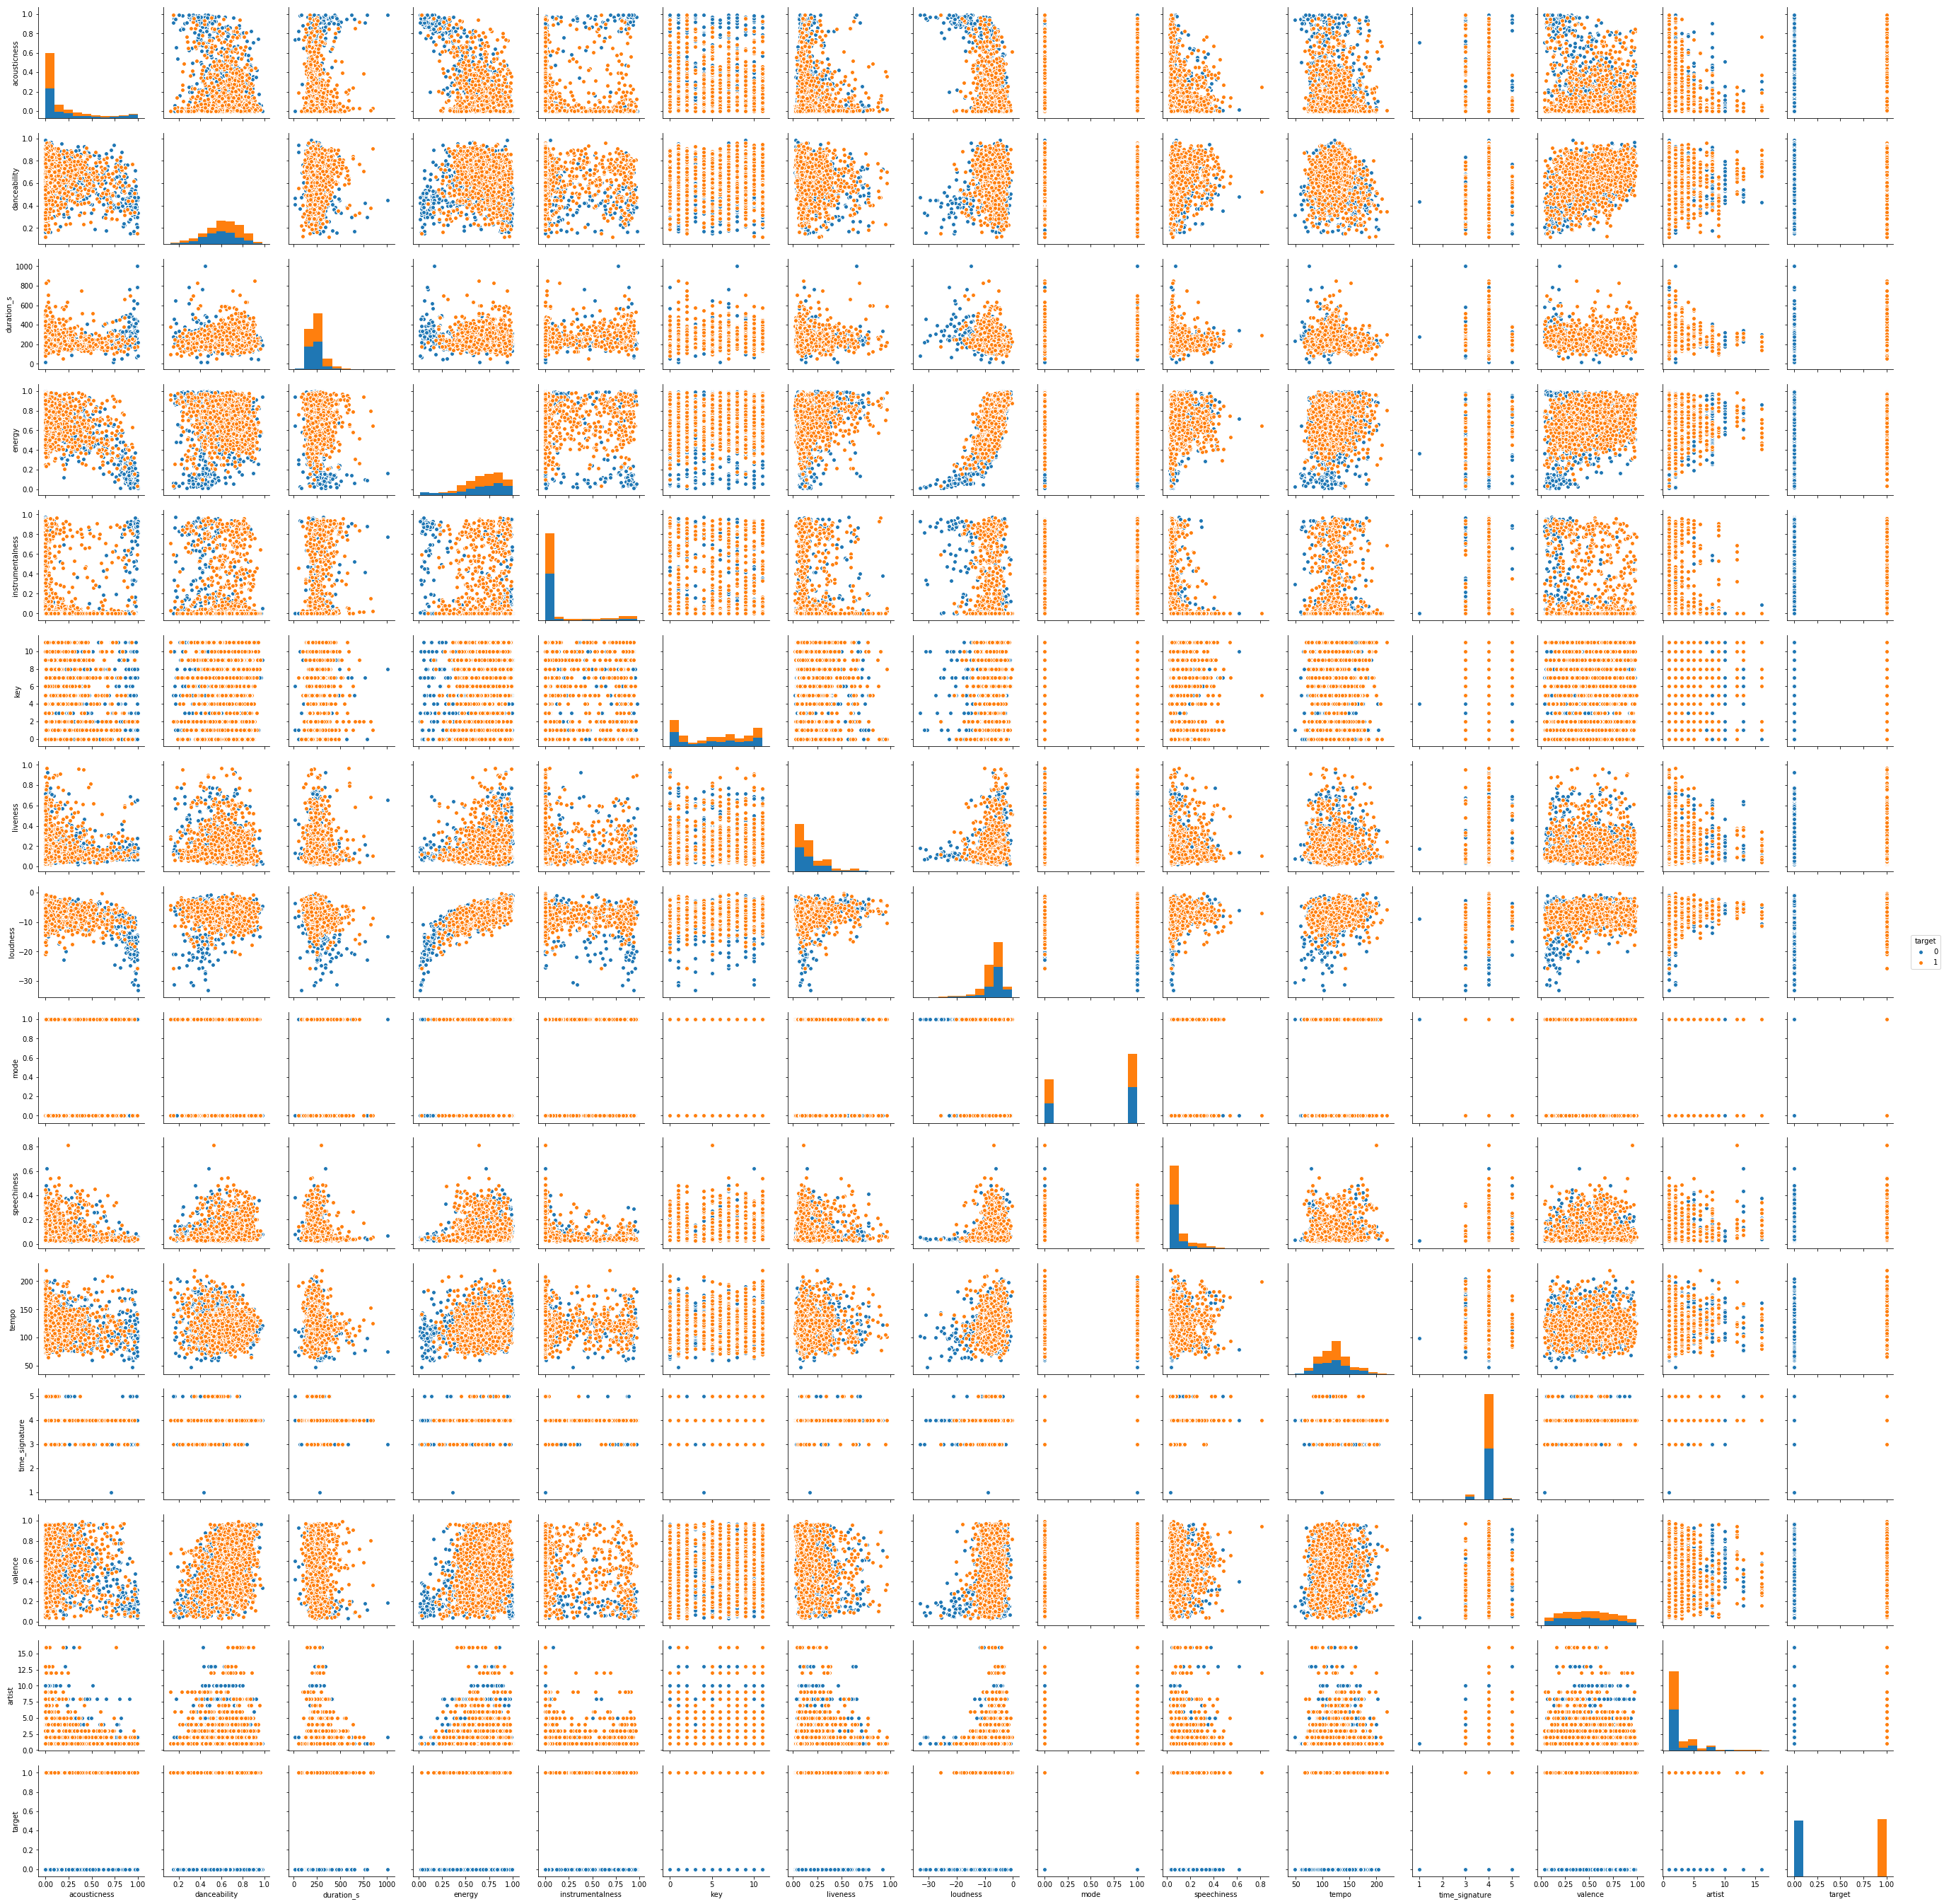

In [273]:
plt.figure(figsize=(50,50))
sns.pairplot(data,hue='target')

In [36]:
data_copy=data.copy()
bins=np.arange(0,1.01,0.1)
labels= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
#Numerical Values Btwn 0 to 1
Num0to1=['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness',
       'valence', ]
for x in Num0to1:
    data_copy[x]=pd.cut(data_copy[x],bins=bins,labels=labels)

binsls=[0. ,0.03,0.06, 0.1,0.15, 0.2,0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]  #bins for left skew distributions
labelsls=[0.03,0.06, 0.1,0.15, 0.2,0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ] 

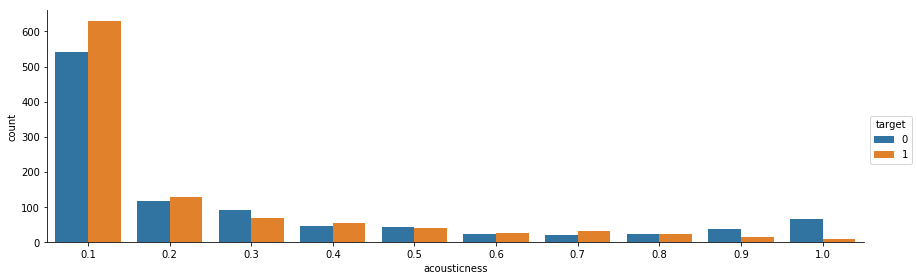

In [37]:
sns.factorplot('acousticness',data=data_copy,hue='target',kind='count',aspect=3)

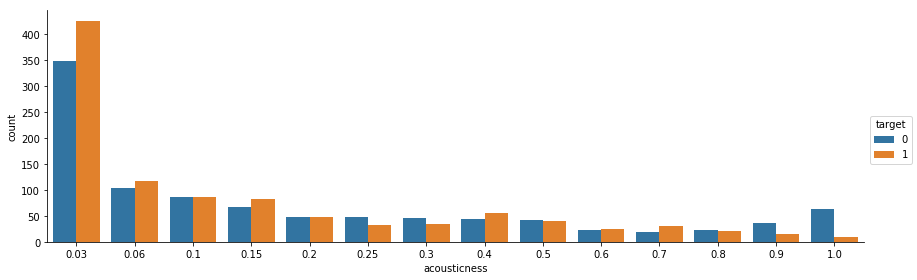

In [38]:
data_copy['acousticness']=pd.cut(data['acousticness'],bins=binsls,labels=labelsls)
sns.factorplot('acousticness',data=data_copy,hue='target',kind='count',aspect=3)  #binsls to handle skewness

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence']

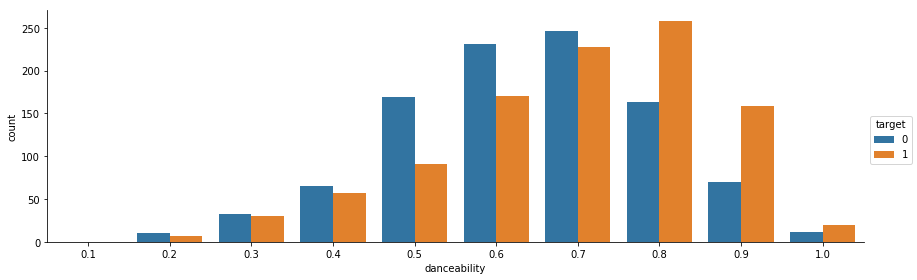

In [39]:
sns.factorplot('danceability',data=data_copy,hue='target',kind='count',aspect=3)
Num0to1

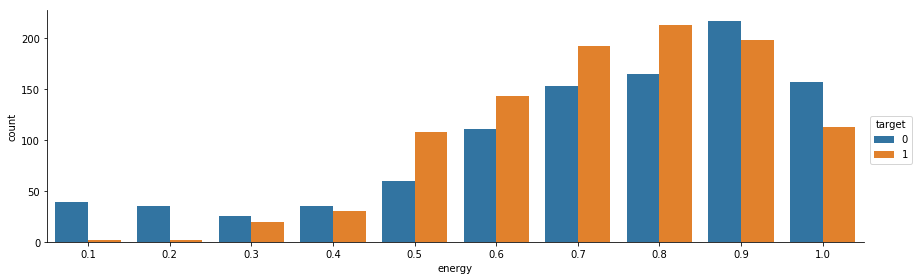

In [40]:
sns.factorplot('energy',data=data_copy,hue='target',kind='count',aspect=3)

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence']

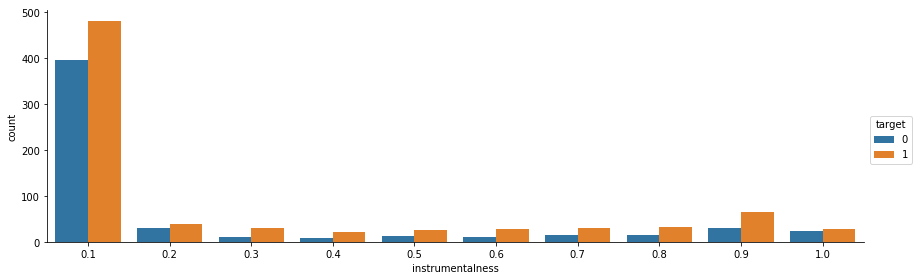

In [41]:
sns.factorplot('instrumentalness',data=data_copy,hue='target',kind='count',aspect=3)
Num0to1

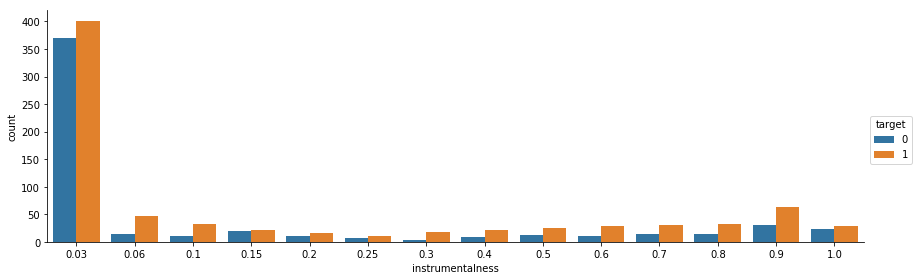

In [42]:
var='instrumentalness'
data_copy[var]=pd.cut(data[var],bins=binsls,labels=labelsls)
sns.factorplot(var,data=data_copy,hue='target',kind='count',aspect=3)  #binsls to handle skewness

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence']

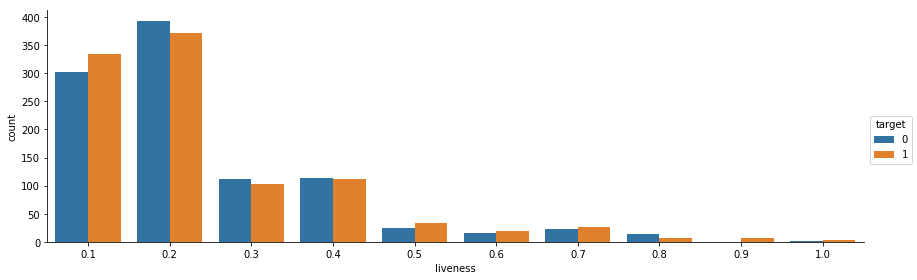

In [43]:
sns.factorplot('liveness',data=data_copy,hue='target',kind='count',aspect=3)
Num0to1

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence']

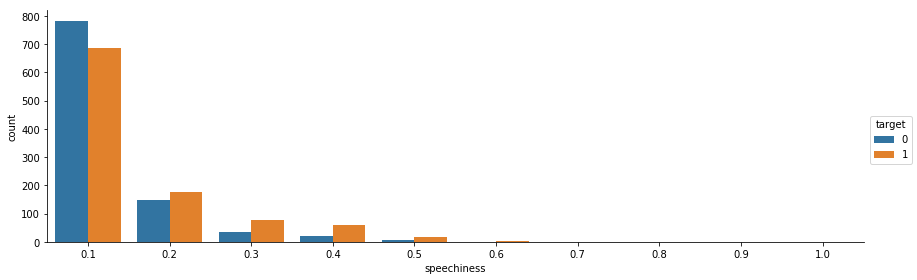

In [44]:

sns.factorplot('speechiness',data=data_copy,hue='target',kind='count',aspect=3)
Num0to1

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence']

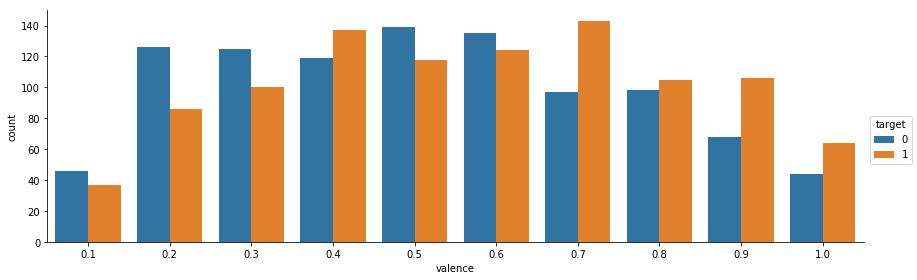

In [45]:
sns.factorplot('valence',data=data_copy,hue='target',kind='count',aspect=3)
Num0to1

In [94]:
data_copy
data.head(10)

,acousticness,danceability,duration_s,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,target
0,0.01020,0.833,204.600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,8,1
1,0.19900,0.743,326.933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,2,1
2,0.03440,0.838,185.707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,8,1
3,0.60400,0.494,199.413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,6,1
4,0.18000,0.678,392.893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,1
5,0.00479,0.804,251.333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,16,1
6,0.01450,0.739,241.400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,16,1
7,0.02020,0.266,349.667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,1
8,0.04810,0.603,202.853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,1
9,0.00208,0.836,226.840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,1


In [79]:
df=pd.get_dummies(columns=['key','time_signature'],data=data)


In [80]:
df.columns

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'artist', 'target', 'key_0', 'key_1', 'key_2',
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'time_signature_1.0', 'time_signature_3.0',
       'time_signature_4.0', 'time_signature_5.0'],
      dtype='object')

In [253]:
np.arange(29)
new_col=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 26, 27,28]
new_col1=[ 0,  1, 3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]
x=df.iloc[:,new_col1].values
y=df.iloc[:,12].values
y=y.reshape((-1,1))
df.isnull().values.any()
x.shape


(2017, 21)

In [254]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [132]:


from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierRF.fit(x_train, y_train)


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [134]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(classifierRF,X=x,y=y,cv=10)
bestRF=accuracies.mean()
bestRF

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

0.7030195556869119

In [139]:
y_predRF=classifierRF.predict(x_test)
from sklearn.metrics import confusion_matrix
cmRF=confusion_matrix(y_test,y_predRF)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predRF)

0.7346534653465346

In [186]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)

classifierLR.fit(x_train, y_train)
y_predLR=classifierLR.predict(x_test)
cmLR=confusion_matrix(y_test,y_pred)
LR=accuracy_score(y_test,y_pred)
    
    
#K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifierLR,X=x_train,y=y_train,cv=10)
BestLR=accuracies.mean()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [111]:
data.target.value_counts()

1    1020
0     997
Name: target, dtype: int64

In [138]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'rbf', random_state = 0)

classifierSVM.fit(x_train, y_train)
y_predSVM=classifierSVM.predict(x_test)
cmSVM=confusion_matrix(y_test,y_predSVM)
LR=accuracy_score(y_test,y_predSVM)
    

#K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifierSVM,X=x_train,y=y_train,cv=10)
BestSVM=accuracies.mean()
BestSVM


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.6263102707098873

In [150]:
pd.Series(y_predRF==y_predSVM).value_counts()

True     339
False    166
dtype: int64

In [257]:
x_train.shape

(1512, 21)

In [256]:
#Ensemble Model
classifierLR.fit(x_train,y_train)
classifierRF.fit(x_train, y_train)
classifierSVM.fit(x_train, y_train)
y_predRF=classifierRF.predict(x)
y_predLR=classifierLR.predict(x)
y_predSVM=classifierSVM.predict(x)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [258]:
preds=np.concatenate([y_predRF.reshape(-1,1),y_predLR.reshape(-1,1),y_predSVM.reshape(-1,1)],axis=1)
x=np.concatenate([x,preds],axis=1)

In [197]:
y_predRF.reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [259]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [212]:
classifierRF.fit(x_train, y_train)
y_predRF=classifierRF.predict(x_train)
cmEL=confusion_matrix(y_test,y_pred)
cmEL
x.shape

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


(2017, 24)

In [208]:
(196+175)/len(y_test)

0.7346534653465346

In [209]:
import keras

C:\Users\DELL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [210]:
from keras.models import Sequential
from keras.layers import Dense

In [260]:
classifier=Sequential()
classifier.add(Dense(output_dim=6,init='uniform',activation='relu',input_dim=24))
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=24, units=6, kernel_initializer="uniform")`
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [272]:
classifier.fit(x_train,y_train,batch_size=10,nb_epoch=100,validation_split=0.1)

C:\Users\DELL\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1360 samples, validate on 152 samples
Epoch 1/100
1360/1360 [==============================] - 1s 558us/step - loss: 0.0518 - acc: 0.9882 - val_loss: 0.0255 - val_acc: 0.9934
Epoch 2/100
1360/1360 [==============================] - 0s 347us/step - loss: 0.0514 - acc: 0.9882 - val_loss: 0.0298 - val_acc: 0.9934
Epoch 3/100
1360/1360 [==============================] - 1s 369us/step - loss: 0.0516 - acc: 0.9882 - val_loss: 0.0305 - val_acc: 0.9934
Epoch 4/100
1360/1360 [==============================] - 0s 318us/step - loss: 0.0510 - acc: 0.9882 - val_loss: 0.0302 - val_acc: 0.9934
Epoch 5/100
1360/1360 [==============================] - 0s 268us/step - loss: 0.0508 - acc: 0.9882 - val_loss: 0.0317 - val_acc: 0.9934
Epoch 6/100
1360/1360 [==============================] - 0s 312us/step - loss: 0.0506 - acc: 0.9882 - val_loss: 0.0319 - val_acc: 0.9934
Epoch 7/100
1360/1360 [==============================] - 0s 297us/step - loss: 0.0512 - acc: 0.9882 - val_loss: 0.0339 - val_acc: 0

1360/1360 [==============================] - 0s 271us/step - loss: 0.0458 - acc: 0.9882 - val_loss: 0.0471 - val_acc: 0.9934
Epoch 61/100
1360/1360 [==============================] - 0s 276us/step - loss: 0.0457 - acc: 0.9882 - val_loss: 0.0476 - val_acc: 0.9934
Epoch 62/100
1360/1360 [==============================] - 0s 324us/step - loss: 0.0461 - acc: 0.9882 - val_loss: 0.0482 - val_acc: 0.9934
Epoch 63/100
1360/1360 [==============================] - 0s 274us/step - loss: 0.0465 - acc: 0.9882 - val_loss: 0.0475 - val_acc: 0.9934
Epoch 64/100
1360/1360 [==============================] - 0s 300us/step - loss: 0.0459 - acc: 0.9882 - val_loss: 0.0479 - val_acc: 0.9934
Epoch 65/100
1360/1360 [==============================] - 0s 290us/step - loss: 0.0459 - acc: 0.9882 - val_loss: 0.0481 - val_acc: 0.9934
Epoch 66/100
1360/1360 [==============================] - 0s 265us/step - loss: 0.0462 - acc: 0.9882 - val_loss: 0.0474 - val_acc: 0.9934
Epoch 67/100
1360/1360 [=======================

In [262]:

y_predANN=classifier.predict(x_test)
y_pred=y_predANN>0.5
cmANN=confusion_matrix(y_test,y_pred)
cmANN

array([[203,  49],
       [ 85, 168]], dtype=int64)

In [263]:
1-((49+85)/len(y_test))

0.7346534653465346

In [228]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data.head()


,acousticness,danceability,duration_s,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,target
0,0.0102,0.833,204.600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,8,1
1,0.1990,0.743,326.933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,2,1
2,0.0344,0.838,185.707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,8,1
3,0.6040,0.494,199.413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,6,1
4,0.1800,0.678,392.893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,1


In [276]:
df['loudness']=abs(df['loudness'])
np.arange(29)
new_col=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 26, 27,28]
x=df.iloc[:,new_col1].values
y=df.iloc[:,12].values
y=y.reshape((-1,1))



In [277]:
test=SelectKBest(score_func=chi2,k=10)
fit=test.fit(x,y)
print(fit.scores_)
imptFeatures=fit.transform(x)
features=np.concatenate([imptFeatures,preds],axis=1)

[1.22062826e+01 2.63946304e+00 2.05991962e-01 2.62798158e+01
 1.77431318e-01 2.08711543e+01 4.09183888e+00 4.17328719e+00
 1.42416900e+01 2.88840655e+00 2.61666514e+00 5.53184452e+00
 8.93071995e+00 3.65826705e-01 2.15878026e-02 4.97767133e-02
 8.22115811e-04 9.27202094e-02 1.15036982e+00 1.68049364e+00
 2.52248178e-01]


In [268]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train.shape

(1512, 13)

In [269]:
classifier=Sequential()
classifier.add(Dense(output_dim=6,init='uniform',activation='relu',input_dim=13))
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [270]:
classifier.fit(x_train,y_train,batch_size=10,nb_epoch=100)
y_predANN=classifier.predict(x_test)
y_pred=y_predANN>0.5
cmANN=confusion_matrix(y_test,y_pred)
cmANN

C:\Users\DELL\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
1512/1512 [==============================] - 2s 1ms/step - loss: 0.6632 - acc: 0.7837
Epoch 2/100
1512/1512 [==============================] - 0s 289us/step - loss: 0.3430 - acc: 0.9663
Epoch 3/100
1512/1512 [==============================] - 0s 246us/step - loss: 0.1160 - acc: 0.9788
Epoch 4/100
1512/1512 [==============================] - 0s 281us/step - loss: 0.0788 - acc: 0.9848
Epoch 5/100
1512/1512 [==============================] - 0s 285us/step - loss: 0.0715 - acc: 0.9868
Epoch 6/100
1512/1512 [==============================] - 0s 294us/step - loss: 0.0684 - acc: 0.9868
Epoch 7/100
1512/1512 [==============================] - 0s 277us/step - loss: 0.0669 - acc: 0.9874
Epoch 8/100
1512/1512 [==============================] - 0s 257us/step - loss: 0.0652 - acc: 0.9881
Epoch 9/100
1512/1512 [==============================] - 0s 286us/step - loss: 0.0639 - acc: 0.9881
Epoch 10/100
1512/1512 [==============================] - 0s 282us/step - loss: 0.0634 - acc: 0.9881
E

1512/1512 [==============================] - 0s 324us/step - loss: 0.0502 - acc: 0.9888 0s - loss: 0.0494 - acc: 
Epoch 83/100
1512/1512 [==============================] - 0s 285us/step - loss: 0.0499 - acc: 0.9888
Epoch 84/100
1512/1512 [==============================] - 0s 306us/step - loss: 0.0512 - acc: 0.9888
Epoch 85/100
1512/1512 [==============================] - 0s 310us/step - loss: 0.0503 - acc: 0.9888
Epoch 86/100
1512/1512 [==============================] - 0s 283us/step - loss: 0.0507 - acc: 0.9888
Epoch 87/100
1512/1512 [==============================] - 0s 330us/step - loss: 0.0499 - acc: 0.9888
Epoch 88/100
1512/1512 [==============================] - 0s 310us/step - loss: 0.0498 - acc: 0.9888
Epoch 89/100
1512/1512 [==============================] - 0s 289us/step - loss: 0.0496 - acc: 0.9888
Epoch 90/100
1512/1512 [==============================] - 0s 322us/step - loss: 0.0493 - acc: 0.9888
Epoch 91/100
1512/1512 [==============================] - 0s 316us/step - loss

array([[203,  49],
       [ 85, 168]], dtype=int64)

In [280]:
(203+168)/len(y_test)
x.shape

(2017, 21)

Text(0.5,1,'Elbow Method')

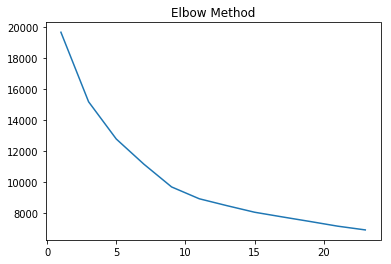

In [301]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,25,2):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,25,2),wcss)
plt.title('Elbow Method')
    


In [309]:
kmeans=KMeans(n_clusters=8,init='k-means++',random_state=0)
kmeans=kmeans.fit(x_train)
y_kmeans=kmeans.predict(x_train)
pd.Series(y_kmeans).value_counts()
kmeans_test=kmeans.predict(x_test)

In [314]:
pred_cRF=[]
for i in range(8):
    classifierRF=classifierRF.fit(x_train[y_kmeans==i],y_train[y_kmeans==i])
    pred=classifierRF.predict(x_test[kmeans_test==i])
    pred_cRF.append(pred)
pred_cRF

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [343]:
finalpred=[]
for i in range(8):
    prediction=list(pred_cRF[i])
    finalpred=finalpred+prediction


In [344]:
Test=[]
for i in range(8):
    actual=[l[0] for l in y_test[kmeans_test==i]]
    Test=Test+actual
len(Test)

505

In [354]:
result=np.array(finalpred)==np.array(Test)
pd.Series(result).value_counts()

True     370
False    135
dtype: int64

In [355]:
370/505

0.7326732673267327

In [367]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance=pca.explained_variance_ratio_

In [378]:
x_new=np.concatenate([x_train,x_test],axis=0)
y=data['target']
np.array(y)
np.concatenate([x_new,y],axis=1)

ValueError: all the input arrays must have same number of dimensions